In [2]:
import pandas as pd
from langdetect import detect
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [3]:
!pip install langdetect


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Chemin vers les fichiers XML
file_train = 'data/train.xml'
file_dev   = 'data/dev.xml'
file_test  = 'data/test.xml' 

In [5]:
def read_xml_to_dataframe(file_path):
    # Analyse du fichier XML
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Création d'une liste vide pour stocker les données
    data = []

    # Parcours des éléments de commentaire
    for comment in root.findall('comment'):
        movie = comment.find('movie').text
        review_id = comment.find('review_id').text
        name = comment.find('name').text
        user_id = comment.find('user_id').text
        note = comment.find('note').text.replace(',', '.')
        commentaire = comment.find('commentaire').text

        # Ajout des données dans la liste sous forme de dictionnaire
        data.append({
            'movie': movie,
            'review_id': review_id,
            'name': name,
            'user_id': user_id,
            'note': note,
            'commentaire': commentaire
        })

    # Création d'un DataFrame 
    df = pd.DataFrame(data)

    return df

In [6]:
# Utilisation de la fonction
data_dev = read_xml_to_dataframe(file_dev)
data_train = read_xml_to_dataframe(file_train)
#data_test = read_xml_to_dataframe(file_test)
data_dev

,movie,review_id,name,user_id,note,commentaire
0,244430,review_57113853,I'm A Rocket Man,Z20150411212834470532236,5.0,Ce téléfilm est tout simplement bouleversant !...
1,244430,review_53044607,apotheme,Z20070228015331953348969,3.5,Une fiction convaincainte qui a le mérite de m...
2,244430,review_60265420,Cronenbergfansoff,Z20170707170528043187781,4.0,"Énorme ce film, parmi les meilleurs biopics/do..."
3,244430,review_55880325,willycopresto,Z20120217141238760128499,2.0,"""Mario, 13 ans pour toujours (2016) TV5 Monde ..."
4,244430,review_53015074,atomewarrior,Z20110303190024017478821,5.0,"Un film choque, coups de poing, à la fois très..."
...,...,...,...,...,...,...
100395,221892,review_59620693,Fabio C.,Z20151005194626740254489,3.0,Après Le Petit Lieutenant et des Hommes et des...
100396,221892,review_47495619,Bernard L.,Z20150226232126323734384,2.5,Dommage : Des scènes qui traînent en longueur...
100397,221892,review_45417182,montezy,Z20100224224417197559762,4.0,un film lent et poétique....à l'heure ou tout ...
100398,221892,review_1002780563,Eric L.,Z20160616161509357189631,0.5,Quand Une Musique de film plombe le film. To...


In [ ]:
#fonction pour le fichier de test 
def read_xml_to_dataframeTest(file_path):
    # Analyse du fichier XML
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Création d'une liste vide pour stocker les données
    data = []

    # Parcours des éléments de commentaire
    for comment in root.findall('comment'):
        # Initialisation d'un dictionnaire pour chaque commentaire
        comment_data = {}

        # Extraction de chaque élément si disponible et ajout au dictionnaire
        movie = comment.find('movie')
        if movie is not None:
            comment_data['movie'] = movie.text

        review_id = comment.find('review_id')
        if review_id is not None:
            comment_data['review_id'] = review_id.text

        name = comment.find('name')
        if name is not None:
            comment_data['name'] = name.text

        user_id = comment.find('user_id')
        if user_id is not None:
            comment_data['user_id'] = user_id.text

        # Note is not present in the given data, but if it's sometimes included,
        # you can check for it like this:
        note = comment.find('note')
        if note is not None:
            comment_data['note'] = note.text.replace(',', '.')

        commentaire = comment.find('commentaire')
        if commentaire is not None:
            comment_data['commentaire'] = commentaire.text

        # Ajout des données dans la liste sous forme de dictionnaire
        data.append(comment_data)

    # Création d'un DataFrame
    df = pd.DataFrame(data)

    return df

In [ ]:
data_test = read_xml_to_dataframeTest(file_test)
data_test

,movie,review_id,name,user_id,commentaire
0,253727,review_59354742,gimliamideselfes,Z20040827093310567684711,"12 jours, un film que j'ai raté à sa sortie et..."
1,253727,review_62570109,Yetcha,Z20030318104639813779116,Ces lueurs dans ces yeux... Soit ils sont tous...
2,253727,review_58180650,TTNOUGAT,Z20071021153249553451578,Il s’agit d’un documentaire sans la moindre ac...
3,253727,review_57696986,titicaca120,Z20060317115155370578365,un documentaire magnifique dans cette unité ly...
4,253727,review_57736972,velocio,Z20040630141522227308769,"Un documentaire très intéressant, quand bien m..."
...,...,...,...,...,...
85842,223252,review_57275608,Rom A,Z20120217154308300922168,"UnThor aux cheveux courts, un Hulk qui parle, ..."
85843,223252,review_57288594,Zoé T.,Z20171104180909770373557,Le casting correspond bien au film mais ça doi...
85844,223252,review_57313027,Elisa G,Z20121226181848567456295,Très bon film. Bon effets spéciaux. Il manquai...
85845,223252,review_57321607,Kevin Quesnel,Z20111024122936830511478,le film est superbe ! avec pas mal d'action co...


In [ ]:
unique_notes = data_dev['note'].unique()
print('dev: ')
print(unique_notes)
unique_notes = data_train['note'].unique()
print('train: ')
print(unique_notes)

dev: 
['5.0' '3.5' '4.0' '2.0' '4.5' '3.0' '0.5' '2.5' '1.0' '1.5']
train: 
['4.0' '3.5' '4.5' '3.0' '1.0' '2.5' '5.0' '2.0' '0.5' '1.5']


In [12]:
# Compter le nombre de commentaires pour chaque note unique
note_counts_dev = data_dev['note'].value_counts()
print('note_counts_dev: ')
print(note_counts_dev)
# Compter le nombre de commentaires pour chaque note unique
note_counts_train = data_train['note'].value_counts()

note_counts_dev: 
note
4.0    18594
3.5    14333
3.0    13881
5.0    12906
4.5     9945
2.5     8289
2.0     8110
0.5     5835
1.0     4547
1.5     3960
Name: count, dtype: int64


In [ ]:
def plot_note_distribution(note_counts):
    # Trier les notes pour un affichage ordonné
    note_counts_sorted = note_counts.sort_index()

    # Créer un diagramme à barres
    note_counts_sorted.plot(kind='bar', figsize=(10, 6))

    # Ajouter un titre et des étiquettes aux axes
    plt.title('Nombre de commentaires par note')
    plt.xlabel('Note')
    plt.ylabel('Nombre de commentaires')

    # Afficher le graphique
    plt.show()

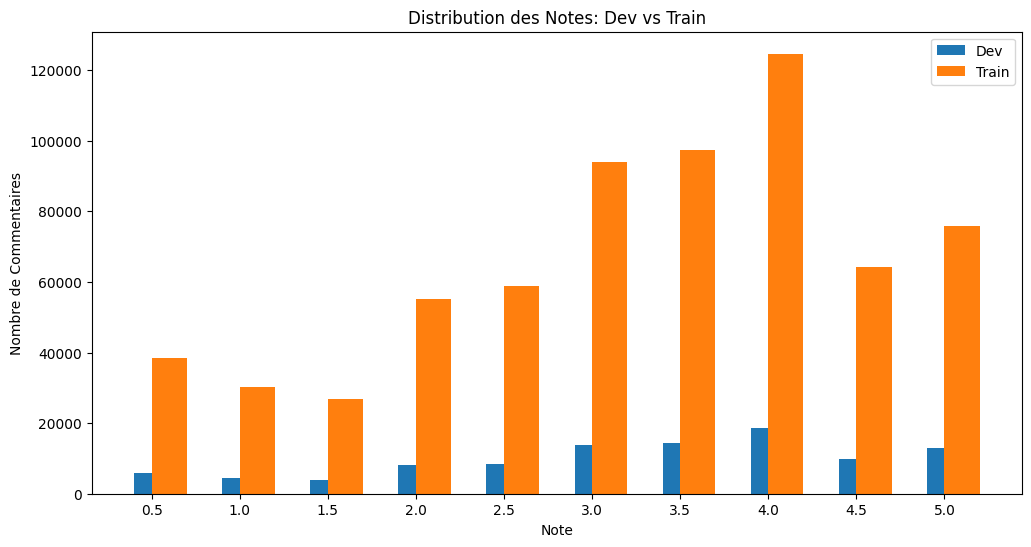

In [ ]:
# Trier les comptes pour un affichage ordonné
note_counts_dev_sorted = note_counts_dev.sort_index()
note_counts_train_sorted = note_counts_train.sort_index()

# Création d'un diagramme à barres pour les deux distributions
plt.figure(figsize=(12, 6))

# Ajout des barres pour l'ensemble de développement
plt.bar(note_counts_dev_sorted.index, note_counts_dev_sorted.values, width=0.4, label='Dev', align='center')

# Ajout des barres pour l'ensemble d'entraînement, décalées pour éviter le chevauchement
plt.bar(note_counts_train_sorted.index, note_counts_train_sorted.values, width=0.4, label='Train', align='edge')

# Ajout d'un titre et des étiquettes aux axes
plt.title('Distribution des Notes: Dev vs Train')
plt.xlabel('Note')
plt.ylabel('Nombre de Commentaires')
plt.legend()

# Affichage du graphique
plt.show()

In [ ]:
import numpy as np

# Assurez-vous que data_dev et data_train sont déjà définis et contiennent vos données réelles

# Calculer les statistiques descriptives pour les deux ensembles de données
mean_dev = data_dev['note'].mean()
median_dev = data_dev['note'].median()
mode_dev = data_dev['note'].mode()[0]  # Le mode peut être multimodal, prenons le premier pour la simplicité

mean_train = data_train['note'].mean()
median_train = data_train['note'].median()
mode_train = data_train['note'].mode()[0]

# Mesures de variabilité
std_dev = data_dev['note'].std()
var_dev = data_dev['note'].var()

std_train = data_train['note'].std()
var_train = data_train['note'].var()

# Asymétrie
skewness_dev = data_dev['note'].skew()
skewness_train = data_train['note'].skew()

# Bins pour l'histogramme, définir les bords des intervalles pour correspondre aux notes possibles
bins = np.arange(0.25, 5.75, 0.5)

# Afficher les histogrammes de la distribution des notes pour Dev et Train
plt.figure(figsize=(12, 6))

# Histogramme pour l'ensemble de développement (Dev)
plt.subplot(1, 2, 1)
plt.hist(data_dev['note'], bins=bins, alpha=0.7, color='blue', rwidth=0.5)
plt.title('Distribution des Notes: Dev')
plt.xlabel('Note')
plt.ylabel('Nombre de Commentaires')
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.axvline(mean_dev, color='red', linestyle='dashed', linewidth=2, label=f'Moyenne: {mean_dev:.2f}')
plt.axvline(median_dev, color='green', linestyle='dashed', linewidth=2, label=f'Médiane: {median_dev:.2f}')
plt.axvline(mode_dev, color='orange', linestyle='dashed', linewidth=2, label=f'Mode: {mode_dev:.2f}')
plt.legend()

# Histogramme pour l'ensemble d'entraînement (Train)
plt.subplot(1, 2, 2)
plt.hist(data_train['note'], bins=bins, alpha=0.7, color='orange', rwidth=0.5)
plt.title('Distribution des Notes: Train')
plt.xlabel('Note')
plt.ylabel('Nombre de Commentaires')
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.axvline(mean_train, color='red', linestyle='dashed', linewidth=2, label=f'Moyenne: {mean_train:.2f}')
plt.axvline(median_train, color='green', linestyle='dashed', linewidth=2, label=f'Médiane: {median_train:.2f}')
plt.axvline(mode_train, color='orange', linestyle='dashed', linewidth=2, label=f'Mode: {mode_train:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# Afficher les statistiques calculées
print("Ensemble Dev :")
print(f"Moyenne : {mean_dev:.2f}, Médiane : {median_dev:.2f}, Mode : {mode_dev:.2f}, Écart-Type : {std_dev:.2f}, Variance : {var_dev:.2f}, Asymétrie : {skewness_dev:.2f}")
print("\nEnsemble Train :")
print(f"Moyenne : {mean_train:.2f}, Médiane : {median_train:.2f}, Mode : {mode_train:.2f}, Écart-Type : {std_train:.2f}, Variance : {var_train:.2f}, Asymétrie : {skewness_train:.2f}")


TypeError: Could not convert string '5.03.54.02.05.03.53.54.53.04.05.04.55.04.00.52.03.02.03.03.53.03.52.02.54.03.02.02.03.04.04.02.04.02.03.52.52.04.02.52.03.54.02.03.03.52.54.03.52.54.03.54.02.02.03.03.54.03.53.03.52.03.03.01.04.02.03.53.03.03.03.52.04.53.51.02.54.02.02.53.52.03.52.52.53.52.03.51.53.03.54.03.53.54.02.54.03.54.03.54.03.51.02.53.53.02.01.03.02.51.54.53.03.04.53.53.54.03.51.03.51.55.04.04.03.52.52.51.50.55.02.05.03.51.03.03.01.53.02.53.54.03.03.54.03.52.04.04.02.53.54.00.51.02.03.53.04.52.01.04.50.55.02.03.53.03.53.03.03.02.54.54.03.02.02.02.03.53.02.02.03.52.52.53.53.53.55.03.54.54.03.53.03.03.01.53.03.54.04.54.01.02.03.54.53.55.04.05.02.54.54.03.52.53.03.54.04.05.03.53.03.02.53.52.01.04.54.01.53.52.04.53.53.03.03.03.55.04.53.03.55.04.03.54.02.02.54.53.54.04.04.04.04.04.03.53.53.53.50.54.04.03.03.53.03.54.01.53.53.54.03.54.54.03.02.54.54.53.54.04.03.53.04.04.03.52.52.53.03.52.53.53.54.02.03.04.54.04.04.03.54.03.53.04.03.54.03.53.54.04.05.00.53.03.03.03.54.54.04.04.02.55.04.53.53.52.54.03.53.03.54.54.03.03.53.55.04.03.54.05.04.53.54.02.01.55.05.03.54.03.54.54.04.02.53.03.03.04.03.53.04.04.03.05.04.03.52.54.54.03.04.53.55.03.03.53.04.03.50.52.03.54.04.04.03.55.04.03.04.52.54.04.05.02.04.04.53.03.00.53.04.04.03.04.03.54.53.54.04.55.05.01.55.02.54.54.55.04.53.04.54.03.51.02.01.03.01.53.03.04.03.03.55.02.03.03.54.52.03.04.04.04.04.05.02.54.04.05.00.55.02.05.03.53.54.52.02.54.04.03.53.54.53.54.05.04.54.05.04.51.53.55.01.54.01.54.54.04.04.54.04.02.03.04.55.01.54.54.55.03.54.00.50.50.54.50.54.03.51.54.54.51.54.04.03.55.03.53.04.51.05.04.55.03.54.02.03.50.54.04.55.04.54.54.50.50.52.50.55.00.54.54.04.01.50.54.04.04.50.54.54.05.04.00.52.00.55.05.01.55.04.50.54.54.51.00.53.54.05.04.52.04.02.55.04.02.02.03.04.50.50.53.52.03.01.02.01.01.01.02.02.01.52.03.01.02.50.52.02.02.02.50.50.51.00.51.00.52.50.51.00.50.52.50.52.01.01.02.50.50.50.51.00.50.53.04.00.50.51.01.00.50.52.51.50.51.00.50.50.51.00.51.03.01.00.51.00.50.51.01.00.50.50.50.50.50.50.50.50.50.50.53.50.53.03.50.51.05.00.50.50.50.50.50.50.51.02.00.50.50.50.53.00.51.50.51.00.50.50.50.50.50.50.52.00.50.51.00.54.00.50.50.50.50.51.02.04.00.50.51.50.51.03.03.03.03.51.03.53.53.54.03.02.02.52.02.04.03.53.03.03.50.52.53.02.53.54.03.52.51.02.53.51.04.52.02.00.52.52.00.52.03.54.52.52.04.02.53.02.03.53.54.53.03.02.52.03.02.03.54.02.03.03.03.53.00.52.53.54.02.52.02.53.03.02.01.03.03.03.53.02.54.53.53.54.52.53.53.53.53.03.02.02.03.54.03.54.53.53.02.53.02.54.52.03.53.54.02.02.53.04.03.03.53.55.03.03.03.04.52.04.53.03.04.54.03.53.51.53.03.51.02.51.54.04.03.03.53.53.04.03.04.50.51.53.53.54.54.02.02.03.52.51.03.53.01.51.53.01.52.02.01.50.54.02.03.52.00.55.03.04.03.52.04.02.04.04.04.03.04.03.55.05.02.05.01.01.52.02.02.01.03.52.53.54.02.52.52.03.51.53.02.03.53.03.03.50.51.03.01.03.53.01.53.53.02.50.51.03.53.04.05.04.53.05.03.54.51.01.55.01.02.02.03.53.53.02.53.04.04.03.04.02.54.01.53.52.03.00.52.54.02.03.53.53.53.54.03.01.03.03.51.52.04.04.04.02.01.52.03.04.04.02.53.52.02.54.03.53.53.54.02.54.02.53.52.54.02.02.54.04.53.54.03.52.03.01.04.04.05.03.54.04.03.53.51.00.52.53.02.04.03.50.52.50.52.50.54.02.04.02.04.03.54.52.51.52.05.05.01.04.01.55.02.04.05.04.05.04.54.01.04.02.04.00.55.02.50.55.02.03.52.01.03.50.54.03.55.01.00.50.54.00.50.52.00.54.53.52.00.52.05.03.50.52.01.00.51.00.51.04.52.52.01.51.50.51.02.01.00.55.02.53.00.50.50.51.01.00.55.05.05.02.05.02.00.51.02.00.54.01.55.05.01.01.01.05.05.04.00.50.50.51.05.01.05.03.53.01.01.00.54.05.00.53.03.54.00.52.04.04.54.02.54.04.03.02.53.52.04.53.04.04.05.03.55.04.03.52.53.53.05.03.53.05.05.05.04.03.53.03.53.04.53.54.55.04.55.03.52.54.03.54.04.52.03.53.53.01.54.03.52.52.53.53.04.03.53.54.04.03.54.04.54.05.03.54.03.00.54.04.04.04.02.05.04.53.03.53.03.03.04.04.03.02.04.52.55.04.53.03.53.02.04.05.05.03.05.02.04.03.03.03.54.54.03.53.53.54.04.03.50.54.03.54.04.05.03.54.04.54.04.03.04.04.54.52.53.54.04.03.04.54.01.02.04.54.03.55.03.04.53.05.03.03.53.05.04.55.04.03.54.03.54.04.52.03.03.54.01.02.53.53.55.04.03.53.53.55.04.54.01.53.05.03.03.03.54.04.04.03.04.03.54.04.02.53.52.05.04.04.51.05.04.04.54.54.53.54.03.53.54.04.03.54.53.54.04.03.54.04.00.52.53.04.01.04.03.53.03.01.54.04.54.05.04.01.50.54.04.54.05.04.03.54.04.54.54.04.04.54.55.04.01.55.02.05.05.04.03.03.52.54.04.04.03.03.04.52.54.03.54.04.51.52.04.05.04.02.54.54.04.03.52.52.04.04.51.55.04.04.04.55.04.04.04.04.55.04.02.04.54.05.03.54.52.54.53.54.04.04.55.05.03.52.05.03.01.54.00.54.55.03.54.53.04.03.52.54.03.03.54.52.02.03.54.00.54.04.04.04.03.03.03.03.03.04.04.03.05.05.04.53.54.02.55.04.03.04.03.54.54.04.55.03.04.05.03.54.04.04.01.54.55.03.55.02.53.03.54.02.05.04.54.03.04.02.50.54.54.04.55.04.03.54.01.04.04.05.02.05.02.02.54.01.53.54.03.04.04.51.03.04.04.04.54.03.52.04.54.54.04.04.03.54.04.54.03.04.03.54.53.53.04.54.50.55.01.54.55.04.55.04.02.54.04.05.04.54.53.54.50.54.03.02.04.55.04.53.54.01.54.53.54.03.54.54.04.05.03.54.50.52.01.54.04.01.53.04.03.54.54.54.03.53.54.54.04.03.53.02.52.03.05.05.03.04.54.04.03.02.01.55.05.04.04.53.53.53.54.54.03.54.54.54.05.05.04.04.52.05.03.03.54.53.53.53.55.04.02.52.53.51.04.02.04.03.02.04.04.52.00.52.03.54.03.03.01.54.04.02.51.50.54.04.04.53.53.54.03.54.03.54.53.55.04.03.02.54.04.03.54.05.04.54.52.02.54.03.53.55.04.05.02.04.05.04.04.04.52.05.02.53.54.02.52.55.04.55.01.04.54.55.04.05.00.54.52.53.54.04.54.54.55.05.01.53.50.54.03.54.03.55.04.52.04.54.04.54.04.04.52.05.04.04.04.05.04.02.01.04.03.03.53.54.55.03.53.52.53.03.53.52.05.01.02.54.04.53.52.01.54.53.54.04.04.54.04.04.02.01.03.55.03.54.54.05.03.03.55.04.53.54.05.01.55.05.04.03.54.54.01.01.52.54.55.05.02.05.04.03.04.04.04.03.04.53.54.54.04.03.54.04.04.03.05.05.04.52.55.02.05.04.05.04.04.52.03.03.04.52.53.03.05.02.02.53.03.52.04.54.04.05.03.04.03.50.54.53.04.54.04.53.02.05.04.55.00.55.04.52.03.03.53.54.52.53.54.01.50.53.54.03.54.01.54.54.54.55.04.04.05.04.55.03.54.51.04.04.52.51.54.52.02.03.51.54.55.02.04.04.50.52.04.54.54.51.02.55.04.04.54.54.04.04.05.04.02.55.01.54.05.04.53.02.04.54.02.03.05.02.50.52.55.04.04.02.05.01.55.04.03.03.05.00.54.54.04.04.03.04.05.04.54.52.54.51.04.02.50.55.02.53.02.04.53.04.54.54.52.04.04.02.54.04.04.04.54.52.04.54.54.02.05.02.53.54.55.05.03.55.05.05.02.55.05.03.54.53.54.54.03.04.05.04.04.54.04.01.54.04.54.51.01.55.04.54.55.04.50.52.01.03.04.05.03.03.53.54.04.53.50.54.03.02.04.04.54.53.53.50.53.53.53.04.03.04.03.54.02.52.52.03.55.03.04.03.50.54.53.02.53.04.54.03.54.03.52.53.02.54.03.52.03.53.04.53.54.03.04.53.03.04.05.03.03.55.03.55.03.53.54.53.54.04.54.54.03.03.03.03.54.54.04.53.54.04.03.04.04.53.53.53.04.03.54.03.54.54.53.54.02.53.03.03.53.53.54.53.54.04.04.54.04.05.04.53.53.03.54.53.54.55.03.05.03.53.04.02.52.54.00.53.54.53.53.54.54.54.55.05.03.03.53.04.04.52.54.04.04.04.03.53.55.04.01.54.05.03.54.54.04.04.53.54.05.03.54.04.53.03.53.03.54.52.53.53.52.03.53.04.54.05.02.54.54.04.04.04.04.54.04.04.05.02.54.03.53.55.03.03.54.04.53.02.51.04.54.02.53.54.54.04.04.04.54.03.04.05.04.54.04.54.04.04.54.05.03.54.04.04.04.53.04.04.04.04.54.04.05.05.04.04.50.52.54.03.53.54.53.05.04.51.04.54.05.04.05.04.05.01.04.53.04.03.03.55.04.55.04.04.05.05.01.04.04.03.54.03.55.04.04.04.03.55.04.04.54.03.05.04.04.54.04.05.04.53.01.55.04.55.04.55.05.05.03.53.04.05.04.55.05.05.03.55.05.03.51.04.05.05.04.53.05.05.04.00.52.51.03.54.04.04.05.05.02.04.54.05.05.05.03.54.54.53.55.04.54.02.55.05.04.54.51.54.05.03.04.55.05.05.04.05.04.53.04.55.03.54.55.05.04.53.54.50.55.04.54.55.05.04.55.04.54.55.04.04.53.54.54.55.05.04.54.54.54.01.52.03.52.01.02.02.03.02.52.52.52.03.03.54.04.02.04.03.50.52.52.52.02.01.55.03.02.51.03.52.02.03.50.51.00.51.53.03.50.50.53.03.02.02.54.03.04.02.02.03.53.00.50.52.03.52.03.50.52.53.04.03.03.03.01.52.04.03.03.53.03.00.52.03.03.52.54.00.52.52.51.01.01.52.04.03.00.53.03.53.03.01.51.51.03.00.53.03.03.51.03.02.03.04.03.02.52.03.02.54.03.03.52.02.03.53.03.03.02.03.03.02.53.51.53.01.52.03.52.02.52.02.03.54.01.04.01.03.01.03.53.03.02.03.02.53.04.52.04.02.54.04.01.02.52.03.53.04.53.03.54.03.51.03.54.52.53.51.52.53.03.53.51.54.03.01.54.52.52.03.04.04.01.03.03.03.52.54.03.52.03.51.52.03.04.53.03.52.53.02.02.53.03.04.01.02.53.51.52.03.02.51.03.04.03.02.54.03.02.04.53.04.04.01.04.53.53.01.52.53.02.05.00.52.03.50.52.53.03.52.52.03.52.55.03.03.00.50.51.05.02.51.53.03.05.03.54.04.01.53.52.04.53.52.53.52.02.04.03.02.52.54.03.05.01.03.01.51.53.04.03.03.03.02.52.01.03.03.53.54.52.02.52.02.53.55.01.52.55.05.04.04.03.53.54.03.54.03.03.54.03.53.02.05.04.53.54.54.04.03.03.53.03.04.01.54.02.03.52.50.52.01.00.55.03.03.53.53.03.04.02.03.05.04.53.04.03.53.52.01.51.52.00.54.01.53.53.03.50.54.04.03.04.03.51.02.03.04.55.02.54.01.52.02.03.55.03.02.51.03.52.05.02.50.52.03.51.03.03.05.04.02.54.05.03.05.03.03.04.03.54.54.04.04.02.53.53.04.05.04.55.04.52.54.03.52.04.02.54.02.03.54.03.03.01.52.04.02.52.54.03.53.05.03.02.53.03.03.02.01.01.02.53.50.53.04.52.53.50.51.04.54.02.03.54.04.05.04.53.05.04.02.53.04.53.02.03.51.01.03.54.01.03.53.54.53.00.54.05.01.50.53.52.05.01.53.55.03.04.51.03.53.55.05.03.04.04.03.01.02.01.04.00.53.00.54.53.03.03.55.03.03.03.02.54.52.00.50.54.02.04.54.52.04.53.55.04.04.54.04.04.04.04.53.01.03.54.05.04.03.53.55.03.02.50.54.04.04.03.51.55.01.52.04.55.05.00.53.01.04.01.52.53.54.50.52.54.05.03.01.52.52.52.51.04.54.01.02.51.01.03.05.02.55.02.54.52.54.02.03.04.51.51.05.03.54.05.02.01.04.52.52.55.03.51.51.52.51.53.51.52.02.03.00.54.55.01.04.52.03.55.00.52.53.03.54.53.04.02.55.05.01.55.01.04.55.04.50.52.52.03.52.04.50.54.02.55.04.00.54.04.54.54.55.01.00.55.05.05.00.52.05.00.54.54.01.55.04.01.54.50.51.02.51.04.01.51.05.00.51.05.04.53.03.03.02.02.54.01.02.55.00.50.53.53.53.02.52.53.51.01.52.04.03.03.01.53.51.04.55.03.54.54.05.01.02.01.54.55.03.53.01.03.53.04.04.04.04.03.53.04.03.53.04.03.04.53.03.04.04.03.53.01.04.03.54.03.03.04.05.04.53.04.03.03.51.03.03.03.53.54.04.03.53.53.53.03.54.03.02.54.53.53.54.54.02.54.03.54.03.53.54.52.53.54.03.53.03.52.53.02.04.02.52.54.05.04.03.04.03.54.53.53.54.04.04.03.54.54.04.03.53.54.03.04.03.53.53.53.04.54.53.54.03.03.53.54.03.54.03.04.02.54.03.55.03.53.52.52.04.02.03.53.53.54.04.53.54.03.03.04.03.55.04.53.03.04.54.04.03.01.04.03.53.04.04.04.03.54.03.53.04.04.00.53.53.04.54.53.04.05.05.05.03.05.04.03.54.03.54.54.04.54.02.53.52.54.03.04.04.04.55.04.54.03.04.04.03.55.04.03.04.54.05.02.53.52.04.03.04.02.54.54.04.04.02.51.52.52.04.53.04.04.03.53.54.01.02.55.04.54.04.52.53.54.04.02.54.54.53.51.54.05.02.04.04.53.03.53.53.03.52.51.04.02.53.04.53.50.53.52.54.02.54.54.53.54.03.53.03.04.03.52.04.04.54.04.54.03.54.02.04.03.52.54.50.54.04.00.54.52.53.53.04.03.53.05.03.53.54.04.54.04.55.03.04.03.04.02.03.04.04.05.03.05.04.51.04.03.04.04.03.02.54.05.03.03.55.04.05.02.53.04.04.05.03.54.05.04.03.52.02.53.53.53.01.54.52.55.04.53.54.54.54.05.04.05.03.05.04.01.03.53.05.01.50.53.54.54.03.53.01.03.04.54.05.02.54.54.03.02.04.04.04.05.03.02.04.04.04.05.04.03.04.03.55.01.04.54.54.04.53.02.51.04.04.04.04.54.04.00.54.04.05.03.55.04.05.04.05.01.04.51.04.55.01.54.05.03.02.55.05.04.51.01.02.03.02.53.52.03.02.03.03.53.04.02.03.03.02.02.53.02.51.52.03.02.03.04.03.52.03.04.02.03.03.03.54.03.53.00.53.05.04.03.03.05.04.02.01.53.53.53.52.52.01.54.03.53.53.02.54.02.53.02.54.04.01.04.53.04.05.02.52.52.04.03.02.03.54.01.01.02.04.04.53.03.05.04.03.55.02.53.04.51.53.02.55.04.01.04.04.03.01.03.54.02.55.04.01.52.53.04.04.04.53.04.03.03.03.03.03.54.03.54.03.53.54.02.52.03.51.03.53.02.03.51.53.52.53.54.05.04.03.53.03.53.04.03.01.03.54.03.54.03.53.51.03.04.05.03.53.04.03.53.53.04.05.03.04.03.02.04.02.54.03.02.04.02.02.02.52.54.03.54.04.03.04.04.05.03.03.03.03.53.03.52.04.04.52.53.52.03.04.54.04.04.53.53.54.02.53.52.53.53.54.53.52.04.03.52.00.53.53.54.01.53.53.53.54.53.03.52.03.53.53.54.03.54.03.53.54.04.03.51.05.03.54.54.04.52.54.04.03.03.54.04.53.03.54.02.53.52.02.04.05.03.54.02.53.04.53.52.04.03.05.04.55.03.52.53.05.02.54.54.04.04.04.04.52.04.04.54.01.05.04.03.55.04.04.04.54.03.03.54.55.03.05.03.52.04.03.05.05.04.04.53.53.04.54.03.54.52.04.05.04.03.54.04.04.03.04.52.55.03.01.54.04.05.04.53.53.54.03.53.03.55.01.05.04.04.54.04.54.04.52.52.53.04.54.03.53.54.55.03.03.54.04.02.55.05.03.53.54.03.05.03.54.50.52.04.03.04.53.54.04.03.53.04.03.02.55.03.54.02.04.54.54.54.03.04.55.04.04.03.52.52.53.01.54.04.55.02.04.04.04.54.04.03.04.02.54.03.53.54.55.03.55.04.03.54.02.54.05.04.03.02.53.54.05.03.05.04.51.54.54.53.03.55.05.04.03.54.54.04.53.03.02.54.03.53.03.53.52.55.04.03.03.53.04.53.53.04.05.02.50.53.03.04.04.05.03.04.54.50.54.55.03.54.04.04.03.04.02.51.55.05.03.04.04.52.03.53.54.04.03.03.02.04.04.54.54.02.53.04.53.53.04.03.53.53.54.03.04.53.54.54.54.04.55.03.04.03.03.53.55.03.03.04.05.04.53.52.05.04.51.53.55.03.04.53.50.54.52.51.54.02.55.04.52.02.54.04.03.54.54.04.51.04.03.54.04.02.04.54.03.55.03.53.54.54.53.54.54.04.54.03.03.54.02.03.02.53.54.04.53.50.53.53.54.54.53.03.53.53.54.53.51.00.54.03.50.54.04.04.52.04.04.04.54.04.04.03.54.04.53.54.04.53.04.54.04.51.04.01.54.04.54.04.54.04.55.03.03.55.04.53.54.03.52.05.04.54.01.53.53.55.00.54.53.54.54.05.00.54.03.54.03.04.55.05.05.04.02.53.54.54.53.05.02.54.55.04.51.04.04.02.03.53.03.53.05.04.03.53.53.54.54.54.54.05.03.03.03.54.04.54.54.04.04.55.02.54.55.04.54.53.55.03.53.04.03.53.51.04.04.02.03.54.54.53.51.05.05.00.55.04.04.53.55.03.04.54.03.04.03.54.04.55.04.54.55.04.02.53.02.53.04.54.02.55.04.54.50.55.01.53.04.52.52.51.04.55.04.54.05.03.52.04.04.04.04.53.04.04.04.01.52.55.05.04.03.54.02.02.54.04.53.53.55.01.54.04.54.04.54.54.54.53.53.55.04.04.04.04.51.53.04.04.52.03.54.04.03.52.05.03.04.50.54.50.53.54.04.53.03.02.54.04.53.02.53.54.04.54.54.04.54.52.53.54.52.51.53.01.53.53.53.04.02.04.04.03.02.54.04.02.53.54.01.04.02.51.01.50.50.51.51.53.03.04.53.53.05.03.53.52.01.04.03.02.04.05.02.52.01.03.04.02.04.03.01.03.05.02.53.01.53.04.02.04.03.04.01.52.52.52.51.55.04.03.02.03.01.02.54.03.02.51.54.02.04.02.03.02.53.52.02.54.04.52.01.53.04.04.03.02.02.55.04.03.54.03.03.52.03.02.54.04.00.53.51.53.05.01.04.51.01.01.54.54.53.00.54.03.53.04.04.01.53.02.53.01.04.02.53.54.04.03.51.55.03.50.53.51.04.02.53.50.54.03.04.02.53.50.54.04.01.00.55.03.05.05.04.02.52.50.55.04.54.51.52.53.52.02.52.01.04.00.54.52.04.01.54.52.55.04.54.03.04.04.04.03.02.52.03.54.01.51.03.51.03.50.54.03.02.52.02.03.00.54.51.03.54.04.53.01.54.54.01.54.53.04.05.05.02.55.02.02.05.05.04.05.04.00.52.54.50.50.54.00.51.03.04.03.03.02.02.54.02.03.52.54.53.03.03.02.02.03.52.54.54.03.52.01.54.04.02.04.02.03.03.54.03.03.03.01.53.04.52.53.03.53.03.54.03.04.52.04.53.54.03.52.54.52.54.03.03.53.04.03.04.02.53.53.03.03.04.03.04.53.03.53.05.03.52.53.54.52.54.04.52.54.53.53.53.01.54.03.05.05.04.54.04.54.04.54.54.03.54.04.03.53.04.03.04.04.05.03.02.52.54.03.54.03.52.04.04.54.55.05.02.53.55.04.54.05.00.54.54.53.54.54.55.04.55.04.05.05.03.52.55.03.55.05.03.03.04.52.03.54.04.02.53.55.02.03.05.01.53.04.02.02.54.03.02.03.04.03.55.04.01.54.04.03.03.03.04.53.03.54.02.05.01.53.03.04.02.54.03.53.02.04.05.05.03.01.03.04.04.51.04.03.53.53.53.52.02.53.52.53.53.03.02.03.54.03.02.55.02.04.03.55.04.01.02.52.54.04.05.03.55.05.02.01.05.01.05.05.04.05.03.55.03.04.03.05.03.54.04.04.01.53.53.54.53.51.53.54.03.02.50.50.55.04.52.53.05.05.03.53.54.05.03.53.05.03.54.01.54.03.02.54.03.50.55.04.53.53.53.52.54.05.03.04.03.04.55.04.04.54.04.01.05.03.03.53.54.04.05.04.52.03.53.52.51.54.03.04.52.55.03.55.04.02.02.54.03.01.05.04.54.03.54.03.04.04.04.02.04.05.04.54.05.04.02.55.04.04.54.04.55.04.55.04.55.04.55.05.03.05.04.55.03.03.54.03.05.05.04.51.04.03.53.03.03.53.02.03.53.03.03.04.04.01.53.04.51.03.05.03.03.03.04.04.54.02.01.04.05.02.03.04.53.04.03.54.03.00.54.05.04.00.53.01.04.04.54.53.54.53.53.53.04.01.52.54.53.52.04.04.53.02.54.03.51.02.53.52.55.01.04.00.52.04.01.03.53.03.53.01.53.55.03.53.04.55.02.54.03.02.53.03.03.03.52.54.03.02.53.52.53.50.54.03.02.02.53.54.03.03.03.54.03.04.52.04.04.53.54.53.53.54.53.52.53.02.03.01.50.53.01.50.52.53.52.03.03.02.03.03.53.04.04.02.53.03.05.05.02.04.01.53.04.05.03.53.54.04.04.04.02.04.02.04.03.03.53.53.53.53.55.05.03.04.04.03.53.01.03.02.53.55.03.02.05.04.03.04.04.04.03.53.03.54.54.03.53.03.02.53.53.53.03.03.52.54.04.55.01.53.52.03.54.04.03.03.04.54.02.52.02.50.54.03.01.03.05.03.50.52.54.02.54.03.03.03.54.05.02.05.04.03.53.50.55.02.02.02.54.52.50.54.04.53.51.53.53.54.01.54.04.51.54.03.03.04.00.52.53.04.04.02.03.55.02.02.53.04.04.02.00.53.52.55.04.04.03.53.04.03.01.04.03.52.04.03.54.05.05.04.53.54.54.04.03.03.03.53.55.00.54.04.03.50.54.05.04.53.03.53.55.03.52.55.04.02.53.54.04.04.54.04.05.02.52.04.53.03.04.00.54.04.04.05.05.02.02.53.04.03.01.03.01.53.52.54.53.53.03.54.03.04.04.54.03.04.03.54.54.03.53.03.52.52.53.53.05.04.03.54.05.02.04.03.54.03.50.55.03.54.04.04.51.52.52.04.04.01.05.03.02.55.04.00.53.03.53.52.53.54.05.03.01.54.55.04.02.05.04.54.03.03.04.02.04.04.03.02.51.04.02.05.03.03.05.05.03.55.05.03.53.54.05.05.03.04.05.03.04.03.52.03.51.53.55.03.04.53.00.54.04.02.03.03.04.54.03.52.54.03.54.05.01.02.02.54.53.04.03.54.03.05.04.54.03.04.04.05.04.03.03.03.04.04.03.04.04.53.05.04.03.54.53.03.55.03.55.03.53.54.53.03.01.05.04.01.03.53.03.53.54.03.05.01.04.04.03.53.03.04.55.04.55.02.04.03.54.54.04.04.04.03.55.01.05.04.02.53.05.04.03.52.55.04.00.54.53.05.04.51.05.03.01.54.05.05.03.54.04.51.51.54.04.03.53.04.03.54.02.51.54.03.54.02.04.03.54.55.03.53.04.03.03.53.03.53.04.02.51.50.52.54.54.03.54.00.51.03.54.02.54.53.54.04.53.02.54.04.04.02.53.04.05.04.02.55.01.54.03.53.53.04.01.03.05.04.05.04.54.02.04.04.04.55.03.04.05.03.52.02.03.55.04.04.50.53.50.54.03.54.04.53.51.02.03.51.52.01.53.54.55.01.03.02.55.03.04.53.51.05.05.04.52.01.04.04.01.03.54.04.53.53.04.54.05.01.04.54.53.50.54.52.54.54.53.55.04.00.54.01.04.05.04.54.01.02.02.52.54.03.50.54.04.05.03.53.54.02.50.53.54.50.51.05.04.05.00.53.05.04.03.52.02.03.55.00.54.05.00.54.52.01.03.54.54.54.04.03.54.55.03.54.55.05.03.04.01.05.03.00.55.02.50.53.04.55.04.50.50.54.03.04.04.53.05.02.03.01.03.02.02.00.53.04.00.55.02.55.04.55.05.03.55.05.04.04.50.53.53.04.54.00.54.54.04.03.05.04.04.04.05.02.54.53.52.04.05.05.04.05.04.05.00.55.02.52.50.54.55.05.01.05.03.03.51.05.05.05.03.54.55.05.00.54.05.05.05.04.04.03.04.54.05.03.02.03.54.03.02.03.03.53.05.03.51.50.52.52.03.53.52.55.02.03.02.01.53.53.54.04.03.03.05.04.03.53.03.53.04.03.04.01.04.02.03.53.04.03.54.02.54.03.03.02.53.05.03.52.53.54.03.53.54.04.54.02.54.03.54.03.02.02.01.53.03.03.54.53.54.54.02.53.53.04.03.03.03.51.50.53.54.52.03.51.03.04.03.03.54.03.53.04.55.04.03.02.53.05.05.03.52.54.52.54.50.54.03.53.52.54.03.52.51.04.02.04.52.01.03.53.53.51.53.51.04.05.04.54.02.53.54.53.50.54.03.03.03.04.03.02.01.52.04.03.02.53.04.53.53.53.53.54.03.02.53.53.53.03.53.54.03.53.53.02.52.53.53.53.53.53.53.03.03.04.02.03.03.53.53.53.53.53.52.03.00.54.03.54.03.52.05.04.03.04.03.04.02.03.03.53.53.54.53.51.53.04.02.04.54.03.55.04.03.03.53.53.04.54.04.03.03.54.03.54.53.53.54.03.53.03.53.04.02.03.04.03.54.05.04.53.03.04.05.02.53.54.04.03.51.04.53.54.04.04.04.54.03.03.54.54.02.53.02.03.51.54.53.55.02.03.03.52.03.52.05.03.54.04.54.53.51.03.53.52.04.04.53.53.54.53.53.53.03.53.03.54.04.03.54.03.53.02.04.54.04.04.53.03.53.51.04.04.04.03.04.51.55.04.53.54.02.04.54.53.53.55.04.03.52.55.03.53.54.52.03.54.53.04.03.51.04.53.02.53.54.53.03.54.03.03.05.03.54.01.04.55.04.52.55.02.01.02.52.55.02.05.01.02.02.03.05.02.54.04.52.55.03.05.04.04.05.05.04.03.54.01.53.03.00.54.04.03.04.53.53.54.54.55.03.54.04.54.04.05.02.03.05.03.03.54.05.04.03.00.55.05.02.53.53.54.54.53.55.03.03.53.54.05.03.05.04.53.04.53.54.55.04.54.51.54.05.05.00.51.02.05.02.54.54.02.54.04.53.53.53.03.05.01.51.05.05.00.51.54.01.54.54.54.04.04.03.51.03.53.03.50.54.53.54.00.53.51.52.04.52.04.03.53.51.04.54.02.53.04.04.01.02.01.54.05.03.54.03.04.51.54.04.02.05.00.55.04.53.03.53.04.05.03.53.04.03.55.04.03.02.53.04.04.05.04.50.54.04.04.04.55.00.55.02.03.01.50.52.52.03.04.51.03.54.03.53.54.50.54.55.05.01.03.53.53.55.03.03.05.03.05.04.04.02.53.53.53.04.05.04.54.54.04.04.03.54.55.05.00.55.04.04.05.04.54.02.05.04.05.05.05.03.04.54.04.52.55.03.54.52.01.05.02.03.53.53.04.55.04.04.50.54.04.54.01.53.55.05.01.02.01.52.03.52.00.52.53.01.03.52.50.52.02.02.53.03.50.52.52.51.02.02.52.02.01.51.00.51.51.03.02.52.52.52.01.01.53.51.52.53.01.53.02.52.53.53.52.51.53.04.03.54.54.04.52.03.02.03.51.02.04.02.03.00.51.55.05.03.50.54.02.51.00.55.04.05.00.50.55.00.54.01.53.53.54.04.54.01.03.05.03.54.53.02.03.53.53.02.52.54.53.53.04.02.53.53.52.53.03.04.04.04.03.52.53.02.54.04.03.03.02.02.54.53.51.54.03.03.53.04.54.05.03.01.03.50.54.03.53.04.04.54.02.02.55.03.05.03.55.01.05.04.05.02.03.53.53.54.53.53.53.05.02.03.54.53.03.53.54.53.54.05.04.03.54.53.53.53.54.52.54.05.03.54.53.53.55.04.02.03.54.54.04.03.54.54.54.54.00.54.04.04.04.54.02.05.05.05.05.04.04.55.05.05.05.04.04.54.02.54.03.03.02.03.04.04.03.04.52.04.53.04.05.04.03.51.01.53.53.03.02.04.54.03.54.04.03.01.03.03.03.04.51.53.02.03.51.03.03.03.53.52.52.53.03.01.04.01.02.53.01.04.53.02.03.01.53.04.00.53.51.53.03.02.53.53.01.02.53.03.54.01.03.53.53.05.02.05.03.53.53.52.02.04.02.02.04.54.02.03.03.03.53.02.53.02.55.05.04.53.04.03.04.02.53.02.02.05.02.03.53.02.03.52.55.03.53.53.54.02.05.04.03.53.04.02.52.52.53.51.53.03.02.03.05.02.53.03.03.03.52.03.52.02.03.01.00.53.52.03.03.03.54.04.04.01.02.53.52.52.51.53.54.52.53.54.04.53.52.03.01.03.03.03.53.53.03.04.04.03.52.04.00.53.53.02.51.03.03.04.03.01.54.01.53.53.50.53.55.02.02.52.53.02.05.01.52.52.02.53.02.03.03.02.05.02.54.53.03.04.03.53.02.00.50.54.02.04.00.53.53.02.54.04.02.53.03.53.52.04.04.03.02.53.54.04.04.01.05.01.52.01.02.52.02.54.01.03.54.04.03.04.02.03.02.02.04.03.03.02.51.53.04.01.55.02.03.55.02.53.51.05.01.01.51.00.53.53.05.04.04.03.54.04.52.02.02.04.04.03.02.51.52.03.03.03.54.04.00.53.53.52.02.54.02.03.04.04.52.04.51.03.03.51.02.54.02.54.05.03.05.04.53.04.52.05.03.03.02.53.02.54.52.02.04.02.53.54.02.53.04.03.03.04.53.50.54.02.02.51.54.03.03.54.03.04.03.03.53.04.02.52.01.03.03.02.01.54.03.01.53.53.03.05.03.53.01.03.53.04.02.05.03.04.04.02.53.53.54.04.00.52.54.03.54.53.02.53.53.55.04.52.02.03.03.54.50.54.04.02.04.02.03.52.54.03.52.52.00.55.03.05.04.03.54.02.52.02.51.53.04.02.55.03.51.52.52.04.54.03.53.54.51.53.53.04.53.00.53.54.04.00.52.53.53.03.04.00.51.53.00.54.53.52.53.04.04.52.55.00.54.03.52.53.51.04.05.03.03.55.03.53.04.00.54.04.01.04.02.04.02.02.02.05.05.00.52.52.52.55.00.51.02.53.03.04.04.00.51.03.53.02.03.00.53.02.54.03.02.52.00.51.50.53.00.55.04.04.03.03.01.05.02.04.02.54.04.03.03.54.03.02.02.53.04.03.50.54.01.04.55.04.52.55.05.04.02.55.04.03.02.53.05.02.55.03.04.52.02.53.55.02.52.52.04.05.01.53.52.04.04.02.04.52.53.55.01.01.53.02.04.53.51.52.03.55.04.04.02.03.54.53.04.03.52.00.52.51.54.04.05.04.03.53.54.04.00.53.54.03.53.04.04.54.53.05.00.54.04.00.54.02.54.04.04.53.53.03.54.00.52.52.52.53.01.03.04.51.53.03.54.01.53.53.05.03.04.04.04.04.04.05.03.51.54.54.05.04.03.50.52.52.52.54.02.54.03.05.03.55.03.54.05.03.04.05.04.04.02.03.02.01.04.03.03.02.04.04.51.53.51.53.54.04.53.54.53.55.02.54.54.04.54.00.54.05.03.00.51.01.52.53.53.53.03.53.03.03.52.53.51.53.03.00.53.04.00.53.02.54.52.52.03.50.53.53.50.53.54.51.05.02.54.01.55.05.03.02.54.02.55.02.04.54.03.03.53.54.03.54.05.03.01.51.03.01.04.03.54.04.53.52.53.50.54.51.53.04.00.54.03.50.52.03.02.01.05.01.05.02.05.02.03.02.01.00.51.00.54.01.04.01.52.03.55.04.04.55.03.04.52.01.03.53.02.01.51.50.52.04.03.02.55.04.52.04.51.03.01.03.52.51.53.01.02.01.00.51.04.02.50.51.04.52.50.52.00.52.52.52.53.03.01.54.01.00.52.51.53.03.53.54.01.01.51.53.51.03.53.00.51.50.50.51.03.00.53.52.50.50.52.00.50.52.50.53.52.03.00.50.51.02.51.51.01.50.51.51.01.03.03.03.52.00.50.51.03.53.00.50.54.50.51.54.50.51.02.52.51.51.04.00.53.53.01.00.53.50.53.04.02.01.05.04.51.04.50.50.50.52.00.54.00.54.00.50.55.00.54.50.50.50.51.00.50.55.05.01.51.00.54.50.54.05.00.50.51.01.01.51.51.52.03.52.02.53.01.54.02.52.03.53.01.02.50.52.01.53.04.02.03.02.53.02.54.53.53.52.53.03.04.02.51.02.53.54.54.03.02.53.01.51.54.02.03.02.02.03.02.52.52.54.02.52.52.53.51.52.50.52.02.52.02.03.01.03.52.01.02.03.01.03.03.03.52.53.00.52.03.03.53.03.01.52.01.51.04.02.02.02.01.03.52.53.03.03.53.54.03.54.03.01.02.02.01.03.54.53.52.52.53.53.51.02.02.03.02.01.03.04.02.03.52.03.51.52.02.04.03.03.04.02.51.52.03.01.52.04.02.01.52.03.54.03.03.03.01.53.02.53.52.51.04.03.54.02.54.04.03.54.02.52.53.54.02.54.52.01.03.05.02.01.03.04.02.52.54.02.03.52.51.02.53.03.54.02.52.52.53.01.52.01.53.02.54.03.01.03.52.52.04.52.54.02.51.53.02.52.52.53.04.02.01.03.52.03.04.03.01.04.03.51.52.53.02.04.04.04.04.01.02.53.04.03.53.03.02.51.53.02.03.52.53.53.02.03.04.04.53.00.51.53.02.03.54.02.04.53.52.04.01.52.03.53.52.52.03.53.52.03.51.54.52.01.02.03.53.01.50.51.02.03.03.02.52.54.03.03.53.02.02.53.52.03.01.55.02.54.02.02.04.03.53.03.52.02.53.52.02.04.04.01.04.04.02.50.53.54.55.02.01.50.54.02.04.51.00.53.55.02.02.02.53.51.53.52.04.02.51.01.53.00.50.54.03.53.03.02.00.50.54.01.54.02.53.01.52.55.02.54.03.53.04.04.02.02.00.53.52.04.04.01.54.03.03.04.55.03.04.52.52.02.52.02.54.04.51.50.52.55.01.00.52.02.52.03.03.01.02.04.00.52.02.55.01.54.03.01.53.02.04.03.50.53.02.50.53.52.04.50.53.52.02.02.51.55.02.04.02.53.54.53.03.50.52.01.02.52.52.52.05.01.02.01.05.00.52.02.53.02.01.01.52.54.03.03.03.00.53.04.03.53.04.51.51.00.50.53.02.51.04.02.51.03.02.02.51.02.53.51.05.03.54.03.04.03.01.52.53.52.50.53.05.05.05.04.02.53.55.00.53.51.01.02.50.53.02.00.51.53.51.54.05.02.00.50.51.51.00.53.04.53.00.55.03.03.03.53.03.03.52.03.02.54.03.03.02.52.05.03.53.03.03.04.03.51.53.55.04.02.54.03.53.03.51.53.53.53.03.53.03.54.02.03.03.50.53.02.53.04.05.03.54.03.54.53.54.02.03.54.03.53.03.04.03.04.04.03.53.05.04.54.03.53.02.04.53.04.53.53.04.03.52.05.03.04.52.01.53.03.53.03.05.00.52.04.52.00.52.54.00.54.50.52.05.05.04.54.04.03.52.03.53.54.04.05.05.04.05.04.54.04.04.55.01.03.03.04.01.02.03.01.53.02.02.03.02.02.03.02.50.53.01.00.51.00.53.00.54.51.52.02.03.02.53.01.02.01.03.51.01.51.51.02.03.01.03.51.02.01.53.00.51.01.50.53.02.52.54.03.03.51.53.01.01.03.54.02.52.01.03.00.51.02.02.03.02.51.04.03.53.52.50.51.01.52.52.04.02.00.53.53.52.01.03.54.03.03.54.01.03.02.03.01.02.04.03.02.02.50.54.02.04.51.02.03.52.51.03.02.53.53.03.54.04.00.53.04.04.03.50.53.01.01.54.54.51.00.54.04.03.53.50.52.00.54.53.05.04.05.05.01.03.53.02.54.03.04.53.03.03.54.03.53.04.04.04.02.51.53.53.03.55.03.53.03.53.53.51.54.04.03.53.53.54.03.53.54.03.02.04.52.03.03.52.54.03.03.03.04.53.04.03.53.53.55.03.03.55.04.04.53.52.03.52.54.53.54.53.52.54.05.04.55.01.55.03.54.01.52.50.51.50.50.51.01.01.01.01.53.00.53.00.54.02.52.52.01.50.53.02.02.00.51.03.00.50.53.51.01.51.53.02.01.53.00.53.03.01.50.53.02.01.02.01.02.03.03.01.50.50.50.53.53.53.53.02.51.50.53.03.04.53.51.52.00.51.00.51.50.50.53.03.02.01.02.00.52.51.02.02.03.50.51.55.01.01.52.01.03.00.53.00.52.01.00.52.51.52.03.01.03.01.52.52.50.51.52.01.50.50.50.51.02.54.50.50.52.02.54.51.51.05.04.51.51.02.03.53.00.50.51.51.54.52.51.01.51.05.00.52.51.01.00.53.02.55.00.51.51.05.01.51.02.03.00.55.02.02.53.05.01.53.50.51.51.50.51.51.50.50.51.04.00.50.51.03.04.02.02.52.03.02.02.00.52.00.52.02.50.50.53.03.01.02.01.02.53.02.02.00.54.02.53.00.50.50.52.00.54.01.50.50.51.53.54.50.52.55.00.51.03.50.54.50.53.51.02.04.03.01.50.50.55.00.53.00.51.00.52.50.52.03.51.01.01.00.51.50.51.03.51.00.51.51.51.05.00.52.01.51.50.52.02.02.00.51.50.51.51.00.51.00.50.51.51.02.00.53.03.50.54.00.50.53.04.03.01.52.50.50.51.01.02.03.02.50.50.52.01.05.03.00.50.53.00.51.04.54.05.03.54.00.51.51.51.53.50.50.53.52.00.51.54.00.51.05.00.50.53.50.50.53.51.50.53.51.52.51.01.00.52.50.51.50.52.00.52.52.00.50.53.50.52.51.02.54.50.53.00.52.01.51.05.02.55.02.03.03.04.00.53.00.50.52.00.53.50.50.51.00.52.54.00.51.03.00.53.50.50.50.50.50.51.50.53.50.50.50.54.01.51.53.50.50.50.50.50.50.52.05.01.03.00.50.51.03.00.53.03.00.50.54.00.50.51.00.55.00.50.50.50.51.00.50.50.50.51.00.50.50.54.03.01.01.04.00.51.01.00.51.51.50.50.52.00.50.51.03.52.55.01.03.04.03.51.54.04.04.04.04.03.03.53.02.03.53.04.03.54.03.55.03.02.03.54.02.04.54.05.03.53.54.53.54.03.54.53.55.05.05.04.04.53.55.04.54.55.05.05.05.04.04.55.04.05.01.53.01.03.51.51.00.50.51.50.51.01.02.03.02.51.51.02.53.03.53.03.02.52.02.54.03.04.03.53.02.02.52.01.01.53.03.02.03.02.51.53.02.54.02.03.02.52.53.52.02.53.02.53.00.51.53.04.53.53.03.03.54.53.03.04.02.53.03.02.01.02.53.52.03.04.01.03.53.52.51.03.03.52.02.01.51.55.03.50.52.52.53.04.03.53.03.53.53.03.52.53.53.54.51.54.03.02.54.00.54.02.53.52.53.53.52.04.53.02.51.54.53.51.03.54.02.55.03.53.52.54.03.03.53.53.02.02.52.02.04.02.04.03.02.03.51.02.53.02.03.52.54.03.04.04.02.03.02.01.54.03.51.54.04.01.54.00.55.03.02.53.52.02.52.02.03.05.04.04.05.02.54.53.52.54.04.02.52.53.03.54.04.02.54.05.04.03.03.03.51.03.52.52.03.04.03.03.03.02.01.52.03.02.04.03.54.04.54.03.02.51.01.51.54.00.54.04.03.52.52.02.05.01.04.03.53.04.52.53.04.52.54.04.05.04.04.52.51.02.54.04.53.52.51.03.53.05.05.01.50.52.05.01.54.04.52.05.04.55.04.00.53.03.03.03.53.52.52.52.02.03.04.04.04.04.53.53.04.03.03.50.54.04.03.03.03.04.03.03.51.04.02.53.52.53.02.52.04.03.03.01.52.04.02.03.53.55.02.52.02.51.50.53.54.04.04.53.05.03.03.01.53.04.03.54.02.51.50.50.50.55.03.04.54.04.02.53.51.54.02.04.52.53.53.03.03.04.03.53.53.52.00.54.53.53.02.02.53.52.54.03.00.54.53.04.54.50.55.01.54.03.04.03.52.02.52.54.05.02.03.04.54.05.05.03.55.03.55.04.01.05.02.54.53.05.00.54.04.55.02.50.55.03.55.05.05.00.55.01.02.03.04.03.00.54.02.04.04.53.03.54.04.04.54.02.53.54.03.54.04.54.54.54.04.04.03.53.03.54.04.04.02.53.51.53.02.54.04.04.04.02.54.53.00.54.03.04.04.53.03.53.03.53.54.03.01.53.54.03.02.03.03.54.04.03.53.04.54.04.04.53.52.04.03.53.03.53.03.53.54.04.03.52.03.53.51.04.54.53.03.02.55.03.53.54.51.03.53.02.53.03.54.54.53.03.04.04.04.55.04.03.04.03.54.02.53.54.04.04.54.04.54.04.04.04.04.04.04.02.03.54.04.04.54.05.02.52.03.54.04.02.52.03.53.03.03.52.54.52.04.02.53.03.03.03.02.53.03.05.04.54.04.52.03.03.53.02.54.55.02.54.05.03.03.52.03.03.03.04.54.02.02.00.55.03.52.04.54.01.54.53.03.54.03.55.04.04.05.05.02.51.52.53.04.02.02.54.53.04.03.51.55.02.02.03.54.54.53.03.04.04.00.53.03.53.54.03.02.54.52.52.50.54.02.03.03.50.52.52.53.53.53.02.53.52.03.52.53.54.02.03.03.04.03.54.53.02.53.03.03.03.03.53.01.52.03.53.01.52.01.03.01.03.53.03.53.03.51.53.54.01.51.03.02.04.01.51.52.51.03.01.04.04.53.02.51.03.04.01.52.03.54.03.02.53.53.02.53.54.50.52.02.54.51.04.55.02.51.00.53.03.54.53.52.55.04.04.52.03.02.03.53.51.02.53.54.02.54.54.04.54.54.03.52.51.53.52.03.04.54.05.05.03.04.05.02.53.04.51.54.03.54.05.05.01.50.50.54.04.53.05.00.54.03.53.04.03.54.54.02.51.53.53.04.04.04.04.00.53.54.54.05.00.54.03.03.01.53.54.02.55.01.01.00.54.52.53.53.52.54.04.50.51.55.00.53.54.04.55.01.01.03.52.54.05.03.52.05.03.00.50.53.55.05.01.02.00.51.04.01.05.05.04.01.03.03.54.05.04.02.51.54.01.04.04.05.02.04.01.01.04.04.05.04.52.55.00.50.51.04.53.54.55.00.51.04.02.53.55.00.50.52.54.04.55.01.50.54.54.03.00.51.53.53.04.04.05.03.02.53.02.01.03.01.03.53.03.51.52.53.53.03.52.03.01.03.04.03.02.50.50.54.04.02.52.53.04.03.01.02.53.04.03.54.03.51.54.04.03.03.02.53.54.05.01.02.54.01.03.55.03.03.05.04.04.03.53.04.01.05.02.55.04.05.05.04.04.54.54.04.53.03.52.53.03.52.52.52.53.02.02.02.03.53.02.52.53.51.51.53.03.52.04.03.52.04.01.04.02.53.02.52.02.05.03.54.01.02.51.00.52.05.03.04.02.01.04.05.04.03.04.04.02.53.00.53.53.03.00.52.51.05.02.04.54.04.54.52.05.04.02.02.53.54.03.04.54.03.04.04.03.53.53.03.03.54.53.04.53.54.54.53.52.55.04.54.54.04.04.04.04.52.05.01.05.02.03.55.05.05.04.04.53.53.55.00.53.04.54.04.04.02.54.04.53.04.53.53.05.03.54.03.53.02.52.03.04.03.04.04.54.04.05.05.05.05.03.50.54.03.51.54.54.52.04.54.02.05.05.05.04.05.04.05.04.55.05.03.54.52.55.01.04.04.05.03.02.04.54.05.05.04.04.55.03.00.53.53.03.52.01.04.05.04.53.55.04.54.03.53.04.50.54.04.02.03.52.05.04.04.04.05.05.00.54.03.04.04.04.04.04.03.51.54.54.54.05.04.00.54.04.54.04.54.53.00.54.04.04.54.05.03.55.05.00.55.05.05.05.05.00.51.55.05.05.04.54.04.54.55.04.54.05.05.03.54.54.54.54.05.05.00.55.02.55.04.50.53.03.54.04.55.05.05.05.04.04.04.52.50.54.05.05.05.05.04.55.04.55.00.54.55.04.55.05.05.04.00.55.04.51.53.55.04.05.04.04.54.50.54.55.00.54.04.55.00.54.52.04.54.54.03.03.01.02.03.03.02.54.03.03.03.52.02.04.55.04.03.53.04.02.52.53.54.03.53.03.52.53.04.52.53.04.02.54.54.02.03.53.53.04.04.03.05.03.03.52.52.03.04.03.53.54.54.54.04.05.03.05.03.53.54.54.03.03.03.02.53.04.04.53.54.04.04.03.53.05.04.05.05.04.54.05.04.04.54.04.01.02.54.53.53.02.54.03.53.52.03.54.03.05.04.04.54.04.03.54.05.04.54.54.03.51.52.53.03.03.04.54.54.01.54.51.54.03.03.04.01.05.05.03.02.03.03.54.55.04.04.04.05.05.05.03.04.04.03.03.05.03.02.05.03.05.04.54.04.03.53.55.05.04.05.04.53.02.54.04.04.54.03.05.04.54.55.04.01.03.04.04.03.54.53.54.04.01.04.03.54.55.05.02.54.05.02.04.03.54.05.03.03.01.05.03.05.04.53.54.02.53.02.04.04.04.53.54.54.52.54.04.04.01.02.03.03.55.05.03.04.52.04.02.52.52.04.04.04.53.52.54.54.52.04.03.04.05.03.04.02.52.54.03.03.04.04.04.05.03.03.03.54.53.53.03.55.04.04.05.05.04.04.03.54.53.55.03.03.54.03.54.03.51.04.55.04.04.05.03.51.54.54.04.04.54.05.04.52.03.54.51.54.55.04.03.52.54.52.03.55.05.03.53.05.04.54.03.53.54.04.05.03.54.03.54.55.04.02.53.04.55.04.04.04.03.54.04.04.03.53.04.04.54.04.52.55.04.55.04.55.05.05.03.01.05.03.55.05.05.04.55.04.54.52.54.52.55.05.05.02.04.54.03.51.55.04.53.05.05.05.04.54.04.03.53.01.55.02.55.03.51.03.04.55.04.04.54.05.04.54.04.03.53.54.55.04.54.53.02.53.03.54.54.04.03.53.54.03.04.04.54.02.55.05.04.54.55.04.04.05.04.53.05.04.04.54.55.04.54.03.54.04.05.04.52.04.54.53.54.03.54.04.04.04.55.05.03.55.05.04.05.04.03.52.04.04.01.01.03.55.05.04.54.03.55.03.54.03.53.54.55.04.03.53.04.04.05.04.54.54.05.05.04.04.54.55.04.05.04.54.04.54.05.03.54.55.01.04.04.04.04.53.04.53.52.02.03.05.04.54.54.55.03.55.04.05.04.55.05.03.55.03.04.05.03.03.05.02.50.54.52.02.53.02.53.03.04.02.04.03.53.52.04.03.02.03.52.02.54.02.52.03.03.02.04.03.50.53.53.53.53.03.52.54.04.03.53.02.53.52.53.51.53.03.52.53.03.53.02.03.51.04.03.53.02.03.53.53.53.02.01.52.02.04.02.02.54.03.02.04.04.03.05.03.02.55.03.54.02.53.55.03.03.01.53.05.05.03.53.02.51.00.52.52.04.03.04.02.54.55.05.03.53.53.03.03.54.54.54.04.03.03.53.52.53.03.55.04.03.54.03.54.04.03.04.53.54.04.04.04.53.54.04.03.54.02.04.04.03.03.53.53.03.53.53.04.04.04.02.03.54.04.03.53.54.04.03.54.03.53.53.04.04.04.04.04.53.03.54.04.03.54.04.04.04.03.53.54.03.52.54.04.04.03.53.03.04.03.03.53.04.04.54.03.54.03.53.03.53.54.52.54.02.51.55.00.53.04.54.03.54.54.04.04.03.53.53.54.03.54.03.53.54.54.04.03.52.00.53.04.04.05.04.04.04.54.04.04.55.04.04.03.53.54.03.55.03.52.53.53.54.03.54.04.04.03.53.55.03.54.04.04.04.03.52.02.04.04.54.04.04.54.03.54.02.53.03.04.05.05.05.03.04.03.54.54.03.01.55.04.04.02.54.04.54.03.52.54.04.54.03.04.02.53.02.53.51.04.54.04.04.01.01.54.02.51.54.04.54.55.03.54.53.53.02.04.52.52.53.53.04.04.04.04.54.02.04.05.05.00.54.01.53.52.01.05.05.02.02.54.05.01.00.55.05.03.01.52.04.02.01.04.54.02.03.52.02.52.01.03.52.52.54.53.02.03.01.52.54.01.52.52.02.53.01.53.01.03.53.52.52.53.02.53.02.53.01.53.02.03.01.52.54.02.03.03.03.53.54.52.02.03.02.04.51.05.02.03.53.03.52.54.02.03.02.03.03.53.51.02.02.02.53.03.53.53.54.53.52.03.02.00.53.04.53.51.53.01.02.53.03.53.52.54.04.50.52.52.03.02.05.04.05.03.54.04.02.53.52.53.02.50.51.50.51.02.02.03.03.52.52.51.04.05.04.03.04.02.51.52.04.02.00.51.54.01.53.04.05.03.02.50.53.51.55.03.54.02.05.03.53.01.51.54.03.52.04.01.51.02.02.53.52.55.04.52.02.00.54.02.02.03.52.50.53.03.00.50.55.01.03.50.53.54.05.03.05.04.03.03.55.05.05.02.05.04.02.53.54.04.55.00.50.54.54.01.04.02.55.01.05.05.04.50.51.05.05.05.04.05.04.03.03.53.53.52.52.03.53.03.03.03.53.01.53.53.52.02.03.53.53.53.03.52.02.53.53.53.53.53.53.51.53.03.01.53.03.53.53.03.04.53.03.04.01.03.53.52.53.02.53.53.02.53.04.53.53.54.02.54.01.52.52.04.05.03.02.54.04.02.52.53.53.04.03.03.54.04.04.53.00.52.55.03.02.03.03.03.01.03.52.53.54.03.00.53.03.53.53.52.03.03.02.03.54.02.53.02.50.53.52.03.02.53.00.53.02.04.52.52.02.51.04.03.03.52.01.55.04.02.54.04.04.02.53.03.03.03.54.04.03.04.53.03.03.52.54.04.04.04.51.53.53.53.54.04.03.54.03.53.02.04.52.00.53.52.54.04.54.04.04.03.53.04.53.55.03.54.53.05.05.03.52.52.03.54.03.53.54.05.05.02.52.54.05.01.54.53.51.04.55.02.50.53.53.54.02.04.00.51.03.55.04.03.00.54.00.54.04.03.00.54.02.54.02.54.04.04.04.05.01.55.04.05.05.04.04.05.02.50.54.05.01.04.54.05.03.53.54.03.03.54.05.01.51.02.05.02.53.02.53.05.05.04.53.04.04.50.54.54.03.03.54.53.52.01.54.03.54.05.00.51.54.05.00.52.05.02.02.54.04.55.05.02.02.03.54.03.53.05.02.02.52.51.51.02.03.53.02.02.01.50.52.03.00.55.04.01.01.05.01.02.03.03.03.01.03.52.52.51.52.02.02.53.52.52.53.52.03.02.03.03.03.02.03.03.52.02.53.52.03.02.54.51.03.52.02.52.52.53.02.53.53.04.02.52.54.03.03.03.04.02.52.02.52.02.52.53.02.52.53.02.02.52.50.53.50.54.02.02.53.53.03.03.02.02.03.54.02.02.02.03.54.52.01.52.52.52.53.02.50.53.52.03.52.52.51.52.52.02.03.03.03.03.51.53.03.52.53.03.02.53.02.03.03.52.02.53.01.54.02.52.02.53.02.01.02.53.03.03.53.53.52.02.02.53.02.01.53.04.03.03.02.02.52.52.52.52.02.52.53.03.03.54.02.03.52.52.03.03.52.02.53.04.02.02.03.52.00.53.53.02.54.02.52.52.53.01.01.53.04.03.53.51.53.54.53.51.03.54.02.01.02.52.54.02.53.52.53.52.00.51.54.04.01.02.02.05.04.04.04.01.53.03.02.52.03.51.02.04.51.02.52.52.53.03.51.02.52.03.03.02.03.03.02.01.02.54.02.52.04.03.02.51.03.02.52.53.53.53.02.03.04.03.03.53.52.03.53.51.03.02.03.53.03.03.03.52.54.52.03.04.52.53.04.03.01.03.50.53.51.52.03.03.03.01.53.02.52.02.54.02.53.52.04.03.01.53.01.52.02.03.03.54.04.04.03.03.51.55.01.52.50.52.52.53.53.50.53.00.51.53.03.03.50.50.52.03.03.04.03.53.52.03.53.02.03.53.51.53.03.02.03.03.04.03.04.03.04.00.55.03.52.53.52.53.51.53.53.03.51.53.52.52.04.02.03.02.04.01.03.03.52.04.02.53.04.02.53.53.53.03.03.03.53.03.02.52.52.53.03.54.53.03.00.53.00.52.52.52.02.04.03.03.53.03.03.53.01.53.03.52.01.02.53.52.53.02.04.04.04.52.02.03.02.53.54.03.03.02.53.03.03.03.03.52.51.51.52.03.04.53.52.53.53.53.52.55.04.03.53.52.02.53.53.04.53.53.03.54.03.53.02.04.52.03.52.53.03.02.05.01.53.53.53.03.03.02.02.53.53.03.03.53.52.52.53.04.02.53.54.02.03.54.05.03.53.01.53.03.03.52.03.02.02.54.54.02.02.54.03.54.04.02.53.53.02.04.01.51.53.53.03.03.52.03.03.53.54.03.52.53.53.52.03.03.53.53.53.02.03.51.55.04.02.02.53.51.02.54.03.03.52.54.05.02.03.03.03.03.53.53.52.54.03.54.03.52.03.53.04.02.53.03.04.53.52.53.03.02.52.52.03.52.01.53.01.55.02.53.01.54.53.04.02.53.04.52.51.04.03.04.02.03.54.01.53.02.52.04.03.03.02.03.03.52.04.54.53.02.53.04.04.02.54.52.01.01.54.03.03.01.04.03.02.54.52.55.02.54.03.05.03.02.54.03.53.51.54.53.52.52.53.05.03.05.02.54.04.03.52.03.52.03.51.03.04.02.51.53.04.04.53.54.51.03.02.03.54.04.51.52.03.04.50.55.02.53.54.04.02.01.53.52.54.02.53.55.04.03.54.03.02.02.53.03.02.53.52.53.03.55.04.01.55.02.54.54.02.52.02.04.02.54.52.54.52.04.04.04.04.02.04.03.54.03.04.55.02.02.02.04.52.53.03.52.03.50.53.04.05.04.05.05.02.01.04.03.53.51.52.04.04.02.51.54.04.02.04.05.04.04.03.53.52.55.02.03.03.55.02.54.03.01.02.04.54.03.04.03.53.04.53.01.04.04.04.51.53.03.05.02.04.03.54.02.01.01.54.02.03.01.54.01.55.04.04.04.03.04.04.04.03.02.53.52.02.03.00.55.04.00.50.53.04.52.54.52.53.54.04.04.51.04.05.01.50.55.02.02.04.04.01.53.55.05.01.05.03.02.52.51.52.05.03.03.50.51.03.53.55.04.51.04.55.01.54.04.05.00.52.00.51.55.05.01.05.01.02.54.52.04.51.51.01.04.00.54.01.51.01.51.55.04.50.55.03.05.02.05.00.50.54.51.04.55.02.50.54.01.02.05.03.01.04.53.05.04.03.50.52.00.52.04.54.04.03.01.50.54.04.53.53.51.02.04.00.55.00.53.50.52.50.53.02.01.02.52.01.53.03.53.03.04.02.54.02.04.53.53.01.02.02.53.53.54.02.04.02.02.55.04.04.50.52.03.53.52.03.52.04.01.52.02.52.02.51.02.02.02.53.54.52.53.02.53.53.03.53.04.02.03.52.52.52.02.02.03.04.01.53.02.01.02.02.04.03.01.03.53.52.02.53.01.50.52.54.53.03.02.03.03.02.02.52.03.02.02.54.02.53.03.52.03.03.01.51.53.03.53.02.52.52.51.02.03.02.52.03.53.53.03.02.53.53.02.53.53.53.03.02.04.02.53.03.01.53.02.02.02.03.01.54.03.03.52.02.53.52.52.03.02.03.54.04.01.52.53.53.03.53.02.53.52.03.02.54.03.51.02.02.53.53.03.03.52.53.54.03.01.02.03.04.03.03.01.54.52.03.53.04.04.03.52.54.03.53.52.53.52.53.53.02.52.52.53.53.51.55.04.02.52.51.03.02.03.53.03.52.01.03.03.50.54.54.53.03.03.02.52.53.54.04.54.02.53.53.02.03.02.04.03.03.03.02.52.02.54.03.53.53.03.02.02.52.54.03.54.53.54.50.53.01.53.02.54.03.54.02.04.03.54.05.02.54.03.02.54.02.03.04.01.52.02.54.53.53.02.03.03.53.03.01.55.04.02.02.04.52.54.02.02.54.01.02.54.04.55.03.53.03.53.04.04.52.00.51.04.02.05.03.54.53.02.54.03.04.54.03.03.05.04.53.04.53.02.55.03.01.02.54.52.50.55.05.03.04.03.55.02.02.53.02.52.02.53.03.53.53.02.52.01.53.03.01.54.03.53.53.50.53.52.53.53.04.01.52.53.53.04.03.54.04.01.54.04.03.02.54.03.53.02.53.04.03.03.53.03.54.04.03.03.05.02.03.04.54.03.54.52.03.03.04.03.05.03.54.04.03.03.02.02.55.02.04.03.53.03.04.54.03.53.02.03.53.53.03.54.53.04.02.53.52.03.54.53.52.05.04.51.03.54.04.52.54.53.52.54.04.05.04.03.53.54.54.52.04.51.54.54.01.04.04.04.05.04.52.54.03.04.03.52.04.02.05.04.03.54.01.52.01.55.00.52.55.04.51.54.53.02.54.02.04.05.01.54.04.54.54.05.04.54.04.04.01.54.54.04.54.54.53.54.04.04.05.05.04.55.03.53.04.54.04.03.03.03.05.04.54.02.03.53.53.54.03.55.04.05.00.53.53.04.54.52.53.53.03.02.52.03.53.53.02.02.02.53.01.53.52.50.51.04.01.02.51.03.03.54.53.53.02.04.03.53.54.52.03.53.53.52.04.04.52.54.02.52.54.03.53.04.03.03.53.54.04.02.03.05.04.53.54.04.04.02.54.54.03.04.03.03.53.04.03.03.54.04.04.54.05.04.02.54.03.03.02.53.54.53.54.04.03.52.05.03.52.03.03.55.04.53.53.04.02.52.54.52.53.05.03.53.52.53.02.54.03.54.05.02.53.52.02.52.52.03.05.00.53.52.54.02.02.52.54.02.03.54.53.05.00.53.53.54.51.02.53.52.53.04.04.02.01.03.53.54.54.03.52.54.04.04.03.54.03.53.54.04.02.03.00.52.04.53.52.01.54.04.04.03.53.53.53.04.03.53.52.54.53.02.03.03.53.55.04.54.02.02.04.04.53.51.52.03.51.53.53.54.53.53.53.05.03.03.04.51.05.04.03.51.03.02.52.54.03.54.02.52.53.04.05.04.02.53.05.02.54.52.52.54.02.53.54.54.03.54.04.04.02.53.02.03.53.53.01.04.02.05.03.51.04.54.03.05.04.54.02.04.03.04.54.02.04.54.03.03.54.54.03.54.01.04.54.54.02.52.54.05.05.04.50.50.52.53.52.04.04.03.54.02.01.04.52.55.04.52.54.03.54.03.54.04.00.55.01.53.51.02.54.03.55.03.50.54.03.53.04.52.54.02.55.04.54.04.01.51.00.51.04.53.05.02.02.02.05.05.04.03.50.53.52.01.54.55.02.52.52.53.03.52.51.51.03.53.51.03.02.03.03.01.01.52.02.52.02.03.04.03.00.52.53.01.03.01.00.53.00.52.52.03.01.52.01.53.04.03.53.03.03.00.50.52.00.53.03.03.51.51.01.52.02.02.52.51.03.02.52.01.52.01.51.04.53.03.03.02.03.04.03.03.03.53.03.04.53.53.01.53.03.50.50.53.03.53.51.51.01.02.03.54.02.02.03.02.54.01.53.53.02.54.04.54.03.02.03.53.03.01.53.02.54.03.03.01.02.51.04.03.03.04.03.53.04.04.02.54.53.50.52.00.52.04.54.00.50.54.50.54.52.51.55.04.04.04.00.50.55.04.50.55.02.00.54.54.54.00.54.04.03.55.03.54.50.51.02.53.03.52.53.03.03.02.54.03.52.03.01.02.04.53.03.53.53.03.50.50.52.01.54.01.02.04.02.50.53.53.03.51.52.54.02.04.02.01.51.01.53.52.02.02.02.52.51.53.53.02.03.03.51.53.03.54.03.01.53.02.55.02.03.53.52.01.02.53.55.01.04.50.51.52.55.02.52.03.51.01.51.02.52.53.53.03.03.01.53.53.03.50.53.51.04.00.50.52.05.02.02.01.53.01.03.03.00.53.52.50.50.50.53.03.53.01.50.50.52.50.51.04.01.50.50.52.00.53.03.00.53.02.03.04.54.54.53.02.01.02.00.50.53.03.50.52.52.00.53.03.52.02.54.02.01.04.05.01.55.01.54.01.50.52.54.03.53.01.53.52.51.02.02.52.51.05.03.05.04.00.53.03.01.55.04.52.54.04.03.54.03.54.03.51.52.52.00.54.03.03.03.55.00.54.04.02.04.01.50.51.52.54.55.01.50.53.53.53.01.02.03.51.00.53.01.55.04.00.54.53.03.51.50.53.51.02.03.04.53.01.55.02.03.00.54.03.55.00.54.04.04.04.53.02.50.54.54.03.00.54.05.03.54.51.00.54.54.04.02.55.04.02.03.50.54.53.54.02.02.55.03.05.03.54.03.04.01.03.02.03.05.03.02.51.05.02.03.04.01.04.00.52.00.50.50.54.54.04.54.04.01.00.51.02.51.54.51.00.55.02.50.54.02.50.54.51.05.05.04.04.53.03.02.52.51.55.01.04.50.54.02.04.52.00.53.00.50.52.53.02.05.01.55.02.55.04.01.52.03.50.54.54.54.50.54.00.53.04.04.03.03.50.50.54.04.01.54.04.04.03.53.54.01.50.53.04.54.04.04.03.53.52.05.03.54.01.00.53.04.05.05.03.53.05.02.04.50.50.50.54.02.04.00.54.04.05.01.50.51.01.03.55.05.00.53.03.54.50.54.05.02.03.54.00.54.04.50.54.50.50.53.52.00.50.50.54.00.50.54.53.51.54.50.51.03.53.51.54.53.50.50.53.54.04.54.00.54.01.04.54.55.02.54.04.50.51.00.54.00.54.03.04.50.51.55.04.55.01.01.01.53.55.04.04.04.50.55.05.00.53.00.54.05.01.04.53.00.54.01.50.54.04.00.55.05.02.05.05.04.55.00.54.51.50.54.54.05.05.04.04.00.54.50.51.51.05.04.55.02.05.04.54.00.54.00.55.02.00.53.55.05.04.05.04.55.04.55.04.50.50.54.50.55.04.00.54.55.05.01.04.01.00.55.00.54.04.04.51.50.55.04.50.54.50.54.55.05.05.02.05.05.02.01.01.54.00.54.05.00.51.03.51.02.05.00.51.04.03.54.50.52.53.05.00.55.04.03.05.05.04.51.05.00.54.00.50.52.00.55.00.54.04.54.00.51.04.54.04.03.05.00.54.02.52.50.53.05.05.00.54.04.03.05.05.04.50.54.54.04.50.50.55.05.00.55.00.54.04.00.55.05.04.54.00.54.53.03.01.53.03.03.52.03.02.02.54.52.53.54.52.04.04.05.03.04.03.54.02.02.53.54.02.54.04.00.54.51.51.53.04.53.04.00.55.03.54.04.05.04.04.04.04.55.04.04.52.04.55.04.04.03.04.03.03.54.53.03.02.02.04.05.04.04.54.04.03.54.04.03.04.04.53.03.01.54.03.05.02.51.54.02.04.03.54.03.53.52.52.54.04.04.04.03.04.03.04.52.02.53.53.54.04.02.04.02.03.04.04.05.04.05.03.52.55.02.53.04.03.03.54.03.53.54.03.53.52.52.51.53.04.54.03.02.53.55.03.04.01.02.54.03.54.03.53.54.04.02.03.54.04.00.52.53.53.54.05.01.53.54.01.04.02.54.04.54.04.53.52.03.03.52.53.05.04.54.53.53.04.03.03.54.02.54.02.53.53.53.53.03.04.03.53.53.03.54.04.03.54.03.53.53.50.54.04.03.54.04.03.53.50.51.54.04.04.02.51.54.04.03.04.04.04.54.03.52.55.03.53.52.04.53.52.04.02.52.51.03.52.03.53.03.52.00.53.04.52.53.04.04.04.04.02.52.53.53.03.55.03.03.54.03.03.03.53.52.54.02.53.53.53.04.03.02.03.54.04.04.03.53.03.05.00.53.02.53.04.54.03.01.52.03.03.54.02.03.04.02.53.02.03.53.02.50.54.03.04.04.04.04.03.03.03.03.54.02.03.55.03.53.54.53.02.52.03.02.53.52.50.51.52.52.54.53.54.02.04.03.02.53.04.52.02.04.53.02.52.54.04.03.02.02.53.54.52.54.54.03.54.01.04.03.02.53.53.54.54.04.54.04.04.02.54.02.02.04.02.52.55.04.05.03.54.03.54.04.03.52.53.54.02.04.05.03.53.04.04.03.04.04.04.53.02.53.53.03.53.51.53.54.03.04.03.52.54.04.04.03.03.02.03.04.04.04.03.53.53.53.53.53.52.52.53.01.02.53.03.55.03.02.54.03.53.54.04.52.54.03.05.02.55.03.03.04.04.04.54.51.03.02.00.53.53.04.03.54.02.01.54.02.05.01.54.55.04.04.54.04.53.54.04.54.02.53.54.03.54.04.04.03.04.52.53.54.02.02.04.05.02.55.03.05.02.52.50.53.54.02.53.03.50.54.02.53.04.04.03.04.04.54.53.54.02.02.51.54.03.03.53.03.02.55.02.54.53.54.04.03.50.52.54.53.53.04.05.03.03.03.01.54.00.54.01.53.53.04.00.54.53.53.04.51.04.04.52.04.02.53.53.54.04.04.04.03.03.54.55.04.00.53.01.52.53.03.54.04.00.55.02.52.03.54.02.50.54.01.04.03.53.04.54.53.54.02.53.54.02.04.02.53.53.51.54.03.54.51.04.53.52.55.04.03.54.04.02.04.52.04.51.55.01.54.04.03.53.03.50.52.04.04.55.02.52.53.53.53.53.54.02.01.54.04.02.03.02.52.04.02.50.53.54.04.02.05.01.53.05.03.54.02.02.04.53.53.54.54.51.02.03.54.51.04.51.53.05.01.54.53.00.53.02.54.02.00.54.51.03.05.05.03.53.00.53.53.53.01.53.53.00.50.55.02.04.02.04.01.02.04.04.53.03.55.00.54.50.54.03.00.50.55.03.01.53.04.03.05.05.04.04.50.51.00.54.55.04.02.04.50.54.01.54.02.04.51.00.54.02.02.01.02.51.03.02.02.04.53.53.02.55.01.03.03.53.53.02.52.51.03.53.03.02.02.51.02.03.01.03.52.53.04.03.54.03.53.03.02.03.52.02.03.03.01.53.02.02.02.02.03.02.54.02.03.52.02.02.01.03.03.52.01.51.02.03.53.03.03.03.53.54.52.02.03.52.52.02.03.53.01.03.53.01.53.52.55.00.53.02.52.53.04.51.01.01.53.02.53.04.03.03.02.51.51.03.03.01.54.03.03.03.02.52.52.04.02.54.53.53.03.05.03.51.03.05.01.05.01.04.03.02.51.02.01.52.02.52.02.03.52.54.00.52.53.53.03.04.02.03.05.02.53.02.03.04.53.01.02.51.52.03.54.04.01.03.02.52.03.54.03.52.53.04.04.04.02.52.01.54.04.53.53.04.03.03.01.03.51.52.53.51.03.03.51.54.51.52.03.03.04.04.02.02.02.01.05.02.52.53.01.50.52.53.01.51.52.54.03.04.02.54.01.51.51.51.53.52.53.03.51.02.03.04.51.03.51.50.53.03.52.03.01.04.01.02.54.00.54.04.02.05.01.53.52.52.03.54.02.03.04.05.02.54.04.52.03.02.52.51.55.04.53.03.52.03.02.53.51.02.51.05.04.04.04.02.53.03.53.02.00.53.51.03.53.53.54.01.55.03.03.04.03.03.04.52.04.03.52.53.53.02.03.53.00.53.51.50.55.02.04.03.54.52.02.03.51.02.03.03.54.01.04.01.03.01.51.02.03.03.02.04.02.51.05.01.04.01.52.05.04.01.51.04.03.01.01.03.04.53.52.53.52.51.53.04.50.53.04.00.52.52.04.01.02.05.00.52.02.50.53.02.05.05.04.03.03.50.54.03.03.04.02.02.54.04.50.51.52.04.02.01.02.04.02.51.54.05.02.55.05.05.01.51.54.04.04.52.04.03.52.04.01.01.54.02.50.50.55.01.02.04.51.00.51.01.54.55.01.54.04.01.52.01.02.03.53.51.01.01.03.51.50.52.03.01.04.03.52.02.04.04.01.51.54.02.50.50.51.02.02.03.02.01.01.01.03.01.02.52.53.04.04.03.55.01.54.52.02.01.04.01.03.51.53.03.52.02.04.02.52.03.01.53.01.02.01.02.02.05.01.52.54.01.03.53.05.03.52.02.00.51.53.03.52.53.51.51.02.55.03.01.00.54.01.53.03.52.04.03.03.03.01.53.01.00.54.54.50.51.02.52.00.53.02.03.03.52.50.50.52.01.02.52.52.52.52.03.52.03.04.04.51.00.53.03.51.03.53.01.51.52.03.51.03.03.01.04.02.53.01.50.55.04.52.03.50.51.02.04.52.01.51.55.02.53.52.54.04.03.01.00.52.05.00.52.03.02.03.02.53.01.01.00.51.00.55.02.53.01.05.03.02.04.02.02.00.52.54.53.53.52.51.53.53.54.03.52.00.55.02.53.53.01.02.04.53.03.02.03.50.51.03.04.05.04.02.04.02.55.01.53.05.03.55.04.03.53.03.52.05.04.01.04.54.02.53.02.04.01.54.52.54.53.04.05.05.04.51.54.04.51.03.52.50.55.04.01.52.51.03.51.02.53.04.52.50.50.53.53.52.02.04.53.53.52.50.54.04.01.01.04.04.02.54.53.03.04.55.03.52.51.00.50.52.03.03.04.53.53.55.01.52.52.05.03.51.55.04.03.04.00.54.04.52.52.53.03.05.04.05.04.04.53.51.52.54.53.55.05.00.52.50.53.54.51.02.54.01.00.51.54.51.54.52.05.05.04.03.02.03.53.54.04.53.50.52.01.52.04.53.03.54.55.02.01.53.52.04.50.53.52.02.54.53.03.55.04.53.04.51.54.04.05.05.01.03.51.02.54.51.00.54.52.53.00.54.55.03.01.00.52.53.00.52.52.50.54.00.54.54.52.54.54.52.02.54.53.50.52.53.50.52.05.05.00.55.05.02.04.00.53.50.52.00.54.54.54.05.01.54.02.50.50.55.03.55.05.02.04.51.51.52.05.04.03.52.04.55.04.54.02.05.03.55.03.04.52.53.54.03.05.05.02.52.05.05.04.50.53.05.05.04.02.02.03.00.53.55.04.03.53.53.02.54.00.54.03.01.53.03.51.50.54.05.05.05.05.00.50.53.54.04.50.50.54.05.03.55.04.52.52.54.05.05.03.04.55.00.54.55.00.50.54.53.00.53.53.03.00.55.05.04.04.53.55.01.51.54.55.05.02.00.51.53.00.50.55.04.54.50.55.02.54.54.03.55.03.55.03.51.00.55.02.02.04.55.04.05.03.53.54.00.50.53.00.50.52.55.04.01.53.50.55.03.03.53.54.51.54.54.00.54.02.04.05.01.53.04.52.55.04.02.00.51.55.00.54.00.55.05.04.54.00.54.04.55.05.03.04.02.05.02.50.55.05.05.04.53.51.04.05.00.54.54.50.52.00.51.04.03.54.54.01.04.03.05.03.00.52.03.53.03.01.05.04.04.55.05.03.53.05.04.50.53.05.05.03.05.05.01.54.50.54.04.54.55.05.01.02.50.55.05.04.05.05.05.04.05.00.51.55.00.55.00.50.54.54.53.53.55.04.55.04.00.55.02.05.05.02.05.03.02.03.04.54.05.04.50.52.52.52.04.55.02.03.00.54.50.55.02.03.03.02.02.51.53.02.52.51.53.02.03.04.03.53.03.02.54.53.02.03.02.52.52.51.02.52.01.53.50.52.01.02.00.53.51.53.02.52.02.02.52.03.53.02.03.51.52.54.03.51.52.51.00.50.51.01.05.02.05.01.04.01.01.54.51.01.02.53.05.04.03.53.04.04.54.03.04.02.03.03.53.02.53.54.00.53.02.04.51.55.04.03.03.54.51.02.54.54.04.02.03.04.54.04.54.03.04.03.54.00.54.53.04.54.55.03.04.05.04.01.53.04.04.04.01.54.03.04.03.54.55.05.04.02.02.55.04.53.05.05.05.04.04.04.04.05.05.05.05.05.04.54.54.05.05.04.54.53.05.05.05.04.54.55.00.54.55.03.02.05.04.55.05.05.04.04.04.05.05.04.04.54.04.05.05.04.04.04.05.05.04.05.04.04.54.53.55.04.54.05.04.02.54.54.05.04.05.04.05.03.54.53.04.04.53.03.03.05.05.05.05.04.02.52.55.05.03.55.04.04.01.54.04.05.04.54.03.54.52.04.03.54.04.05.04.52.54.54.54.54.54.04.03.03.53.54.04.03.54.03.53.04.05.04.05.05.02.05.02.05.04.04.04.03.02.05.05.04.54.04.04.53.01.05.02.03.03.05.01.04.05.04.52.54.53.55.04.03.05.04.53.04.03.54.04.03.03.04.53.51.04.03.55.05.02.53.53.04.53.54.04.04.04.55.04.05.05.05.03.52.04.54.03.53.54.53.54.03.04.05.03.55.04.03.54.55.03.53.55.04.05.04.05.05.04.04.04.05.04.01.04.05.03.01.55.04.51.03.55.04.04.01.53.53.53.55.00.52.54.54.53.04.55.04.54.53.03.53.51.54.02.55.05.05.03.03.54.04.55.04.03.54.55.04.02.55.04.04.53.05.02.01.53.55.04.02.03.55.04.03.54.04.05.04.55.05.03.02.53.04.03.54.04.05.04.04.04.05.03.54.53.53.54.53.55.05.04.54.03.53.54.04.03.02.53.03.54.53.04.04.03.05.03.54.03.52.53.51.03.51.03.00.50.54.04.03.52.00.54.54.03.05.04.04.04.54.55.05.05.04.01.55.04.03.55.05.03.54.53.53.03.04.05.05.03.54.04.54.05.04.55.04.04.04.03.00.54.03.54.04.05.04.52.04.53.53.55.04.05.03.02.53.53.02.55.03.54.05.04.03.05.05.05.02.04.03.03.55.04.53.55.02.54.55.03.54.04.03.55.03.53.54.54.54.04.53.53.53.01.03.54.54.04.55.05.03.04.03.53.04.03.50.53.54.54.54.53.53.54.02.52.03.05.04.55.03.53.02.05.04.04.55.05.02.52.03.53.04.04.03.55.05.05.04.55.04.54.52.03.03.53.01.54.54.04.54.04.55.05.03.04.54.52.54.52.53.53.04.55.04.04.05.05.05.05.02.53.03.04.04.54.04.54.04.52.04.53.54.52.55.05.05.02.04.54.54.04.04.02.02.02.04.05.05.03.53.54.03.05.03.05.05.02.04.02.53.53.54.53.04.02.54.54.55.03.54.54.04.54.03.04.54.55.04.05.02.55.04.04.03.55.05.02.54.01.52.03.03.52.55.05.03.04.05.03.54.05.04.53.05.04.54.04.05.04.04.05.04.05.02.01.54.54.51.04.04.05.05.04.03.04.51.55.04.53.04.05.05.03.04.02.55.04.01.04.02.53.05.05.04.55.05.03.05.03.04.55.03.03.54.53.03.54.05.02.53.54.03.54.55.03.05.04.04.55.02.50.54.55.05.05.03.05.03.00.53.55.03.03.53.04.54.05.05.03.04.03.55.05.05.04.04.53.04.53.55.05.04.05.02.03.54.55.05.04.54.52.05.05.04.54.54.53.02.04.54.54.54.52.03.53.52.52.54.03.53.52.54.04.04.54.04.55.02.05.04.52.05.03.03.55.04.04.05.03.05.04.52.01.53.03.02.54.02.53.53.04.54.05.02.52.03.03.00.53.04.03.50.52.53.03.52.04.03.53.52.52.51.53.04.53.53.02.53.53.03.04.54.03.03.03.02.53.02.02.51.00.55.02.03.54.04.04.03.53.53.02.51.02.53.54.03.01.55.03.53.02.52.05.05.00.52.55.04.00.55.04.55.01.53.00.51.01.02.04.04.54.02.05.01.55.00.55.05.05.04.54.54.05.05.05.05.05.05.05.00.53.55.05.00.55.04.51.00.54.04.54.55.04.52.52.53.53.02.50.54.02.04.54.03.54.04.04.04.02.52.02.01.53.52.53.02.03.51.02.54.04.05.01.05.01.54.03.54.04.04.04.52.04.03.03.04.53.53.54.04.03.03.54.04.54.03.55.03.52.05.04.53.54.01.53.50.55.05.03.53.53.55.03.04.03.54.01.01.54.03.04.52.52.03.53.03.04.52.53.04.02.53.54.54.05.03.04.05.03.02.04.03.53.55.01.53.55.03.54.54.51.53.02.53.53.52.04.53.53.54.54.03.54.01.01.05.02.52.54.52.05.03.02.52.02.04.54.02.01.02.03.02.02.04.01.04.00.51.52.02.03.03.03.03.53.02.03.03.53.03.03.04.02.53.53.01.53.03.03.04.02.03.04.03.03.03.04.53.54.54.02.03.04.03.53.53.01.03.54.53.03.04.03.53.52.01.51.54.52.53.02.04.53.53.03.54.03.54.02.53.54.52.52.51.02.01.03.54.03.53.53.53.02.02.52.51.52.53.01.02.53.52.03.52.53.52.54.02.03.03.54.04.03.04.53.53.03.54.54.53.03.03.03.03.03.04.03.01.53.54.04.03.51.53.52.54.01.05.02.03.53.53.53.53.03.52.54.53.02.04.03.53.52.52.03.53.51.53.53.52.03.51.03.02.52.00.54.02.50.54.04.03.04.03.02.03.04.03.53.54.04.52.03.53.52.04.50.53.53.55.01.54.04.04.01.54.03.52.54.04.55.04.03.03.54.02.03.54.52.53.03.52.52.02.53.52.03.53.04.03.53.03.52.04.03.52.53.51.52.03.53.03.51.54.01.05.04.01.53.00.53.02.53.03.53.53.03.54.00.51.03.52.03.54.03.04.03.02.53.52.53.55.05.03.03.53.54.05.03.05.01.52.04.53.54.03.54.03.54.05.04.03.54.04.04.04.51.55.04.04.03.03.04.03.51.01.05.01.52.53.54.54.03.53.03.51.53.03.54.52.02.54.54.01.53.03.54.02.54.53.53.03.54.53.54.02.03.03.54.03.53.54.04.05.00.53.53.04.05.03.54.02.01.53.05.03.04.04.05.04.53.51.02.54.02.54.00.54.55.04.05.02.02.03.54.05.02.04.05.04.04.04.05.05.04.03.54.54.03.54.00.55.05.03.51.52.50.53.51.01.04.03.53.54.51.04.00.55.05.04.04.05.03.54.50.52.04.53.05.03.05.00.54.04.05.04.53.54.54.04.03.55.03.55.03.04.01.54.55.04.04.01.52.04.04.04.51.55.01.54.04.51.04.04.51.54.04.00.54.55.03.51.01.04.04.05.03.54.04.02.52.03.01.03.03.02.50.52.51.03.01.01.54.03.01.51.04.00.54.03.54.04.01.52.53.03.04.02.51.01.50.51.53.01.52.02.01.02.02.52.03.52.03.03.51.02.53.02.52.51.53.53.01.52.02.02.53.52.51.54.02.50.54.52.54.00.53.04.02.02.02.00.53.51.52.51.04.03.52.53.52.52.51.52.02.03.00.51.03.02.04.02.03.03.03.53.01.03.02.51.02.02.01.02.52.02.03.04.53.02.02.51.00.52.01.53.02.52.03.53.02.51.53.04.01.03.02.51.53.53.01.02.52.03.51.03.51.54.03.52.52.02.00.53.05.03.53.02.52.50.52.02.50.54.02.53.54.52.55.03.05.01.53.00.53.51.52.02.03.53.02.03.02.52.50.52.02.53.01.00.50.53.04.04.03.51.03.04.03.04.02.54.03.01.53.01.53.51.52.00.53.00.52.53.54.01.02.04.00.53.02.52.53.02.04.53.55.04.52.54.54.04.00.53.53.03.04.02.52.53.53.02.02.02.01.53.02.03.00.52.02.53.03.53.03.03.00.53.03.53.52.52.00.52.03.02.02.01.05.04.53.03.53.52.04.04.01.53.02.53.52.50.53.53.00.52.52.51.53.02.54.01.53.54.04.52.55.04.02.53.03.50.53.01.04.04.02.02.51.50.54.02.51.02.04.04.02.03.50.50.53.05.03.02.52.52.53.02.03.55.02.01.00.53.00.54.54.03.01.54.02.55.02.53.54.00.50.51.01.03.03.53.02.03.00.51.52.01.55.00.52.52.01.04.02.52.51.52.53.02.51.50.55.03.54.51.53.50.52.52.55.05.02.55.03.55.04.52.04.04.01.55.01.04.53.51.04.03.54.01.00.54.54.02.03.04.03.05.00.54.02.03.51.53.55.01.53.04.01.02.03.03.02.02.51.54.55.03.01.54.04.02.53.52.54.03.51.51.52.02.04.54.00.55.04.53.54.04.05.04.54.55.01.05.04.53.01.00.54.00.54.53.04.03.53.50.51.54.50.52.01.50.55.05.01.05.05.02.51.02.00.52.52.51.52.02.52.00.52.51.03.00.53.01.00.53.00.55.04.01.55.01.55.02.55.05.05.02.01.00.55.03.54.03.53.54.04.00.55.04.53.04.04.03.55.04.03.04.03.54.03.04.54.50.52.04.54.03.54.54.53.54.04.02.53.03.54.04.02.53.04.03.54.05.04.04.04.03.54.03.04.04.04.04.04.54.03.54.54.04.05.04.04.54.54.03.03.54.03.53.54.04.54.53.04.54.04.54.04.05.04.54.54.53.54.04.54.53.54.01.04.54.03.54.03.54.54.54.05.02.52.05.04.53.53.04.04.54.53.54.54.04.03.54.54.54.04.04.02.04.05.04.02.03.54.04.03.03.55.04.05.04.04.54.54.05.04.04.54.04.54.55.04.54.03.54.04.04.54.54.54.54.04.53.04.54.04.04.52.03.55.03.05.05.02.04.04.05.05.04.54.54.01.54.54.05.04.05.05.05.05.04.54.05.04.51.54.54.04.54.54.52.54.53.55.05.04.55.05.05.04.54.55.04.55.04.54.04.54.04.02.53.02.04.05.05.04.54.04.05.05.05.03.04.55.05.04.05.04.55.04.55.04.52.54.04.54.55.05.05.04.03.04.05.04.55.05.02.54.05.05.03.55.05.05.04.53.04.03.55.04.55.03.05.05.05.04.55.03.04.54.04.52.04.02.05.02.04.54.54.55.04.52.03.05.04.53.55.04.54.01.04.53.54.55.04.55.05.05.05.05.04.54.55.04.54.53.54.03.55.05.04.55.05.04.55.04.55.05.04.55.04.55.04.05.05.05.05.05.03.52.55.05.04.05.05.04.55.05.05.04.05.04.54.55.04.04.05.04.01.55.03.54.54.03.04.05.05.05.04.50.54.52.55.04.55.05.05.04.04.54.04.55.04.54.55.05.04.55.04.04.03.54.04.55.04.55.04.04.55.04.55.01.54.04.55.04.55.04.54.54.54.04.54.04.55.05.05.05.05.04.54.55.05.04.53.54.54.05.04.54.54.55.05.05.03.55.04.55.04.53.04.54.55.04.01.05.05.04.04.53.54.54.04.53.05.05.05.05.05.03.53.55.04.54.55.05.05.04.55.05.05.05.03.04.05.04.05.04.05.05.04.54.05.04.55.04.04.05.02.53.51.52.03.02.01.52.03.02.53.03.02.54.00.51.03.52.52.02.51.02.04.01.53.01.01.02.51.02.52.03.03.02.04.53.01.04.51.04.03.52.04.02.04.02.01.03.02.03.04.53.02.53.03.03.51.51.53.03.00.50.52.53.54.03.53.03.04.04.03.02.50.53.00.55.00.51.02.53.53.03.04.02.52.03.04.54.52.55.04.04.03.05.02.54.53.52.51.01.04.52.51.04.04.03.51.53.02.02.54.03.05.03.03.53.53.54.03.03.04.03.02.02.01.03.04.02.53.03.53.54.54.04.03.04.03.52.05.00.53.03.53.02.53.03.54.03.03.51.03.52.04.05.04.01.04.01.03.04.03.53.53.53.02.05.05.03.53.53.03.54.03.02.53.54.52.02.53.51.54.05.03.53.02.51.02.04.53.51.03.54.03.53.04.54.04.04.03.04.03.53.54.03.04.04.51.52.03.51.05.04.53.02.52.54.53.04.52.03.03.03.55.04.53.04.04.54.04.04.02.52.54.04.53.04.04.04.54.03.53.03.53.54.04.55.04.00.54.01.50.54.04.03.53.53.03.04.53.50.55.03.54.53.03.01.55.04.02.04.02.03.54.03.01.05.05.05.04.52.53.04.50.53.05.01.03.52.04.02.03.53.03.02.54.00.53.04.54.53.52.54.51.53.04.05.03.05.05.02.05.04.00.52.50.55.02.53.52.02.03.53.03.05.03.01.53.01.03.03.54.00.55.03.05.03.52.05.02.01.50.53.54.03.03.55.02.54.04.55.00.55.04.04.55.05.02.05.02.05.04.04.54.05.05.03.03.55.05.03.04.51.00.54.05.05.05.03.54.05.04.54.04.50.55.05.02.55.05.01.53.04.04.55.04.05.04.05.04.01.04.04.04.55.05.04.55.04.03.04.55.01.52.01.51.50.55.01.05.04.05.05.04.04.50.55.05.05.05.02.02.03.00.53.53.53.03.55.04.55.03.50.53.55.03.54.03.03.03.52.52.53.03.04.53.02.04.05.04.05.03.02.04.55.05.04.55.04.52.01.51.55.02.54.03.02.53.53.04.54.04.03.03.53.03.04.53.55.05.04.05.05.05.04.55.05.05.05.05.02.55.01.51.02.02.51.01.03.02.51.53.03.00.50.50.53.51.51.03.00.53.04.00.53.03.01.02.01.51.00.52.00.51.02.03.01.52.53.53.01.01.52.52.51.02.02.52.05.01.54.02.01.50.50.51.01.01.02.02.52.00.55.04.00.51.01.05.00.51.52.53.52.03.03.00.53.00.50.52.51.04.03.01.04.00.51.50.53.51.00.50.51.00.54.00.54.04.00.54.01.51.01.00.50.50.51.52.50.51.00.53.01.01.00.50.54.00.50.51.03.53.01.02.03.51.51.04.00.54.01.00.53.50.52.51.50.54.03.53.53.01.50.50.51.53.03.55.02.00.51.03.53.03.55.02.00.55.04.00.55.05.01.02.50.55.03.50.50.53.50.55.00.55.00.50.50.51.53.00.50.50.50.51.02.00.52.00.54.51.00.53.51.01.52.01.01.01.50.53.50.50.50.54.00.50.53.50.50.50.50.50.52.50.50.54.50.50.55.00.50.51.00.54.50.50.50.55.00.50.54.55.01.01.04.00.51.00.50.55.04.05.00.55.00.55.03.50.51.02.50.51.00.50.50.50.55.00.55.05.01.00.50.55.04.50.50.50.50.50.50.55.05.05.05.00.50.55.00.55.05.01.00.50.50.51.00.55.00.50.50.55.00.50.55.00.50.51.05.00.55.05.05.00.50.50.54.55.02.04.05.00.50.55.05.05.00.55.00.52.00.53.03.53.01.03.51.00.51.01.00.52.04.50.55.02.50.50.50.53.03.50.51.01.00.51.04.03.04.53.01.03.54.01.54.02.51.53.03.03.02.04.03.52.53.53.54.03.02.03.53.53.54.01.52.03.54.03.53.53.04.01.03.53.03.03.03.55.00.52.53.04.04.03.52.03.01.54.03.53.04.03.03.52.54.52.53.53.55.02.54.04.04.53.55.03.53.54.05.04.05.04.04.02.54.05.05.03.53.53.55.04.05.04.54.51.54.02.04.54.03.54.54.55.05.04.04.50.54.05.00.55.04.55.01.00.55.05.04.54.54.00.50.54.55.05.05.04.01.00.55.05.04.55.05.05.05.03.54.55.04.05.04.05.05.04.04.53.54.54.01.53.03.54.04.51.54.54.03.54.04.03.53.04.53.03.03.54.04.54.03.52.53.54.55.03.53.54.04.04.03.53.53.53.04.53.52.04.54.04.04.04.03.04.03.53.53.03.53.04.55.04.04.53.04.04.04.05.04.02.54.04.03.53.04.54.52.04.02.51.52.03.04.52.54.03.03.55.05.04.53.02.04.02.04.55.05.05.03.02.54.55.04.05.05.02.04.53.04.55.00.54.55.05.05.05.02.55.05.05.04.54.05.05.01.05.05.02.05.05.05.04.54.54.05.05.03.55.04.04.53.01.04.52.05.05.05.05.00.54.01.05.04.55.03.04.00.50.50.54.51.55.00.53.02.52.53.53.52.53.03.02.51.03.54.53.04.04.03.53.53.53.02.52.02.04.55.04.03.03.54.02.53.54.52.03.53.03.02.04.03.00.53.51.55.03.03.04.03.52.04.52.04.03.54.03.53.54.54.03.03.54.02.54.04.55.05.03.02.53.05.03.00.52.04.52.02.53.02.02.03.01.01.01.03.54.04.04.03.04.54.01.04.02.02.55.04.04.52.02.03.01.51.03.51.05.00.53.52.04.52.04.03.01.05.04.02.54.02.52.03.53.52.03.54.03.54.02.54.53.02.53.01.01.02.03.51.53.54.05.04.52.05.05.03.51.03.53.53.55.01.54.53.53.01.55.04.03.05.02.04.03.03.52.50.53.53.03.53.04.04.04.03.02.04.02.04.54.03.03.04.51.55.04.52.53.54.04.04.03.04.03.51.54.53.02.55.03.53.03.53.54.50.55.04.52.03.05.01.52.02.02.05.03.03.53.53.02.03.53.52.51.54.03.03.02.53.01.55.02.54.01.04.52.55.05.03.53.04.03.01.54.54.54.02.54.05.02.54.51.04.04.04.53.52.03.50.51.51.03.53.54.54.51.55.05.03.53.04.02.04.02.52.03.55.03.02.04.54.04.53.55.03.53.03.51.53.52.52.51.55.03.55.00.55.04.02.54.03.53.51.04.03.55.04.53.03.52.04.05.05.04.04.01.55.03.51.04.53.02.00.52.51.54.53.53.03.04.55.03.52.00.55.01.04.55.03.02.51.04.51.52.04.04.52.04.01.02.02.02.02.55.01.04.00.53.04.52.05.01.02.55.01.53.52.51.04.05.05.04.00.53.55.00.51.02.54.04.51.51.51.05.04.03.51.02.53.05.04.04.02.53.51.04.03.02.52.54.03.05.02.00.54.54.52.00.54.05.03.03.52.54.02.03.51.04.51.03.52.50.52.50.51.54.54.02.53.54.55.04.04.50.51.02.55.04.53.01.54.55.03.54.52.55.01.00.51.55.02.00.54.51.02.00.55.03.50.54.53.54.55.04.54.51.55.02.04.54.04.53.52.03.03.04.53.02.02.04.04.05.05.02.50.53.03.54.52.54.51.53.01.55.03.51.04.52.52.53.05.04.04.05.03.54.04.03.55.04.51.03.50.55.00.53.54.05.05.04.04.05.02.51.50.51.04.04.54.54.53.55.02.55.04.54.02.54.53.53.55.03.03.55.02.53.04.00.55.02.03.03.01.55.03.04.53.54.55.04.04.50.53.54.53.51.02.55.01.05.02.54.05.05.03.02.54.04.55.02.54.00.55.04.01.03.54.54.52.55.02.54.54.52.04.00.51.01.00.54.05.04.50.50.54.03.54.54.55.04.04.01.55.03.54.51.05.05.01.04.02.02.01.04.55.01.55.04.50.55.04.01.00.51.51.54.54.04.05.04.55.04.54.50.50.55.02.02.05.02.54.55.02.52.04.55.05.02.01.02.53.50.53.55.03.05.03.54.00.54.51.00.53.50.55.02.05.01.55.04.53.02.50.50.53.04.53.00.55.04.51.04.52.52.04.03.55.04.55.00.51.53.50.55.00.50.55.04.02.05.04.00.54.51.00.52.04.04.00.55.00.51.00.55.01.05.04.50.51.05.04.50.50.55.04.55.03.04.01.02.05.04.01.05.04.55.00.54.52.05.00.51.03.01.04.04.05.00.55.04.05.01.54.51.05.02.04.51.55.00.55.04.05.00.53.54.04.04.05.00.50.53.02.01.53.03.03.51.54.03.53.02.00.54.53.03.02.54.53.02.53.02.02.52.02.52.55.03.03.51.03.53.03.03.03.53.53.52.03.52.53.03.53.02.01.53.02.54.02.53.03.53.53.04.03.53.52.53.02.04.03.52.02.04.02.53.53.54.03.04.03.51.54.02.00.51.54.02.02.52.04.04.02.51.53.53.53.02.02.53.54.53.02.53.52.54.53.53.02.04.01.53.04.52.53.05.04.02.55.01.05.01.53.52.52.53.52.50.52.53.54.53.52.51.52.01.01.03.53.04.03.52.02.01.54.53.55.03.03.54.03.53.53.00.54.02.02.52.50.52.53.52.53.52.54.01.53.03.02.52.52.00.53.01.54.52.55.01.02.02.03.02.55.02.04.52.52.55.03.52.02.53.04.00.51.03.02.54.53.00.52.53.01.52.03.04.02.04.04.03.53.01.03.53.51.53.55.04.03.51.03.50.53.03.03.52.03.04.51.03.51.02.04.52.53.03.50.52.05.01.53.04.02.03.03.04.03.55.05.03.53.02.03.54.54.54.02.00.50.51.53.03.03.52.01.04.00.51.04.03.04.00.53.51.50.54.01.02.04.05.05.00.55.02.52.54.54.50.54.02.01.53.04.02.05.04.04.53.52.54.02.05.03.50.55.03.00.53.03.51.52.51.52.02.50.51.52.50.55.04.50.54.05.02.05.04.53.04.00.50.53.54.03.52.03.54.02.02.04.03.52.03.04.04.04.02.02.04.02.55.00.50.50.52.53.03.01.52.53.05.00.54.03.03.53.55.02.52.03.04.05.02.50.53.53.53.02.05.05.04.54.51.00.55.03.02.52.03.54.04.04.54.00.52.51.55.04.00.54.54.04.04.55.01.54.03.52.51.52.05.03.51.50.54.04.52.55.00.52.03.02.55.03.50.53.03.55.03.01.55.02.54.03.54.51.53.51.50.51.01.52.55.04.04.52.00.54.51.55.03.53.04.03.02.52.51.50.55.01.50.51.00.50.53.50.50.54.02.03.53.50.53.02.03.04.50.54.04.01.01.04.04.05.03.01.53.01.50.52.52.52.02.54.53.03.00.55.03.51.02.52.54.05.05.04.02.03.50.50.54.05.05.00.50.53.50.53.02.01.50.53.04.52.02.01.04.54.01.02.04.02.04.00.53.51.04.55.01.53.54.53.53.51.00.55.03.55.04.53.54.54.04.00.55.03.55.00.51.54.04.05.02.04.01.01.00.53.55.05.04.03.51.52.54.03.51.04.51.03.52.02.51.55.02.01.01.05.05.05.02.50.55.04.05.01.55.00.52.04.02.05.02.05.05.02.01.01.00.50.55.01.03.05.00.50.55.05.01.50.50.52.05.05.03.54.54.00.50.51.50.53.50.54.00.53.00.53.50.54.04.00.55.02.01.00.50.50.54.05.04.05.01.55.00.51.54.05.04.04.55.01.05.05.03.55.04.54.00.50.50.53.05.05.01.53.02.05.01.05.05.00.53.50.53.02.03.55.05.04.54.05.04.53.53.54.05.04.05.03.00.50.54.52.50.55.01.51.04.04.01.02.54.52.04.03.55.00.53.02.55.00.52.02.00.52.02.52.03.55.00.51.05.00.50.51.52.50.50.55.00.50.50.50.51.04.00.54.03.04.01.04.01.50.51.03.03.00.53.02.03.01.01.02.03.53.54.02.02.53.03.52.03.01.01.53.03.03.53.53.52.53.02.54.03.04.02.53.52.52.01.53.51.02.04.03.52.02.03.03.52.04.54.53.52.02.03.04.00.53.55.03.03.00.54.04.02.04.04.04.02.01.51.52.05.04.03.55.03.52.50.53.05.02.53.53.52.03.52.52.03.02.02.02.02.02.03.03.02.53.52.53.02.02.02.03.53.54.54.51.03.01.53.01.53.04.03.54.53.51.04.02.03.05.03.50.55.01.51.04.55.04.05.01.05.04.05.05.05.05.04.52.50.53.01.00.51.01.02.50.52.02.52.52.51.01.04.52.52.03.52.52.53.04.50.52.02.03.03.03.52.00.54.02.03.53.53.52.52.02.53.50.51.51.53.51.03.03.52.02.51.54.52.50.52.01.03.03.54.04.03.00.52.51.51.53.03.50.53.51.02.52.52.03.51.54.02.53.02.51.50.53.03.53.53.53.52.51.02.50.52.52.02.01.52.00.52.53.51.50.50.53.51.04.01.04.01.53.52.51.52.54.03.52.00.53.03.53.03.02.51.03.03.03.01.52.00.52.54.50.50.51.00.52.01.04.52.00.51.04.02.52.54.50.54.02.01.03.03.02.02.52.04.03.02.51.00.51.52.52.04.55.02.02.05.02.01.03.03.53.04.02.54.53.50.53.05.03.02.55.02.02.52.52.03.01.02.50.53.53.00.50.53.52.03.53.00.52.52.03.01.51.00.54.52.03.50.52.52.52.54.53.02.00.53.00.54.03.03.04.00.50.50.53.03.04.00.50.54.00.51.04.55.02.53.51.03.00.52.00.53.50.54.54.52.03.00.52.02.50.50.53.03.05.01.04.04.03.04.53.55.00.54.01.01.53.51.00.54.00.52.55.00.54.54.53.00.55.00.51.54.53.00.54.01.54.03.03.55.00.53.55.04.02.00.54.04.02.50.54.00.53.05.00.53.01.01.55.04.05.03.50.55.02.05.05.05.04.54.55.04.05.04.55.00.50.54.54.02.05.03.55.03.04.02.02.02.03.02.02.54.53.04.52.03.04.02.54.02.03.03.01.54.05.04.02.54.02.03.03.52.52.51.03.52.02.01.02.03.02.03.53.54.04.05.04.02.01.54.03.53.03.53.04.04.02.52.05.03.53.54.54.03.03.52.51.53.02.03.04.03.51.52.03.03.01.52.54.02.02.03.53.02.03.53.02.04.05.03.00.54.04.03.04.03.52.03.54.53.00.54.04.04.04.05.02.54.02.53.50.50.55.03.51.05.00.51.01.02.55.03.53.53.52.02.53.03.50.55.04.04.04.00.55.03.02.00.54.00.55.04.05.01.52.01.02.53.53.52.00.51.04.51.00.51.04.00.51.01.53.02.00.51.02.00.52.53.50.53.04.51.52.51.01.50.52.03.01.51.51.53.02.00.53.51.51.01.53.02.04.52.54.54.03.01.01.00.51.54.53.03.01.52.52.53.03.53.01.02.54.02.00.54.02.03.51.02.03.00.51.52.51.02.51.02.52.01.52.03.52.53.03.03.00.50.53.04.04.02.02.52.05.04.50.53.04.05.03.50.52.04.04.50.52.04.01.02.54.00.53.04.01.04.03.55.05.04.00.52.55.05.00.50.55.04.55.04.04.54.52.50.55.00.50.54.54.00.50.54.51.04.53.05.05.05.00.54.04.01.05.03.00.54.00.53.53.53.54.55.04.04.03.53.02.54.04.53.04.04.54.03.00.54.04.05.03.53.53.04.04.01.05.04.04.54.04.04.53.53.52.54.54.03.04.04.04.53.54.52.53.52.54.01.03.04.01.04.04.02.54.51.04.04.02.02.02.54.02.54.01.03.03.02.53.03.05.01.53.02.53.54.04.03.55.02.04.53.54.02.53.04.53.51.05.03.54.54.02.05.03.54.04.03.54.03.02.54.04.53.55.04.01.55.05.03.55.02.54.03.54.54.04.04.54.54.04.04.52.03.53.04.55.02.04.55.04.03.54.04.04.03.03.51.54.53.04.03.04.04.04.04.03.53.04.04.54.54.53.52.03.04.05.03.54.03.04.54.53.04.51.52.53.03.55.04.03.52.54.53.03.04.03.54.54.04.53.02.04.05.03.54.54.04.04.04.54.55.03.05.02.54.53.03.54.02.03.04.54.05.03.04.04.04.04.04.04.04.02.05.04.54.03.54.04.54.53.03.04.54.51.54.04.03.54.04.03.50.53.54.54.54.53.05.04.03.53.04.04.53.53.54.54.55.04.03.52.52.53.54.53.03.52.03.05.04.04.04.04.55.04.04.53.51.55.04.05.03.54.04.04.02.55.04.54.05.04.03.54.54.05.02.04.03.54.01.04.04.04.05.04.04.04.03.03.53.04.54.50.55.04.04.55.00.53.55.04.55.01.54.00.55.04.03.04.53.52.02.04.03.04.04.03.54.04.02.54.54.54.04.55.00.54.04.53.53.54.03.53.04.05.04.53.52.05.04.54.05.03.52.53.03.51.04.04.02.05.04.04.52.05.04.55.05.04.03.03.05.04.02.51.04.52.55.04.02.52.04.53.04.04.52.54.04.54.51.53.50.55.02.54.55.03.04.03.54.54.02.02.03.54.04.54.04.52.53.03.05.04.54.03.54.03.04.05.01.53.54.05.02.05.03.54.03.04.53.04.03.54.04.53.55.04.54.04.54.55.03.54.53.54.05.04.04.04.04.05.03.55.02.54.02.54.03.01.04.53.02.05.05.02.53.02.04.54.51.00.54.52.53.53.54.03.54.55.03.54.03.04.51.04.05.02.05.05.04.03.52.03.02.52.03.54.52.04.54.04.52.53.52.51.04.53.54.04.52.53.55.03.54.04.55.01.50.53.54.03.54.02.51.52.03.54.05.03.54.02.03.54.52.54.04.03.55.04.53.54.04.05.04.54.02.04.54.54.54.01.53.54.04.04.54.50.55.02.04.05.04.04.55.04.52.02.54.54.50.53.54.04.05.05.03.04.53.54.54.03.54.02.04.04.04.04.54.54.51.05.03.53.55.01.55.03.51.04.51.50.50.54.55.04.55.04.02.52.04.54.03.04.05.05.04.50.50.53.05.05.03.00.51.04.04.55.05.04.02.04.53.04.04.54.52.51.54.04.04.02.54.52.02.05.02.04.54.04.05.02.53.03.04.05.04.02.05.02.05.04.55.03.55.04.05.02.50.55.05.04.53.52.04.05.02.05.03.54.53.02.04.02.52.05.01.04.02.51.02.52.52.54.03.53.51.04.04.03.51.01.03.52.04.03.03.03.02.03.00.53.03.52.50.53.03.01.53.02.53.02.52.51.00.54.02.01.02.52.03.53.02.50.55.02.03.04.01.03.03.53.02.53.52.51.02.03.04.02.51.03.03.02.54.03.03.03.52.52.52.53.54.02.03.04.02.04.03.53.50.54.03.04.03.02.02.51.03.03.03.52.52.53.54.02.02.55.01.04.03.02.54.02.53.50.53.04.02.52.54.54.02.01.02.53.04.54.04.02.50.54.01.02.52.03.05.04.04.04.02.52.02.52.54.00.52.04.03.03.54.04.04.04.03.51.01.04.00.50.54.01.53.04.02.52.02.03.54.04.54.02.53.03.53.04.03.01.03.02.51.03.03.02.02.53.53.02.53.02.03.55.03.02.03.55.03.03.03.04.03.02.51.03.04.03.03.05.00.52.51.02.53.53.02.53.04.02.53.03.54.50.51.02.54.03.04.04.02.52.03.52.52.53.03.53.52.54.54.00.54.03.52.03.03.02.05.01.01.52.52.02.52.55.03.52.54.04.01.53.53.03.02.54.04.04.04.54.02.54.03.02.52.54.03.52.51.03.02.54.03.03.03.01.54.04.05.04.01.03.03.03.52.00.51.00.51.50.54.52.02.05.03.04.51.00.54.04.54.03.03.04.01.04.54.04.03.03.02.54.04.03.53.05.02.03.03.04.03.00.54.04.02.02.55.02.54.04.01.05.04.02.54.04.02.55.00.54.53.02.52.02.54.02.53.54.04.03.03.04.02.50.53.02.55.03.02.51.54.05.03.04.02.03.04.03.53.05.03.01.02.05.05.02.04.04.53.02.54.01.53.04.52.55.01.02.02.52.52.53.04.05.05.02.04.05.02.00.55.00.52.53.54.05.00.53.55.01.03.04.03.02.52.04.52.02.03.03.55.03.02.53.04.50.53.02.02.53.02.50.53.53.54.55.00.53.53.03.53.04.03.03.03.54.53.03.52.54.02.53.53.52.01.03.02.03.03.54.53.53.53.53.53.02.03.54.03.03.03.53.53.53.55.04.02.53.52.53.03.53.53.52.54.04.04.03.52.54.04.03.52.54.02.54.04.03.03.54.03.04.02.54.53.04.04.02.54.02.03.55.01.54.01.53.54.02.52.54.04.04.04.53.03.54.00.55.04.05.05.04.55.04.02.05.05.05.04.00.54.03.05.05.04.05.05.05.04.54.55.02.02.53.02.54.03.53.54.01.55.03.52.04.02.02.52.03.52.53.53.53.52.53.54.04.02.03.53.03.54.03.52.04.05.03.55.05.03.03.53.53.52.53.53.53.51.54.52.04.02.02.52.03.03.03.53.02.03.54.04.02.54.02.54.04.51.03.51.03.03.53.53.53.02.52.01.52.53.54.04.04.03.54.50.51.04.54.03.04.54.04.03.55.05.02.50.53.55.01.53.04.05.05.05.05.04.05.05.05.05.04.04.05.04.05.05.05.05.02.04.05.05.05.05.01.04.01.02.52.03.03.02.03.54.53.54.03.03.52.03.53.02.02.51.55.05.03.03.53.05.04.04.53.03.00.52.04.03.53.00.51.03.53.54.54.03.54.55.04.03.53.53.53.53.53.53.03.54.53.03.50.53.52.53.04.03.53.54.55.04.04.03.53.54.03.53.04.04.55.04.03.53.52.54.04.52.54.03.03.54.52.03.54.53.04.02.02.53.03.53.53.02.04.05.03.02.03.53.54.01.54.54.54.02.54.03.54.04.53.54.03.54.53.04.03.04.04.54.04.03.54.04.54.53.53.53.55.04.54.55.04.53.03.52.53.55.04.54.04.53.53.53.54.03.00.54.03.54.04.03.05.04.03.53.54.02.03.54.04.54.53.03.52.04.04.54.54.03.54.04.03.52.04.01.02.00.54.03.55.03.54.04.53.05.02.03.03.04.03.04.54.52.00.54.04.03.52.03.54.04.54.54.05.02.53.54.05.04.04.03.03.52.55.03.05.05.05.04.05.04.05.04.53.55.05.04.05.04.55.03.54.04.52.54.53.03.00.54.04.01.54.53.54.02.04.04.55.03.02.54.04.03.54.04.52.50.53.03.00.54.04.04.52.04.04.05.05.03.53.03.54.05.03.52.54.53.54.52.53.54.05.04.04.03.54.00.53.54.04.04.53.05.00.54.04.03.51.55.02.03.53.55.04.04.50.54.04.04.04.53.54.54.03.54.55.05.03.05.04.04.03.04.54.04.05.04.51.54.55.05.04.05.04.04.04.54.55.05.00.53.54.04.54.54.50.54.04.04.04.04.04.04.54.50.54.00.55.03.54.54.54.51.50.54.04.55.04.04.55.04.03.04.05.04.53.54.04.53.54.54.54.04.03.54.04.03.00.55.04.03.54.04.04.00.54.03.54.04.03.03.54.54.03.53.03.04.55.02.05.04.03.54.05.04.54.54.54.54.02.55.04.55.04.54.51.03.55.04.04.54.04.52.05.05.04.55.02.54.54.05.01.05.04.04.54.55.05.05.03.05.03.04.54.05.05.04.55.04.55.04.55.04.54.05.05.03.04.55.03.04.54.00.55.04.05.02.05.03.55.00.54.55.05.04.04.54.54.55.04.55.04.54.05.05.05.04.02.04.04.04.55.03.02.54.54.54.54.03.52.54.54.04.55.02.55.05.05.03.04.05.04.55.05.04.04.05.04.54.04.54.54.54.52.04.54.54.03.55.05.04.03.55.05.01.04.55.05.04.55.04.03.04.02.55.05.01.04.51.54.00.54.54.54.03.54.54.04.03.05.03.05.02.54.53.55.04.05.04.54.03.05.05.03.04.55.00.55.01.04.54.53.54.55.05.05.04.00.54.04.55.05.04.55.04.05.04.05.04.04.54.04.04.04.54.05.04.05.05.04.55.04.04.55.05.05.04.05.03.55.04.55.04.05.05.05.05.04.04.54.54.54.54.05.01.54.55.04.54.53.52.04.52.51.53.54.03.52.52.03.02.53.03.05.02.03.53.04.03.02.53.02.53.02.04.01.50.53.02.03.51.03.01.53.01.03.53.05.02.04.02.54.03.55.05.02.03.53.05.01.03.03.51.01.53.04.00.55.04.55.00.53.04.54.01.52.52.03.03.03.03.52.53.51.03.53.04.03.53.53.54.02.54.03.03.04.03.53.04.05.04.03.04.03.03.54.03.52.03.03.04.04.02.54.02.03.54.04.54.03.04.04.04.02.03.54.03.02.01.52.53.04.53.02.03.03.00.53.02.04.03.53.53.03.54.03.54.03.51.53.02.54.04.03.03.54.00.53.53.52.03.54.04.02.52.54.04.04.02.51.53.03.02.53.04.02.04.52.04.01.53.53.03.54.03.03.04.03.03.02.53.04.03.53.04.53.04.03.54.03.01.03.01.52.53.53.04.03.52.53.52.53.53.03.02.02.54.03.53.04.03.02.53.02.02.04.04.05.04.53.52.53.03.53.54.54.53.05.03.53.02.04.02.53.04.03.03.54.04.04.53.53.52.03.53.03.50.54.03.54.53.04.02.02.03.52.51.04.04.53.53.03.53.03.03.54.53.01.03.53.53.05.05.04.03.04.04.03.53.54.04.03.53.52.03.53.53.51.03.03.53.03.52.05.03.54.02.54.05.04.03.53.52.04.04.52.53.04.55.05.04.54.50.54.03.53.53.03.51.50.54.53.04.02.54.02.53.53.54.03.54.52.54.04.02.53.03.53.04.53.04.53.05.04.04.05.04.53.53.03.04.03.03.53.00.55.04.03.53.04.53.54.05.01.02.03.54.54.51.53.04.01.03.54.00.54.04.03.04.04.04.04.54.54.53.04.04.54.50.53.54.04.03.05.04.05.04.03.03.04.54.55.02.55.04.04.53.50.54.04.05.05.03.04.05.03.54.03.53.03.53.55.04.53.04.05.05.04.03.54.55.04.52.54.04.53.02.00.55.05.05.04.54.05.00.55.04.02.03.05.04.03.05.03.54.00.54.03.54.04.03.54.55.05.03.03.55.00.50.50.54.04.54.50.54.04.03.54.55.05.04.55.05.04.51.04.01.55.04.04.05.03.53.54.04.05.04.54.54.53.05.05.00.52.50.55.05.04.05.05.03.01.00.54.55.00.55.04.04.54.53.05.04.54.50.54.54.04.04.55.04.01.01.05.05.05.05.00.52.00.51.05.00.54.50.54.52.02.03.03.03.53.53.03.01.52.01.54.02.53.01.03.02.01.02.51.00.50.52.02.02.01.51.53.53.02.02.53.02.51.52.52.01.02.01.02.53.52.51.51.53.52.03.50.53.01.00.51.03.00.52.53.50.52.02.03.04.03.04.00.54.54.01.03.03.04.04.03.53.00.51.54.52.54.03.02.04.03.04.01.02.55.02.53.53.02.03.54.52.50.53.02.01.02.03.52.02.54.01.03.02.01.53.54.02.02.54.03.53.54.02.02.03.02.01.01.55.05.01.02.54.03.53.02.04.50.50.51.04.03.51.00.54.04.02.02.01.55.05.01.50.52.04.00.54.00.51.00.52.53.50.54.02.01.54.01.01.53.00.55.05.00.54.00.55.00.54.55.00.54.04.05.05.04.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.55.05.04.55.04.02.05.04.05.05.05.05.05.05.04.55.05.05.05.05.05.05.05.05.04.55.05.05.05.05.05.05.05.05.05.05.04.55.05.05.05.05.05.04.05.05.05.05.05.05.04.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.55.05.05.05.05.05.05.04.05.05.05.04.05.04.55.05.05.04.55.05.05.05.05.05.05.05.05.05.04.05.05.05.04.55.05.05.05.04.55.04.05.05.05.05.05.05.05.05.05.04.54.55.05.05.05.05.04.05.05.05.05.05.05.05.04.55.05.05.05.05.05.05.05.05.04.05.05.05.03.52.01.52.53.03.04.02.52.53.53.03.51.52.52.53.53.03.03.54.54.04.01.02.53.53.04.53.54.03.02.05.04.02.53.02.54.02.03.53.55.03.52.04.01.53.54.00.51.52.03.04.03.52.52.53.02.54.02.53.53.53.02.03.03.03.04.02.54.03.52.03.54.04.03.02.03.03.03.52.53.03.53.53.04.53.03.54.03.04.53.00.54.04.03.02.53.04.01.53.04.03.54.54.00.54.03.53.54.03.02.05.03.52.53.53.03.04.05.02.53.53.02.02.02.52.03.52.02.53.53.53.03.54.04.04.53.03.52.53.54.03.52.53.02.03.53.53.02.02.53.02.01.54.03.53.54.02.51.04.03.53.53.04.05.04.53.52.03.04.04.04.52.52.54.03.05.04.52.53.03.04.05.03.03.03.04.54.54.02.00.53.52.02.53.54.52.54.02.52.52.04.04.04.55.02.55.03.03.53.53.02.02.52.52.54.04.03.03.52.03.01.03.04.03.54.02.53.04.03.53.02.52.52.02.53.54.03.53.53.03.53.53.53.04.04.05.03.53.53.04.04.53.53.54.54.05.04.01.03.02.03.53.02.52.03.03.04.03.04.02.53.52.52.03.00.53.04.04.02.53.52.54.54.53.53.04.53.54.04.02.03.04.52.54.04.53.04.04.03.51.02.53.53.02.54.02.54.03.53.04.02.03.53.53.02.04.04.54.02.53.54.04.03.05.03.04.53.51.03.53.54.54.04.04.03.54.04.52.54.53.53.04.03.02.54.03.54.52.53.04.03.04.53.52.52.53.53.05.04.02.04.02.54.04.04.03.03.53.03.03.04.04.04.05.03.53.52.03.53.03.54.02.54.03.02.03.55.03.52.04.51.53.54.03.52.53.55.03.53.04.02.51.54.52.04.55.04.03.03.52.55.03.53.53.02.04.03.52.02.03.53.52.53.52.53.04.02.02.54.03.04.03.03.54.54.04.03.53.05.01.53.01.53.03.04.04.04.05.04.03.01.53.52.53.04.04.03.02.54.54.03.04.04.53.03.53.54.03.03.54.54.04.02.04.54.53.52.53.55.04.03.03.55.02.04.50.54.04.02.04.03.53.04.01.54.53.03.03.54.01.02.04.03.03.03.53.03.53.52.03.54.04.52.54.05.04.02.53.04.02.54.00.53.52.02.52.51.54.04.03.52.03.53.54.04.02.54.53.04.05.04.04.03.53.53.54.54.01.03.53.53.54.04.54.03.53.03.03.53.54.52.53.03.51.54.02.04.54.04.01.54.54.54.53.55.04.00.53.54.03.04.02.54.53.52.54.54.52.50.52.04.04.03.04.03.03.04.54.03.53.53.03.04.04.04.03.54.03.04.53.03.52.52.54.01.04.03.53.03.54.53.04.04.03.04.52.03.54.04.04.53.53.53.54.02.54.04.51.52.53.53.54.02.54.53.04.04.54.02.53.54.54.03.54.53.52.05.03.53.03.52.52.04.54.53.54.54.03.55.03.03.54.01.54.52.53.54.03.03.53.04.04.53.52.54.54.55.03.53.02.04.54.52.05.04.02.53.04.04.51.01.54.02.04.53.00.54.02.04.01.55.03.51.54.03.05.03.03.55.04.03.03.52.03.52.54.02.53.04.04.53.03.54.03.53.03.04.04.53.54.05.04.03.04.52.03.02.02.54.55.05.04.52.52.03.54.04.54.04.05.05.04.55.03.04.04.53.05.03.52.04.04.53.03.54.01.05.03.03.04.04.04.05.05.04.03.54.04.04.04.04.03.03.51.04.54.02.55.02.53.03.51.03.50.53.03.04.53.53.54.01.52.04.52.04.04.54.02.03.00.53.53.52.53.51.54.53.02.04.53.53.52.04.00.54.04.03.03.02.54.02.02.03.54.03.02.52.53.53.54.04.00.54.03.54.05.04.02.03.04.01.54.54.52.04.54.04.53.04.04.54.02.51.05.02.53.05.01.03.55.04.03.51.54.53.03.54.04.03.54.54.04.04.04.52.53.03.52.04.03.02.02.54.54.04.02.03.03.52.03.01.02.52.52.04.52.52.52.53.54.02.53.53.02.03.53.03.02.54.02.52.52.02.01.04.04.02.02.50.53.04.04.02.03.50.54.54.03.53.51.54.04.53.54.04.54.51.02.54.03.05.01.54.03.55.05.05.05.04.54.54.05.00.54.05.02.03.04.03.02.54.00.54.04.53.03.54.03.53.54.03.03.03.54.03.53.54.54.04.04.04.54.04.54.53.55.04.04.02.55.04.54.53.54.04.53.04.03.52.04.03.53.04.03.54.54.03.03.54.02.04.54.54.54.04.54.04.04.53.53.04.03.04.54.54.53.55.03.04.04.04.05.05.04.03.54.52.50.55.04.04.55.05.03.54.55.04.04.04.05.04.54.54.05.04.55.04.05.02.05.04.55.04.04.05.05.05.04.01.05.05.05.04.54.05.04.55.05.04.55.05.04.04.03.03.54.03.03.53.03.04.03.54.54.53.04.02.53.52.53.02.03.53.53.03.54.04.03.53.54.03.54.54.53.54.03.55.03.04.04.03.54.53.03.55.04.54.54.04.05.04.03.55.05.03.51.54.03.04.03.04.04.54.04.53.54.55.04.03.54.54.04.53.54.05.05.04.04.55.04.53.54.54.05.04.04.04.55.04.52.54.54.04.02.02.55.03.55.04.04.52.55.04.04.05.04.54.05.03.54.54.03.55.04.04.04.54.54.04.05.04.04.55.05.03.54.05.04.54.55.03.54.05.05.02.02.04.02.03.03.03.04.02.03.52.04.03.03.03.52.54.54.04.03.54.04.04.04.54.50.53.53.53.52.54.04.52.54.54.04.02.52.53.55.03.54.03.53.04.52.54.04.05.04.05.03.03.03.05.05.04.04.55.05.02.05.00.54.03.54.54.05.04.53.55.05.05.05.05.04.54.51.05.05.05.04.54.05.05.04.04.02.53.03.04.04.04.54.53.04.03.54.51.53.05.03.51.53.04.03.53.54.03.04.03.03.54.02.55.04.03.03.54.04.03.53.53.02.53.53.54.55.04.05.04.55.04.05.04.04.04.03.02.53.03.55.05.05.02.04.55.03.54.55.02.04.55.03.52.51.04.52.01.02.01.52.03.00.52.54.53.53.52.52.53.03.02.53.51.03.52.03.01.53.53.03.01.02.03.03.03.51.01.54.04.54.54.54.03.53.03.03.04.03.02.50.53.53.54.02.53.03.53.53.52.02.52.54.04.01.53.53.54.03.03.03.52.51.54.50.53.02.02.02.50.54.03.03.01.03.04.02.00.52.03.54.54.54.02.04.05.05.03.54.04.50.52.04.01.54.04.04.54.03.00.53.51.51.54.52.03.03.04.03.03.03.54.02.52.53.02.03.53.03.02.02.54.03.52.02.03.02.04.04.53.03.02.52.02.52.04.01.52.01.52.02.03.03.02.53.02.02.53.03.01.02.02.51.52.53.53.52.53.02.02.53.52.53.03.53.03.01.03.03.02.02.02.03.51.03.51.01.03.51.03.54.02.03.04.54.52.02.52.00.52.01.04.55.02.51.02.01.04.01.03.00.50.54.53.02.05.05.04.52.55.00.51.04.55.04.04.50.54.53.54.05.05.00.55.05.05.00.53.53.02.04.03.03.04.03.52.53.53.03.53.02.51.03.51.53.53.53.02.53.51.03.03.53.02.53.02.52.53.53.03.03.51.52.02.54.03.53.03.03.01.55.02.04.03.04.03.53.02.53.04.01.02.03.03.03.53.51.53.53.53.53.04.04.03.02.02.52.03.04.03.03.54.53.50.54.04.03.53.02.52.03.52.03.02.04.02.53.04.55.01.02.55.04.03.53.05.04.05.04.51.53.03.54.50.53.53.04.04.53.53.03.53.53.53.05.04.04.03.02.03.02.03.04.02.54.02.55.04.04.03.54.00.54.02.55.02.02.04.51.53.51.04.02.51.03.04.00.50.54.05.04.05.05.05.00.55.04.54.54.55.05.05.05.04.04.02.03.54.54.00.53.03.53.01.53.03.54.03.53.53.00.54.01.01.54.03.54.03.03.53.02.54.04.03.02.03.53.55.02.52.02.51.04.03.02.53.53.03.03.53.03.02.55.03.02.54.53.03.00.53.04.04.01.03.53.03.54.02.04.04.03.52.54.55.04.04.02.54.04.02.53.53.53.50.52.54.03.01.51.03.53.53.05.02.55.03.03.54.01.54.03.53.53.51.03.03.52.04.02.52.53.52.53.53.03.54.53.03.53.02.04.53.52.04.55.03.01.52.03.53.04.03.04.03.04.03.53.02.01.04.03.03.54.03.03.53.53.03.02.03.53.52.53.03.03.52.04.54.04.03.51.04.54.03.02.04.03.53.53.51.53.03.04.02.04.53.03.02.03.52.53.53.52.54.04.03.53.52.03.04.54.04.04.05.04.04.02.03.53.03.02.03.52.04.04.00.53.53.02.03.01.53.53.02.52.03.53.54.03.50.53.04.03.54.54.02.52.04.04.04.03.53.02.53.51.03.54.03.54.03.03.53.53.53.54.04.04.04.55.03.53.04.04.02.54.03.52.04.04.51.52.03.54.54.05.03.05.04.01.54.04.02.03.00.53.53.53.52.53.03.54.03.52.53.54.04.03.53.03.53.54.04.04.03.03.53.53.51.02.04.53.50.53.04.02.00.53.03.53.53.03.03.54.04.53.04.53.54.03.03.54.04.53.53.54.02.52.53.01.53.04.03.04.02.54.03.02.51.54.53.04.04.54.52.50.51.03.55.02.52.54.05.04.03.04.04.04.55.03.03.04.50.54.03.55.03.52.53.04.54.03.52.53.53.53.53.53.04.54.03.50.54.50.52.53.04.03.52.05.04.54.51.03.50.55.02.04.53.03.53.04.01.02.03.53.54.02.53.04.04.00.53.03.01.02.03.05.03.03.03.54.04.03.52.53.55.04.04.04.05.05.02.03.00.53.04.03.55.04.53.04.03.54.02.54.04.04.53.52.02.01.04.03.03.04.54.03.54.00.54.04.54.52.53.04.53.54.53.02.04.04.05.03.03.54.04.53.03.54.50.51.54.01.55.03.03.53.53.02.53.03.52.04.03.02.01.53.54.02.53.52.05.02.02.53.52.01.53.03.03.53.52.02.54.54.03.54.04.53.03.51.51.54.04.53.52.04.04.04.03.53.05.05.03.02.02.02.53.51.55.02.05.02.04.02.03.02.04.55.03.01.02.52.53.55.02.50.54.54.04.01.55.03.03.54.52.04.04.05.04.50.55.04.05.05.02.05.01.05.05.02.50.54.01.04.50.54.52.05.02.51.02.03.03.01.50.52.53.52.04.03.00.53.53.02.03.02.02.53.03.01.52.53.03.02.52.53.01.52.01.53.02.53.01.52.03.51.03.05.02.52.53.53.03.52.53.52.53.54.02.51.52.00.53.03.04.02.03.03.53.03.01.53.51.52.03.03.53.02.04.04.02.54.03.04.03.52.04.03.03.03.52.52.53.02.02.04.53.52.02.04.52.53.04.02.55.02.54.05.05.01.50.50.55.03.04.50.54.02.04.03.02.00.54.04.54.04.54.04.55.02.51.01.04.51.55.05.04.54.04.50.50.50.53.03.02.03.02.04.03.04.51.54.52.51.04.54.53.03.55.03.54.04.54.03.04.03.54.03.04.04.04.04.53.03.54.03.52.02.03.03.54.03.55.04.04.54.04.03.54.53.04.04.03.53.05.03.03.54.03.04.03.54.03.53.54.04.04.54.54.05.03.03.53.04.54.53.05.03.53.54.03.03.52.04.04.03.54.54.03.04.04.04.53.54.03.03.04.03.52.53.54.03.54.04.04.03.53.54.54.04.55.04.53.54.03.54.04.03.54.53.55.04.54.02.04.02.55.04.02.54.04.03.53.55.02.54.54.05.03.54.03.03.55.04.03.04.03.04.04.51.54.04.03.04.54.03.53.52.54.04.05.04.55.04.53.52.54.03.04.05.03.54.51.53.54.53.54.04.04.05.04.52.54.04.02.53.03.03.54.05.04.04.54.03.05.04.05.04.04.54.04.05.05.04.04.55.04.03.04.53.51.02.54.52.05.04.04.05.04.03.54.54.54.05.03.54.04.55.05.04.05.04.04.03.54.04.54.03.54.55.04.04.02.53.04.54.55.04.54.05.05.04.04.05.05.04.05.05.04.55.04.05.04.54.05.04.54.04.05.03.04.53.04.55.04.55.04.54.04.54.03.05.03.54.03.53.04.04.05.04.54.53.05.04.04.53.04.00.54.04.04.05.04.04.54.04.05.05.04.53.55.04.55.04.05.04.54.54.01.54.05.05.05.04.54.04.55.04.55.04.55.02.50.53.55.05.05.04.55.04.51.54.02.05.05.04.55.05.04.03.04.05.05.03.05.05.04.04.05.05.04.01.04.04.53.04.03.03.04.03.03.04.54.02.53.52.03.53.03.03.03.54.04.04.54.03.52.03.04.02.02.54.54.04.02.55.03.04.04.54.53.54.03.04.04.03.50.53.01.03.53.53.04.02.52.04.03.54.54.03.53.02.54.53.53.52.53.53.03.54.03.54.02.03.53.03.54.04.04.54.03.04.02.04.53.52.53.04.03.53.04.04.02.52.54.04.02.53.54.03.53.53.53.53.53.02.02.05.03.54.04.03.04.05.04.05.04.05.04.04.54.54.03.53.53.54.03.02.01.53.04.54.03.54.03.52.54.53.53.03.54.03.53.54.03.53.03.03.53.55.05.03.53.04.03.04.03.53.54.53.03.03.54.54.04.54.03.03.04.04.03.55.04.54.03.03.54.53.55.04.02.53.54.01.53.54.53.54.53.54.01.01.53.55.03.54.54.53.53.04.53.54.03.04.53.55.05.02.53.54.04.04.04.04.04.02.04.02.03.54.03.04.54.53.04.54.04.54.03.53.54.04.04.04.54.54.02.53.04.02.52.52.52.55.04.54.04.05.04.00.53.03.54.04.04.02.54.03.53.04.04.05.03.53.54.04.53.04.03.54.04.05.04.03.03.54.03.53.53.54.54.53.53.54.54.04.54.04.03.03.54.04.54.54.03.54.55.04.05.05.04.03.53.04.04.05.02.53.52.54.04.53.53.04.04.55.03.03.03.04.04.03.52.03.54.54.55.04.53.05.04.04.54.54.53.53.53.04.54.04.54.04.04.05.04.03.54.04.04.04.03.55.04.54.03.05.03.52.03.53.02.55.04.51.54.04.04.03.03.53.54.55.03.52.04.54.04.54.50.54.53.04.54.54.55.04.53.54.04.04.53.54.04.54.03.54.04.04.02.52.52.53.55.04.04.04.05.04.52.04.05.05.04.53.53.53.52.00.51.54.54.53.03.52.54.04.54.54.03.54.54.54.04.52.53.54.55.05.04.54.52.54.04.04.03.53.55.02.04.04.03.04.53.05.04.03.55.05.03.53.55.04.02.54.04.54.53.52.02.54.00.54.04.05.02.54.54.02.54.52.55.04.51.05.04.54.01.54.01.54.01.02.53.04.04.04.54.01.04.54.55.03.54.54.05.05.02.55.04.54.04.04.55.05.01.02.05.04.04.55.04.54.53.03.04.54.05.05.04.55.05.04.00.55.04.04.54.52.54.03.04.03.01.52.04.03.54.05.05.05.04.54.55.03.55.04.05.04.02.03.54.03.54.54.04.52.54.54.04.55.02.54.54.04.03.04.52.03.55.03.53.05.05.04.04.03.03.53.04.04.52.05.04.03.53.52.55.03.54.54.04.54.53.54.04.02.00.55.04.03.53.55.04.04.54.04.54.05.03.51.02.53.54.05.05.03.54.04.04.03.05.01.05.05.03.54.54.54.54.05.05.04.05.04.54.05.02.54.55.05.03.05.04.05.03.00.54.55.04.04.54.04.54.02.54.55.04.54.53.04.01.54.04.00.53.54.04.04.51.54.54.02.55.03.54.54.02.54.55.01.04.55.04.54.54.03.53.54.04.03.54.54.01.05.02.05.04.54.04.04.05.03.52.04.52.00.52.04.03.54.05.04.04.53.54.01.51.50.54.04.05.05.03.05.05.00.54.54.53.54.04.55.05.04.55.04.04.04.55.05.04.04.53.54.04.03.50.55.05.05.03.05.04.55.04.54.55.00.52.55.02.04.54.00.52.54.50.52.53.05.03.05.05.03.05.05.04.54.05.04.52.51.02.55.04.04.04.50.54.04.52.04.55.04.50.55.05.03.55.05.02.01.02.03.01.54.05.04.03.04.04.04.00.54.54.50.54.04.52.00.54.03.03.54.05.03.03.03.54.54.54.54.01.54.04.04.53.03.51.54.04.53.03.04.51.04.02.54.05.04.04.04.03.53.54.53.54.02.53.53.54.04.04.04.04.53.53.53.03.53.53.53.53.54.04.03.04.05.04.02.04.54.03.54.55.03.03.04.05.03.52.54.05.03.54.04.54.54.54.01.04.54.55.03.55.04.54.04.03.54.55.04.55.03.53.52.53.54.53.54.55.04.04.02.04.54.53.55.01.04.04.55.04.05.03.02.54.54.04.04.54.04.04.55.04.04.05.04.54.54.54.03.54.54.51.54.04.53.04.04.55.05.04.55.04.52.54.54.05.05.04.54.54.05.04.55.04.55.03.53.54.05.03.53.54.05.03.53.05.04.05.03.05.05.04.05.04.05.03.04.05.04.05.03.55.05.05.04.55.04.55.05.05.03.53.54.55.03.53.54.54.54.00.53.55.05.04.54.55.04.05.04.54.05.03.04.05.04.03.04.04.04.54.03.54.01.54.55.05.04.02.04.05.04.54.54.05.05.05.05.05.05.05.05.05.04.54.55.04.54.55.04.55.04.05.04.03.54.05.03.55.05.04.05.05.05.04.55.04.03.54.05.05.04.55.01.55.05.04.04.05.01.54.05.05.05.04.52.01.04.55.04.05.04.54.04.04.54.54.04.55.05.03.54.00.55.04.04.50.54.55.03.54.05.05.05.04.05.04.05.00.54.04.05.05.05.05.05.04.54.53.05.05.05.05.04.05.04.04.54.54.51.05.05.04.55.05.04.54.55.05.05.04.55.05.04.04.54.55.05.05.04.55.05.05.04.55.05.05.05.05.04.04.03.52.54.02.52.53.04.54.04.03.04.04.03.03.54.53.54.04.04.04.04.04.04.05.03.03.05.05.05.05.04.05.05.05.05.05.05.03.54.54.05.03.04.04.04.04.53.51.03.53.01.04.02.03.51.01.03.02.03.05.02.51.03.52.53.53.54.53.51.02.04.55.03.54.03.04.53.52.04.04.03.03.03.51.02.04.03.54.04.05.03.03.53.53.53.02.52.53.04.02.54.53.03.52.04.02.03.05.02.53.53.03.04.53.55.03.04.04.53.02.02.03.52.03.53.54.51.51.53.52.04.04.02.53.03.52.54.02.54.04.54.02.02.54.05.04.01.52.02.52.53.54.02.03.52.54.52.04.03.54.53.52.54.05.03.53.04.04.53.03.54.03.55.03.04.03.53.04.04.04.53.54.03.02.53.03.02.03.04.04.05.05.04.02.02.03.52.53.53.53.05.02.53.55.03.53.02.54.04.03.02.53.54.03.04.04.03.53.04.03.54.04.04.03.54.04.02.52.02.04.03.52.04.53.03.54.03.54.02.54.03.04.54.02.53.03.53.55.01.04.53.03.53.04.04.02.05.04.01.54.03.53.03.54.53.53.04.04.03.00.53.03.54.00.54.03.04.04.03.53.03.54.01.02.54.54.03.02.53.54.53.54.53.03.53.04.04.54.05.04.03.04.03.04.04.04.52.05.05.04.53.02.04.02.03.53.04.52.53.50.53.03.54.54.04.04.05.03.53.52.03.53.04.03.01.51.04.04.01.53.53.01.55.03.04.53.53.53.53.04.53.54.02.04.04.04.03.04.54.53.52.55.03.04.55.04.05.03.04.55.03.03.54.04.03.53.55.04.04.03.04.05.04.04.05.05.02.04.05.03.02.02.55.04.04.02.55.01.04.03.54.02.02.03.53.02.54.53.54.05.04.54.01.53.04.54.05.04.53.53.54.05.03.03.03.51.04.03.03.54.04.04.54.51.53.03.03.54.53.54.03.52.53.55.05.04.04.55.02.03.01.02.55.05.04.03.54.50.53.53.52.04.03.05.00.53.54.05.01.00.55.04.55.02.53.54.04.54.00.53.02.54.04.04.55.01.04.05.03.04.05.04.55.05.04.03.55.02.01.55.03.54.05.00.55.02.55.04.54.05.00.51.05.05.03.05.05.01.05.05.03.51.55.04.04.03.53.03.55.05.05.05.03.04.04.01.52.53.04.54.04.54.03.55.04.04.54.55.01.05.05.05.05.05.05.05.05.05.05.05.02.03.51.03.03.04.03.03.01.03.04.04.02.00.53.03.52.02.03.01.53.02.02.04.01.54.52.51.02.02.02.02.52.04.03.04.03.03.53.04.03.02.03.02.01.53.02.52.05.03.03.52.50.53.52.51.52.02.01.03.02.02.53.53.53.03.51.52.03.03.03.04.04.03.03.03.03.04.03.01.53.01.54.03.51.54.03.52.53.02.54.02.54.01.04.03.05.03.02.51.52.01.53.53.03.53.01.03.04.04.01.02.52.04.03.02.03.03.54.03.04.02.53.53.02.03.03.53.02.02.53.53.53.02.52.53.04.03.04.02.55.03.02.54.03.54.53.04.03.51.54.03.51.53.00.54.04.03.53.53.54.03.54.54.02.53.52.03.04.03.04.05.02.52.52.54.00.53.03.01.52.54.03.54.53.02.54.54.04.01.05.03.04.01.53.02.04.05.02.53.52.53.04.51.01.02.03.02.03.04.03.50.53.53.53.51.03.03.53.55.04.03.00.52.04.03.55.03.53.05.03.54.03.04.04.54.52.55.02.55.03.54.52.55.03.50.55.03.55.04.55.03.54.55.04.03.03.54.54.53.53.54.03.04.54.03.03.54.03.54.54.55.03.05.04.54.05.03.55.04.54.03.53.55.04.54.05.02.53.55.05.03.53.55.04.55.04.00.54.52.03.54.54.53.55.04.54.05.00.54.05.02.55.04.55.05.05.03.53.55.04.05.05.04.53.52.02.52.01.01.53.01.51.52.51.03.02.52.04.03.03.51.53.52.02.03.03.03.03.03.03.02.51.52.02.02.52.04.52.02.02.52.53.03.04.02.02.52.52.02.02.53.02.03.52.02.52.52.52.51.51.02.02.03.53.03.03.03.02.53.01.53.53.52.52.02.02.02.52.02.03.51.52.04.01.51.52.53.02.54.00.52.03.03.51.03.02.03.01.53.00.54.03.53.03.03.01.03.03.53.54.01.50.54.04.02.54.51.54.54.52.03.53.55.03.55.01.03.52.04.04.51.02.02.03.02.04.04.05.00.54.03.02.04.00.51.53.54.01.01.52.00.52.00.53.03.53.51.53.55.00.51.54.03.05.00.54.03.53.03.51.02.51.03.53.03.54.03.52.02.51.03.54.02.04.04.04.02.53.53.53.04.02.54.03.54.53.03.03.04.02.04.54.04.04.04.04.04.04.54.04.55.02.05.03.03.03.03.53.03.03.03.02.53.53.52.03.04.04.04.03.55.03.53.54.03.53.53.53.54.04.01.03.03.04.04.03.05.03.52.52.54.04.01.54.03.02.03.03.01.03.53.54.53.03.03.52.54.54.54.03.53.52.04.03.03.54.03.54.05.04.01.03.54.03.03.03.03.03.03.54.03.03.01.03.03.53.03.54.03.03.02.03.53.52.03.03.52.04.04.04.54.03.53.52.04.53.03.53.54.04.04.03.05.03.53.53.03.03.04.54.53.54.04.03.03.03.03.53.04.03.52.02.54.51.03.54.03.53.03.54.04.03.53.53.54.04.03.05.04.04.04.03.53.54.04.03.04.02.52.53.53.03.03.54.53.54.53.53.54.05.03.02.04.03.53.53.52.54.04.03.54.05.03.54.53.53.03.52.53.03.03.53.04.54.04.04.03.03.03.54.04.53.03.53.04.03.54.04.53.04.04.02.03.54.03.03.03.55.03.54.54.54.03.03.04.53.53.54.00.54.03.03.53.03.01.04.03.53.03.02.02.54.53.03.54.54.03.53.02.54.03.53.53.54.05.03.03.55.02.53.54.02.04.05.03.53.54.03.54.05.02.53.54.04.04.03.04.03.04.03.05.04.03.04.54.03.02.00.55.04.02.03.04.04.54.54.03.50.54.04.03.03.52.53.54.05.01.54.52.01.54.53.53.04.02.03.04.53.04.04.02.53.04.03.54.04.02.03.02.04.04.04.03.54.03.52.04.54.04.04.03.05.04.02.03.04.04.04.04.04.03.53.05.04.04.03.54.04.53.53.52.04.03.54.53.52.05.03.04.53.03.03.04.54.04.04.03.04.04.04.03.04.04.03.54.03.54.03.04.54.03.55.04.53.54.04.03.54.03.55.04.54.54.05.03.52.55.03.54.54.03.54.03.52.03.04.03.03.02.02.02.54.05.03.03.03.04.03.52.50.54.53.04.53.53.03.52.52.02.03.54.53.55.02.00.53.04.53.53.03.53.53.05.03.03.53.53.02.04.02.04.04.03.53.53.51.54.04.53.53.03.03.53.54.02.51.03.52.01.04.54.04.02.53.55.03.52.53.03.53.53.52.04.05.03.55.01.54.54.04.04.04.03.54.01.54.03.51.54.05.04.51.55.04.04.02.54.03.04.53.04.03.54.04.00.54.03.00.53.53.04.04.52.04.04.04.53.53.55.00.54.03.04.04.52.04.04.04.00.52.02.03.52.04.04.00.54.00.54.05.02.01.05.04.03.04.00.50.54.02.50.50.52.55.05.05.01.03.54.04.04.00.54.05.00.54.51.50.52.50.55.05.02.04.01.00.55.00.54.51.50.54.02.55.03.54.54.54.04.05.00.55.01.54.54.03.03.04.05.02.00.50.53.55.04.55.04.52.03.53.54.55.05.00.54.55.05.05.05.05.05.00.55.05.02.55.00.55.04.54.52.05.05.04.01.50.51.05.00.51.05.05.05.05.04.05.05.05.00.55.05.01.04.05.03.52.01.04.04.04.55.01.05.05.05.05.05.05.01.01.00.55.05.05.01.04.51.03.51.02.52.02.54.01.03.03.03.54.03.01.53.54.02.52.03.04.03.54.02.03.04.03.53.54.02.04.54.04.03.04.05.03.04.02.53.52.54.03.03.04.03.52.03.54.03.53.52.03.04.03.53.04.03.51.54.54.02.04.03.01.03.04.00.54.03.52.54.04.04.05.01.54.52.04.03.54.03.03.51.54.04.05.05.02.04.03.54.03.02.53.54.54.54.03.02.04.53.52.51.04.52.53.01.53.03.54.53.52.53.03.53.54.53.03.52.03.54.53.54.54.53.53.03.03.03.52.01.04.01.54.05.04.54.03.50.52.53.51.03.54.03.03.52.52.02.52.54.53.04.02.54.53.04.02.53.51.04.05.02.52.53.54.03.04.54.03.53.51.04.01.03.02.53.54.53.54.53.01.53.53.03.54.04.54.03.50.53.04.03.52.04.04.03.03.53.01.54.01.54.03.54.03.51.54.02.03.51.54.03.53.00.54.02.54.03.03.53.53.02.53.03.51.05.04.05.04.03.51.03.50.53.03.04.04.03.53.54.52.03.04.03.04.02.53.53.53.03.54.01.04.03.04.04.04.02.53.04.04.03.53.51.53.04.53.53.04.04.04.03.03.54.54.03.53.53.02.03.04.03.50.51.03.03.52.04.03.54.03.54.05.01.53.03.02.04.03.02.01.52.53.53.54.53.52.54.53.04.04.50.53.03.51.53.01.53.02.53.04.05.03.04.03.04.52.51.53.53.53.53.03.54.03.53.05.04.03.03.01.04.54.04.50.54.53.05.04.01.04.04.52.01.03.02.54.53.53.53.52.03.53.53.54.04.05.02.03.52.02.53.03.02.01.52.05.04.02.54.50.54.03.53.53.04.54.52.55.03.04.03.54.04.00.55.02.55.03.53.53.53.54.04.54.52.50.51.54.04.03.50.53.54.04.03.02.52.53.54.04.03.04.03.54.03.04.03.54.54.01.53.04.55.04.03.53.03.53.03.03.54.04.52.02.03.54.03.53.54.53.03.53.52.54.01.54.00.52.53.54.02.54.02.53.53.04.04.03.53.50.50.51.53.54.02.54.51.02.04.04.03.54.01.53.53.52.54.04.03.54.50.52.01.53.03.54.04.54.53.04.53.50.50.55.03.04.53.55.04.04.53.03.54.03.53.54.04.01.52.03.54.02.04.03.04.04.02.53.03.04.52.54.53.05.01.03.53.03.54.53.50.54.54.02.03.50.54.54.03.52.55.01.01.05.04.04.53.55.03.54.54.53.54.02.53.03.04.03.53.54.03.53.54.54.54.05.03.01.03.54.04.53.55.04.52.54.04.04.03.02.04.04.54.03.03.53.54.01.04.05.03.04.03.50.51.53.03.54.53.52.04.05.03.04.00.51.04.04.03.53.52.53.00.53.04.05.03.54.53.52.02.04.03.54.03.54.50.53.01.54.03.04.04.54.52.01.01.54.03.03.51.52.52.53.04.03.53.04.54.53.04.04.04.04.04.04.53.54.54.54.04.52.01.03.54.54.04.04.04.03.55.05.04.04.01.53.02.02.55.04.03.05.02.54.03.55.03.55.03.54.04.05.02.54.54.51.04.03.04.54.04.04.04.53.54.54.04.02.54.04.04.54.04.05.03.53.54.51.00.54.04.05.03.50.54.03.00.54.05.04.04.04.54.00.54.54.04.03.51.03.54.02.53.52.02.55.03.53.52.02.54.02.04.04.55.03.04.03.00.54.02.03.03.52.04.51.54.04.54.04.03.03.55.03.50.55.04.03.03.03.54.04.01.03.55.04.02.05.02.04.04.01.04.51.02.04.05.02.53.52.01.54.04.54.04.54.02.54.53.04.03.54.02.04.01.04.54.00.51.54.03.52.52.54.55.00.53.53.54.04.03.52.04.04.04.04.52.03.53.52.03.05.05.04.03.50.54.04.03.54.05.01.04.55.03.54.53.53.51.55.04.50.51.05.04.02.53.04.03.52.50.54.03.53.53.03.50.54.03.04.04.54.55.04.04.04.04.05.05.02.52.51.03.04.03.55.03.54.53.52.03.53.00.54.03.53.03.04.54.04.04.04.00.54.00.54.53.53.04.04.04.04.01.03.51.04.05.04.04.04.01.54.53.53.54.03.53.05.05.04.53.03.03.53.52.55.04.00.50.51.51.04.04.52.54.54.53.00.54.54.52.04.52.54.04.51.04.54.03.04.53.05.04.02.55.03.53.02.04.04.04.51.00.54.02.54.54.04.03.55.03.04.54.55.04.54.05.04.02.50.54.52.02.52.54.04.05.03.03.04.52.04.03.04.02.54.04.53.55.02.50.54.04.03.54.04.53.54.54.54.05.04.53.52.03.55.05.03.54.53.51.04.04.03.53.50.53.55.04.04.04.05.01.02.52.05.03.03.05.03.55.00.54.54.04.53.03.04.51.02.02.03.53.52.54.53.50.55.04.00.53.55.03.55.04.53.53.52.03.04.52.04.00.52.05.05.03.04.54.53.50.53.52.52.53.54.54.03.05.03.54.54.03.53.55.02.04.02.52.54.54.01.53.54.54.04.54.54.53.54.53.51.53.52.01.00.54.53.54.55.04.04.01.03.53.03.54.03.54.55.04.53.54.04.04.53.00.53.53.02.53.03.05.02.04.04.54.04.04.54.03.53.53.03.52.53.53.04.04.04.04.04.03.54.02.54.04.04.04.54.03.54.00.52.04.53.03.54.54.04.05.04.05.04.54.51.02.54.04.54.04.03.53.52.54.04.04.04.00.50.53.55.02.05.05.05.04.54.02.05.02.00.50.54.03.54.51.03.04.03.04.04.03.02.04.04.54.04.55.03.55.04.03.55.01.51.05.03.53.53.55.04.00.54.05.04.04.04.04.04.04.05.05.00.54.52.54.04.54.50.54.04.03.54.04.53.54.03.53.04.54.05.04.00.55.05.03.54.05.04.05.04.54.54.04.54.53.54.04.04.03.55.05.05.02.04.55.03.04.04.04.04.02.54.52.54.54.03.03.54.53.54.03.55.04.02.01.54.01.04.52.04.04.54.03.02.01.00.52.54.04.54.01.03.04.53.50.54.05.01.00.53.53.04.03.54.51.05.04.03.53.55.02.04.51.05.04.54.54.04.01.50.55.04.54.02.54.01.02.53.54.04.54.52.04.02.00.54.01.54.05.02.54.04.53.04.05.04.55.00.54.50.54.54.54.03.52.03.03.54.54.53.04.54.54.00.55.05.05.03.55.04.04.02.54.55.05.04.00.52.54.04.03.04.04.55.05.05.04.03.54.04.54.53.04.03.04.50.54.54.02.55.03.52.55.00.54.54.04.52.00.50.54.04.54.02.54.54.03.04.54.04.03.04.04.01.03.54.53.50.55.03.53.53.54.55.03.04.00.54.04.00.54.54.04.03.03.53.54.54.54.55.03.51.01.03.54.54.00.52.02.53.51.53.05.05.04.55.05.00.52.54.03.04.50.52.02.04.54.04.05.04.03.52.54.00.54.03.52.01.05.04.04.04.04.54.03.55.03.54.55.05.00.55.04.04.04.55.04.54.54.04.55.00.54.52.03.53.54.55.04.53.51.04.03.55.05.02.55.00.54.01.05.04.54.53.53.53.55.03.04.55.02.53.02.53.04.03.05.01.54.05.02.04.05.05.04.05.04.54.03.51.51.55.03.00.54.03.55.05.05.04.50.54.05.02.05.04.54.04.01.01.03.54.05.03.54.54.04.04.04.01.04.03.04.04.51.04.54.00.53.03.02.04.55.05.03.00.55.04.04.54.53.04.03.04.05.04.53.55.03.03.05.04.54.55.04.01.05.05.04.54.54.04.54.53.54.03.55.04.02.04.53.54.04.04.04.54.54.04.02.04.02.02.50.55.05.04.04.54.05.02.55.04.04.54.00.54.53.55.03.02.02.55.05.04.04.04.04.03.52.04.05.01.04.55.04.54.05.02.02.03.03.02.03.51.02.51.54.01.02.01.03.00.51.52.02.51.02.05.03.03.03.53.04.02.03.02.03.54.51.53.03.03.03.03.00.53.03.04.04.03.02.03.52.04.02.02.52.03.02.03.01.04.53.53.53.52.52.51.52.04.01.52.52.53.04.03.02.02.03.04.03.51.02.02.52.03.03.01.51.50.52.51.03.53.02.53.04.03.53.51.50.51.53.53.02.53.03.03.02.03.03.04.04.02.52.03.53.53.01.54.01.02.03.02.01.01.02.02.53.03.01.53.53.54.02.53.03.03.52.53.03.04.02.03.53.03.04.04.53.03.03.02.52.52.51.03.00.54.03.01.01.02.03.03.03.03.03.03.04.02.01.50.50.53.53.01.52.03.53.53.04.54.51.53.51.54.53.03.53.03.50.52.03.54.53.53.04.52.04.53.03.54.02.51.52.52.53.53.53.02.54.03.02.03.02.01.54.04.04.50.54.04.03.52.51.03.03.52.04.53.00.52.02.52.53.51.02.53.03.03.05.03.52.02.54.02.50.54.03.01.03.01.55.01.03.02.01.04.53.03.52.54.01.53.03.03.51.03.03.52.05.03.02.03.03.53.53.51.52.04.03.54.03.02.51.52.54.03.02.03.03.53.54.53.54.02.53.53.01.00.55.03.53.05.02.02.53.02.04.04.02.53.03.03.05.03.04.03.52.53.54.05.04.04.02.53.53.54.02.51.04.53.00.51.53.51.54.52.03.04.54.04.04.53.02.05.04.03.03.04.54.03.04.02.55.04.02.54.02.52.55.03.03.53.53.04.04.52.53.53.04.03.04.02.00.53.02.52.51.03.53.54.02.03.03.02.02.01.02.01.04.04.02.51.02.03.54.02.53.02.53.05.04.04.03.03.52.53.01.51.53.02.04.53.53.54.03.02.00.54.03.02.01.52.52.53.52.52.52.52.04.03.54.03.52.03.04.03.52.03.53.04.52.54.03.53.55.03.52.53.53.54.02.04.51.00.53.04.01.04.04.53.02.03.04.02.05.04.02.53.53.54.52.02.53.03.53.54.53.51.50.52.02.51.50.54.02.04.53.54.01.02.55.04.03.53.04.53.53.02.03.03.53.03.03.51.02.52.54.54.53.53.02.02.53.53.53.03.01.03.02.52.04.53.03.51.01.01.53.52.02.03.03.52.04.54.05.03.00.54.54.02.04.53.52.51.53.50.53.51.02.51.54.02.50.52.53.04.03.04.53.00.50.54.52.54.01.53.00.51.05.03.02.50.53.04.52.02.51.02.52.04.02.54.03.54.53.03.03.03.52.54.02.03.51.54.03.02.52.02.55.02.04.05.00.51.02.04.54.02.53.01.54.03.50.53.05.02.05.01.00.53.04.54.53.53.53.54.03.53.55.03.04.04.01.05.03.05.04.01.03.52.55.03.01.53.53.51.02.53.54.04.02.05.00.52.54.02.04.03.52.02.05.05.02.52.54.54.53.03.03.04.54.03.02.04.54.55.01.55.03.04.53.52.01.52.01.54.51.01.54.53.03.54.04.53.00.52.01.50.54.04.51.53.52.04.52.51.52.51.04.54.04.02.51.02.03.54.02.02.53.02.03.55.01.04.53.54.52.04.05.03.03.01.05.00.54.00.53.55.01.02.04.53.53.54.54.04.01.54.05.04.02.00.55.05.04.04.52.50.54.04.54.55.00.55.03.53.01.04.04.04.01.04.51.04.55.04.53.54.04.01.05.01.55.00.51.04.04.05.03.02.03.02.03.55.03.01.01.03.01.53.53.03.02.52.02.03.54.53.53.51.03.03.04.00.53.05.03.52.03.02.02.05.02.54.03.54.04.50.53.54.55.02.03.52.50.53.05.03.03.02.02.50.53.53.03.02.03.01.54.04.52.03.04.05.00.53.00.53.03.01.01.02.03.02.02.52.54.53.02.05.01.54.01.04.54.02.04.02.03.54.00.50.54.02.02.54.02.54.00.53.01.04.02.54.02.03.53.53.02.54.02.03.55.02.53.03.04.05.02.50.53.03.53.01.02.55.02.53.01.53.51.51.53.03.54.52.52.53.52.55.01.52.55.04.01.03.03.53.03.51.04.02.52.03.54.02.53.02.05.01.04.04.50.53.50.54.03.51.53.02.52.03.52.52.52.03.01.03.55.01.02.04.03.52.52.02.02.53.53.03.54.50.53.04.04.02.04.03.02.03.02.02.03.03.53.00.53.03.03.03.03.52.03.01.53.53.02.53.02.53.54.04.04.05.02.01.03.03.02.02.03.02.53.03.03.52.53.53.54.01.03.52.53.03.01.52.04.01.03.55.03.03.50.52.03.53.53.03.53.02.53.50.53.03.05.00.53.04.03.53.02.52.02.01.52.54.04.02.55.02.54.53.53.03.53.50.54.51.03.02.52.03.04.00.53.52.00.54.05.03.02.01.50.53.03.53.01.03.03.54.03.04.04.02.02.02.53.01.53.05.01.03.02.03.53.51.03.52.02.53.01.03.00.54.03.03.53.55.05.02.05.03.53.02.04.03.04.00.53.03.03.02.01.04.53.54.03.05.03.04.03.01.53.54.04.03.52.04.04.02.53.01.52.03.01.50.52.53.53.03.03.02.05.03.53.54.02.52.53.04.54.03.03.02.53.02.52.54.05.02.04.02.53.04.51.02.03.03.54.53.51.03.03.04.03.01.04.03.53.00.54.55.04.03.50.52.02.02.51.05.04.04.05.04.53.03.55.04.04.51.01.03.52.51.03.52.03.02.51.03.52.02.51.05.05.03.00.53.02.02.53.53.54.04.53.53.03.03.55.03.03.53.51.51.03.51.52.02.03.05.02.03.52.50.54.03.53.04.03.54.53.01.03.54.03.54.52.04.53.02.04.54.04.05.01.04.02.01.50.52.03.03.02.01.03.54.04.01.04.03.04.04.04.04.52.04.03.54.02.02.04.03.54.05.03.02.03.03.03.02.52.04.03.04.53.04.02.54.05.03.52.51.52.04.03.55.03.04.01.55.03.50.54.03.02.51.54.04.04.52.03.04.04.53.54.51.53.02.01.50.51.04.03.05.03.04.04.04.02.53.52.52.50.54.05.04.03.03.53.03.51.02.01.04.53.01.03.55.04.52.04.05.04.00.54.02.54.04.05.03.04.05.03.53.01.53.50.53.50.53.01.04.53.54.05.03.04.02.52.53.03.53.05.05.04.01.04.00.53.54.53.52.54.05.02.53.51.02.02.53.52.01.03.51.55.03.01.53.54.04.54.53.53.03.01.03.02.52.02.54.54.02.03.53.53.54.05.04.03.02.03.04.54.03.01.51.01.04.53.51.52.55.04.53.53.53.54.52.52.50.53.53.03.05.03.53.04.02.51.03.54.03.50.53.03.04.51.03.53.53.01.04.03.03.52.51.04.54.54.04.53.04.03.55.04.04.52.53.03.05.03.01.03.03.02.02.50.53.03.51.00.53.53.55.03.52.01.04.04.03.50.52.03.03.03.55.04.53.04.04.52.03.03.03.50.52.04.54.03.54.54.51.04.53.54.02.02.04.04.00.53.00.55.01.04.53.02.04.03.05.05.04.01.05.02.01.03.54.53.54.50.51.05.01.04.03.54.02.05.00.53.54.53.54.03.55.02.03.04.03.03.51.53.50.55.02.55.04.04.00.52.51.53.52.55.03.53.03.04.00.53.05.01.05.04.01.53.52.55.01.55.01.04.00.55.02.04.02.53.53.02.54.04.53.03.01.52.05.02.55.04.03.53.02.53.03.03.53.53.54.04.02.53.55.03.02.05.04.03.54.03.03.52.54.55.01.05.02.03.01.53.51.03.05.04.02.55.04.05.03.01.02.03.04.04.05.04.52.54.02.50.53.53.53.05.01.03.53.03.00.54.53.52.53.02.04.00.51.53.55.03.50.53.03.03.53.51.55.03.04.02.52.51.03.52.54.53.02.54.00.54.05.01.55.04.50.51.04.55.04.00.53.54.03.52.02.55.04.04.00.55.01.03.00.53.54.03.51.51.55.00.54.52.05.04.03.52.53.55.00.53.54.05.05.00.53.01.52.53.53.54.02.53.53.03.54.04.55.01.54.01.50.54.01.52.05.01.02.00.53.53.05.03.52.53.53.05.05.04.03.55.02.03.50.51.03.54.03.03.01.52.54.03.03.52.01.04.01.53.52.03.02.51.04.02.54.01.02.00.53.53.03.02.53.01.51.53.05.03.02.03.05.04.01.00.54.02.54.55.00.51.01.53.04.00.50.51.52.03.52.50.54.03.54.50.53.02.01.02.02.50.51.02.51.01.52.54.02.02.03.53.03.52.50.53.52.01.52.00.53.01.52.51.50.54.01.51.52.00.52.51.51.01.53.52.01.50.53.04.54.02.53.02.04.51.53.50.51.51.01.51.53.01.52.01.03.01.53.50.52.52.01.02.00.54.02.02.02.52.01.54.54.03.04.02.02.00.50.52.50.51.53.02.52.00.50.51.02.02.05.03.50.54.02.04.00.50.51.00.50.52.03.01.02.51.03.00.53.01.53.52.50.53.02.51.02.54.04.04.01.02.53.02.02.52.01.00.52.05.04.03.02.53.53.52.50.52.53.04.00.54.01.51.02.51.01.00.53.02.53.01.02.02.51.01.00.54.02.00.54.02.54.02.04.02.00.54.04.52.54.50.53.54.50.51.00.53.52.04.50.50.50.53.54.54.01.00.54.53.01.52.51.53.52.53.54.53.51.53.03.03.03.02.53.01.03.54.53.00.50.54.53.04.02.53.02.02.54.02.01.51.54.02.03.01.51.01.02.52.01.53.52.51.51.51.00.53.03.02.01.01.05.04.00.50.54.53.52.52.01.52.54.50.51.04.50.55.00.50.51.04.03.52.04.05.01.04.54.01.51.04.00.53.00.54.50.50.54.01.03.51.53.52.00.52.03.01.02.52.51.53.51.03.52.04.04.00.51.50.52.53.00.54.05.03.05.05.00.53.01.54.01.52.01.00.53.03.55.05.02.00.55.01.04.52.03.04.54.05.00.51.55.03.03.03.04.04.03.00.51.03.53.04.04.03.53.51.00.53.50.51.01.03.54.04.03.00.53.05.02.01.55.03.53.54.51.02.50.51.04.50.51.02.53.54.53.55.03.00.50.55.03.00.50.50.54.00.52.03.54.54.50.53.50.50.51.05.00.51.05.03.51.52.55.01.50.50.53.02.53.54.05.05.05.05.05.01.52.01.55.02.01.55.05.00.51.03.05.01.51.05.01.55.00.52.04.02.51.50.50.50.51.53.05.05.05.05.03.55.03.05.04.53.50.51.00.54.55.04.53.53.03.54.50.55.03.50.50.51.05.03.04.50.55.05.02.03.53.52.02.53.52.03.04.52.52.03.52.54.05.02.52.54.01.04.02.53.03.02.52.53.52.03.02.53.53.04.04.05.04.03.04.53.50.55.04.02.53.03.02.04.03.03.52.03.02.54.03.02.03.52.54.03.54.53.54.02.54.54.04.03.54.04.04.03.04.53.03.55.04.03.54.03.04.53.50.54.03.55.03.54.04.04.03.02.02.03.03.03.02.53.02.02.01.51.51.53.03.01.02.02.53.02.03.53.53.52.51.03.03.50.50.53.00.52.02.50.52.52.02.02.52.51.01.51.02.54.03.52.52.02.54.02.52.54.02.53.02.52.52.04.52.50.50.53.03.52.53.53.03.02.02.01.53.03.52.03.02.03.52.52.02.02.01.02.01.02.02.03.02.02.52.02.01.51.02.52.02.02.02.02.52.01.52.03.53.52.51.52.02.04.02.52.54.51.00.53.52.01.03.01.02.53.02.52.54.03.02.03.02.01.52.50.55.02.04.03.01.03.53.52.52.04.02.53.00.51.00.52.01.03.01.01.53.51.52.53.54.03.53.02.04.01.52.54.02.53.01.03.51.50.52.53.51.03.00.53.01.01.02.02.52.53.05.02.52.02.04.53.50.52.51.02.53.53.01.50.52.53.01.03.02.03.01.50.51.00.53.54.02.01.53.02.54.53.52.03.02.04.51.01.51.50.50.52.00.51.01.02.50.53.00.52.02.03.00.53.51.52.53.54.53.53.53.54.01.53.05.02.51.01.50.52.04.02.00.55.01.00.55.02.01.04.00.51.52.50.50.54.51.50.52.04.52.02.52.03.52.50.51.55.03.54.03.53.02.00.52.51.02.52.52.02.52.00.51.01.50.50.51.52.02.02.00.53.03.50.51.50.53.00.50.51.52.00.52.50.53.03.03.04.03.54.03.52.53.04.53.03.04.05.02.01.52.52.03.52.02.53.52.53.53.02.51.01.01.52.01.02.52.53.01.02.03.53.02.53.01.53.53.52.53.50.53.00.52.03.50.53.02.01.54.01.03.55.02.02.04.02.51.01.01.51.02.51.52.04.02.02.02.02.03.02.50.50.50.52.53.01.02.01.01.54.53.03.00.52.52.51.01.03.53.51.53.01.53.53.02.01.50.52.02.51.52.53.03.51.02.52.01.50.51.53.53.01.50.50.50.53.02.52.04.02.52.02.53.51.50.52.03.02.01.00.53.00.51.01.50.51.02.00.53.03.51.04.53.54.03.03.03.52.00.52.53.00.52.03.52.01.53.54.52.50.51.04.52.53.54.04.02.54.02.55.02.51.01.05.00.51.02.01.03.04.02.05.04.50.50.53.55.05.00.50.50.50.53.51.00.50.53.50.50.52.00.54.55.04.05.05.00.50.53.05.00.55.00.54.04.05.00.50.51.00.54.00.55.00.52.01.54.00.54.55.03.54.05.00.52.01.51.01.53.04.04.02.52.03.03.03.03.04.04.03.04.01.04.04.02.03.02.03.01.51.03.03.53.04.04.54.00.52.53.03.04.05.03.54.04.04.03.54.00.53.53.00.55.04.04.02.02.04.52.54.04.00.54.02.01.53.05.04.05.03.04.55.05.05.04.04.50.55.05.05.05.04.04.55.05.04.55.04.55.05.04.55.05.04.54.55.05.05.04.54.55.05.04.55.05.05.05.04.51.54.54.54.04.04.50.55.05.05.05.05.03.54.02.54.52.01.53.53.54.02.02.52.03.03.53.03.02.03.53.52.53.03.04.52.53.54.52.54.54.03.04.54.03.01.04.53.54.03.04.04.03.52.04.54.53.02.52.03.52.03.05.04.03.00.52.04.02.52.04.02.54.54.55.05.01.53.04.02.00.52.02.00.51.03.01.52.50.53.01.03.54.05.05.05.01.04.00.55.04.04.04.04.02.03.05.04.00.54.04.03.52.01.53.54.51.03.04.04.53.04.03.02.05.04.04.01.03.04.04.03.03.04.55.04.01.02.55.03.54.02.52.53.02.53.03.54.53.02.54.54.02.03.52.54.54.03.04.04.03.52.04.03.04.05.03.04.54.02.52.54.54.03.03.04.02.53.53.02.03.04.03.53.54.04.03.53.54.04.50.55.02.55.04.05.03.52.52.55.03.52.02.04.05.03.04.55.05.04.54.01.53.54.03.04.04.53.04.53.52.04.55.04.04.01.03.53.52.04.04.03.54.53.04.04.52.54.02.05.04.05.03.54.04.55.03.03.51.53.54.02.54.53.54.05.02.03.54.04.52.54.54.00.51.55.04.55.04.54.53.04.53.05.00.54.55.04.53.03.55.03.54.03.03.04.54.53.54.53.00.54.04.54.05.04.04.55.04.02.04.54.54.54.05.04.04.04.52.55.05.03.05.04.53.02.04.54.03.53.51.04.55.05.04.03.55.04.02.03.03.54.04.51.51.53.50.55.05.03.53.04.54.53.05.05.04.03.04.54.53.05.05.04.53.51.55.04.54.51.55.05.05.05.04.03.55.03.54.54.54.03.54.03.52.00.52.54.55.03.52.52.55.04.53.00.55.05.05.05.04.02.05.03.52.53.05.02.04.54.52.55.04.53.03.05.04.51.54.55.00.54.05.05.05.04.55.02.55.05.04.50.54.05.00.55.02.03.54.05.04.54.54.52.54.55.05.04.02.53.55.02.55.05.04.55.05.04.05.05.01.04.55.05.04.05.05.05.04.05.05.02.54.54.05.05.04.05.02.05.03.00.54.55.00.55.02.03.05.02.02.53.03.02.03.00.53.54.53.51.01.03.53.02.52.03.53.54.05.03.54.04.53.03.53.03.04.02.02.53.03.04.53.53.02.04.03.53.02.03.54.03.50.52.53.02.02.53.54.02.04.04.04.03.54.03.54.03.54.54.04.03.51.03.03.03.03.53.05.02.52.51.55.03.02.52.53.53.52.53.53.52.02.52.04.52.53.03.03.53.53.01.53.03.52.51.04.53.04.52.54.03.53.53.52.53.53.02.52.51.04.52.54.50.53.04.04.04.51.00.54.54.54.03.04.51.52.55.05.04.03.54.00.54.02.51.05.01.01.53.02.53.05.01.04.03.01.04.04.00.51.05.02.05.00.50.50.53.52.03.02.53.02.52.03.04.04.02.53.53.53.53.52.53.03.03.54.04.04.03.04.53.03.03.01.53.03.51.03.51.04.54.03.04.02.54.03.04.53.53.54.02.53.02.52.54.03.02.53.03.04.03.03.54.02.53.02.53.04.01.02.53.54.53.53.03.54.04.02.01.53.04.04.03.52.54.03.53.53.54.03.03.02.52.53.53.04.04.04.03.04.52.54.03.04.52.53.53.53.54.03.02.03.53.53.04.04.04.04.04.04.03.05.04.04.02.54.53.53.54.05.03.02.51.53.53.53.03.53.02.53.51.53.54.01.53.04.01.53.00.53.03.03.55.02.52.53.02.53.03.54.03.52.55.03.53.54.04.02.04.02.03.53.05.04.03.54.04.04.04.03.54.04.04.02.53.54.03.53.03.53.04.04.54.03.04.05.04.03.51.54.54.55.03.05.00.52.53.53.54.53.54.03.00.52.54.04.03.03.50.54.04.55.03.04.52.55.03.04.05.04.55.04.54.02.53.54.04.54.03.03.52.03.54.04.54.05.04.04.53.54.54.03.52.54.01.54.04.03.54.04.04.04.04.04.05.04.54.52.54.03.03.04.04.03.54.04.54.54.04.53.03.53.54.04.03.04.04.03.03.53.54.03.04.05.03.53.54.54.04.04.04.54.54.55.03.55.04.55.05.03.03.03.52.03.00.53.02.53.53.03.01.53.53.03.02.52.52.03.02.52.54.02.53.03.01.02.54.02.54.04.03.03.53.03.55.03.01.03.02.02.53.03.04.03.54.04.02.03.04.03.51.01.53.54.02.04.03.52.53.04.02.53.55.02.03.03.54.03.53.03.04.52.02.02.53.03.00.53.53.04.03.03.53.02.53.03.03.04.51.03.52.54.04.03.53.03.03.02.53.52.04.04.04.03.03.53.03.51.53.53.03.53.53.53.53.01.00.52.03.53.01.04.02.54.02.53.54.02.53.03.54.04.02.53.51.52.53.03.03.53.03.03.53.04.03.53.04.01.52.52.03.02.53.03.02.51.03.03.01.52.03.03.54.02.53.53.03.54.02.52.54.03.03.52.03.03.52.03.04.03.54.01.53.02.03.00.53.03.52.03.04.03.05.02.53.52.03.01.02.03.04.03.02.54.04.03.04.02.04.03.03.51.03.53.03.04.03.03.53.53.03.03.03.53.50.52.03.53.54.00.53.03.53.03.03.02.01.02.52.54.04.54.54.02.02.53.01.03.54.53.53.50.53.04.02.51.04.03.04.02.05.03.53.53.03.53.04.03.00.52.53.04.01.51.04.03.54.03.54.03.52.02.51.03.53.53.53.53.53.00.54.02.51.04.03.03.52.04.04.53.52.03.53.02.04.03.54.03.05.01.02.54.04.04.52.53.55.01.01.53.54.04.53.02.05.05.02.03.54.03.53.04.01.53.02.53.02.52.04.02.03.53.53.03.55.04.03.52.04.04.03.55.02.53.04.53.53.02.04.02.03.03.54.03.03.03.04.02.54.03.05.03.03.53.04.53.04.52.03.03.53.54.04.03.03.54.04.54.02.53.51.51.53.02.53.04.53.54.54.03.01.53.04.54.04.50.52.05.02.53.02.03.54.02.52.53.03.03.54.52.03.54.04.04.53.54.52.52.04.00.51.53.04.05.00.53.53.05.03.02.54.01.55.03.04.02.04.03.01.05.03.53.54.52.03.04.03.52.53.03.53.01.54.02.04.50.52.02.04.04.03.53.53.02.54.02.53.52.51.53.03.02.54.03.53.52.02.54.52.52.52.54.55.05.03.53.53.53.53.04.04.04.55.01.54.54.04.54.02.50.53.53.03.54.51.53.53.53.02.52.04.04.54.03.05.04.02.52.01.03.03.52.53.54.03.53.04.01.54.03.00.54.03.04.50.54.52.01.51.03.03.03.04.02.01.02.04.54.04.02.50.54.02.52.51.00.55.02.03.55.03.53.03.04.52.03.02.53.53.53.01.03.01.04.02.03.54.04.03.03.52.03.52.53.04.05.03.04.50.55.05.01.03.51.54.52.02.03.04.04.55.05.00.53.51.53.53.51.04.52.54.03.54.04.53.03.54.01.53.53.04.03.54.04.03.54.53.53.53.04.04.04.55.01.04.04.03.55.04.54.54.51.01.53.03.04.02.03.53.53.03.03.50.53.52.04.54.02.53.54.04.05.02.04.05.04.04.05.04.01.55.00.54.55.03.04.04.54.04.54.04.53.54.03.53.00.50.53.00.54.01.03.53.01.02.03.53.54.55.03.04.03.05.04.53.53.03.51.54.53.04.52.53.51.04.05.04.03.05.04.04.03.54.54.03.53.04.04.01.53.03.53.04.50.55.04.00.53.03.54.04.03.03.04.53.54.04.04.03.51.05.02.53.54.54.55.03.05.05.04.54.53.54.04.02.04.53.53.55.02.54.04.05.04.54.54.04.03.53.04.02.53.00.52.02.53.04.00.55.04.05.04.53.04.03.53.03.03.55.03.53.53.54.03.53.53.54.04.03.54.51.52.51.03.01.02.00.53.02.03.53.51.53.03.03.55.01.03.01.03.53.03.52.54.03.03.05.04.04.53.01.55.02.03.00.53.55.04.53.54.03.03.03.04.04.03.55.03.53.53.52.01.53.04.02.03.04.03.54.04.53.03.53.51.04.51.54.03.04.54.02.52.52.04.53.53.53.53.02.54.03.02.03.52.52.52.01.03.02.03.52.03.03.52.03.54.52.04.03.54.02.52.51.54.54.52.53.54.02.02.04.03.03.03.04.04.01.03.54.03.02.05.02.53.53.51.03.53.53.03.04.54.02.04.02.02.54.04.53.55.03.00.55.03.05.03.01.03.02.02.53.01.54.04.03.53.02.04.04.03.03.02.52.53.03.03.04.51.52.53.03.03.54.04.03.55.04.04.53.54.01.53.53.02.53.52.50.53.52.54.53.54.01.03.03.52.03.54.53.55.03.54.04.53.53.52.53.54.00.52.02.03.04.03.54.02.04.04.04.53.04.03.01.04.04.04.53.53.53.02.53.52.54.53.54.02.03.52.01.53.53.52.52.03.02.54.03.04.03.01.51.53.52.54.03.04.01.03.54.01.02.05.00.53.53.53.03.54.03.52.54.03.54.03.54.02.52.54.54.04.03.54.03.52.52.03.03.53.04.03.04.04.02.54.04.03.03.01.53.01.53.02.04.02.00.52.50.55.02.04.00.53.53.52.55.03.53.03.03.04.01.54.02.03.03.04.04.01.04.03.51.53.05.02.02.04.03.03.05.04.05.02.50.50.54.52.01.05.03.04.05.04.03.04.04.03.50.52.53.50.51.04.05.04.00.54.52.53.55.04.02.02.04.04.02.05.03.54.03.02.04.54.03.53.02.54.01.02.04.53.04.52.01.03.01.54.05.04.53.50.53.51.03.00.51.54.05.03.52.53.03.50.54.03.02.03.54.55.04.03.02.54.00.54.04.01.01.04.04.04.53.55.03.54.03.05.03.53.54.03.53.52.02.04.54.01.55.00.53.54.54.04.52.51.51.52.03.04.04.54.01.01.04.52.54.03.01.52.52.54.04.03.01.04.02.00.51.03.04.03.52.55.03.53.54.01.04.04.05.04.52.03.53.53.53.54.53.02.50.51.50.52.04.04.03.55.02.55.02.52.55.05.01.51.53.52.52.52.04.53.54.55.02.03.54.54.02.54.54.01.05.02.03.54.54.52.52.05.02.03.03.54.03.03.04.53.53.00.52.04.05.04.53.04.55.05.03.53.05.01.04.03.53.53.53.00.54.03.53.53.02.52.55.03.04.54.04.55.03.53.53.04.02.03.02.54.54.02.04.51.05.03.54.02.53.52.03.02.55.02.50.52.54.05.03.53.03.04.50.50.51.51.03.53.54.04.04.04.00.55.04.05.02.04.04.03.03.54.02.50.52.53.02.02.03.54.03.54.04.05.03.04.04.04.03.03.04.53.05.05.04.03.54.00.52.54.55.04.04.04.00.50.53.55.04.04.03.04.50.52.53.54.02.05.03.55.02.53.50.53.52.53.04.02.02.54.55.01.02.53.50.54.02.50.53.02.54.03.54.04.54.54.54.01.04.05.04.52.05.04.55.03.54.03.01.02.52.55.04.03.54.53.53.55.01.03.04.54.05.04.53.53.04.53.54.04.04.04.01.05.04.02.04.53.04.53.04.54.04.54.54.04.54.04.03.55.03.03.51.54.52.53.54.04.54.54.04.50.55.05.04.53.52.03.04.55.02.04.04.04.03.54.03.54.04.05.05.02.03.05.04.52.03.54.54.52.55.05.02.00.53.53.55.04.02.54.51.54.52.05.05.02.53.02.53.03.54.51.05.01.04.04.01.50.54.04.03.50.55.03.53.54.00.52.03.01.55.00.55.03.54.05.04.55.03.04.53.03.03.01.04.55.04.04.03.52.05.03.53.54.03.54.04.05.04.01.54.53.03.04.04.03.04.02.51.54.55.04.02.04.53.04.53.04.50.55.03.03.03.00.55.04.55.03.02.01.54.55.05.03.02.05.03.55.05.05.05.03.03.04.03.02.53.53.52.03.02.05.03.54.04.00.53.52.53.54.01.03.55.04.53.04.05.04.02.05.05.05.05.04.55.05.04.05.04.05.04.00.55.04.55.05.04.05.05.04.55.05.05.03.54.50.54.05.05.05.05.05.04.55.05.05.05.05.04.05.05.05.05.04.04.04.54.54.55.01.55.05.05.04.04.02.54.03.54.54.54.02.53.03.54.52.54.04.04.05.05.01.55.05.02.05.03.55.04.55.05.04.54.55.05.04.04.55.04.55.05.04.55.05.04.55.05.04.55.00.51.02.03.03.02.02.03.02.02.53.03.02.03.51.53.03.50.51.02.51.52.52.03.03.53.53.04.52.02.51.01.04.02.51.50.54.50.52.54.02.54.03.00.50.55.05.05.02.00.54.01.00.53.03.53.04.00.54.05.04.03.04.02.05.05.00.50.50.52.00.55.05.03.03.03.04.04.54.54.01.55.04.04.04.05.02.04.04.52.53.03.04.03.53.52.05.03.54.04.03.52.02.54.02.54.55.03.04.54.54.54.54.55.05.02.02.54.03.02.02.04.53.52.03.53.53.02.55.05.04.54.54.04.53.05.03.54.05.04.04.05.04.55.05.05.05.05.04.50.54.54.55.04.05.03.53.04.05.04.04.04.02.04.54.05.05.04.05.04.54.05.04.05.02.00.52.50.52.02.02.02.03.01.02.00.50.52.51.01.55.00.52.01.00.53.53.53.02.03.03.02.53.53.53.03.51.02.01.03.02.53.53.04.03.03.52.53.54.03.03.53.54.03.53.52.53.03.02.03.01.04.03.03.00.53.54.03.52.53.04.03.04.04.02.04.03.53.03.53.53.52.51.02.52.03.54.04.03.05.02.01.52.02.53.02.52.54.52.03.52.52.04.04.04.53.04.04.03.02.03.02.53.51.04.50.50.54.50.53.52.04.02.02.51.01.02.01.52.05.03.03.05.04.03.50.51.00.54.55.00.53.03.53.50.53.54.50.52.03.53.54.04.50.51.55.04.01.02.51.01.04.01.54.50.50.52.01.04.50.51.02.00.51.00.55.03.52.04.54.53.01.54.02.02.03.54.04.03.52.54.02.54.53.55.01.03.03.03.54.03.04.02.05.03.54.03.54.52.01.53.03.03.52.54.04.03.51.04.51.02.03.05.03.03.54.52.05.04.54.03.03.05.05.02.54.54.04.05.03.53.04.01.04.04.05.03.04.51.54.03.53.53.03.03.05.03.52.51.04.54.04.02.03.03.03.03.53.54.52.03.55.04.55.04.05.02.03.02.04.04.02.04.54.04.05.04.04.04.52.03.05.01.03.53.55.04.04.53.54.04.05.04.55.00.53.53.02.04.03.04.04.02.52.53.53.53.55.03.55.02.02.53.54.54.53.55.04.54.54.04.02.00.54.04.02.04.01.55.03.04.05.04.03.05.01.03.04.03.53.54.04.05.02.03.52.51.55.04.02.55.03.03.04.05.04.54.03.54.54.05.02.53.03.03.52.05.04.54.52.53.53.04.05.05.04.02.52.54.55.03.05.04.55.03.00.53.04.54.03.03.54.03.04.54.53.50.53.54.03.04.53.55.04.02.53.03.53.04.54.05.03.05.03.04.03.03.03.54.03.04.53.54.03.53.04.03.53.54.05.04.54.05.03.03.04.05.00.53.04.04.55.04.01.53.04.54.54.55.04.03.53.02.04.53.02.54.54.54.03.54.04.54.04.05.03.51.00.55.04.04.02.03.04.03.52.54.54.04.01.02.55.04.54.04.53.52.03.54.02.54.55.03.05.04.53.53.54.04.03.04.53.52.52.54.03.54.04.52.04.04.04.03.02.05.02.54.03.52.03.03.04.54.05.02.53.04.03.04.54.53.05.04.54.54.04.04.03.54.04.02.04.04.54.02.55.03.03.05.02.50.55.05.03.03.52.53.04.00.54.53.02.03.53.55.04.03.55.02.03.53.03.02.03.02.03.54.04.05.05.04.02.54.04.04.03.54.52.54.04.04.05.03.04.03.53.04.54.03.53.53.53.51.53.02.53.53.54.54.54.03.02.05.04.54.04.04.53.54.04.54.04.03.05.02.04.54.05.03.02.54.55.05.04.05.03.03.54.04.55.05.05.04.03.03.02.53.54.04.54.51.03.04.03.55.03.02.04.03.54.04.04.04.04.04.53.05.04.04.04.53.54.04.01.52.53.54.54.03.04.55.04.53.04.54.03.04.03.04.05.01.53.02.04.02.00.54.05.04.52.52.04.03.04.54.03.03.54.03.52.53.53.54.03.04.05.02.52.03.03.05.04.53.54.04.05.05.04.54.51.05.01.04.05.03.05.04.04.55.04.53.52.04.54.04.05.04.03.03.02.04.03.05.04.05.04.53.54.03.55.00.53.03.02.04.54.03.04.54.00.53.02.54.04.05.03.05.00.54.02.55.04.04.00.55.04.54.04.04.04.54.03.03.04.02.54.03.53.54.03.55.05.05.04.54.55.05.04.52.05.05.02.02.54.51.55.05.04.05.05.05.03.04.54.54.04.03.04.03.53.04.03.54.04.04.04.03.54.04.54.05.04.03.53.04.03.55.04.03.54.04.05.05.04.02.04.04.03.54.53.04.04.02.54.52.04.05.04.52.54.55.00.53.05.04.53.54.55.05.04.05.04.52.54.53.55.04.53.55.04.54.04.54.02.05.04.03.54.04.04.54.05.02.54.50.53.54.53.03.54.05.04.02.55.02.55.04.55.03.54.02.54.03.04.53.54.55.05.03.51.05.00.51.05.04.04.54.53.55.05.03.04.03.55.04.03.04.02.54.05.04.03.02.04.04.01.51.55.05.02.54.04.55.03.54.54.05.03.05.05.05.03.50.54.03.52.05.03.05.03.54.50.52.54.03.55.04.01.54.54.54.54.52.54.03.52.54.53.52.03.54.04.54.54.03.04.04.04.04.54.51.03.04.05.04.52.03.53.54.55.03.53.55.03.04.53.54.54.53.05.03.04.04.04.52.53.53.04.04.03.02.54.05.03.54.52.54.53.04.04.04.53.01.04.03.53.54.04.00.54.03.54.03.55.04.54.04.05.04.01.03.03.05.05.05.04.04.53.04.54.54.04.53.54.54.52.55.05.03.04.01.05.04.55.04.03.01.00.53.04.54.04.00.55.04.03.04.03.53.54.54.55.04.51.02.53.03.03.53.53.03.04.54.54.54.54.03.05.05.04.53.02.05.05.04.04.04.03.55.03.54.54.02.52.05.00.54.04.55.05.05.04.04.02.54.54.03.54.54.52.53.54.54.03.01.55.04.54.04.04.55.04.54.55.03.53.54.04.55.04.04.04.55.01.03.55.05.02.54.04.51.01.53.05.04.52.55.05.04.03.03.05.02.53.54.04.04.53.01.52.54.04.04.55.05.03.04.54.54.04.04.02.05.02.04.55.04.53.54.55.01.01.54.02.55.03.54.04.54.04.55.04.55.04.01.54.05.04.54.03.54.53.54.54.55.05.03.04.55.04.03.52.53.05.02.04.03.54.54.54.54.02.53.04.04.50.52.05.03.02.54.04.53.54.54.03.55.04.04.52.02.05.03.54.54.05.04.55.03.54.01.51.03.54.50.52.55.04.01.54.54.02.02.54.01.52.54.03.05.02.03.51.54.53.03.54.03.53.53.53.02.04.53.53.03.53.54.03.03.55.03.03.54.03.53.04.04.53.52.54.53.52.04.01.53.54.04.04.04.03.52.55.00.53.52.04.53.03.03.04.04.03.54.04.03.54.03.53.03.54.03.53.54.04.04.54.03.04.02.04.03.54.02.54.04.02.52.03.04.03.53.54.03.53.52.53.53.02.54.04.54.03.04.05.03.53.53.54.53.04.54.03.03.04.03.04.03.53.04.54.03.53.03.04.03.54.04.04.04.03.03.52.04.04.53.03.54.05.03.53.03.53.54.04.03.03.51.03.03.03.54.04.04.04.04.04.02.53.03.01.04.04.53.04.53.03.55.04.04.54.53.03.53.54.55.04.04.04.54.55.04.03.52.54.53.55.01.53.05.03.54.55.03.05.05.04.04.54.53.04.01.04.04.02.51.04.54.54.03.03.55.03.55.04.01.02.05.05.05.05.05.04.55.05.05.05.05.05.05.05.05.05.00.54.04.05.04.55.05.05.05.04.54.55.05.05.05.04.54.54.55.05.05.05.04.55.05.05.05.05.04.54.54.01.05.05.05.04.04.05.00.50.55.04.55.05.04.55.05.05.05.05.05.04.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.03.02.03.02.01.53.52.53.54.03.02.53.02.52.54.54.04.02.04.04.03.53.53.54.02.52.04.03.52.52.53.02.53.54.02.00.53.54.03.53.03.52.53.53.01.02.03.02.03.03.04.52.53.04.03.03.53.03.53.03.03.51.02.02.52.53.02.53.52.02.54.01.04.03.02.02.03.54.53.53.54.03.04.04.02.52.54.51.54.03.03.54.51.53.03.03.53.02.53.54.04.03.53.53.53.52.53.52.55.02.05.04.02.52.53.03.51.54.04.54.53.53.54.03.04.53.51.53.03.52.55.01.03.03.03.52.53.01.03.03.03.54.04.04.02.02.52.54.03.03.01.53.52.53.53.52.03.53.03.03.55.05.01.52.53.53.04.04.53.05.03.01.51.05.04.05.03.53.04.54.03.53.05.02.54.03.04.52.04.05.03.54.02.02.53.55.03.54.53.04.54.02.53.03.52.53.52.52.55.03.04.05.03.02.54.02.04.04.05.04.03.55.03.54.04.05.01.54.02.04.54.04.54.01.53.53.04.01.53.05.04.05.02.03.53.52.03.01.02.54.55.04.03.02.01.03.00.54.01.52.04.03.53.53.05.04.54.51.55.04.03.53.52.03.55.04.05.04.04.55.05.03.05.04.04.52.55.04.53.03.04.01.54.04.51.04.54.01.53.02.53.03.52.04.54.03.55.04.53.04.03.52.55.04.03.53.00.53.55.04.55.02.55.03.03.04.04.04.03.05.04.05.01.01.04.05.04.04.53.55.03.53.55.04.04.01.52.50.54.04.01.05.02.05.05.01.03.02.03.03.53.04.53.51.54.01.53.03.01.53.52.03.03.52.52.53.53.03.53.03.04.54.02.03.05.03.53.03.04.03.03.03.53.53.53.04.53.00.54.03.03.04.01.54.04.03.52.04.53.03.05.03.55.03.53.03.53.53.51.02.02.03.53.03.54.53.03.54.01.53.53.54.02.54.02.52.54.53.04.03.02.54.04.54.02.03.53.54.04.53.53.54.03.03.54.03.54.54.04.03.52.52.04.02.53.53.55.02.53.55.04.05.01.54.03.53.54.54.01.54.05.04.05.04.03.02.53.53.53.53.54.03.03.54.02.03.52.03.53.03.53.03.04.03.53.53.54.53.53.02.51.52.53.54.05.02.52.54.03.03.52.51.00.53.02.53.03.52.53.53.03.02.54.54.04.03.02.54.03.55.03.54.02.04.04.03.54.50.54.03.53.53.53.53.53.52.54.02.53.53.03.53.03.05.04.02.53.02.02.54.53.53.53.54.03.02.03.54.03.03.54.02.03.52.54.03.54.54.05.02.53.53.53.53.54.02.03.02.53.04.03.04.02.53.54.03.04.01.54.03.53.53.02.54.04.03.53.04.02.51.04.04.02.53.52.03.53.53.54.03.54.03.52.05.03.05.04.02.53.54.54.05.03.53.54.05.04.02.54.02.03.53.53.53.54.04.03.54.03.04.03.53.03.53.04.04.04.01.54.03.53.04.04.03.03.53.04.03.04.05.04.04.03.53.03.03.53.55.03.54.04.55.04.04.04.52.04.01.04.55.03.03.51.53.54.03.55.02.54.03.03.54.02.53.55.03.53.53.02.04.04.53.04.53.01.53.53.53.03.55.05.00.51.54.05.04.04.03.03.54.02.54.04.03.02.04.03.01.03.53.55.04.51.03.05.04.04.53.02.04.03.02.54.02.54.05.02.53.53.54.52.03.03.54.55.04.52.53.53.54.04.03.54.03.04.03.53.53.55.03.54.04.04.55.05.04.02.03.03.02.53.54.03.02.55.04.54.04.02.54.54.04.04.04.03.51.05.04.53.52.54.04.03.52.54.04.05.03.03.03.04.05.04.03.04.53.54.53.54.00.54.53.02.51.03.54.04.03.04.04.54.04.04.05.03.52.55.04.05.03.52.53.53.53.53.54.02.04.53.54.04.54.01.54.55.03.54.53.54.54.04.05.03.51.04.53.53.54.02.04.05.04.52.53.51.53.54.54.01.05.03.54.53.53.53.55.03.51.54.54.03.03.54.04.53.54.04.05.03.05.02.03.04.54.54.55.04.05.05.04.04.04.55.05.04.54.00.54.04.03.53.03.52.53.52.55.04.04.05.00.53.05.02.55.03.04.02.54.05.03.54.04.54.53.02.55.04.53.54.54.04.54.05.05.04.04.03.50.54.02.53.01.53.54.04.05.03.52.04.01.02.02.04.04.04.54.04.03.05.05.03.53.03.03.02.52.54.54.04.03.04.04.52.03.54.54.04.02.53.03.54.03.03.54.04.04.01.04.52.51.53.03.04.03.05.03.01.53.53.02.03.04.04.03.04.54.02.01.04.02.54.03.03.53.53.54.03.04.03.02.53.04.02.03.04.03.52.52.54.03.03.53.54.03.52.53.03.04.03.02.51.04.03.53.01.03.52.52.53.01.53.04.02.04.03.53.03.52.54.04.02.03.51.05.03.04.04.03.04.05.04.03.03.02.53.05.01.54.01.52.03.03.03.53.03.02.52.00.54.52.03.54.51.02.04.01.03.53.03.04.51.03.02.04.54.00.54.03.02.02.01.53.54.04.03.04.00.54.01.04.03.54.03.02.04.04.04.05.00.54.53.55.01.02.54.52.03.50.53.53.51.50.55.03.55.04.01.00.52.50.53.04.04.05.03.03.03.54.53.50.51.02.03.55.03.03.53.03.50.54.03.53.03.02.54.01.03.03.52.53.05.00.50.54.04.01.04.01.04.54.01.03.03.03.00.50.52.00.54.01.55.04.54.01.50.51.54.05.01.03.00.54.01.04.05.01.05.05.00.50.50.54.00.55.01.02.04.01.05.02.01.53.04.54.04.55.01.02.05.01.04.54.00.51.00.50.52.04.04.04.03.52.51.02.00.50.50.50.52.51.05.02.55.05.03.00.55.03.53.04.03.01.03.05.03.03.53.03.03.03.03.01.54.54.03.03.54.01.53.54.03.03.03.55.04.05.04.05.04.05.04.53.03.02.53.54.03.53.53.54.04.53.02.52.04.03.54.04.05.05.02.05.02.03.03.03.55.03.54.04.03.02.03.53.53.55.02.04.02.02.51.52.54.53.52.54.03.54.04.04.02.55.03.52.03.52.52.54.53.53.53.55.02.02.53.54.02.05.03.53.04.02.54.54.04.03.04.03.55.04.03.52.02.53.52.03.55.03.54.03.54.55.05.01.53.53.53.04.53.04.53.51.53.54.03.55.03.53.53.02.03.03.03.51.05.04.03.01.53.05.04.55.03.03.02.53.53.50.53.04.03.02.51.04.02.53.04.04.53.53.03.53.53.53.04.04.02.53.04.03.02.03.52.02.03.52.54.05.04.04.02.53.52.03.01.03.53.03.54.03.03.54.03.52.54.04.53.54.03.03.54.04.54.01.53.54.52.02.53.53.53.52.03.55.04.02.54.04.52.04.53.04.53.03.03.53.54.02.04.02.03.04.05.03.55.03.53.53.04.02.02.04.05.04.54.03.52.53.02.53.54.03.54.05.01.53.53.54.03.03.54.05.04.05.04.02.53.03.03.52.54.04.04.03.54.03.04.02.52.55.04.03.50.54.04.50.52.04.54.52.54.04.53.04.53.54.02.02.54.02.54.03.05.01.52.03.54.03.53.03.53.03.54.04.04.05.03.04.02.03.52.53.53.54.04.04.04.03.51.52.53.53.55.03.51.03.05.02.54.04.05.04.52.52.53.03.04.04.52.53.52.04.05.04.52.03.53.53.03.51.52.04.04.04.52.54.04.01.04.03.04.02.53.55.04.04.03.54.53.54.03.02.02.03.53.53.54.03.03.53.54.53.05.02.51.53.53.03.54.04.04.52.03.03.04.03.53.54.54.04.01.55.05.04.54.02.51.03.54.04.53.05.04.04.03.53.53.04.03.53.50.54.02.52.03.05.04.04.04.53.54.03.02.53.53.52.54.04.04.03.54.55.02.05.03.54.54.03.04.51.52.03.53.54.03.53.55.04.54.53.53.04.03.02.54.01.53.53.02.55.04.02.03.04.01.51.04.50.50.54.02.52.52.03.04.04.52.53.04.53.54.01.54.03.53.54.53.52.02.04.02.53.55.05.03.51.52.52.52.03.52.54.51.05.04.04.50.53.05.03.04.53.04.05.05.04.05.04.53.02.53.04.52.03.04.53.03.50.53.52.54.03.53.04.04.52.03.04.03.04.05.03.50.54.52.04.51.54.53.02.04.02.55.02.54.54.00.54.52.02.03.50.55.03.04.03.04.04.55.03.03.51.55.05.03.51.52.02.53.53.04.02.03.54.05.04.54.54.02.03.54.04.54.01.04.54.03.05.03.03.53.03.03.02.04.02.53.52.54.03.54.52.04.55.03.03.54.54.53.04.03.54.03.52.03.52.04.54.51.52.03.02.52.05.03.04.03.02.03.04.05.03.03.05.03.03.54.52.04.52.53.52.05.05.04.03.03.04.03.52.51.53.03.52.55.02.54.02.54.05.03.02.50.54.51.52.04.55.04.02.53.05.04.03.03.03.02.01.53.55.03.54.02.54.03.05.04.03.54.04.02.05.01.03.03.03.53.02.50.53.03.51.54.53.04.03.52.03.54.02.52.04.53.03.05.02.04.54.53.53.02.04.55.03.52.04.53.54.03.53.03.54.03.03.55.04.04.55.03.00.51.02.02.51.04.53.05.03.04.53.54.03.52.54.04.54.53.00.54.03.05.03.04.53.53.53.02.54.55.05.05.02.53.50.53.54.05.02.53.03.03.03.54.02.54.54.04.52.55.04.03.02.53.03.54.04.03.54.04.03.04.53.03.04.54.54.04.53.04.02.03.52.03.54.01.03.04.02.03.01.03.53.54.02.53.54.03.54.53.52.54.04.03.54.02.54.04.04.53.54.03.53.01.52.55.04.52.53.54.05.02.01.01.05.02.51.01.02.00.52.52.51.53.02.02.03.52.02.52.04.54.52.02.05.02.05.01.52.04.02.04.53.02.55.02.53.50.51.02.03.01.54.03.54.01.53.04.05.04.02.52.50.52.02.00.55.05.01.52.02.00.55.01.05.01.53.01.03.55.04.04.50.50.51.50.52.03.01.51.51.53.51.02.05.04.05.00.55.01.50.54.01.05.05.04.00.55.00.51.00.51.50.54.52.05.01.01.52.52.01.04.54.54.54.51.55.01.03.51.01.01.02.03.51.51.02.52.03.02.01.02.54.02.50.53.53.03.01.03.00.52.03.03.00.52.02.54.02.53.03.01.51.02.50.52.53.01.03.03.03.02.02.53.02.02.01.53.50.52.03.03.50.52.53.51.52.03.51.52.02.00.50.52.02.00.53.55.02.50.53.04.02.51.51.54.50.52.50.52.01.02.03.50.54.00.51.54.01.00.50.54.51.54.52.04.04.52.50.52.54.04.50.50.55.01.03.00.54.54.03.00.50.54.54.04.05.05.05.01.03.54.01.01.01.53.54.02.01.55.04.00.50.50.51.53.55.05.03.52.54.51.05.04.04.53.53.01.05.02.04.02.55.01.50.50.53.01.53.05.03.04.03.50.51.00.54.52.03.04.54.55.05.02.50.55.04.55.02.00.54.05.01.05.05.05.02.53.54.55.01.54.05.02.05.00.55.04.05.01.05.05.05.01.01.55.04.55.00.55.01.51.51.55.04.05.03.55.00.52.03.04.53.05.05.01.05.03.01.00.52.55.05.05.05.04.51.04.05.00.53.03.00.51.03.52.01.05.05.05.05.05.02.05.00.51.01.00.54.05.01.50.52.00.52.51.53.02.52.00.55.01.53.01.03.53.54.03.53.52.54.03.02.04.02.03.04.54.03.53.54.04.55.04.01.53.53.03.52.52.04.04.01.04.54.04.04.04.00.54.55.04.55.04.05.05.05.04.04.50.53.54.00.54.54.52.54.05.04.55.04.51.05.04.04.55.04.05.05.00.53.55.00.55.00.50.50.55.00.50.50.54.54.55.01.00.53.55.05.05.05.04.05.05.04.00.55.00.55.04.55.04.04.05.04.55.05.05.05.05.05.04.54.00.54.01.53.54.55.05.01.00.53.05.05.05.05.04.01.04.05.05.05.05.05.00.50.55.01.04.00.55.01.05.00.50.55.05.05.05.05.05.05.05.05.05.05.00.55.00.55.05.05.00.55.05.05.05.05.05.05.04.54.05.05.04.55.05.05.05.04.05.04.04.05.04.55.01.04.05.05.04.50.54.55.04.54.51.00.51.05.05.05.00.55.05.00.55.05.05.04.55.05.05.00.51.01.05.00.55.04.55.05.05.05.05.04.00.55.05.05.05.05.05.03.55.01.04.55.05.04.00.55.00.53.05.05.05.05.01.00.55.05.04.04.55.05.05.04.55.05.05.05.04.55.05.05.05.05.05.04.05.05.04.05.04.55.05.05.05.04.05.05.05.05.04.55.04.04.04.55.05.04.55.04.05.05.05.05.05.04.55.00.55.03.55.04.05.04.54.05.04.55.05.05.05.05.05.05.05.00.50.55.05.00.50.54.55.05.04.05.04.55.04.05.04.04.55.05.05.05.05.04.55.05.05.05.05.05.05.04.05.00.54.55.05.05.04.05.05.04.05.05.05.05.05.05.05.04.04.00.50.55.00.55.05.05.05.03.55.05.05.05.05.05.05.05.05.05.05.05.00.55.03.05.05.05.00.51.51.00.55.04.54.05.02.54.02.52.53.03.03.01.02.52.54.02.54.04.02.54.53.03.54.52.54.02.52.05.01.51.03.03.01.02.53.53.03.02.54.01.01.52.05.04.04.01.53.53.50.55.04.03.53.53.50.53.03.01.04.53.04.03.03.53.53.03.54.03.50.54.54.03.50.55.04.54.03.53.53.54.03.51.50.53.53.03.54.03.00.50.50.54.00.50.54.52.00.55.04.55.01.50.54.04.50.54.05.03.53.04.03.02.00.55.04.54.50.53.04.50.54.03.55.05.04.04.03.54.04.55.04.00.50.50.55.03.54.54.03.05.00.55.03.50.51.00.51.04.00.53.00.50.55.00.50.50.50.51.03.50.50.50.50.54.00.53.51.00.51.04.03.00.50.54.00.54.02.54.50.50.54.03.50.50.50.50.55.04.55.04.00.55.04.51.55.05.00.50.50.50.50.50.50.54.50.54.00.50.53.50.54.52.50.53.50.54.54.00.54.05.00.55.05.02.03.00.51.53.50.54.04.55.00.53.05.05.04.02.05.00.54.00.50.55.04.04.55.00.53.05.05.05.00.55.00.55.03.51.00.55.04.54.05.00.55.04.04.05.00.55.05.04.54.00.51.00.52.50.54.54.02.01.53.01.00.52.54.00.55.00.54.02.02.03.01.03.01.05.04.03.03.03.52.50.50.53.52.03.54.02.02.03.04.00.51.50.51.04.02.52.53.01.03.02.53.51.01.01.04.02.53.51.51.00.52.50.53.05.03.04.05.02.04.51.50.52.51.02.03.52.54.02.03.03.02.04.04.52.53.04.02.52.02.53.53.03.51.53.52.04.02.55.02.51.50.52.04.01.54.54.52.03.01.51.53.54.52.53.03.02.04.00.51.01.53.52.53.05.03.53.00.52.03.02.03.02.02.53.01.03.01.03.53.52.52.03.03.52.53.52.54.02.52.52.53.52.03.52.01.53.04.53.04.54.51.04.53.52.02.03.53.52.02.03.02.02.03.51.52.04.03.00.52.51.55.03.02.50.54.02.53.02.53.52.03.03.04.00.52.03.02.02.03.54.54.00.52.02.50.54.04.02.02.52.52.05.03.03.01.02.52.50.50.53.54.01.00.50.53.54.02.54.04.03.54.03.02.01.03.02.54.03.50.53.53.00.52.04.04.03.00.54.02.01.02.51.50.52.53.02.02.03.01.00.53.54.52.50.54.04.02.01.52.02.53.02.52.04.02.03.54.05.05.03.01.53.52.03.02.55.03.53.53.03.03.02.54.00.53.54.55.04.51.53.04.53.01.52.01.00.53.01.04.53.51.00.54.01.03.52.54.53.04.03.50.54.01.03.00.50.52.54.52.53.52.03.03.53.02.04.54.53.53.03.52.51.51.02.05.01.02.52.03.52.04.04.02.50.54.02.51.04.04.03.52.55.02.52.04.50.51.03.03.01.04.51.53.02.04.04.02.04.55.02.05.00.53.05.02.51.02.53.54.04.02.03.53.02.52.04.02.50.53.54.52.52.54.53.04.02.51.52.03.00.53.50.52.53.04.04.52.01.53.51.54.05.02.52.05.03.02.52.04.52.04.53.51.50.51.04.52.52.51.01.53.54.53.02.05.04.53.53.52.01.01.51.54.02.03.54.04.02.54.04.03.51.50.54.54.00.54.53.51.05.02.02.53.54.01.04.04.03.03.00.50.51.04.01.54.02.03.04.52.52.04.02.51.00.50.52.01.03.51.55.04.04.04.02.01.04.02.52.04.03.50.54.04.52.01.55.05.04.54.02.04.05.04.03.04.54.01.05.00.50.54.03.54.04.53.53.54.50.51.55.04.02.04.02.51.02.02.02.53.52.01.54.54.51.00.53.00.54.01.53.55.04.00.53.03.03.54.01.54.53.02.55.03.03.04.02.52.02.00.52.55.04.01.53.04.03.03.02.01.04.03.51.02.52.05.04.55.02.51.55.02.02.02.01.54.04.51.00.54.50.52.51.00.50.51.02.02.02.04.03.52.54.02.53.02.02.51.04.04.00.50.53.03.03.04.02.51.03.52.03.02.03.02.52.03.50.53.51.02.02.02.04.51.52.51.52.51.03.04.02.53.54.02.02.53.52.03.03.03.52.52.55.00.53.53.53.53.54.02.52.03.03.02.03.52.03.53.53.01.53.51.01.52.52.52.50.53.52.53.02.02.03.53.03.02.03.05.00.54.52.03.02.52.52.52.50.53.53.55.03.53.51.55.04.05.01.03.54.50.53.53.53.53.50.53.54.52.54.03.03.05.04.03.04.03.05.04.54.03.00.55.05.02.54.03.53.52.55.05.05.00.53.04.02.53.04.03.04.54.04.04.03.54.03.54.04.04.04.53.55.04.04.04.04.04.04.54.03.53.02.54.04.03.54.03.03.55.03.04.03.04.54.04.04.02.04.54.04.04.03.54.04.04.04.04.04.03.04.04.04.04.05.05.04.54.54.05.02.54.53.54.03.54.04.04.54.53.54.03.54.55.04.04.54.02.53.04.04.05.02.05.05.04.04.54.54.02.53.55.03.54.05.04.03.04.04.54.54.54.05.03.54.04.53.03.54.04.54.54.04.04.55.03.04.02.55.05.04.54.04.54.54.04.54.05.04.54.04.55.02.55.04.04.54.54.05.04.04.04.54.54.55.04.55.04.50.54.05.05.05.05.04.55.02.54.55.05.04.54.55.05.04.04.52.55.04.55.04.55.03.04.55.05.05.03.05.05.05.04.54.55.05.05.04.52.05.05.04.53.05.05.02.54.05.05.05.05.04.05.00.54.05.05.04.04.54.52.00.55.04.55.03.03.52.52.53.51.03.03.03.50.55.04.53.05.00.53.55.05.05.03.02.00.51.54.04.53.04.52.55.01.52.03.52.55.02.02.02.54.03.54.05.02.51.54.04.04.04.53.05.03.53.03.53.54.52.54.02.54.05.02.55.05.02.53.03.03.03.53.03.52.03.02.51.53.04.04.03.03.03.03.51.02.52.53.04.03.53.53.03.04.03.03.03.53.03.03.04.03.53.53.55.03.03.53.55.03.53.52.51.54.04.04.54.00.50.54.02.04.04.03.53.03.05.04.01.54.02.04.05.03.55.04.05.03.01.53.03.53.03.52.54.03.54.04.03.02.03.03.02.52.02.54.02.02.53.02.02.53.52.52.53.03.02.53.02.53.53.03.52.52.52.54.52.03.04.03.02.51.53.03.03.52.03.52.03.01.52.03.03.52.01.53.01.04.03.52.52.54.53.02.02.53.53.04.04.02.53.02.03.53.51.54.01.53.54.02.03.03.52.02.51.02.50.53.52.52.00.54.02.53.00.52.54.03.04.53.52.02.03.54.03.04.50.55.04.00.54.01.02.53.04.02.04.01.05.00.53.51.01.02.52.04.05.01.51.50.50.53.55.03.01.02.00.52.54.03.05.04.05.03.03.53.52.52.03.03.04.03.03.00.53.52.05.03.04.02.04.04.54.53.55.02.52.55.04.03.53.05.00.54.53.05.02.52.02.51.04.03.51.52.03.01.53.04.01.03.05.02.03.04.54.00.54.51.52.52.05.02.02.02.04.04.51.01.54.02.02.00.52.54.51.05.04.04.01.03.53.04.01.04.02.03.05.03.51.04.05.04.52.53.03.54.53.03.54.53.03.03.50.52.00.52.02.02.04.02.03.02.01.00.54.04.03.51.03.55.03.01.50.53.51.51.51.02.53.50.54.02.53.53.52.53.55.04.04.03.53.51.05.04.04.03.52.55.05.00.54.04.01.52.50.51.02.04.01.04.54.55.02.04.04.04.04.05.04.04.03.50.53.54.05.03.53.55.03.03.03.00.54.53.53.53.54.01.52.00.55.05.02.03.04.03.50.53.55.04.54.54.02.53.53.54.03.55.00.54.01.51.01.04.04.02.52.53.51.55.00.54.53.54.02.00.55.00.51.00.51.54.55.05.00.52.03.54.05.05.04.03.55.03.04.53.54.53.54.52.04.04.04.02.04.51.02.54.00.54.04.04.50.50.51.04.54.03.53.52.52.04.04.52.51.00.51.01.00.54.04.52.55.01.51.01.55.00.54.05.03.53.50.55.02.02.53.03.55.02.05.04.03.02.55.03.02.00.55.01.53.54.51.05.05.03.53.04.04.51.53.02.03.55.04.52.55.03.52.04.53.51.54.01.02.05.00.52.54.52.01.55.04.04.02.50.51.02.04.54.05.03.04.52.01.55.02.01.04.55.05.04.52.04.00.53.54.04.50.53.04.55.03.05.03.05.00.53.52.51.54.00.55.03.55.01.01.51.05.01.50.51.52.04.02.50.51.01.04.54.53.00.54.01.53.50.54.55.05.05.00.50.50.55.01.05.01.04.51.00.53.51.02.55.01.50.50.50.55.04.50.50.54.05.05.05.05.02.51.55.05.02.00.50.50.50.51.00.55.05.00.51.51.02.52.02.00.53.03.02.02.02.03.53.51.03.01.52.02.01.02.02.52.52.02.01.01.02.03.52.02.03.52.52.52.52.50.52.52.02.51.52.53.01.02.00.53.51.01.02.52.00.52.53.01.54.02.53.01.03.54.02.52.03.02.01.53.02.03.01.53.01.01.51.53.03.53.54.03.02.52.51.52.03.02.52.53.54.00.51.50.53.02.03.04.03.53.02.03.03.53.52.01.52.03.02.03.01.51.53.51.51.55.02.02.52.02.51.54.02.03.54.04.03.01.05.01.00.50.51.54.04.04.01.00.52.02.00.52.50.51.02.03.02.01.02.02.01.02.51.52.05.02.04.03.53.53.52.02.52.03.03.54.04.04.04.03.04.02.03.53.05.04.03.53.04.03.54.04.03.54.03.55.05.03.53.51.54.53.02.53.05.04.03.54.04.02.51.53.03.03.03.05.03.04.04.54.03.02.54.04.53.55.04.54.54.55.00.55.04.01.02.55.02.04.05.04.52.04.54.04.02.05.03.05.02.55.03.02.55.05.04.54.04.55.05.05.05.05.03.55.01.05.05.04.54.05.05.03.04.02.04.05.02.53.04.04.03.54.53.52.53.05.02.03.02.54.03.03.54.04.04.04.04.05.03.04.03.55.03.54.04.02.55.04.03.53.05.04.04.53.04.54.02.03.54.02.54.53.54.05.04.05.03.05.04.04.04.02.54.03.51.55.04.02.53.53.04.54.04.04.05.04.53.53.02.04.02.54.53.55.05.04.03.02.54.05.02.54.04.54.52.04.53.54.02.03.55.04.54.03.51.52.05.05.03.05.05.05.04.04.54.53.04.05.03.52.02.52.53.04.54.53.04.03.04.53.54.03.54.04.01.00.53.05.03.03.54.52.02.53.03.03.53.00.52.02.03.03.52.53.52.53.02.53.54.03.03.03.52.03.51.01.53.53.53.53.53.53.03.03.51.03.02.04.03.03.02.51.03.52.53.51.52.03.03.53.53.51.04.04.04.03.03.03.52.52.54.03.02.54.53.03.52.04.04.00.52.02.01.02.53.01.03.04.53.52.03.53.54.01.52.03.01.53.54.52.53.53.53.50.54.01.04.04.52.53.04.52.52.03.03.02.04.03.04.04.53.04.52.51.03.00.53.05.03.03.51.51.51.03.02.04.03.53.54.00.51.54.03.03.53.54.53.02.54.02.03.01.03.04.04.02.54.02.03.52.03.52.04.55.01.03.53.53.05.02.51.50.51.50.50.53.03.04.52.54.04.01.02.54.53.53.02.53.54.03.01.04.00.53.02.54.02.55.05.03.53.55.04.54.03.53.03.54.03.03.53.03.52.50.53.04.01.02.53.05.04.54.00.54.00.53.01.55.04.02.51.04.54.00.55.03.00.55.02.05.04.52.01.03.00.54.00.54.01.04.52.54.04.04.53.04.04.05.04.04.05.00.54.54.03.02.03.01.54.00.52.04.03.03.54.55.00.53.00.53.54.03.04.53.55.04.03.52.51.52.53.54.53.03.00.51.50.52.55.04.00.51.04.04.50.50.54.52.52.54.54.00.54.04.01.02.05.02.51.01.54.54.03.03.55.03.54.00.55.03.54.05.04.05.03.51.51.02.04.03.55.03.00.55.04.05.02.54.01.55.03.52.04.54.00.54.55.02.54.02.54.55.03.02.05.02.00.55.04.00.54.54.54.53.54.00.54.54.54.50.55.05.05.05.05.05.05.01.05.05.02.04.55.04.04.04.52.53.55.04.04.05.05.01.04.05.04.05.00.54.05.02.50.55.05.04.53.50.55.05.03.55.04.05.04.54.05.05.04.52.04.00.54.05.05.04.55.04.04.00.53.05.05.05.03.05.05.01.05.02.55.00.55.05.03.51.55.05.00.55.04.05.00.51.03.04.54.05.04.05.04.05.03.54.05.05.05.05.01.00.52.53.00.54.05.00.52.05.05.03.55.04.05.05.04.55.00.54.02.04.01.05.05.00.55.05.05.05.05.00.54.55.04.04.04.04.03.55.04.51.55.05.02.04.55.05.04.55.01.04.55.05.05.05.05.03.05.05.00.55.03.54.51.55.05.04.02.53.54.03.02.52.00.51.01.01.52.02.01.02.50.52.02.04.01.52.53.04.03.53.02.52.00.50.53.03.51.03.04.02.53.53.02.04.01.01.53.52.02.52.04.02.00.52.03.02.53.03.53.02.52.53.03.03.04.02.52.50.55.03.53.02.53.03.04.02.52.05.03.53.02.54.03.02.03.04.03.02.03.53.50.53.04.54.03.02.00.53.02.52.03.02.03.54.03.04.52.54.03.53.54.03.01.02.03.03.53.53.05.03.51.54.52.55.02.54.00.53.03.54.03.52.50.54.02.53.03.03.03.04.02.04.03.05.03.54.53.53.03.52.51.52.05.03.54.04.04.04.01.52.54.05.02.04.53.54.02.53.00.54.04.03.01.05.01.03.53.52.02.04.04.00.53.52.54.04.52.02.53.03.03.02.02.00.52.02.01.54.01.04.04.02.04.52.54.53.55.05.04.02.04.04.04.04.00.50.51.53.03.50.53.03.51.51.51.03.04.05.04.04.53.55.05.00.53.54.04.04.05.01.53.00.52.51.03.55.03.55.05.04.00.55.05.04.04.02.04.00.54.01.52.00.55.03.00.50.52.54.05.04.04.04.54.05.05.04.00.54.05.04.02.03.51.03.02.54.05.04.03.52.04.54.53.04.54.02.03.53.03.54.54.55.04.04.03.04.03.53.55.03.05.05.04.05.03.04.04.53.53.02.54.53.54.02.05.04.02.04.03.53.52.54.04.02.54.03.02.04.53.04.54.04.54.02.03.03.54.04.04.54.03.04.54.02.54.05.05.04.52.54.02.54.04.54.02.04.54.02.53.04.54.05.04.03.53.53.54.04.52.04.53.55.03.53.53.04.54.03.02.55.04.54.52.54.04.04.54.53.53.51.04.54.04.05.03.04.04.05.04.04.03.04.05.01.53.54.03.01.53.54.04.53.54.54.53.04.53.53.54.04.05.03.05.03.53.54.54.04.02.03.02.51.03.55.04.53.04.03.04.04.03.05.04.54.55.05.04.01.55.02.00.54.01.04.53.54.04.54.04.03.54.04.54.04.03.04.01.54.04.53.55.04.04.03.54.55.04.54.04.53.52.54.54.04.52.54.03.04.50.54.03.53.55.05.05.05.04.04.04.55.05.05.04.53.05.05.04.02.03.54.04.54.04.04.02.03.54.04.01.53.55.02.04.54.04.54.53.53.52.04.55.00.50.54.05.04.03.54.04.04.54.55.04.04.54.04.04.54.54.04.04.05.02.53.55.00.54.53.50.54.52.55.04.02.05.04.05.04.03.54.05.01.53.52.54.54.05.00.52.04.04.53.54.54.53.53.52.05.04.54.51.04.04.05.04.04.03.54.04.53.03.54.05.03.04.55.04.04.03.55.05.02.01.04.05.05.04.05.05.05.02.53.54.05.05.03.05.04.04.54.05.05.03.55.02.04.55.04.04.00.53.05.03.54.03.04.55.03.55.05.04.54.55.02.05.04.04.52.54.54.04.55.04.05.01.55.05.04.54.54.02.55.03.54.54.54.04.03.54.04.55.05.02.04.05.02.50.54.54.55.05.04.04.04.05.01.52.04.52.01.03.05.04.54.05.04.55.05.05.04.51.00.55.04.00.55.04.54.04.01.04.55.00.55.00.55.04.05.05.03.54.55.05.04.54.55.00.51.55.00.55.04.53.04.00.54.05.05.04.04.05.05.04.05.04.05.00.50.54.55.01.55.01.55.05.05.04.55.04.54.55.02.04.55.05.05.04.05.05.05.00.50.55.03.05.05.05.05.01.04.55.01.55.05.02.04.50.53.00.55.05.05.04.52.03.02.52.53.03.03.03.53.53.04.54.01.04.01.53.53.03.52.54.04.04.55.04.53.03.05.03.53.04.04.55.04.02.53.54.53.54.02.03.54.00.54.53.54.54.04.53.05.03.04.53.54.05.04.03.04.53.04.03.53.54.04.04.03.54.03.54.03.53.02.04.54.02.02.04.03.04.03.54.03.52.03.05.04.04.53.54.03.04.03.54.54.04.04.04.03.04.05.04.04.53.03.54.04.03.04.04.03.54.02.05.03.53.54.03.54.04.04.04.04.04.04.03.04.55.02.54.03.54.03.54.54.05.02.04.03.54.03.54.04.03.53.04.02.54.03.04.54.01.53.03.52.52.53.53.53.53.53.53.54.54.04.52.04.02.04.04.04.04.03.54.54.04.54.04.03.54.04.03.03.53.04.00.53.54.01.54.03.03.04.04.04.04.54.01.54.04.54.03.53.53.53.54.02.03.54.03.54.02.53.53.04.04.01.53.52.04.03.51.53.54.04.03.54.02.03.54.02.03.53.05.03.52.55.03.04.03.04.04.04.03.03.54.03.03.54.54.53.53.53.53.54.00.53.53.52.04.55.04.03.54.04.05.03.02.04.04.54.03.54.02.50.53.54.05.04.53.54.51.05.04.54.51.53.04.04.02.04.52.03.04.04.04.04.54.55.02.53.54.55.04.04.04.04.03.53.53.53.55.04.53.54.54.05.04.04.03.54.04.04.04.04.03.52.02.53.54.54.03.54.54.02.04.53.54.03.54.55.04.04.04.02.03.55.01.54.04.04.05.05.04.04.04.02.03.51.04.54.55.04.04.04.04.01.01.01.04.02.54.54.05.04.04.51.04.03.54.04.54.54.02.04.04.05.03.04.52.52.04.53.04.00.54.02.52.51.51.03.53.04.03.53.03.02.04.54.02.03.02.53.50.52.02.53.03.02.03.03.52.53.52.02.53.53.01.00.53.52.04.52.02.50.52.50.53.53.03.53.53.01.52.03.53.54.03.03.54.52.52.04.04.04.54.04.55.03.01.52.04.04.05.04.53.55.03.00.55.04.53.53.03.03.03.52.52.52.02.52.53.53.03.52.54.04.53.54.04.02.53.03.02.53.53.03.04.53.02.52.53.53.53.53.50.53.04.04.01.04.55.03.52.03.53.53.02.04.03.50.52.53.04.53.54.03.04.01.03.02.51.53.53.52.52.52.53.02.02.03.54.03.02.53.04.03.54.04.54.53.02.54.54.03.03.02.53.53.01.03.02.54.02.04.00.54.05.04.02.02.02.03.54.00.55.03.54.03.55.01.03.03.04.04.01.54.02.53.03.53.03.02.52.03.01.53.54.03.54.53.03.53.03.03.00.53.03.54.03.54.04.04.04.01.03.54.03.05.03.04.03.53.03.03.04.04.03.03.53.54.53.53.04.03.03.53.03.51.04.54.03.03.04.05.04.54.01.03.54.54.03.55.05.05.05.02.55.04.04.54.51.04.02.04.55.04.54.53.05.00.55.05.04.55.05.04.01.05.03.01.53.00.53.00.53.03.51.51.51.03.01.52.55.04.01.50.50.54.04.00.50.51.01.00.50.52.50.52.00.52.50.54.50.51.52.04.02.52.02.51.51.01.02.00.51.02.01.02.01.02.50.50.52.00.50.50.53.02.01.52.53.03.03.52.53.04.05.03.52.55.04.04.02.03.51.04.02.54.02.02.53.01.03.05.02.53.02.51.04.03.02.53.51.04.03.03.01.03.05.01.03.04.54.03.03.02.52.54.02.03.54.03.53.04.04.01.02.53.52.03.54.01.04.02.02.54.04.05.03.54.02.52.53.04.03.01.04.02.53.55.04.01.53.04.03.04.03.02.53.52.01.02.05.02.54.55.04.02.04.03.04.54.03.52.54.04.01.03.53.04.05.02.55.04.02.01.50.53.04.02.01.53.55.05.03.52.01.54.54.04.53.55.04.05.05.02.02.03.54.53.50.53.02.04.04.04.52.03.04.04.04.52.52.03.04.03.04.03.54.04.52.54.51.04.03.53.51.52.53.52.01.05.04.04.55.05.04.05.01.04.55.04.04.05.00.55.05.04.52.04.03.04.03.52.04.53.53.05.05.03.03.55.04.05.00.52.04.01.05.03.05.05.05.04.05.02.05.05.03.55.05.03.54.04.00.51.00.53.05.03.54.54.55.05.03.04.51.04.54.55.03.01.04.55.05.04.03.50.55.04.05.00.50.50.54.05.02.04.55.02.05.04.52.01.53.53.54.02.00.53.53.04.05.05.03.00.54.55.04.52.03.52.03.02.01.00.52.01.02.52.53.02.53.01.00.51.52.01.02.03.05.02.03.03.03.01.02.03.02.54.02.52.53.03.00.52.02.00.53.52.03.04.00.52.53.52.00.53.03.03.03.03.04.00.54.02.52.03.54.02.51.03.53.02.52.03.54.02.54.04.02.02.03.04.01.51.52.51.50.54.01.53.03.01.03.52.51.52.53.01.52.04.00.52.02.52.52.03.02.54.03.03.03.01.52.53.03.02.03.03.53.03.03.51.52.51.53.53.02.51.52.00.52.01.52.00.53.53.02.51.53.03.01.53.02.04.53.04.03.51.03.04.00.52.03.51.03.02.53.01.02.04.03.03.02.53.54.03.02.52.52.03.03.02.53.03.52.05.03.50.51.03.02.00.53.53.53.51.00.51.52.03.01.03.02.01.02.01.51.51.52.04.52.02.52.52.52.52.53.03.52.53.54.03.04.02.02.52.52.04.04.00.52.02.02.52.03.04.01.54.03.00.53.52.03.00.52.02.02.01.02.51.02.53.04.53.03.54.53.52.02.53.53.54.02.52.03.04.03.51.02.02.54.04.01.52.53.03.52.55.03.00.52.00.52.03.53.51.52.53.53.02.03.53.03.55.01.53.54.52.53.03.03.01.51.02.02.53.04.03.03.04.01.04.03.03.52.03.02.01.51.54.54.03.04.52.02.03.03.52.52.51.03.52.53.02.04.54.04.00.53.04.03.02.53.02.53.04.52.02.02.52.03.51.52.03.53.50.53.00.52.53.02.02.51.05.03.51.53.03.02.03.02.03.04.03.04.03.54.51.02.01.04.00.53.52.03.01.52.52.52.03.54.03.53.04.02.00.52.53.05.03.02.02.54.03.53.50.52.53.03.01.02.52.04.04.03.52.03.53.00.51.03.50.54.05.02.53.04.52.50.52.05.03.53.02.03.53.03.02.02.51.02.53.05.04.01.04.53.53.04.04.04.02.53.02.53.03.03.03.53.03.01.02.01.53.03.54.03.51.53.03.02.52.04.01.53.04.53.53.00.54.02.02.53.00.52.02.05.03.53.53.52.03.01.03.53.02.53.53.02.02.03.02.03.03.52.02.53.02.53.03.04.02.04.53.04.03.52.54.54.51.52.02.02.03.53.52.52.53.03.51.02.02.03.03.53.54.53.53.02.53.04.53.03.02.53.52.53.53.53.00.53.01.53.53.53.04.03.54.01.02.52.53.03.01.53.02.53.53.03.03.02.52.03.04.02.03.02.52.03.03.02.02.02.01.52.03.03.02.54.02.03.52.54.04.03.54.03.55.03.00.52.03.03.54.52.02.03.53.52.51.03.53.04.03.04.00.53.00.53.54.02.02.02.03.02.02.50.53.53.54.01.02.04.03.03.02.00.52.51.02.00.53.54.03.04.01.52.51.00.52.53.01.02.02.54.02.51.01.03.03.53.03.51.02.53.52.02.51.03.53.03.02.01.02.54.02.02.01.04.02.04.03.00.52.52.00.54.03.02.03.55.04.01.03.55.00.52.04.53.02.01.04.01.55.03.03.54.05.01.52.01.03.00.53.00.51.02.03.52.01.04.02.55.00.51.01.53.00.51.04.04.04.00.54.04.01.02.03.51.54.01.01.00.51.03.00.52.01.55.04.03.51.51.53.54.02.02.51.53.54.04.03.53.54.03.54.03.03.53.53.04.03.04.53.03.03.04.03.04.55.04.53.54.04.00.53.53.54.53.02.03.04.03.04.53.03.05.04.03.53.53.05.01.04.03.04.04.02.55.04.54.54.54.54.02.04.05.04.04.04.53.04.54.03.55.05.04.04.04.54.00.55.05.05.05.04.04.05.05.05.04.51.54.05.04.04.04.55.05.04.55.04.55.05.04.55.04.05.05.04.54.55.02.54.04.03.54.02.03.54.03.53.53.53.53.52.04.53.03.53.53.54.54.04.53.54.04.53.04.02.55.03.54.04.04.54.55.04.04.04.03.54.04.54.55.05.04.04.51.04.05.05.03.03.52.03.53.54.04.03.53.04.54.55.05.05.03.54.54.03.05.04.55.05.05.05.05.05.04.54.55.05.05.04.53.02.53.03.02.51.53.53.02.51.04.53.52.03.01.04.05.01.03.04.04.04.03.05.01.52.05.05.02.05.00.50.55.05.05.05.05.04.05.03.05.05.02.55.04.04.04.04.02.53.02.02.55.05.01.05.04.55.05.02.02.53.03.02.53.02.54.03.03.02.02.02.51.51.52.53.52.52.02.52.54.05.04.52.53.02.54.52.53.02.53.04.52.53.01.53.03.54.03.01.53.52.53.03.03.53.02.53.53.02.52.52.51.02.53.54.03.53.02.04.03.05.00.51.52.53.55.02.52.54.51.05.02.51.03.51.51.02.52.04.02.02.01.53.51.01.03.03.03.02.55.04.04.02.55.05.02.01.53.02.04.54.03.53.03.03.03.03.53.03.52.53.54.02.03.04.03.54.03.53.53.53.02.53.52.54.01.55.03.51.02.03.53.53.04.04.04.53.54.53.52.53.03.03.51.04.02.53.52.52.55.04.03.55.04.04.03.53.54.03.54.53.04.03.52.55.04.03.53.53.54.04.04.03.03.53.53.02.04.05.04.54.04.03.54.03.52.54.02.50.52.05.05.05.04.02.04.03.53.04.04.04.04.54.03.52.55.05.04.53.54.54.03.03.55.03.55.04.54.53.03.52.04.05.01.55.04.54.05.05.03.55.04.03.04.55.05.01.53.54.51.54.54.51.00.55.03.02.55.04.05.03.54.53.05.04.54.54.05.03.55.05.05.05.05.05.02.05.02.54.54.04.05.05.05.05.04.02.54.04.04.04.03.01.55.04.04.03.51.54.03.04.02.03.53.52.54.03.04.03.54.03.53.03.53.03.04.03.55.03.04.04.04.05.04.05.03.03.54.04.04.54.04.03.04.04.02.53.03.54.53.53.04.02.05.03.03.54.05.05.02.04.02.54.03.03.03.54.03.04.03.50.54.54.03.53.54.53.53.54.54.03.03.54.05.04.01.03.54.54.05.03.51.05.04.03.55.05.05.03.52.53.04.51.04.03.54.05.04.04.03.54.05.03.05.03.55.05.04.54.03.53.04.55.05.02.55.03.55.03.05.03.55.03.55.04.05.04.52.05.04.52.05.05.05.05.05.04.54.04.04.04.04.05.04.55.05.05.05.01.52.01.01.01.51.52.02.01.51.52.02.02.01.53.01.52.02.53.02.01.53.51.51.51.02.02.02.02.01.52.52.04.02.53.01.02.02.53.00.52.02.02.02.51.02.53.03.01.02.03.52.03.51.52.52.02.03.01.52.03.53.02.03.05.02.53.02.02.52.02.02.52.51.01.03.04.03.52.55.02.00.52.50.53.02.01.03.03.01.54.03.52.03.52.03.00.52.55.03.05.04.02.01.52.52.51.52.52.02.03.50.52.04.00.52.02.53.52.54.51.01.51.03.03.52.52.54.52.00.52.02.01.51.02.54.02.02.54.02.51.50.52.51.02.04.05.02.02.02.01.02.53.00.52.51.54.03.02.03.52.01.00.53.03.53.52.03.03.02.02.03.04.03.01.02.54.03.04.01.03.02.03.51.53.52.53.03.51.01.03.50.51.53.01.02.04.02.03.03.51.04.01.03.52.52.53.52.03.02.53.52.01.04.01.53.04.02.52.03.51.54.03.03.52.51.01.51.03.03.01.03.04.02.53.03.52.52.52.02.02.03.02.00.52.51.53.03.01.53.02.52.02.50.53.51.02.52.53.03.52.52.50.53.03.03.53.03.02.04.03.52.53.01.03.52.02.53.03.03.53.03.53.01.02.53.03.01.02.52.05.02.51.51.04.53.04.53.04.03.53.52.01.02.02.53.52.03.03.03.54.52.03.51.53.51.51.03.04.53.03.52.03.03.02.01.03.02.51.03.55.02.51.05.01.03.51.03.51.01.05.02.52.54.02.55.04.05.03.01.53.52.54.01.01.04.53.51.52.50.54.03.04.51.54.04.03.52.50.55.04.01.03.02.53.53.50.52.03.51.01.53.03.53.03.52.01.53.52.02.02.52.05.01.01.52.53.03.01.03.53.53.54.02.54.02.04.02.51.53.04.00.54.02.02.03.51.51.52.52.01.54.01.03.02.53.02.03.02.50.53.03.01.03.01.03.02.02.52.53.52.51.53.00.52.04.03.03.05.01.52.00.52.01.53.02.01.04.00.53.53.04.51.01.53.54.03.52.52.53.00.55.02.54.01.02.52.03.54.03.53.01.04.01.51.53.02.02.04.01.53.55.02.03.00.53.50.55.04.01.53.53.02.51.52.53.54.51.03.52.52.53.53.03.01.04.53.01.02.03.01.00.53.53.03.02.03.02.03.01.52.50.53.02.52.02.03.03.53.53.03.03.01.01.53.53.02.52.53.02.02.52.03.03.53.05.03.04.00.53.03.02.02.51.02.53.50.52.01.03.53.54.01.03.53.52.02.51.05.03.04.04.53.03.04.02.51.52.03.02.53.05.03.53.02.52.54.52.54.02.03.54.01.54.53.02.52.53.03.01.54.04.03.03.00.52.54.04.01.01.03.04.04.52.51.53.53.04.54.02.54.04.03.55.02.51.53.02.54.52.53.50.50.52.04.54.03.01.00.54.04.55.01.54.50.53.04.53.52.53.52.02.03.03.53.01.03.00.53.03.01.03.52.54.53.01.54.03.52.04.02.52.04.50.53.02.01.03.53.04.53.54.03.52.03.03.54.03.53.03.03.04.00.53.52.54.50.52.01.02.01.52.03.55.03.03.53.53.54.03.01.00.51.52.52.53.04.52.53.05.05.00.50.50.51.03.03.01.53.51.04.02.03.55.03.00.52.51.02.52.53.00.53.55.04.04.51.03.03.53.53.02.53.01.53.02.53.04.03.02.03.53.51.04.03.03.54.03.53.51.53.04.54.53.52.52.52.01.50.52.53.01.53.52.02.03.02.03.04.01.01.51.02.53.54.02.53.52.03.03.51.51.53.03.01.02.02.50.50.50.50.51.03.00.51.50.50.51.02.01.54.00.52.01.03.02.51.02.50.53.04.04.03.53.00.53.04.02.02.02.03.53.03.52.00.52.02.53.54.53.03.53.53.03.03.52.53.01.51.03.04.03.51.51.03.01.03.53.51.03.03.02.51.01.55.03.51.52.53.52.03.04.03.50.53.51.01.52.04.53.02.53.00.53.51.51.55.03.55.03.04.03.03.02.05.01.53.01.03.53.53.02.02.03.52.52.54.04.03.04.00.53.54.05.03.01.51.55.03.53.54.02.01.55.03.04.52.55.04.01.50.55.05.02.52.55.03.55.04.04.05.01.03.03.53.04.05.03.52.04.04.04.54.54.52.04.54.53.04.04.03.55.04.54.03.54.54.03.54.05.04.50.54.53.54.03.53.54.04.52.54.05.03.52.03.53.53.53.05.04.04.04.54.03.04.04.03.05.01.54.54.04.55.04.04.03.54.03.02.03.54.54.54.54.54.54.04.05.04.53.53.04.54.04.04.03.53.05.03.53.53.54.03.53.05.04.04.04.04.04.03.53.51.54.04.53.03.04.54.55.04.04.04.53.52.54.04.04.52.04.04.51.04.04.04.04.04.53.05.04.55.04.04.04.03.54.04.53.50.54.53.54.04.04.04.02.04.04.04.04.52.54.03.03.03.04.04.54.54.53.03.04.04.02.54.02.05.00.54.04.04.05.04.54.54.04.04.54.55.03.51.54.04.04.05.04.03.54.03.04.04.54.03.51.55.04.54.53.55.05.03.04.01.05.01.05.04.00.55.05.04.03.04.04.05.03.05.00.53.04.54.03.05.04.55.05.04.54.04.01.54.05.01.05.05.04.52.04.01.01.54.04.53.04.54.05.05.05.05.03.01.04.05.03.04.04.05.02.55.04.04.04.05.03.54.03.03.55.05.04.54.04.53.54.55.04.05.03.54.01.55.04.02.05.04.05.04.04.55.05.02.04.54.05.04.55.04.05.04.54.01.54.05.00.55.05.02.04.55.04.04.04.54.00.55.02.03.52.04.54.55.05.00.54.03.54.03.55.05.03.55.05.03.53.53.02.55.05.04.04.04.04.05.04.54.04.50.52.02.51.54.03.50.54.54.55.05.04.05.01.50.54.54.00.55.03.50.54.02.02.04.05.01.02.52.01.01.53.03.01.01.00.51.01.50.50.51.01.50.54.02.01.50.54.03.04.02.03.03.03.52.05.03.01.50.53.04.04.02.50.55.04.03.02.53.53.52.03.52.04.52.53.03.03.03.53.53.53.03.04.03.02.52.03.03.54.03.02.03.50.53.52.53.02.03.54.03.51.03.03.51.53.52.05.04.04.01.02.54.53.04.03.53.03.52.03.03.54.02.52.53.53.05.04.53.54.03.54.04.04.52.02.01.53.04.02.05.04.04.03.55.02.54.03.50.52.03.52.02.53.53.03.52.01.01.05.03.52.53.54.03.53.54.04.01.03.52.02.03.02.00.53.52.01.03.01.53.53.53.04.02.02.03.00.53.00.52.01.02.03.53.54.53.54.01.01.53.53.53.04.03.04.04.03.03.02.52.52.01.01.51.04.02.54.52.04.00.52.04.52.00.52.00.52.00.50.50.54.54.02.01.04.51.51.54.51.54.01.51.55.03.52.55.03.02.02.01.03.55.00.52.52.54.01.01.05.03.01.50.53.03.52.03.01.54.53.55.04.54.53.53.00.52.02.52.54.53.51.00.51.52.04.03.04.03.01.00.51.52.52.51.55.01.04.03.55.02.02.03.01.05.04.03.54.51.54.55.02.03.51.04.02.54.00.54.00.55.03.52.02.00.54.04.52.02.05.04.52.04.04.01.02.53.05.03.03.00.55.01.51.02.53.54.01.53.52.01.05.00.53.04.53.05.01.02.03.03.54.02.54.01.00.55.00.52.01.04.54.00.52.00.50.51.55.04.05.03.05.04.02.01.00.50.50.52.54.00.54.04.50.51.05.01.03.02.02.55.00.51.52.54.05.02.05.05.00.51.01.51.52.51.00.52.50.52.54.04.00.54.03.00.53.00.51.00.52.01.01.00.50.55.05.02.51.50.55.05.04.05.04.55.04.55.02.53.05.05.05.02.04.02.01.01.01.03.05.01.05.05.01.03.54.04.05.02.04.55.05.02.01.51.05.00.52.51.03.05.01.01.51.00.55.05.00.55.04.50.50.50.55.05.05.01.50.51.01.03.51.50.55.02.05.04.01.05.05.01.55.00.50.55.02.01.51.01.05.04.52.54.52.03.53.02.03.02.53.03.01.03.53.04.51.03.53.03.02.53.03.02.03.04.01.52.53.51.05.03.04.53.03.54.03.51.53.04.03.53.02.01.00.50.53.04.03.54.51.53.02.54.04.00.53.04.04.00.54.03.53.04.03.52.52.52.54.01.02.03.53.54.04.54.03.03.03.50.53.53.50.51.01.53.03.54.54.01.01.52.52.52.54.03.53.53.54.50.53.52.50.54.01.51.03.04.05.03.53.53.52.54.05.05.05.04.04.03.03.01.55.02.02.53.52.54.02.54.02.03.55.04.04.03.53.01.04.04.52.05.03.03.03.04.53.54.51.05.03.51.03.04.04.04.03.03.52.02.05.03.50.54.53.04.04.55.04.05.04.03.54.00.52.03.54.52.51.03.55.00.50.55.05.04.04.55.05.05.05.04.51.05.00.52.52.03.55.00.55.05.04.55.02.02.01.01.52.54.03.01.55.04.04.03.03.04.02.54.51.53.52.52.54.52.55.04.03.04.01.50.55.04.54.51.05.02.53.03.03.52.04.53.04.03.51.02.53.00.53.54.02.01.04.05.01.53.54.03.04.03.04.04.02.04.03.04.02.53.03.03.54.03.03.52.53.52.04.02.52.01.51.03.53.05.03.53.03.03.04.02.02.03.04.03.53.52.04.04.05.04.03.54.04.03.54.53.03.03.54.03.04.02.03.53.53.03.04.02.03.04.03.03.54.03.53.55.03.54.03.53.53.03.03.04.04.04.03.04.03.54.54.02.52.03.04.03.04.54.03.04.53.03.55.03.04.02.03.54.03.53.52.53.04.03.55.04.04.04.03.54.03.53.54.53.54.03.54.04.55.04.03.50.54.02.04.04.55.04.03.51.54.54.04.03.03.53.04.54.03.53.54.02.54.03.54.05.04.04.04.03.04.04.50.55.05.03.53.52.54.03.04.55.03.55.04.54.54.54.01.54.04.04.04.05.04.51.04.55.04.52.51.03.03.02.00.52.02.03.03.50.51.00.52.52.54.02.50.53.01.53.01.52.03.04.04.04.03.02.04.03.55.02.53.04.04.02.02.53.00.52.53.53.02.02.02.02.53.03.51.03.02.03.52.51.03.52.00.53.02.01.05.02.01.02.01.50.51.51.01.51.54.53.05.02.03.53.04.02.53.51.04.02.02.03.04.03.01.02.51.52.04.02.52.02.02.02.02.51.04.01.01.01.03.51.01.03.02.02.53.52.51.02.52.52.01.51.02.03.03.50.53.51.02.54.01.01.54.01.02.02.02.52.03.52.02.54.00.53.04.03.52.52.51.01.52.51.51.53.03.05.02.53.53.02.52.02.03.02.53.53.02.01.03.02.52.03.50.52.03.03.53.03.53.03.04.53.00.51.02.54.03.02.51.04.03.02.03.03.01.52.01.53.53.53.03.03.01.03.03.01.02.04.02.01.02.01.52.03.52.53.03.01.51.52.54.53.03.51.51.51.53.02.51.52.01.05.02.52.51.52.53.53.53.02.53.03.01.04.53.01.52.03.04.02.01.04.02.02.52.02.02.53.03.52.01.52.52.01.03.50.52.00.50.51.03.02.53.03.51.04.02.03.03.02.52.52.53.50.52.52.02.02.02.54.03.53.02.52.03.52.53.02.03.51.51.52.01.03.02.02.52.52.04.02.53.52.00.52.03.05.03.02.05.01.02.03.02.04.52.50.53.03.51.54.04.00.53.03.01.03.01.03.03.00.53.52.53.03.03.03.00.53.03.54.04.04.53.52.53.03.05.04.54.03.52.04.53.03.54.02.02.04.01.03.03.55.03.05.03.53.04.02.53.53.53.53.05.03.50.55.03.54.54.01.53.53.55.04.03.53.55.04.03.54.02.04.53.55.03.04.55.02.54.53.53.53.04.54.51.04.54.01.03.05.03.53.53.53.53.52.02.53.04.04.04.03.55.02.03.54.01.53.54.03.52.55.00.52.53.02.04.54.05.02.54.03.03.03.53.02.03.04.53.02.54.03.53.52.02.02.54.52.54.55.01.54.53.55.02.54.02.03.50.52.03.04.53.05.05.01.55.02.54.02.04.04.02.04.54.55.01.05.04.05.02.52.04.51.05.04.52.55.05.04.04.05.02.54.03.53.00.54.04.52.04.51.01.05.01.04.52.04.54.04.04.01.55.05.04.55.04.05.05.02.04.05.02.54.51.55.05.05.05.01.05.02.04.55.01.55.04.05.05.05.05.05.05.05.01.04.54.05.05.05.00.53.02.55.05.04.55.01.54.55.05.05.04.00.55.00.55.02.05.05.04.55.05.05.03.05.03.53.53.54.01.02.53.53.03.02.52.53.03.04.02.53.54.53.03.04.04.02.54.54.55.05.04.53.54.04.51.52.53.53.55.05.04.54.54.54.04.53.54.51.52.51.03.04.03.53.53.54.04.54.03.54.01.04.54.04.03.53.52.04.54.05.04.55.04.01.04.05.00.55.02.04.55.04.05.04.54.53.03.03.02.52.03.01.53.02.02.51.02.53.02.53.04.54.02.53.51.03.54.02.03.01.51.04.03.03.02.53.01.50.51.03.02.51.03.03.53.53.01.53.53.52.54.53.03.02.02.52.53.53.02.03.02.02.03.53.02.01.02.03.03.51.02.02.51.52.50.53.03.51.02.53.52.50.53.04.02.52.53.55.03.52.51.52.00.52.02.52.51.54.01.01.03.01.01.53.02.01.04.03.02.51.03.05.03.52.02.51.53.52.52.53.03.02.03.00.53.04.02.03.03.02.50.52.03.02.50.52.02.53.01.54.04.53.53.52.52.53.02.02.54.02.01.03.52.03.53.02.03.00.53.04.02.53.54.03.03.52.52.00.53.03.54.04.00.53.52.53.03.52.52.53.03.53.54.00.51.53.03.04.52.53.50.53.04.05.04.00.52.53.01.52.54.52.53.04.02.54.55.04.02.52.52.53.51.02.01.55.01.03.03.54.03.52.03.02.04.53.02.52.54.04.00.54.00.50.53.02.03.53.04.04.03.52.53.02.01.04.55.00.55.03.03.04.04.04.03.00.54.54.02.53.04.55.00.52.50.53.01.02.04.00.53.55.03.05.04.52.53.50.51.53.55.00.53.02.52.03.05.03.03.53.54.01.03.03.53.52.02.05.03.04.01.04.52.04.50.53.00.51.52.54.04.04.03.04.03.04.02.52.03.03.51.53.54.03.04.03.54.03.53.04.04.53.54.04.03.52.54.55.03.51.53.04.52.52.01.01.05.05.05.03.04.04.04.03.54.01.04.04.04.03.54.53.53.04.54.04.03.03.04.02.04.04.04.03.53.54.05.04.05.04.04.05.05.03.54.01.04.05.04.03.03.01.04.03.52.02.05.03.53.54.05.04.02.04.53.53.53.04.04.04.03.54.03.54.54.03.03.03.54.03.04.55.04.04.54.52.52.04.54.05.04.54.04.05.05.03.53.04.02.54.54.04.54.53.53.03.54.54.03.54.03.04.53.52.53.54.03.52.54.54.04.55.02.03.04.54.05.02.04.03.03.05.04.04.05.03.54.04.53.03.53.04.54.03.05.04.04.05.03.04.54.03.54.03.54.03.54.02.04.53.55.05.05.05.03.54.03.54.52.54.53.53.53.04.04.53.54.54.54.04.55.04.04.54.03.03.54.53.55.03.05.03.53.05.01.01.04.55.04.04.03.04.54.54.04.54.53.04.54.04.55.04.52.55.05.04.55.04.05.04.01.04.53.03.04.54.55.04.04.03.54.05.03.54.04.03.53.04.53.53.54.05.04.04.02.53.54.03.03.53.55.04.54.04.05.04.03.54.04.02.54.53.53.50.55.04.03.04.55.01.04.54.04.55.03.05.05.05.05.03.55.05.04.05.04.54.04.04.03.04.55.02.05.05.04.54.03.55.05.04.05.04.04.55.01.53.55.04.54.03.55.05.04.04.05.04.04.51.54.54.50.53.52.05.04.55.03.04.03.05.05.04.54.54.54.54.03.04.04.53.02.55.02.05.04.55.04.04.04.55.04.55.04.04.54.54.05.04.05.04.02.04.55.03.53.53.05.03.54.04.53.53.54.05.04.54.54.05.05.05.05.03.53.05.03.03.05.04.04.04.04.05.03.55.04.55.04.01.54.53.55.04.54.55.04.05.02.55.05.05.05.04.04.55.05.05.03.05.04.53.04.55.03.55.04.05.05.05.04.04.55.04.04.04.52.04.04.05.03.03.53.52.04.55.03.03.05.04.04.53.04.55.05.05.03.05.04.54.55.05.04.05.05.05.05.04.04.04.05.04.04.04.53.54.54.05.05.03.55.02.04.54.05.05.05.05.04.54.55.04.54.05.04.05.04.04.54.05.05.04.04.54.55.05.05.04.55.05.05.05.04.03.05.04.54.05.05.05.03.05.05.04.53.05.04.53.05.04.55.05.04.55.04.55.04.55.05.05.05.04.04.55.05.04.54.05.05.03.04.03.54.54.55.05.04.05.05.04.04.05.04.54.05.04.05.05.03.54.55.05.05.05.05.04.55.02.55.04.04.54.55.05.04.04.52.04.05.02.55.03.55.02.04.01.53.54.55.04.03.05.05.05.04.55.04.55.04.55.05.04.54.05.01.55.05.04.55.05.05.05.05.05.02.50.55.03.55.05.05.05.04.03.55.04.55.05.05.05.05.04.54.54.05.04.55.05.05.04.55.04.55.05.05.02.53.04.53.03.54.03.53.00.55.03.54.04.03.53.02.04.05.01.03.54.03.54.04.03.55.05.03.03.01.54.02.04.54.54.04.03.54.04.05.01.03.04.03.55.03.04.03.03.02.03.54.04.04.04.03.04.54.04.04.03.53.04.54.04.04.54.03.51.03.52.53.04.04.53.55.03.52.05.04.04.04.03.53.54.54.04.03.53.53.53.54.04.04.54.04.04.04.53.03.54.53.54.04.04.04.03.03.52.03.54.04.03.05.04.02.54.54.03.53.02.54.54.04.54.04.03.04.03.54.54.53.02.55.04.05.04.54.53.54.55.03.54.04.02.03.05.04.05.03.04.54.04.54.51.54.05.05.04.04.53.54.03.51.53.04.54.01.02.03.03.53.03.51.54.03.04.02.53.54.53.52.50.54.54.04.02.54.04.04.53.03.04.04.54.53.54.04.54.03.53.04.01.04.54.03.03.53.54.01.03.54.54.05.04.04.04.54.04.04.04.55.04.03.03.03.53.03.04.55.04.02.04.55.03.54.04.05.04.05.03.51.54.52.03.54.05.04.55.04.54.05.02.04.05.04.03.54.04.54.04.04.54.54.54.04.53.04.04.00.54.55.05.04.04.01.02.55.05.04.03.53.54.04.01.04.03.54.03.04.53.02.00.55.03.55.04.04.04.54.54.03.03.02.54.55.02.54.55.03.55.04.53.54.54.03.02.04.54.52.55.03.04.05.03.53.03.05.04.04.01.55.04.54.04.55.04.04.05.04.54.54.50.54.04.55.05.04.04.55.02.54.55.04.02.04.04.55.04.53.04.54.04.54.51.54.55.03.04.52.54.04.53.54.02.55.04.54.54.55.03.04.02.04.52.04.51.03.55.04.54.54.54.53.55.04.02.03.52.04.04.03.52.55.04.54.53.02.54.53.54.54.54.04.03.55.05.04.54.54.54.54.05.04.55.04.05.02.54.04.55.03.55.02.04.04.04.05.05.04.52.54.04.54.53.03.55.04.54.02.03.02.53.05.04.55.05.04.04.04.04.55.03.54.04.53.54.54.05.00.54.54.02.05.05.04.05.03.55.04.55.04.04.53.52.00.55.04.51.01.52.53.55.05.00.54.55.04.55.04.04.54.04.54.55.05.04.54.55.04.05.03.54.03.55.04.54.04.04.55.05.05.05.05.05.04.04.05.05.04.04.55.05.05.05.03.04.54.54.54.05.03.55.04.55.04.02.54.04.51.05.00.55.04.54.04.03.02.03.54.02.52.01.54.01.52.03.51.02.52.02.04.02.53.53.01.04.04.02.52.05.04.52.03.03.01.04.52.53.04.03.01.03.02.52.54.01.03.01.54.02.03.03.51.04.52.03.51.01.03.00.54.01.54.50.51.03.51.04.01.01.50.54.02.02.01.04.02.03.52.01.04.03.04.00.51.01.53.02.53.03.04.03.52.01.02.55.00.52.01.54.02.54.54.02.02.51.54.01.00.55.00.51.54.00.55.00.50.54.00.53.02.50.54.00.50.54.51.50.50.54.52.05.02.04.00.51.02.04.54.54.50.51.00.55.00.52.00.55.00.54.00.51.03.02.05.03.53.01.52.04.01.53.53.03.53.04.03.54.54.02.03.52.54.04.04.02.03.04.04.04.05.04.00.53.03.53.52.52.02.03.01.03.00.53.03.02.03.53.54.03.52.53.04.02.54.04.03.03.02.54.02.04.04.51.54.02.03.03.03.53.04.03.53.53.04.04.53.54.01.53.04.05.03.51.53.54.55.03.04.03.53.03.04.03.04.03.52.54.02.03.03.03.03.02.03.03.54.02.54.03.53.54.04.03.54.04.02.54.03.53.54.02.02.53.03.53.53.03.03.53.52.52.03.01.53.02.03.53.52.54.52.53.05.02.05.04.54.03.53.53.55.03.53.52.54.04.51.04.02.03.54.04.01.03.53.03.02.53.52.55.03.03.54.03.03.03.51.04.05.04.54.04.04.04.03.53.52.03.53.53.04.03.05.03.54.03.03.02.04.02.55.02.55.03.54.04.03.03.05.05.05.02.54.05.01.53.03.02.05.05.04.04.54.54.53.55.02.54.53.04.04.03.03.55.02.54.54.03.53.55.03.53.03.53.54.54.03.04.04.03.04.02.02.05.01.53.03.03.04.04.04.52.54.04.02.55.03.54.03.04.04.53.54.03.53.53.02.52.03.51.55.04.04.04.55.04.53.53.03.03.02.53.53.04.05.01.01.04.04.03.53.53.04.03.02.02.54.55.03.04.04.03.04.02.54.03.53.53.04.03.53.03.53.04.05.02.04.04.04.02.54.53.54.04.04.04.03.04.05.02.05.04.04.03.55.05.04.53.55.03.04.05.03.53.02.03.53.03.52.54.54.03.54.04.04.03.55.04.52.54.54.04.04.54.04.04.05.04.04.04.53.55.05.04.54.05.05.04.55.04.54.02.04.05.03.52.05.04.04.55.01.04.52.54.03.53.54.52.54.53.04.53.53.54.54.04.05.04.03.55.04.01.53.54.03.53.04.02.02.55.03.54.54.04.04.05.03.51.05.04.03.53.05.04.53.53.01.53.55.03.54.03.55.04.02.54.01.03.04.00.55.03.01.52.02.54.54.04.04.55.03.04.04.02.52.54.03.03.02.01.04.54.53.55.04.05.04.04.03.04.03.03.04.03.54.53.52.03.55.01.02.53.54.04.53.54.54.55.04.02.54.04.54.02.03.53.05.03.53.54.04.04.55.03.03.53.54.04.04.02.55.03.02.01.54.05.05.03.03.54.55.04.51.04.51.52.05.04.04.53.03.54.52.03.03.05.03.02.54.55.03.54.03.01.54.54.03.53.03.55.04.04.04.02.04.05.04.54.54.55.03.54.05.04.03.05.05.04.05.05.03.04.03.55.03.55.04.53.53.05.04.05.04.05.03.54.03.04.04.03.54.55.05.05.05.04.02.55.02.55.05.04.04.54.05.04.05.04.53.53.04.55.03.55.04.52.05.05.04.04.54.53.03.51.52.54.05.04.04.05.04.55.03.55.02.04.05.05.01.50.51.05.03.52.01.52.05.04.03.03.01.53.01.53.04.02.04.03.04.02.01.53.52.05.04.50.53.55.03.55.04.54.54.55.05.05.05.05.04.05.04.04.55.05.05.03.51.02.52.52.03.05.02.51.03.02.03.53.52.53.02.04.02.02.03.52.02.53.03.52.53.02.00.53.52.53.04.04.53.05.02.01.01.03.53.02.02.53.02.53.04.03.51.54.02.53.53.53.03.04.04.00.54.04.53.52.53.01.03.53.03.01.53.53.03.55.03.04.00.52.53.54.04.02.52.03.52.52.00.55.00.51.55.01.02.03.03.53.01.01.53.52.51.02.04.54.04.53.55.05.04.02.01.04.05.01.54.50.55.04.05.05.01.00.55.04.55.04.05.02.05.05.00.52.05.03.01.54.03.54.03.04.53.02.52.02.54.04.01.53.54.03.04.03.54.04.54.03.53.53.52.52.54.03.50.54.54.04.53.03.55.04.04.03.03.04.54.54.03.53.03.02.01.03.53.04.53.53.51.52.03.04.54.04.04.04.02.02.54.03.03.54.53.53.04.03.03.02.04.02.04.04.03.52.03.54.02.51.03.03.04.04.03.02.54.54.54.05.03.53.54.04.53.54.04.54.52.02.02.54.02.04.05.05.03.03.04.54.52.55.04.04.01.03.04.05.04.03.55.04.54.54.04.53.03.55.04.51.54.54.04.55.04.50.54.04.00.55.04.01.04.05.02.51.01.04.02.04.53.01.04.52.01.01.02.53.01.03.03.52.02.53.01.03.53.54.01.04.54.03.54.01.51.01.51.04.02.01.01.52.54.04.50.51.02.03.04.02.02.04.04.54.02.54.50.51.05.01.51.04.00.52.54.02.05.02.55.02.51.05.00.51.54.53.55.01.03.50.51.00.55.04.02.53.54.03.03.02.04.54.04.04.04.52.53.04.03.54.02.53.03.02.53.03.54.03.52.03.54.03.54.03.04.54.04.04.04.53.03.53.54.03.03.54.53.54.03.53.54.54.05.04.54.04.02.54.04.04.54.03.04.03.53.52.04.04.04.54.02.03.54.51.52.53.04.04.02.05.02.03.52.54.04.02.52.53.53.04.51.53.53.53.54.04.52.52.55.04.52.52.03.53.53.04.02.03.04.03.53.52.54.04.50.52.05.05.03.54.04.05.03.04.53.04.54.01.53.04.55.05.02.05.04.54.03.04.52.04.04.53.00.55.00.54.55.05.04.04.02.55.04.01.52.53.02.03.02.53.03.04.01.53.04.52.52.53.04.02.02.04.03.03.51.04.05.04.03.53.03.04.53.54.03.52.03.03.52.53.51.54.03.52.03.04.02.03.02.53.03.01.52.03.03.03.54.52.53.53.53.54.03.04.03.53.53.53.53.53.52.53.52.02.02.03.05.02.53.53.02.01.03.05.03.03.02.54.03.53.53.54.03.02.52.53.53.04.04.03.53.02.03.53.50.53.54.03.53.54.04.03.53.01.53.04.03.53.04.03.54.02.04.02.54.01.52.02.04.04.04.03.03.00.55.02.00.54.03.53.04.04.04.51.54.02.02.53.02.53.53.02.03.03.04.02.04.53.04.02.04.03.52.52.02.52.05.04.03.04.04.05.02.53.54.00.54.53.03.52.53.02.03.03.02.03.02.54.03.02.03.52.03.53.04.02.53.02.04.03.01.53.53.54.03.53.03.54.03.51.53.02.52.53.03.03.51.52.53.03.04.52.03.50.53.01.02.53.54.03.02.53.50.54.53.53.53.02.53.03.53.53.03.03.54.02.03.03.03.51.54.03.53.05.04.03.52.52.04.53.54.02.53.03.51.05.03.03.52.02.01.52.02.52.04.04.04.03.52.03.00.54.01.04.03.53.52.54.55.04.03.52.54.53.04.03.02.51.53.54.02.01.01.53.53.55.02.53.52.00.51.03.54.00.52.54.02.04.54.51.54.00.55.04.04.51.04.04.55.05.00.54.03.03.52.53.54.55.04.03.03.04.03.55.03.53.55.03.04.54.54.54.04.04.05.03.54.54.00.51.05.01.54.05.05.03.51.04.04.00.55.04.01.54.54.03.04.00.53.04.01.53.54.05.04.55.01.05.03.52.02.52.53.04.53.04.03.04.52.53.04.04.04.03.03.53.03.03.03.53.54.51.55.04.04.04.04.52.04.03.04.55.03.02.53.03.04.04.54.53.04.03.04.04.04.52.03.53.52.54.55.04.55.04.03.52.53.03.52.03.00.51.52.02.52.02.53.04.53.53.55.04.03.04.04.53.03.53.02.53.52.02.53.01.52.02.53.03.53.03.03.53.52.53.02.51.04.53.02.04.02.03.53.03.53.52.52.52.02.52.51.52.54.03.53.52.03.52.02.03.02.54.03.03.01.03.53.02.53.02.03.03.54.02.52.04.03.02.53.53.03.03.51.53.55.04.03.53.53.03.03.52.03.54.03.52.03.04.51.04.53.03.52.00.55.02.53.02.52.02.52.02.51.03.03.54.53.53.02.04.03.03.04.02.01.04.04.01.04.04.04.52.53.55.02.53.02.54.04.02.03.04.02.52.03.03.53.05.04.52.54.52.53.03.02.01.02.04.54.01.02.02.02.03.53.01.02.03.02.53.04.52.53.03.03.02.53.53.53.03.01.03.52.53.04.53.01.52.03.02.53.52.53.01.02.02.02.04.52.04.03.01.54.03.03.03.53.52.52.02.54.03.03.53.54.04.54.03.03.00.53.53.03.03.03.54.04.54.04.05.03.53.52.04.01.54.00.52.03.53.04.50.53.53.03.03.53.52.03.52.04.02.54.54.04.04.03.54.04.02.02.54.02.03.00.53.04.03.55.04.03.53.54.04.05.04.05.03.53.03.03.05.01.01.03.52.02.53.52.53.53.04.52.52.03.52.54.03.04.03.05.04.04.04.52.02.05.05.04.05.04.55.02.51.05.05.00.54.54.52.50.52.04.05.04.00.52.55.00.50.55.05.05.04.52.54.52.02.05.02.03.05.05.04.55.00.51.04.53.05.04.55.03.03.05.04.03.01.04.02.03.01.52.53.02.52.53.03.03.02.53.53.04.53.04.03.04.04.04.02.53.53.53.55.01.54.03.51.51.52.02.02.53.53.52.03.02.03.52.53.54.01.53.53.04.53.53.52.52.53.02.03.53.53.03.03.04.03.04.03.02.04.03.53.52.03.03.03.04.54.04.02.53.03.03.54.02.52.03.53.03.02.04.51.53.03.53.02.03.03.03.53.04.03.54.03.03.04.03.51.53.52.50.53.03.05.02.53.03.03.54.02.53.52.02.04.03.03.53.03.03.03.03.03.53.52.53.51.52.53.03.54.03.51.53.04.03.04.53.54.03.52.03.02.04.01.04.03.03.52.54.53.03.03.52.53.54.04.02.54.53.04.03.03.50.53.00.52.02.03.53.53.55.02.03.51.53.54.54.02.53.55.03.54.53.54.00.53.53.55.03.52.55.04.02.52.52.53.54.53.04.01.53.54.04.00.54.52.55.04.04.03.02.02.03.53.54.54.53.54.04.53.51.53.52.54.03.55.01.54.03.54.54.50.53.04.54.03.00.54.04.03.53.55.05.04.03.53.50.54.51.54.04.04.05.04.01.03.54.02.53.03.53.54.01.53.53.54.54.03.04.54.04.04.05.04.54.54.04.54.54.04.04.54.05.04.54.04.04.05.03.55.03.55.05.05.03.54.02.02.52.53.54.01.03.03.51.02.51.53.05.04.03.02.53.53.03.53.52.54.02.52.54.01.52.54.01.54.03.52.53.03.53.54.51.53.01.53.03.04.03.03.54.00.50.54.54.02.53.02.03.04.00.52.05.02.01.53.00.51.04.04.01.04.05.04.04.00.53.00.53.03.53.53.54.54.01.55.03.04.54.05.05.05.05.05.05.04.54.05.05.02.55.04.04.03.05.03.03.53.52.51.00.53.01.03.03.00.54.03.53.53.52.01.01.02.52.04.03.02.52.04.52.03.52.03.53.53.03.52.02.04.04.03.03.53.03.53.02.54.01.53.03.53.53.53.50.52.53.54.02.55.03.53.04.02.50.51.54.02.03.55.00.51.00.55.03.01.52.50.52.53.03.03.51.53.02.03.53.03.52.01.02.53.52.03.02.02.52.54.53.03.02.03.52.52.03.52.53.52.52.52.04.53.02.03.02.53.53.02.51.53.02.53.03.52.03.53.52.02.03.03.04.03.54.53.04.03.53.04.03.03.51.04.05.01.53.03.54.04.02.53.05.04.04.01.04.01.04.01.50.52.04.04.04.01.04.04.01.03.53.04.52.03.02.54.03.53.51.03.52.54.02.03.54.54.02.53.04.03.53.04.53.03.54.01.54.04.03.52.03.04.04.03.51.02.03.55.04.04.53.52.02.53.54.02.54.03.53.54.54.05.01.01.53.53.04.02.54.54.54.53.53.53.54.03.01.04.01.52.04.02.53.03.02.05.05.04.53.54.52.52.54.53.51.03.02.04.02.52.54.55.03.02.53.55.01.04.01.55.04.52.02.54.53.53.54.51.51.04.54.04.04.53.51.53.03.52.01.02.03.54.01.01.54.02.04.02.04.04.03.54.53.01.54.04.52.51.05.03.02.05.04.05.04.03.01.04.04.03.54.05.04.03.51.52.54.03.51.02.04.04.52.04.01.55.01.54.52.05.03.51.02.55.02.05.04.01.05.02.01.00.55.03.01.52.54.04.02.52.00.54.55.03.54.02.04.05.05.04.04.55.05.05.04.04.55.05.04.55.00.54.55.05.04.04.01.01.04.55.04.55.03.55.04.53.53.03.04.02.53.01.03.53.03.53.53.03.52.53.52.03.03.53.54.04.03.54.54.04.02.54.03.02.04.02.54.02.54.53.03.02.54.03.54.03.54.02.02.03.04.04.03.04.03.52.54.02.54.03.54.03.04.53.02.03.01.53.52.03.52.53.04.03.55.03.53.53.54.02.53.04.52.54.53.53.51.02.03.03.53.03.03.53.03.03.53.04.03.53.03.04.04.04.02.54.03.53.05.03.53.02.53.02.53.53.01.55.01.54.02.03.03.52.54.03.54.54.03.53.52.53.53.53.53.03.02.54.03.52.03.53.03.53.04.04.02.03.55.04.04.53.04.03.51.03.54.52.54.04.53.54.03.54.05.05.04.03.03.53.53.54.03.54.03.54.55.03.54.52.54.03.04.54.01.05.02.03.55.03.51.03.54.04.03.04.02.50.54.54.51.04.03.55.00.52.01.52.03.53.02.02.51.52.03.01.51.53.52.51.53.03.52.53.03.53.53.04.02.53.03.51.01.53.02.53.53.04.02.02.01.52.04.02.52.02.52.53.04.02.53.02.53.03.52.02.04.00.54.52.03.02.52.00.54.02.54.52.03.03.03.03.52.03.53.52.02.52.53.52.03.54.53.53.52.52.54.52.53.50.53.04.02.52.03.02.04.53.04.03.03.51.54.53.03.52.03.51.55.03.02.52.52.00.53.52.53.03.03.53.02.02.04.54.02.04.04.03.04.02.53.53.54.02.01.02.54.04.03.53.53.52.04.04.04.03.51.52.04.03.02.53.53.53.02.52.51.04.02.00.51.02.54.02.53.03.53.02.04.53.03.53.02.52.04.04.01.01.04.53.54.03.54.53.53.53.53.52.02.03.05.03.04.02.54.02.04.04.54.04.04.03.02.03.51.52.02.53.04.03.53.03.03.54.03.52.53.03.53.02.04.53.51.03.54.02.00.54.54.03.53.53.01.54.00.53.50.53.53.55.03.52.03.52.02.52.54.04.03.52.54.54.04.03.04.02.53.02.04.52.04.54.01.52.04.04.01.04.05.03.53.54.03.04.53.02.02.50.54.04.04.03.51.52.53.52.54.02.53.02.51.04.03.51.05.04.03.54.03.55.01.03.52.53.53.53.52.53.04.02.53.04.02.02.04.02.05.04.53.53.50.54.03.54.03.01.03.54.53.00.50.52.53.01.54.03.54.03.00.54.53.54.02.04.02.54.05.04.03.05.05.03.55.01.54.52.54.02.53.55.03.04.02.51.53.54.03.01.52.02.52.53.03.03.51.03.05.00.51.01.04.52.54.51.02.53.03.00.53.54.03.54.05.03.50.52.03.04.05.02.54.52.53.53.53.51.02.50.53.05.03.54.51.04.52.51.02.02.05.03.03.53.00.52.00.51.04.02.04.52.53.04.00.53.52.54.04.02.03.52.05.03.54.01.01.51.52.51.05.02.54.53.55.01.05.01.54.01.54.52.54.01.00.52.02.53.04.55.05.02.53.54.05.02.04.54.04.03.01.55.04.03.52.54.01.05.03.04.00.50.55.04.01.53.53.55.04.03.52.04.02.55.02.55.00.53.01.51.03.03.53.52.02.05.01.05.04.00.50.55.01.03.03.53.01.55.02.54.04.00.53.04.52.01.53.00.54.03.00.50.54.52.03.04.01.55.01.51.02.05.03.53.04.02.55.04.52.54.03.04.03.52.03.51.53.54.04.05.02.04.53.02.04.04.05.05.05.01.53.55.04.03.55.00.53.04.52.03.05.04.03.55.05.02.51.54.02.54.53.54.01.51.03.55.03.53.51.52.01.05.04.55.03.50.55.05.01.04.04.51.03.03.05.03.53.53.04.05.05.05.04.05.03.55.04.03.00.55.05.04.04.02.03.52.04.02.04.05.04.55.02.05.03.54.02.52.00.55.04.54.54.54.05.01.52.02.02.53.53.54.03.54.01.05.02.04.00.54.52.55.01.05.05.03.05.05.01.51.02.03.54.05.04.52.55.03.51.51.04.05.01.03.54.55.04.50.53.04.02.55.02.52.04.01.04.00.52.04.02.01.01.53.54.55.05.00.55.05.04.04.55.03.52.03.55.01.54.55.05.02.02.04.01.01.05.05.04.54.04.55.02.05.05.02.55.02.53.04.03.05.02.04.02.51.05.00.52.01.04.04.04.01.04.50.52.05.00.54.52.03.02.05.00.51.53.00.53.04.05.05.00.55.01.02.02.01.04.54.02.01.05.05.02.54.55.03.01.05.02.51.01.05.03.51.50.53.51.54.04.55.01.05.05.05.02.05.03.01.53.50.50.55.02.02.51.05.02.51.02.51.02.05.01.53.53.02.01.03.02.02.53.53.03.54.02.52.53.02.51.51.02.03.02.02.52.01.03.02.02.03.03.01.52.52.51.01.52.52.52.53.51.03.02.53.04.02.52.53.54.03.01.54.52.53.52.53.00.52.53.04.01.53.04.03.01.52.02.03.03.03.53.04.53.04.51.54.54.03.04.02.52.52.03.55.03.04.51.04.04.52.04.53.55.01.03.02.54.52.53.53.53.54.05.05.03.54.55.04.00.53.05.00.55.05.02.53.53.03.53.55.04.04.05.01.55.04.04.04.05.02.53.53.03.03.02.52.52.53.03.03.53.53.03.03.53.02.54.03.52.52.03.52.53.04.02.03.03.02.02.52.53.02.53.53.53.03.53.02.02.03.54.04.03.03.53.53.54.02.52.53.52.03.03.54.04.03.53.53.54.03.53.03.02.55.05.04.03.54.04.04.05.03.02.53.03.53.53.53.03.53.52.03.51.03.52.04.53.52.54.53.03.03.03.03.02.01.03.54.04.02.53.02.03.02.53.51.52.53.03.02.03.53.53.52.53.03.53.53.53.03.52.54.03.54.04.53.53.52.53.03.04.05.01.04.53.50.53.53.04.03.52.53.53.52.03.53.52.04.00.53.03.51.02.04.04.02.02.54.03.51.54.52.53.03.03.52.01.03.52.02.52.03.02.53.53.02.53.53.53.51.53.52.54.04.02.53.02.53.03.53.54.54.52.53.52.53.52.04.05.03.02.54.03.03.03.03.53.55.02.04.53.04.01.52.53.03.52.52.52.54.03.52.54.03.53.02.50.53.53.54.04.03.55.03.03.55.03.00.54.55.01.51.02.54.02.53.52.53.52.54.02.53.01.54.04.03.53.51.05.02.03.52.03.54.54.05.00.54.04.01.52.55.01.03.51.00.50.53.04.55.00.50.51.05.00.53.53.03.54.00.54.50.51.00.50.51.02.04.55.04.02.05.05.04.04.50.54.53.01.51.53.04.01.03.52.52.01.04.51.02.53.53.53.04.03.03.01.54.04.01.04.51.52.53.52.01.02.00.52.02.03.04.02.52.03.01.52.52.03.03.04.04.52.02.02.02.00.51.03.01.52.02.01.03.01.01.51.01.53.02.52.53.03.52.54.02.03.04.02.50.52.03.04.03.54.03.52.05.04.04.02.53.53.03.01.55.02.04.03.50.52.03.04.54.02.53.52.03.51.53.54.52.02.54.03.02.04.53.52.04.53.51.54.03.51.05.03.50.52.03.52.02.54.50.51.53.03.04.02.01.04.02.54.03.02.52.01.53.03.02.02.54.50.50.54.02.54.02.52.51.00.54.53.51.04.02.01.52.51.04.50.50.50.54.55.04.55.00.55.02.52.02.52.03.01.52.51.50.51.01.03.01.52.01.53.03.01.53.53.03.04.03.53.04.03.01.02.52.51.02.00.51.51.03.03.02.03.02.53.50.54.02.52.53.02.01.53.52.53.03.03.02.02.02.53.02.02.52.52.52.53.02.02.04.52.01.52.01.51.53.53.02.51.52.50.53.01.02.52.02.01.03.03.03.03.52.02.01.53.03.02.53.52.03.02.01.52.52.52.01.03.54.03.03.01.03.03.03.00.52.03.52.01.53.53.01.52.51.02.04.03.04.03.03.52.52.02.53.53.02.03.53.02.53.53.03.00.52.02.52.50.53.53.03.02.03.53.03.01.53.53.03.03.03.02.04.03.52.02.03.52.53.52.53.03.54.02.54.03.53.53.02.03.53.54.04.03.00.53.53.02.04.02.52.02.53.02.51.03.00.53.03.52.52.53.54.02.53.03.03.02.03.03.04.03.52.05.03.54.03.03.01.03.03.51.54.02.03.04.03.54.53.03.55.02.00.54.02.53.04.53.02.52.03.53.03.53.03.53.03.03.52.02.02.53.03.54.02.50.53.51.04.04.03.54.04.03.02.53.04.02.03.52.53.02.51.54.52.53.54.03.54.04.54.03.03.03.54.03.03.54.03.53.00.52.02.04.04.04.04.03.02.54.04.03.52.04.03.04.52.03.04.04.01.04.54.02.51.04.02.02.51.04.01.51.03.54.05.03.03.04.52.55.04.50.50.55.05.04.00.52.00.51.50.50.54.04.05.00.53.55.04.05.01.54.03.54.52.04.55.01.04.03.54.54.54.04.04.53.53.04.04.54.04.04.05.05.05.05.05.05.04.03.03.02.53.03.03.03.03.03.53.01.53.53.53.53.55.04.54.01.01.04.52.03.02.01.53.51.02.51.03.53.01.52.01.51.50.50.52.51.53.02.04.03.53.51.51.52.01.00.51.53.01.51.53.50.52.51.50.52.00.50.50.51.52.02.02.53.02.50.53.51.51.05.00.55.01.01.01.52.50.52.51.52.03.53.01.54.05.02.50.55.00.52.53.50.55.03.01.53.05.03.54.50.50.50.51.00.53.52.51.04.03.01.51.05.00.50.50.52.04.54.50.52.52.52.03.03.52.53.04.53.02.52.04.02.02.54.03.04.02.51.53.00.53.54.03.00.54.52.03.53.02.02.01.53.03.01.53.01.03.50.54.03.02.03.51.53.02.54.03.03.03.02.51.52.53.04.54.02.52.01.53.01.04.03.03.04.03.00.52.52.53.52.50.53.52.52.53.02.02.54.04.03.54.02.52.52.54.01.53.03.02.02.52.52.52.53.03.02.52.51.55.03.03.04.03.51.52.01.02.01.04.02.52.03.55.02.53.52.54.51.53.55.04.02.54.02.53.02.03.05.01.52.02.53.51.02.03.00.51.52.54.03.03.51.52.00.50.52.03.01.54.00.53.03.52.03.02.51.53.03.03.02.03.02.54.01.51.52.01.52.01.53.53.51.54.52.53.52.00.53.03.03.55.02.02.02.51.52.02.01.51.01.52.53.05.02.02.52.51.53.01.04.02.54.03.53.03.02.55.02.53.52.04.55.00.50.52.03.51.01.52.54.00.51.03.03.50.51.51.02.04.51.52.04.52.01.03.02.00.54.01.51.52.05.02.51.02.51.54.03.01.04.03.52.53.02.50.52.03.02.03.52.01.05.04.51.50.52.03.50.51.50.51.51.51.02.00.53.53.51.51.02.01.03.53.01.51.05.02.52.02.00.53.00.53.01.02.53.55.01.02.01.50.52.02.04.02.04.50.53.51.03.51.01.52.03.52.02.03.02.04.50.52.51.51.50.53.04.51.53.51.01.02.04.02.52.00.52.51.53.50.54.51.00.51.00.55.03.55.01.52.01.54.01.02.52.52.01.50.50.53.02.01.02.01.53.02.03.50.52.52.00.51.00.51.01.02.03.01.52.01.00.53.51.52.02.03.53.54.53.50.51.02.03.03.54.02.50.50.53.02.00.53.02.02.51.53.00.55.01.02.00.51.02.52.02.00.50.50.50.52.01.51.52.02.01.04.01.00.50.50.50.51.00.51.52.00.50.54.03.50.52.04.01.51.03.00.51.54.52.00.53.01.50.51.05.03.51.01.51.01.04.52.50.50.52.52.50.51.01.51.52.00.53.52.04.52.51.00.52.01.00.52.52.01.50.52.00.54.05.00.53.52.50.52.00.50.50.51.54.50.52.04.00.50.50.50.51.00.51.55.01.00.51.01.04.50.50.53.50.50.50.52.51.05.01.05.00.54.00.51.54.00.52.01.00.54.01.51.51.04.50.50.50.51.01.00.55.01.01.50.52.01.00.50.51.01.00.50.50.50.51.51.00.50.50.50.55.00.55.01.00.54.50.50.50.50.50.50.51.50.54.54.03.00.54.01.02.03.00.50.50.50.50.50.52.51.00.51.01.05.01.02.01.51.50.51.02.01.01.00.50.51.50.50.50.51.52.50.50.52.00.55.00.50.52.01.02.00.50.54.01.01.01.00.53.00.52.50.52.50.55.00.55.03.51.00.53.50.51.03.53.00.54.02.53.54.01.53.51.04.01.04.52.02.51.51.03.54.03.52.51.52.53.04.01.02.50.52.01.02.04.00.54.54.02.00.51.03.03.04.54.54.04.53.04.03.54.04.05.04.04.03.53.05.03.54.54.53.52.04.03.54.04.55.04.53.55.02.54.05.02.53.04.05.05.04.04.05.04.53.03.54.04.04.54.54.53.04.04.05.04.55.04.54.55.05.04.05.05.05.05.05.03.55.05.05.04.55.05.02.03.02.53.02.54.03.03.54.03.53.02.03.52.52.03.03.03.53.52.53.04.53.03.03.04.03.52.52.03.03.04.01.04.03.03.03.04.54.01.54.04.04.54.04.51.03.03.52.53.53.54.53.53.54.05.04.03.53.53.01.54.54.03.05.05.03.55.04.52.54.01.54.53.52.04.55.02.54.05.05.03.55.04.04.53.52.05.04.05.01.01.00.51.02.02.01.54.54.02.51.03.04.02.53.01.02.04.54.00.53.03.03.04.01.03.02.53.01.03.03.02.52.03.01.53.03.00.52.52.04.01.03.51.51.02.01.01.02.03.04.53.02.01.01.02.05.03.01.02.04.03.01.02.52.53.50.53.04.00.53.51.53.03.02.52.53.02.52.50.53.52.02.52.51.03.03.52.53.03.01.00.53.04.03.53.02.53.01.04.00.52.52.54.02.52.51.53.02.52.53.51.04.04.04.52.02.50.53.03.02.53.03.02.55.05.02.53.05.00.51.03.02.52.51.02.55.02.53.04.02.01.02.04.02.53.03.51.54.01.02.54.02.51.02.04.00.53.55.03.02.53.52.03.53.01.02.54.54.01.02.53.04.03.04.00.54.04.02.51.01.02.02.04.02.03.54.05.02.54.02.02.53.02.50.50.52.04.04.54.03.04.02.01.03.00.50.54.03.03.03.04.05.02.52.01.01.53.54.53.03.54.03.05.04.00.54.03.02.52.01.02.03.05.04.03.00.50.51.04.02.03.01.02.01.04.52.51.04.54.55.04.03.05.03.03.01.54.05.04.53.54.05.05.03.04.55.03.05.04.04.52.04.50.54.55.05.00.52.53.02.02.51.01.53.53.01.52.01.53.02.02.53.52.00.53.05.01.04.01.51.02.01.50.52.05.05.02.01.02.03.03.03.53.03.52.54.03.53.53.04.01.52.53.54.02.52.53.02.03.53.04.04.03.04.03.54.53.53.04.04.04.03.02.54.02.04.01.04.03.52.52.52.03.03.54.04.03.53.54.02.04.02.00.52.04.03.05.02.03.01.54.53.53.02.54.03.53.54.03.51.52.54.03.53.03.03.03.52.54.04.04.54.04.03.54.02.52.01.52.52.53.02.03.53.01.04.02.53.53.01.53.05.02.04.54.03.03.04.54.04.04.03.04.03.04.03.53.03.53.50.52.04.02.04.03.03.03.52.54.02.03.54.03.53.53.53.52.03.52.53.03.03.52.03.04.02.04.54.53.03.51.51.52.53.04.52.04.02.03.02.04.03.53.02.03.03.53.04.03.04.53.53.53.04.04.03.04.03.53.53.52.54.04.03.03.04.53.02.53.53.53.51.53.03.03.03.03.02.51.04.04.53.54.54.03.04.01.04.03.04.04.03.02.53.54.03.52.03.53.53.53.53.51.51.52.01.53.01.53.55.03.04.04.52.53.03.52.54.03.03.03.01.03.04.04.05.04.02.03.03.53.54.04.53.02.03.51.03.05.03.04.03.53.53.53.54.04.04.55.01.51.50.53.04.54.54.52.53.53.53.53.52.55.01.54.04.54.52.54.54.54.04.03.04.02.03.04.02.52.03.53.03.54.04.03.55.03.04.05.04.04.51.02.54.54.02.03.50.54.05.03.53.54.00.53.04.04.04.00.54.04.04.53.04.53.54.04.53.55.04.04.03.54.02.53.03.53.52.53.54.04.03.00.54.00.54.04.02.03.03.51.04.04.54.04.55.05.02.03.55.00.54.00.54.53.54.02.52.52.53.51.02.54.54.04.52.54.05.04.03.05.03.54.04.53.53.04.54.03.51.00.51.02.52.51.55.04.55.04.52.02.54.01.51.03.01.03.01.52.51.02.51.50.53.00.51.51.52.01.02.02.01.01.03.52.53.53.02.03.05.01.53.52.51.52.01.01.52.00.50.51.50.50.51.03.03.51.50.52.03.04.01.03.03.03.01.00.51.53.01.52.01.01.50.52.51.52.02.52.00.50.52.01.53.01.51.01.51.51.51.04.02.01.00.52.50.51.03.53.04.03.01.50.52.03.01.52.50.50.51.01.52.01.52.01.01.51.01.02.01.52.53.02.51.05.03.02.03.01.54.01.02.02.02.03.00.50.50.52.02.02.02.53.05.02.00.55.02.00.51.02.52.52.51.03.03.50.52.01.52.00.53.01.50.50.54.51.52.00.50.52.52.01.01.51.04.02.04.01.53.53.50.51.52.03.03.02.52.53.02.50.51.53.00.52.51.03.01.54.00.52.54.01.00.53.00.55.01.03.03.53.03.02.02.51.52.00.52.05.01.53.04.02.02.52.54.52.01.52.03.01.00.52.52.50.51.01.51.52.01.51.01.52.00.53.51.00.51.54.03.50.52.02.02.52.50.50.54.03.52.53.02.01.05.01.00.54.02.54.02.03.00.51.01.52.02.52.01.03.03.02.50.53.01.53.52.04.02.52.50.52.51.01.00.51.00.51.00.50.52.50.53.52.51.52.01.52.03.02.50.52.02.03.52.03.02.51.02.02.50.55.02.51.04.01.00.53.01.00.50.52.52.04.05.02.02.02.02.00.51.00.52.04.53.02.50.54.02.53.02.52.03.50.50.50.50.54.01.02.52.03.52.02.55.03.51.53.50.54.53.02.03.52.02.54.00.51.02.00.51.04.53.04.01.00.52.00.51.05.03.03.53.52.03.01.50.52.55.03.51.01.02.53.01.03.01.51.01.50.52.51.00.55.02.00.50.52.00.53.54.02.00.50.55.03.02.50.50.53.51.04.00.50.53.01.52.03.04.01.50.51.02.04.05.05.03.53.54.03.01.52.55.02.04.04.50.50.55.03.01.53.01.01.01.02.02.52.00.53.04.00.51.05.00.50.52.00.51.02.00.53.54.02.05.03.52.01.04.00.50.51.03.54.02.50.54.01.02.00.52.51.03.00.55.01.50.54.00.53.53.04.51.00.54.00.51.00.52.01.03.02.53.54.02.51.01.01.51.50.50.52.53.04.01.52.02.51.03.05.01.53.05.01.51.01.02.03.51.04.01.54.01.00.50.50.55.02.51.04.02.00.52.01.50.51.53.01.50.51.04.51.54.01.51.00.51.52.52.01.51.02.50.50.52.53.53.50.50.50.51.00.53.01.04.02.02.03.55.00.50.50.51.55.01.04.52.55.05.05.00.52.51.01.03.55.00.50.54.01.51.53.53.50.52.50.51.05.02.51.55.03.54.02.52.00.50.50.53.00.50.54.02.50.53.02.00.52.55.01.51.03.04.02.53.04.03.51.53.53.50.54.00.50.50.52.54.54.02.01.50.52.02.01.55.02.55.04.02.50.52.00.50.54.00.53.04.01.53.50.54.51.52.51.55.01.50.50.53.02.01.01.50.55.00.50.52.05.01.00.51.03.54.50.55.00.51.00.52.04.50.50.51.55.02.01.00.53.50.51.00.50.50.54.05.04.54.02.01.53.00.51.50.50.52.00.50.51.55.02.02.00.50.50.52.01.04.05.03.04.00.52.05.00.55.00.54.00.51.03.04.00.51.51.55.00.50.50.52.01.00.55.05.00.53.01.50.55.01.02.52.52.05.02.00.50.50.50.50.50.52.02.01.04.53.50.50.50.53.02.05.01.01.04.01.03.04.00.50.50.50.50.50.50.52.01.02.04.01.03.54.53.03.54.05.05.03.51.03.55.05.00.53.52.03.55.02.00.50.51.00.51.04.00.51.50.50.52.54.50.52.54.52.01.02.05.00.50.51.00.50.54.05.02.01.05.03.50.54.50.50.50.52.55.04.52.05.00.55.01.05.03.54.55.05.00.51.03.50.51.00.52.51.54.04.01.05.03.03.52.05.02.50.50.55.01.50.50.50.50.52.02.54.55.00.52.01.51.00.52.50.51.03.55.04.00.51.05.05.01.04.01.50.52.00.53.51.00.50.50.52.51.02.51.00.51.05.05.05.05.02.50.54.55.02.02.05.04.00.51.01.00.50.54.05.02.01.01.00.51.05.05.05.01.02.04.04.50.53.50.55.05.02.00.50.51.05.02.00.55.05.04.54.50.51.55.01.04.02.03.04.03.05.03.03.04.03.53.51.01.03.53.53.02.04.03.03.03.00.55.04.04.04.01.54.54.03.04.53.51.03.01.54.03.55.02.53.53.04.02.50.52.04.03.04.03.03.04.03.54.53.53.03.03.52.02.02.53.54.03.03.03.03.04.04.03.52.53.01.53.03.54.03.04.03.04.03.01.02.02.03.03.51.53.03.03.02.53.04.02.51.54.01.52.03.53.04.04.03.03.04.02.53.04.04.03.51.03.02.03.53.03.03.53.54.53.53.02.54.04.01.02.03.54.01.03.53.52.52.53.03.53.52.52.53.04.03.54.53.04.04.01.53.02.53.52.02.02.52.04.02.53.03.52.03.03.02.53.53.52.04.50.54.04.04.03.52.54.03.02.54.03.02.54.04.03.01.53.03.54.03.52.03.53.55.02.04.04.52.53.03.53.52.53.04.04.02.53.53.03.04.51.03.53.54.03.03.05.03.52.05.02.03.54.04.04.02.03.03.04.05.05.04.03.53.04.53.03.55.04.03.53.04.03.53.03.01.04.53.05.04.04.02.53.03.04.04.02.51.53.03.04.05.04.01.04.04.03.04.03.03.04.01.03.04.01.53.01.01.01.53.54.53.02.03.54.03.53.01.04.05.03.54.02.52.00.54.05.05.03.55.03.50.54.53.53.03.53.53.04.04.02.05.04.04.03.04.00.52.53.54.04.04.04.00.50.52.55.04.03.04.04.02.53.04.53.03.04.53.02.54.01.54.53.04.03.55.03.03.54.05.03.03.54.52.05.03.55.00.52.53.04.02.04.02.54.03.54.53.51.54.03.53.52.54.03.05.04.04.00.52.53.05.02.00.54.53.52.03.54.01.04.04.53.52.53.03.52.03.53.02.02.04.04.03.54.04.01.04.04.50.54.02.00.53.04.54.04.05.04.53.52.02.54.03.53.04.02.03.53.03.55.04.03.03.04.04.53.54.04.50.53.00.52.50.53.02.55.05.02.50.51.54.04.54.00.52.52.04.03.51.04.05.03.53.53.54.04.54.02.04.54.51.54.04.04.04.54.50.54.54.53.03.53.04.03.53.04.54.02.05.05.04.52.53.04.05.03.05.03.04.52.04.55.04.54.50.54.50.53.04.50.54.03.02.05.04.04.03.04.05.02.55.04.54.03.05.04.04.54.04.04.05.04.04.03.55.05.04.54.03.04.55.03.53.53.55.04.00.54.00.54.54.01.54.53.03.04.03.55.01.00.55.03.04.05.04.00.54.02.53.05.00.53.05.04.05.02.54.55.04.05.02.04.01.54.54.04.05.02.55.04.05.05.04.04.04.04.00.53.04.01.05.04.05.05.00.54.54.50.54.02.53.02.53.00.54.53.50.52.53.53.03.02.52.01.03.51.53.03.02.53.52.00.54.51.52.04.03.50.53.53.55.01.52.55.03.52.54.02.54.03.50.50.52.02.53.50.53.00.53.50.52.53.00.53.03.53.02.01.52.04.55.03.02.50.52.52.52.01.03.54.03.00.54.02.04.01.05.05.01.05.03.50.53.53.51.02.04.02.53.00.54.01.55.04.00.52.05.02.04.03.55.03.05.05.02.53.54.55.01.50.54.01.50.53.00.54.51.00.50.50.50.52.00.55.04.55.05.04.03.50.55.00.55.05.00.51.51.00.51.00.53.03.52.52.51.02.03.02.53.03.02.51.53.53.01.53.04.03.03.52.53.52.54.03.03.02.03.53.03.03.03.53.03.02.53.53.02.02.03.53.02.52.53.04.03.01.03.53.03.03.03.04.02.53.02.02.03.53.02.03.03.02.53.53.51.51.51.53.02.02.51.02.05.04.03.52.03.53.03.02.54.03.03.53.03.53.52.53.04.03.03.01.53.52.52.53.03.53.02.03.02.03.02.53.02.03.53.53.53.54.03.53.53.53.03.53.53.52.54.04.04.03.03.52.53.03.54.03.03.53.51.53.53.54.03.02.04.03.54.03.04.53.52.53.55.02.02.03.03.54.54.03.04.52.53.51.53.03.52.04.52.53.02.03.03.03.03.03.54.02.03.03.53.53.03.02.53.53.03.53.04.03.53.53.55.03.51.04.02.03.03.53.52.03.03.54.02.02.03.53.03.04.54.03.54.01.52.03.53.53.53.54.04.02.03.03.54.01.03.51.55.03.52.02.03.51.04.03.53.03.52.02.04.04.01.00.54.03.01.05.04.52.54.03.53.00.54.01.53.55.03.03.02.52.54.52.51.04.04.00.51.52.02.54.02.02.53.52.02.53.03.54.05.04.54.03.54.04.52.53.53.53.54.04.04.03.04.04.04.54.03.54.03.53.54.04.02.55.03.05.05.03.55.04.02.03.04.55.05.04.53.51.55.04.04.54.05.04.04.01.04.04.54.04.53.55.01.03.54.02.02.03.54.03.53.04.03.52.53.51.54.04.55.04.54.04.03.54.03.03.02.54.55.02.54.55.02.05.04.03.54.03.05.05.03.05.04.04.53.04.03.54.54.54.03.04.53.55.04.03.54.54.03.03.04.54.04.04.03.54.04.53.55.04.54.54.54.03.53.03.53.53.53.03.54.04.04.54.03.54.53.53.54.04.52.53.52.53.04.04.03.53.55.04.04.03.04.03.04.03.54.04.54.04.53.54.54.04.04.04.53.04.01.03.55.05.04.04.04.03.54.03.04.05.03.03.54.54.05.05.04.04.04.54.55.03.54.04.04.05.04.54.04.54.53.53.04.54.54.54.03.03.55.04.54.55.04.04.04.04.54.54.54.50.54.03.04.05.05.04.03.55.04.54.05.01.05.05.05.04.03.51.53.04.03.53.05.04.04.04.52.02.55.05.04.04.04.54.04.05.04.03.54.02.54.04.03.53.01.55.05.04.51.04.52.54.03.54.03.54.54.04.04.55.05.04.04.53.53.03.55.04.04.52.54.04.55.05.05.04.05.03.55.05.02.54.04.05.03.05.03.54.04.51.03.53.53.55.04.05.04.05.05.03.54.53.53.53.54.02.04.02.55.02.04.05.05.04.00.55.05.04.04.54.05.04.53.04.04.54.54.55.03.52.03.03.55.05.05.05.02.55.04.54.04.04.54.55.05.05.05.04.54.05.04.05.04.05.05.03.02.03.55.04.54.54.54.03.54.55.03.05.00.55.05.04.03.51.04.05.04.03.54.53.54.55.04.54.54.04.03.52.04.52.53.55.05.05.05.05.05.05.04.05.01.03.04.55.04.55.04.04.53.05.05.05.04.04.54.55.03.54.54.54.04.05.03.54.53.54.05.02.54.54.55.04.55.04.55.05.05.04.04.04.55.04.54.53.54.52.04.04.54.05.05.04.00.54.52.55.05.05.03.05.04.05.04.54.05.04.04.53.55.04.55.05.03.55.05.04.05.05.00.54.04.04.53.54.04.05.05.04.54.54.53.04.05.04.55.05.03.54.04.04.55.05.02.04.55.05.02.05.05.05.04.54.55.01.55.02.55.05.03.55.05.05.05.01.53.04.05.03.54.04.05.04.54.04.05.05.02.55.02.05.05.04.55.05.05.05.04.54.05.05.02.03.54.54.05.05.05.04.03.05.05.05.04.05.05.05.05.04.50.53.04.54.04.55.05.05.04.55.05.04.02.55.04.55.04.55.04.55.01.03.05.05.03.04.55.04.04.04.05.04.05.04.55.04.51.05.05.04.01.05.04.54.54.55.05.04.05.04.55.03.02.50.54.55.05.04.55.04.55.04.54.54.54.54.54.54.55.05.05.05.04.54.05.05.05.04.55.04.55.05.04.55.04.55.05.05.04.52.55.05.03.04.54.55.05.04.53.54.55.04.52.04.53.54.55.04.03.55.05.05.05.05.05.03.55.04.55.04.55.05.05.05.04.55.03.55.04.55.05.05.05.04.55.04.54.04.55.05.05.04.55.04.05.05.05.05.04.54.54.54.55.04.55.05.05.05.02.55.05.05.05.05.04.50.54.53.54.05.04.54.55.03.55.04.54.54.55.04.55.05.01.54.54.55.01.05.05.04.54.05.05.04.03.05.04.54.55.05.05.05.04.54.05.03.05.02.01.05.04.55.05.02.55.05.04.05.04.55.04.52.04.55.05.02.55.05.05.05.05.02.55.05.05.04.55.05.05.05.05.05.04.55.05.05.05.05.04.05.02.05.04.54.55.04.05.05.05.05.05.05.05.04.05.05.05.05.05.05.05.05.05.05.04.04.55.05.05.03.05.04.05.05.05.05.04.55.05.05.05.04.55.04.55.05.03.55.05.05.04.55.05.05.04.55.04.55.05.04.55.05.05.04.54.04.54.55.05.05.05.05.05.05.04.05.05.05.04.55.05.04.04.54.05.04.55.05.05.05.04.05.05.05.05.00.54.55.04.55.05.01.05.05.04.55.05.04.55.05.02.05.05.05.05.05.05.05.05.05.05.05.04.04.54.04.54.05.04.55.05.05.05.03.55.03.55.05.05.05.02.05.04.55.05.05.04.55.05.05.05.05.05.05.03.50.51.50.52.03.00.50.52.02.03.03.52.04.05.04.02.54.04.54.54.53.04.02.01.55.05.05.00.55.04.02.02.53.02.51.54.53.54.03.53.04.53.52.53.54.03.05.02.54.04.03.02.02.04.52.53.52.02.04.02.04.03.53.01.52.53.54.04.01.54.54.03.52.03.03.53.55.03.54.52.02.04.03.03.53.04.03.53.53.55.04.03.53.03.02.53.03.03.52.52.54.03.52.52.03.03.54.52.51.52.04.04.04.03.53.02.04.54.54.02.04.04.04.02.54.03.52.55.04.02.52.52.03.54.54.52.04.53.54.03.03.04.03.51.52.02.03.54.01.54.53.53.53.03.53.04.53.53.53.54.05.03.03.03.53.03.53.53.53.53.05.03.52.02.55.02.02.50.53.02.52.51.01.54.04.53.03.03.03.53.54.54.01.51.01.54.53.54.01.04.53.04.03.53.54.04.04.04.00.54.04.53.03.54.55.05.02.01.02.04.03.04.54.03.52.05.00.53.54.53.55.02.03.52.03.54.05.03.00.54.01.53.00.53.53.54.53.51.00.54.54.00.53.01.55.03.02.54.54.03.53.03.55.03.52.03.52.55.01.04.03.54.04.04.01.02.53.50.53.04.53.53.02.53.00.55.03.52.03.54.53.52.53.50.52.52.52.54.02.01.53.52.01.52.53.52.05.01.52.52.03.53.01.02.03.04.02.02.53.53.52.03.50.54.52.54.52.03.00.53.55.04.50.51.02.04.01.00.54.54.03.03.04.53.53.04.05.03.53.50.53.04.53.04.51.52.01.04.03.52.54.04.03.05.04.02.54.04.54.54.01.05.01.53.53.04.04.52.53.54.50.53.55.00.52.03.04.00.54.04.00.53.52.00.53.04.04.54.54.05.05.04.02.52.03.54.54.50.53.55.04.00.53.50.54.05.01.55.02.54.02.00.51.04.04.05.04.50.54.04.01.00.50.55.01.54.05.01.50.55.04.05.04.00.51.05.04.53.54.02.50.51.51.55.05.03.02.53.03.03.03.03.02.03.04.02.02.04.54.50.53.04.51.01.55.02.54.03.51.04.54.04.55.00.54.00.55.00.55.00.55.00.55.03.00.55.04.05.05.04.55.05.04.55.04.05.03.55.00.55.05.05.01.04.04.50.50.54.54.01.54.05.05.05.05.05.04.55.00.55.04.04.04.55.05.05.05.00.50.50.51.04.55.05.00.55.04.05.04.04.55.04.05.05.04.51.05.04.05.04.54.55.05.05.05.01.50.55.05.04.53.05.05.04.01.04.55.05.05.03.01.53.02.53.53.05.04.01.53.04.53.54.04.52.03.01.03.52.04.03.52.53.02.04.03.04.01.51.02.03.04.04.01.03.01.02.51.53.03.02.52.52.53.01.04.53.03.03.52.53.50.53.53.03.51.53.53.02.53.03.02.02.02.02.53.53.53.03.03.03.03.53.52.03.54.02.53.03.03.03.52.53.53.52.52.02.50.52.53.52.55.02.53.51.54.52.01.01.04.04.05.02.02.03.03.54.01.52.04.54.54.53.52.52.51.53.00.54.02.04.03.02.52.50.52.04.03.04.03.04.53.03.54.03.52.53.03.54.01.51.02.03.04.03.04.05.02.05.05.04.04.54.50.54.00.52.01.03.54.03.52.54.54.04.52.53.53.53.04.01.53.02.52.05.04.55.03.04.54.04.53.04.02.03.54.03.54.03.53.01.52.02.53.03.04.03.55.01.04.04.50.53.04.04.03.54.05.03.54.03.53.50.54.02.03.53.00.50.53.01.52.53.03.52.02.53.54.02.02.51.03.53.01.52.51.03.01.02.02.01.51.02.01.02.03.51.54.05.02.52.03.00.53.02.51.03.03.53.02.03.03.52.52.53.03.03.03.01.02.52.03.02.03.04.53.52.52.53.03.54.03.00.53.03.02.02.03.53.03.03.53.04.03.54.51.01.51.03.04.03.03.03.51.54.51.04.02.02.54.02.02.05.01.03.51.04.53.55.03.54.53.52.05.02.54.03.50.54.05.03.53.05.05.04.00.53.01.05.04.02.55.04.05.05.04.55.01.55.04.55.00.53.55.04.02.52.02.02.01.51.02.02.03.51.53.04.04.03.02.53.03.02.52.54.01.51.03.53.02.52.03.03.53.02.52.52.54.01.52.03.51.51.02.02.03.54.02.53.03.04.03.01.02.02.04.53.02.52.53.52.51.02.52.55.03.52.53.53.53.02.52.52.02.00.53.52.53.02.53.53.52.53.53.03.53.52.03.02.53.03.54.55.04.03.03.04.03.01.05.03.54.04.53.54.00.51.51.53.51.04.50.51.52.03.53.53.52.54.03.53.05.03.53.00.52.03.54.04.54.03.03.03.03.04.04.01.04.04.52.05.01.52.50.55.04.04.50.53.04.03.00.53.53.52.54.02.04.52.02.04.01.51.54.00.52.55.05.04.52.50.52.00.51.01.01.01.00.50.52.04.51.05.03.01.02.03.03.01.02.03.51.03.54.03.53.02.53.53.52.53.54.03.53.53.03.53.04.03.03.03.52.03.52.02.02.53.01.02.53.54.53.00.54.04.00.55.03.03.02.54.04.03.53.52.53.53.03.03.52.00.54.03.52.52.52.52.53.53.53.54.04.00.53.03.52.50.52.54.00.52.50.54.03.54.04.53.51.55.02.02.51.53.51.02.05.03.02.03.54.02.04.52.05.03.03.53.02.04.05.04.04.05.04.52.55.05.03.04.55.02.50.53.05.05.03.04.01.01.04.03.05.04.03.55.05.03.51.03.04.02.01.51.54.04.05.02.55.02.52.05.05.03.55.05.00.55.04.02.52.54.05.00.51.01.50.54.03.03.54.00.52.52.02.52.53.53.00.55.05.05.03.04.03.04.03.04.03.54.03.53.02.53.53.53.53.04.02.54.00.53.54.04.03.52.02.54.04.54.03.03.54.03.55.03.00.54.05.04.02.02.03.53.02.03.54.03.02.53.02.04.02.53.02.53.51.51.04.03.04.04.04.04.53.53.02.53.03.54.02.00.53.54.03.03.53.54.01.54.02.04.03.02.03.03.53.01.02.04.03.03.53.04.02.03.04.02.53.04.03.51.51.04.53.03.54.03.52.54.03.04.02.53.04.04.03.54.03.53.52.52.03.52.05.03.53.02.00.51.53.04.04.03.53.53.04.03.50.52.53.03.53.02.53.53.03.03.53.52.51.01.02.04.04.54.03.02.02.03.03.53.54.03.50.53.54.50.53.53.04.04.03.51.53.53.03.04.03.03.01.03.03.54.04.03.52.53.53.01.02.51.53.03.53.53.04.02.53.03.02.53.03.53.03.04.03.03.04.52.04.03.54.03.54.03.53.52.04.03.04.01.02.54.03.03.54.04.02.02.04.51.53.52.02.02.05.03.54.53.03.52.02.53.02.53.50.53.03.04.03.54.54.03.04.04.04.02.53.54.53.03.52.04.02.53.52.52.04.03.03.53.04.03.03.03.53.03.53.54.00.53.04.04.03.53.53.04.53.02.53.53.04.02.54.02.53.04.04.02.03.01.53.03.53.51.54.02.04.02.02.54.03.53.50.54.04.03.02.03.50.55.01.52.53.52.03.55.03.02.05.04.55.02.53.51.54.51.54.54.51.54.03.01.53.03.53.04.02.04.04.04.04.03.02.02.04.51.52.54.00.50.52.05.04.04.03.53.53.03.53.52.51.05.03.53.55.01.54.04.02.50.54.53.54.53.00.53.52.54.04.53.02.04.04.03.03.52.53.03.02.04.03.00.53.50.52.54.03.51.04.04.03.54.02.55.04.04.00.52.04.55.04.54.05.03.55.04.04.54.03.53.03.55.00.51.55.00.55.00.50.51.51.02.03.02.04.55.02.53.53.01.54.04.52.04.04.03.52.52.01.03.02.52.52.53.51.53.54.02.04.02.51.01.51.52.52.03.02.52.02.03.02.02.53.52.53.02.03.02.51.03.52.52.02.02.01.02.02.02.03.51.54.02.03.53.02.53.00.51.03.52.52.52.00.52.03.02.53.04.02.04.03.02.53.52.02.01.00.52.52.52.00.52.53.50.51.01.01.02.51.02.51.02.52.52.05.05.05.03.05.02.54.03.50.54.02.52.52.53.04.03.03.01.01.02.50.51.00.55.04.02.50.53.53.52.03.50.51.00.50.52.53.00.53.50.53.53.02.52.00.50.53.02.04.01.53.05.02.55.00.55.04.02.03.50.51.53.03.02.01.05.00.51.00.50.50.52.54.04.02.50.52.53.53.03.54.55.03.00.54.53.03.04.03.01.52.02.54.03.02.54.02.55.04.04.54.05.05.04.52.54.03.52.53.54.04.04.55.04.02.53.02.53.54.03.03.03.02.53.53.04.04.54.05.03.02.53.03.04.03.50.52.52.53.04.53.53.54.03.54.04.02.54.03.53.54.03.03.03.54.03.53.54.03.54.03.54.03.53.53.04.04.02.53.54.53.53.53.52.52.54.04.54.04.05.03.54.52.03.04.53.54.04.03.54.04.04.04.03.53.04.04.53.52.03.54.03.03.54.04.54.53.51.54.04.04.53.54.54.03.02.53.02.53.52.04.54.04.54.55.02.54.52.53.53.04.53.53.53.51.53.03.53.52.54.03.04.03.53.52.05.03.54.04.03.54.54.05.03.55.04.54.03.05.03.54.04.04.54.53.53.04.54.05.04.02.55.04.54.54.55.04.54.05.04.54.03.54.00.55.04.53.54.01.04.55.04.54.04.04.04.54.03.04.54.55.04.03.54.55.05.05.05.04.54.52.03.52.04.03.02.52.03.02.03.53.54.52.03.03.54.03.02.52.03.54.52.53.03.53.02.54.51.52.53.54.01.53.54.03.04.03.53.03.02.53.52.53.02.02.02.54.02.53.03.52.53.54.03.04.03.02.52.03.02.51.03.54.03.54.04.01.52.02.03.02.04.03.52.04.04.52.03.03.03.03.53.54.00.51.53.53.52.02.51.54.02.54.51.54.53.55.03.03.05.00.53.04.54.53.54.04.03.51.02.03.54.04.54.03.54.54.54.04.53.52.52.02.02.04.05.00.55.02.05.04.54.55.04.04.54.54.04.03.02.54.04.01.02.04.04.52.02.55.04.01.54.03.54.01.04.54.04.51.53.54.54.03.03.05.00.51.51.02.53.51.01.00.50.51.01.01.50.50.50.54.05.03.53.53.54.03.03.53.04.03.04.05.05.04.02.55.03.54.02.54.05.03.54.54.03.04.04.55.03.55.04.04.54.53.54.54.54.03.04.54.05.03.04.54.05.05.04.04.03.54.54.04.05.04.55.05.04.55.05.05.04.53.54.04.04.04.04.04.05.04.52.55.04.55.05.04.54.04.04.05.04.55.04.54.04.54.55.05.03.05.00.54.01.05.00.54.03.03.04.03.03.53.53.54.54.53.53.54.03.53.03.53.03.52.03.53.54.02.04.00.54.52.03.02.54.03.54.01.54.53.53.03.03.03.54.03.03.54.04.03.03.53.54.02.54.53.53.53.04.04.53.02.04.04.53.02.04.53.04.53.03.54.03.53.54.04.02.53.04.04.04.54.03.53.04.03.53.53.51.04.54.04.53.54.03.03.52.55.03.52.51.03.52.53.04.03.54.04.05.02.04.04.03.03.54.03.05.05.04.04.52.03.54.53.04.04.04.04.03.54.02.54.03.04.04.04.03.54.54.05.03.04.04.04.04.04.04.03.03.54.04.02.53.54.04.54.04.02.53.05.02.52.53.53.54.55.03.53.54.54.53.55.04.04.03.54.03.54.54.54.03.55.03.03.53.01.54.04.04.03.54.50.54.04.55.03.53.05.03.53.53.54.02.05.04.53.52.05.04.05.04.04.54.54.00.52.53.55.04.53.54.55.04.05.05.03.05.05.04.52.02.02.02.01.03.02.51.53.01.03.04.03.03.02.03.00.52.53.01.02.03.02.00.51.53.51.03.03.51.52.01.03.03.53.53.53.53.03.00.53.01.54.02.02.55.03.04.52.53.51.51.03.00.53.01.03.51.02.03.04.02.03.02.03.04.50.54.01.05.01.55.03.04.00.55.04.52.51.02.03.52.04.00.51.02.02.53.02.02.03.02.54.53.00.53.52.53.03.02.03.02.52.54.52.51.54.02.04.03.03.00.52.52.00.53.03.03.05.03.03.04.05.04.03.03.04.53.02.53.54.52.51.54.03.53.03.02.03.54.03.01.01.01.05.01.53.02.51.50.54.02.04.52.00.54.05.00.52.00.53.04.02.05.00.53.50.50.52.05.04.02.05.00.53.03.53.03.03.04.54.03.54.04.03.03.53.04.04.53.55.03.54.04.04.04.03.03.53.54.52.04.03.53.03.54.03.03.53.04.03.53.02.54.02.54.03.04.04.04.03.53.53.53.03.53.51.04.03.54.03.53.53.52.53.03.52.53.04.03.54.03.54.04.03.03.03.54.04.04.04.04.54.03.04.03.53.53.54.02.05.03.04.03.04.54.54.54.03.54.54.03.03.54.02.53.53.03.02.54.03.53.53.54.04.54.04.03.04.54.01.03.03.04.53.03.53.03.03.54.02.53.02.03.54.05.04.03.02.04.03.02.53.54.03.54.04.04.03.53.52.03.53.03.53.54.03.54.01.04.04.05.02.54.03.53.54.02.53.54.04.03.03.04.53.04.05.03.03.54.53.54.04.04.52.04.53.04.04.04.04.04.03.54.52.54.04.04.05.04.03.54.53.54.04.52.03.02.53.54.53.05.05.05.04.04.05.03.54.00.52.04.52.54.54.04.04.02.04.04.04.04.04.53.04.54.03.54.53.04.05.05.03.55.00.54.04.54.04.53.54.04.04.54.53.05.04.54.54.05.04.04.03.05.04.03.54.04.04.05.04.55.04.04.04.03.05.05.04.53.55.05.05.04.53.05.04.54.51.55.03.54.52.02.03.02.03.50.53.54.53.04.04.51.54.00.51.03.02.54.05.04.03.51.04.51.05.02.00.55.02.53.03.03.01.04.02.04.01.54.03.54.00.51.03.53.03.04.05.03.03.53.03.53.51.53.54.02.51.52.03.51.04.03.03.02.01.01.51.03.53.03.02.03.03.53.53.54.04.03.03.52.03.01.01.54.02.52.53.03.02.04.02.53.53.50.53.03.53.01.52.54.02.03.03.03.04.03.03.00.53.03.02.54.52.02.55.01.53.03.52.55.01.53.01.01.03.03.03.03.03.03.01.02.04.03.04.01.54.02.03.02.00.55.02.02.53.04.01.52.02.53.04.03.00.52.52.03.53.04.05.03.02.00.51.03.02.02.50.55.01.03.53.01.00.54.03.04.02.53.50.52.51.53.54.03.02.53.04.00.53.53.04.00.54.03.52.54.01.50.52.01.03.51.01.03.02.54.50.53.03.52.52.01.54.01.01.52.02.04.53.04.03.53.05.02.05.03.05.03.55.03.04.02.04.02.50.52.52.04.03.53.51.55.00.51.03.00.53.54.03.51.00.53.03.55.05.03.01.01.51.54.02.53.55.00.50.52.04.01.54.03.52.02.55.03.03.52.50.52.02.54.01.52.52.50.54.00.52.54.03.50.52.04.52.00.50.55.05.05.05.05.00.51.05.04.55.04.55.03.54.54.03.00.55.03.01.04.04.04.04.51.54.05.05.00.50.55.05.01.52.04.55.00.50.55.00.50.53.00.55.05.05.05.05.05.05.05.01.00.55.00.55.05.05.04.55.05.00.50.55.03.55.04.01.54.03.03.54.54.52.54.03.03.53.54.04.04.04.54.55.03.53.04.04.04.04.04.54.54.53.03.54.54.54.54.04.54.55.04.05.03.54.03.55.04.05.05.04.54.05.04.04.04.02.02.53.02.02.52.53.52.03.03.03.00.54.03.02.54.04.54.04.55.04.52.53.53.02.00.52.02.00.52.03.03.52.51.52.01.50.51.53.04.03.53.04.03.04.01.02.03.02.50.52.54.52.50.53.00.53.51.00.52.50.51.52.02.01.52.54.02.03.53.52.02.03.02.52.52.54.00.50.53.01.50.51.03.03.03.02.02.51.02.01.53.50.51.03.51.03.01.51.00.52.53.52.03.01.03.03.51.54.52.53.03.02.50.51.03.01.02.53.01.52.52.01.53.52.53.52.02.01.53.53.50.51.51.02.53.02.01.03.51.02.01.04.01.04.03.03.02.52.04.02.00.52.01.53.54.02.53.01.01.03.50.51.52.50.52.01.52.03.03.00.53.52.52.03.02.03.02.01.52.52.53.53.03.03.52.02.53.02.53.50.53.00.51.54.01.04.53.52.53.50.54.03.01.50.52.02.01.02.53.03.03.03.01.03.53.01.02.00.53.02.03.53.52.02.53.53.51.05.04.03.00.50.54.04.03.03.03.54.02.50.53.04.03.00.53.01.02.01.52.03.00.53.52.01.51.51.00.52.53.03.54.03.01.51.03.02.04.03.03.03.53.55.03.02.03.00.52.03.53.52.53.02.54.01.03.02.51.51.02.53.03.53.03.02.03.53.54.00.54.03.53.03.01.02.52.03.50.51.02.51.03.52.02.00.51.52.01.53.51.54.03.02.04.01.04.04.02.53.52.54.52.04.02.52.50.53.04.00.51.03.03.03.52.04.04.05.00.52.52.04.02.52.03.50.53.03.55.03.55.03.05.01.03.52.00.55.04.03.01.55.00.54.50.52.00.52.00.55.02.05.05.03.52.04.05.01.00.51.52.53.03.03.53.02.03.51.53.50.52.01.03.04.02.52.52.03.51.03.02.50.53.02.50.55.00.50.53.03.01.52.01.55.04.03.04.53.04.02.54.04.51.52.01.51.50.52.00.54.51.01.03.52.02.55.00.53.02.55.00.50.55.03.54.55.03.51.04.01.05.03.54.51.03.03.04.03.53.53.51.52.01.00.54.04.52.55.04.51.05.03.00.54.01.04.53.51.02.54.02.00.54.50.53.02.50.50.51.02.51.02.52.52.00.51.03.04.00.52.04.00.51.04.03.50.51.51.50.54.01.00.50.55.04.55.04.04.04.54.01.52.03.04.05.00.55.03.03.00.50.50.50.50.51.03.05.05.00.50.51.04.05.01.54.50.55.05.05.00.50.53.05.04.04.00.55.04.50.54.03.50.55.01.54.54.53.04.00.55.00.54.54.05.00.54.01.01.00.50.50.50.51.53.04.00.53.54.05.05.03.04.03.04.03.02.02.04.03.04.04.54.02.02.04.03.04.04.03.03.03.53.04.05.04.05.05.03.03.54.53.04.52.54.53.55.02.04.03.53.53.55.04.04.54.02.54.04.05.03.55.03.54.01.53.04.03.53.02.04.04.03.54.52.53.55.03.03.52.53.54.04.04.05.03.53.53.54.03.53.53.53.53.53.50.54.04.52.54.52.04.53.03.04.03.52.54.54.53.03.04.53.53.01.03.04.04.04.03.54.04.03.02.03.52.03.03.53.54.03.54.55.03.04.00.53.54.04.54.53.53.54.04.04.03.53.54.03.52.04.03.54.03.04.03.54.03.04.05.02.54.53.03.54.03.03.54.04.02.03.52.53.51.53.54.54.54.03.54.54.52.53.54.03.04.53.52.03.05.03.03.55.05.03.02.54.02.04.53.04.52.53.53.03.54.04.53.53.54.53.53.53.55.04.54.04.54.53.04.03.02.54.04.53.54.54.54.03.03.53.54.54.54.05.03.04.52.54.54.03.54.05.04.54.04.03.53.55.05.04.04.05.04.53.03.04.54.03.54.05.03.50.55.04.54.05.03.55.04.54.54.52.04.54.02.54.04.55.05.04.54.04.03.04.05.03.54.54.04.54.54.53.55.04.04.02.55.04.05.04.53.04.54.04.53.54.54.54.53.05.04.03.54.54.02.04.04.54.52.05.04.04.05.05.05.04.53.55.04.03.54.03.03.03.54.55.03.04.53.04.04.53.54.04.05.03.54.52.54.54.53.03.02.53.55.02.04.04.02.55.04.54.02.03.53.54.54.55.04.05.00.54.03.54.54.53.04.54.54.04.53.53.54.04.54.04.55.05.04.52.05.05.05.03.54.53.05.00.54.04.03.03.04.53.55.00.53.53.54.03.53.55.04.04.54.54.54.03.04.02.05.00.54.04.04.54.55.03.54.54.03.04.03.55.04.04.55.04.53.55.04.55.03.04.04.04.54.52.53.55.04.54.54.04.54.53.04.04.04.54.04.53.54.04.54.54.05.03.54.53.05.04.05.05.05.01.02.55.05.04.03.53.54.05.04.53.54.03.04.54.54.54.54.05.05.04.05.05.04.54.53.04.05.05.04.54.02.53.54.53.54.04.04.04.05.04.04.54.55.04.54.55.04.54.05.04.05.05.05.05.04.04.04.54.54.02.05.03.54.55.01.55.04.04.53.51.55.03.55.04.55.04.05.04.54.54.54.55.05.03.54.54.04.55.04.54.52.05.04.03.54.04.03.55.05.05.05.03.04.55.04.04.04.04.04.53.54.54.02.51.05.04.54.05.04.02.51.55.05.01.04.04.54.04.53.55.04.05.04.54.05.04.55.04.05.05.04.05.04.50.50.54.54.03.03.54.55.04.05.04.54.04.55.05.05.01.54.55.05.05.04.55.05.04.04.05.00.53.55.01.04.50.54.52.05.04.54.04.54.55.04.04.55.05.05.05.04.52.55.04.05.04.54.03.55.05.05.05.05.04.54.55.03.55.05.00.54.55.03.05.05.02.55.05.04.05.05.00.55.04.03.04.50.55.04.54.55.05.05.05.03.05.04.54.52.03.03.03.02.53.53.53.52.03.52.53.02.03.02.52.53.03.03.53.03.02.53.03.04.53.03.03.53.03.53.53.03.03.04.03.04.03.03.02.02.03.53.53.02.03.53.03.51.53.04.02.04.53.03.53.04.03.04.04.53.54.03.52.52.54.54.04.03.04.04.52.04.53.04.03.05.03.04.03.04.04.03.05.05.04.04.55.03.52.55.04.05.05.04.04.04.01.50.52.00.52.51.03.53.52.02.52.01.52.52.52.02.03.53.01.53.51.53.51.02.50.53.51.52.04.53.03.03.04.03.54.52.02.02.03.01.53.52.54.03.03.02.52.53.52.51.03.02.03.54.53.54.03.01.03.50.53.54.02.03.52.52.01.53.03.03.02.03.53.03.53.01.02.53.51.03.02.03.04.01.53.53.53.02.52.52.03.53.50.51.54.53.04.53.02.04.54.02.52.54.51.52.03.54.54.04.04.04.03.54.03.54.53.04.51.01.03.51.00.52.53.03.53.03.52.53.53.52.54.54.01.53.51.54.03.02.53.53.53.50.51.02.02.01.04.02.52.52.54.01.01.03.53.04.04.04.04.54.03.54.55.04.04.05.03.54.03.54.54.53.53.05.04.04.04.52.55.04.04.03.52.01.01.54.53.02.50.53.03.52.03.53.52.03.03.51.01.51.52.50.51.51.03.01.00.53.01.52.04.03.50.53.02.03.01.01.52.03.53.02.53.52.03.50.52.02.02.01.52.51.55.03.03.01.03.04.01.00.50.55.05.02.03.51.03.00.51.03.01.01.03.53.00.50.53.00.52.02.05.02.01.00.50.51.03.04.00.52.00.54.52.00.51.04.05.05.00.54.00.50.52.51.50.51.54.02.00.50.52.00.51.53.52.50.54.00.54.02.02.05.01.54.00.51.52.02.00.50.55.00.53.53.04.02.51.50.52.02.00.52.02.00.54.51.00.52.54.03.54.03.01.02.01.03.04.00.55.00.53.05.05.00.51.53.51.50.50.51.52.52.55.00.50.51.00.52.02.00.55.04.50.50.50.50.50.50.50.50.53.01.02.00.55.01.01.00.50.51.03.02.01.00.55.05.03.01.55.00.50.55.01.00.51.00.50.50.50.52.03.02.02.52.02.53.52.53.03.03.53.53.53.04.54.04.03.54.04.53.54.02.54.53.03.04.03.03.03.02.53.00.52.53.55.04.02.52.54.53.53.53.54.05.03.53.54.03.05.04.03.54.53.54.04.04.01.04.03.54.03.05.04.03.04.53.53.55.03.03.03.52.05.03.52.01.03.05.03.53.54.01.04.04.54.03.04.00.54.03.04.00.54.02.54.03.04.54.55.05.03.04.54.55.05.03.53.05.04.03.03.54.03.52.52.50.55.03.05.04.01.05.02.02.02.55.02.55.04.53.01.02.54.54.02.54.05.05.05.04.55.02.05.05.01.54.04.53.05.05.04.55.05.01.53.54.05.04.02.52.04.05.00.52.55.04.55.00.55.04.55.05.04.05.04.55.04.05.04.04.02.54.55.04.55.05.05.04.04.05.03.05.05.05.04.50.55.05.03.05.05.04.53.54.55.05.05.05.05.05.04.04.04.05.04.55.05.05.03.04.55.04.05.05.05.05.05.00.55.04.05.04.54.55.04.55.04.05.00.55.05.05.05.05.05.05.05.04.55.01.00.55.05.05.05.05.05.05.05.05.04.55.05.05.05.05.05.04.55.05.05.05.05.05.05.05.05.04.05.05.05.04.05.05.05.04.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.05.05.05.05.05.04.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.05.05.05.05.04.55.05.04.55.05.05.05.05.05.05.05.04.55.05.05.05.05.05.05.05.05.05.05.00.54.05.05.05.05.05.05.03.05.05.04.05.01.55.05.04.55.05.05.05.05.05.05.04.05.05.05.05.05.03.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.05.05.05.05.05.05.05.05.05.05.04.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.55.04.05.05.05.05.05.05.05.04.05.05.05.05.04.55.05.04.05.05.05.00.55.05.05.05.04.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.05.05.05.05.05.00.55.05.05.05.05.05.05.05.05.05.05.05.01.05.05.05.05.05.00.55.05.05.05.05.05.05.00.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.54.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.55.05.05.05.05.05.05.05.05.04.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.55.05.05.05.05.01.05.05.05.05.05.05.05.04.54.54.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.01.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.55.05.05.04.54.55.05.05.05.05.05.05.05.05.05.05.04.53.55.05.05.05.05.05.05.05.05.04.55.04.04.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.05.04.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.55.05.05.05.05.05.04.05.05.05.05.05.05.05.05.05.04.05.05.05.04.55.05.05.04.55.05.05.04.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.55.05.05.03.55.04.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.55.05.05.05.05.04.55.05.05.05.05.05.04.55.04.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.55.05.05.05.05.05.05.05.05.05.05.05.05.04.55.05.05.05.05.04.55.05.05.05.02.55.05.05.05.05.05.05.04.53.05.05.05.05.05.05.04.55.05.05.05.05.05.05.05.05.04.05.05.04.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.55.05.05.05.05.05.05.05.05.05.05.05.05.05.03.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.55.05.05.04.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.04.55.05.05.05.05.05.05.05.05.05.05.05.02.05.05.05.05.05.05.05.00.55.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.05.00.55.05.05.01.04.54.05.05.05.05.05.05.03.55.05.05.05.05.04.54.05.00.55.05.05.05.05.05.05.05.05.05.05.03.55.02.03.54.02.53.04.04.05.04.50.54.54.04.03.53.53.03.01.03.50.55.03.04.54.05.04.03.04.03.54.03.54.03.51.54.04.01.04.04.03.54.03.04.54.02.03.53.03.03.55.03.02.03.54.54.04.05.04.54.04.03.51.03.52.52.52.53.01.54.02.02.04.03.54.04.53.54.03.53.04.04.03.01.03.05.04.04.05.05.04.55.02.02.51.03.02.02.54.04.53.53.01.54.04.04.04.54.04.02.52.54.00.54.03.54.04.04.53.02.54.02.04.04.02.05.02.51.05.02.53.03.04.53.04.04.04.04.52.53.04.54.02.03.02.05.03.01.03.04.02.51.00.53.01.53.53.03.54.05.02.01.53.53.04.03.05.01.54.02.04.04.04.03.54.05.04.05.04.05.04.04.01.04.04.02.02.54.04.04.03.53.04.04.53.03.05.05.01.03.53.03.53.53.01.04.02.54.04.53.04.54.04.03.54.01.52.54.02.04.52.04.04.04.52.04.52.04.04.55.02.04.04.02.04.03.54.03.03.05.02.53.53.54.04.54.54.05.05.02.50.55.04.54.01.04.04.04.52.02.05.02.54.55.01.50.53.55.05.03.03.52.01.04.52.01.52.55.03.05.03.03.03.04.02.52.01.51.52.51.04.00.53.51.04.55.05.04.54.04.02.53.52.50.54.05.02.04.53.05.04.53.04.04.03.00.55.05.01.53.03.53.00.54.04.52.05.02.52.04.52.54.03.53.03.04.53.02.51.53.54.51.02.54.02.50.55.04.04.02.00.51.05.04.02.03.53.05.04.55.03.53.54.02.03.04.54.03.54.04.53.54.05.04.04.53.53.53.53.52.54.04.01.55.03.52.54.52.03.03.51.52.03.54.53.00.52.04.54.03.00.54.04.04.02.04.03.04.03.04.04.54.53.03.03.54.04.03.50.54.04.54.02.54.05.00.54.51.02.04.03.04.01.04.04.04.54.01.52.04.02.51.50.51.54.02.53.03.52.51.02.54.00.51.54.05.03.03.02.54.04.04.03.54.04.05.04.54.05.03.54.03.04.53.54.01.54.03.52.04.02.54.04.04.04.04.02.53.05.04.03.54.55.03.53.00.50.50.53.55.04.53.52.53.03.54.03.52.00.50.52.04.03.52.02.02.03.02.54.02.55.03.01.02.52.03.03.53.00.54.54.03.04.05.04.53.54.52.52.03.03.04.54.52.53.52.04.54.54.05.04.53.55.03.54.50.55.04.01.53.04.03.03.51.05.05.03.02.52.02.54.52.02.04.04.04.05.03.53.50.52.50.52.00.53.04.53.52.55.05.01.53.54.05.05.03.04.53.54.54.52.00.54.54.01.52.54.03.54.50.53.05.04.55.04.52.05.01.54.04.54.50.55.04.53.05.05.01.52.51.02.05.04.55.05.04.05.04.04.04.54.54.03.54.53.04.01.52.53.52.05.05.03.04.51.02.03.05.04.54.04.01.04.54.51.00.54.52.04.54.00.54.05.00.55.01.05.04.54.05.03.00.53.05.04.51.05.03.54.00.52.54.54.01.54.52.53.01.50.54.52.52.01.52.03.02.02.03.03.04.53.00.55.02.54.03.02.01.03.04.03.53.54.02.00.54.52.03.51.03.02.02.00.51.02.50.53.03.50.50.51.50.50.52.04.55.01.00.51.55.05.04.03.52.03.03.53.03.03.51.01.52.04.04.02.02.50.52.02.04.02.02.05.02.02.53.53.53.53.04.04.03.03.53.04.01.53.04.03.03.03.02.03.53.02.04.54.00.53.53.03.04.05.01.52.51.04.03.00.52.53.53.03.03.03.03.03.54.53.03.54.51.04.03.54.02.53.02.53.53.54.53.03.02.53.04.03.51.01.03.04.02.01.53.03.02.03.03.02.04.02.52.53.53.03.52.02.04.53.02.02.53.52.04.03.52.02.53.54.53.02.04.03.53.51.02.52.02.51.52.03.03.02.55.02.53.03.53.03.54.03.04.02.53.54.04.02.52.04.03.53.03.01.53.05.02.54.04.53.53.03.03.54.04.02.51.54.04.01.02.03.54.02.51.51.52.52.52.53.52.54.04.01.03.52.53.54.01.03.02.04.52.53.52.54.03.52.54.52.53.03.54.02.01.03.53.01.54.02.01.50.53.03.54.03.52.54.00.52.01.55.04.52.02.05.03.03.54.02.54.53.51.54.03.03.54.03.04.52.54.00.54.52.55.04.00.52.03.03.04.02.03.53.03.54.03.51.55.03.03.03.02.54.04.04.03.52.03.54.04.05.03.03.03.02.01.02.51.02.52.53.54.51.03.03.04.04.04.02.01.53.53.54.03.01.53.01.51.52.03.04.03.53.51.54.00.54.04.04.04.03.02.52.05.04.02.01.05.01.52.03.03.54.52.02.02.03.04.01.03.53.52.54.04.53.53.04.52.53.04.03.01.52.53.53.01.51.01.54.01.04.53.53.02.54.02.02.05.04.04.03.02.52.53.00.52.03.53.01.51.54.02.51.53.50.51.02.51.53.54.04.02.03.52.02.04.03.51.04.53.52.02.53.04.00.54.04.02.03.03.54.05.01.03.52.55.02.53.02.03.53.04.52.01.03.02.00.51.51.53.50.53.02.01.53.52.52.52.02.54.04.02.02.00.53.52.04.53.00.54.03.04.54.52.54.53.53.51.54.02.54.03.54.03.54.01.04.51.05.05.01.04.02.03.53.02.52.55.03.04.02.55.03.53.53.54.01.52.04.04.03.54.01.04.54.03.02.51.00.54.03.53.53.03.53.53.54.50.51.53.05.01.04.03.04.04.05.03.04.00.51.03.54.03.50.54.01.53.03.51.00.53.04.55.00.51.52.54.54.53.01.03.04.54.01.51.54.01.04.03.03.03.51.52.50.55.03.04.54.54.03.54.04.53.53.04.02.53.51.53.53.04.01.52.50.52.51.04.54.04.00.51.03.04.02.04.04.04.52.54.01.03.05.01.50.54.02.04.53.02.02.55.00.54.01.53.03.03.02.55.03.53.53.53.52.53.00.54.00.53.50.54.53.52.04.03.04.02.04.54.02.00.53.04.04.04.04.53.02.53.53.03.00.53.53.05.00.53.01.02.52.54.04.53.54.02.02.53.04.01.01.03.53.53.05.04.04.51.05.03.53.53.52.53.02.03.01.03.03.54.50.53.53.54.04.53.53.01.54.53.03.50.53.52.54.03.53.54.04.01.54.04.01.05.04.03.05.04.05.02.02.03.52.04.03.54.03.52.55.02.54.04.03.04.05.04.54.54.52.52.52.52.02.52.52.02.52.54.03.02.55.04.52.55.03.55.02.04.03.03.05.05.03.04.04.55.03.53.04.04.53.54.54.53.52.00.53.02.54.05.03.52.53.50.55.01.53.53.03.55.05.05.04.04.04.03.03.01.05.04.05.01.02.03.05.05.04.52.04.01.54.04.03.52.03.55.03.03.02.54.03.52.05.04.01.02.53.54.51.52.53.54.02.04.00.54.01.52.54.03.02.53.04.05.04.03.55.04.02.53.53.52.04.54.03.53.03.03.51.04.53.01.54.04.04.04.51.53.54.01.53.05.03.02.53.00.53.03.03.04.52.04.02.00.54.04.04.03.55.04.53.52.54.51.55.04.04.54.04.03.53.04.01.52.04.53.54.54.03.53.04.03.53.04.04.01.03.03.55.04.54.02.53.54.53.05.03.51.03.53.53.03.04.03.03.04.54.04.04.53.52.04.04.04.03.53.53.03.05.04.53.02.04.54.53.04.04.54.05.04.04.02.55.05.02.00.53.03.55.04.04.04.55.01.05.03.54.04.05.04.03.55.04.52.55.05.02.03.53.52.01.54.03.52.05.04.04.54.52.03.53.03.54.54.53.51.55.04.02.04.03.04.53.55.04.04.05.04.54.04.54.03.54.55.04.53.04.04.03.04.04.03.51.04.05.02.54.04.54.55.04.03.53.05.04.55.04.05.03.04.03.55.02.54.04.54.54.55.04.54.03.04.05.04.05.02.53.53.54.02.55.02.04.04.53.53.52.54.55.04.02.04.05.04.03.04.04.54.04.55.01.54.54.05.04.53.52.02.53.05.04.04.53.51.54.04.04.01.03.53.52.53.55.04.05.03.04.02.04.54.03.54.55.05.04.04.53.54.54.52.54.53.03.05.04.55.00.55.03.55.02.55.04.54.54.02.04.52.05.05.05.04.54.03.54.54.04.54.04.04.04.05.04.05.04.04.54.54.03.51.04.55.01.52.54.55.04.05.04.55.03.02.53.00.53.02.55.03.52.54.53.52.04.05.04.00.54.54.04.52.04.55.03.53.02.54.04.54.50.54.00.55.04.55.02.51.52.02.54.54.53.54.53.54.03.04.03.03.52.52.53.04.04.03.00.55.04.54.04.02.04.03.52.04.54.00.52.53.54.04.04.54.52.54.54.54.01.53.04.55.00.54.03.05.03.03.51.03.53.03.54.54.55.05.05.03.53.04.04.55.04.05.04.03.53.54.01.52.55.01.05.04.54.53.05.04.54.53.55.03.02.51.55.03.55.01.51.55.05.03.04.54.05.02.03.53.03.52.04.05.02.05.03.04.05.02.53.55.03.50.54.04.54.05.01.55.04.54.04.54.53.54.50.52.04.04.04.54.55.03.55.03.53.05.05.02.54.54.54.03.54.04.04.05.02.54.54.03.53.04.02.04.03.54.04.03.54.04.52.54.04.04.54.04.03.04.05.04.04.54.53.53.03.53.55.04.55.04.03.54.03.02.05.04.03.55.04.55.03.54.02.53.54.52.53.53.54.03.53.54.04.03.04.03.03.05.04.04.04.05.04.03.03.54.03.53.03.54.54.04.03.53.52.03.52.53.55.04.55.04.04.04.53.04.53.54.04.04.03.53.54.53.54.52.53.54.54.03.52.04.53.55.03.52.04.04.54.04.53.53.54.53.53.53.03.54.55.03.03.54.53.54.54.53.52.53.03.52.53.04.53.55.04.03.54.04.03.05.04.03.54.55.04.53.54.54.54.54.54.54.04.55.04.04.04.53.52.52.04.05.02.54.04.50.53.54.04.52.54.54.54.03.05.05.05.05.04.03.04.04.04.51.03.05.03.05.04.05.05.03.05.05.04.04.55.04.02.54.04.02.53.55.04.54.03.55.04.05.05.05.05.02.54.55.05.05.03.55.05.05.05.05.05.04.05.05.05.05.04.05.04.51.05.05.05.03.04.04.02.53.53.02.54.03.03.53.54.02.04.52.54.01.50.54.04.52.52.53.03.53.52.03.03.52.51.53.03.53.54.53.04.52.53.54.02.02.53.03.54.03.53.55.04.52.53.04.04.04.03.03.53.53.54.03.02.03.55.04.54.05.03.54.54.02.54.53.53.04.05.04.02.54.55.03.54.04.05.03.52.04.04.52.53.04.04.53.54.04.05.04.54.04.54.04.05.03.51.50.52.54.53.52.01.54.54.53.04.04.04.03.53.04.03.03.03.52.54.04.04.04.53.54.04.03.54.03.53.52.05.03.53.54.55.05.04.03.51.54.04.04.05.04.05.04.03.04.55.04.55.02.04.52.03.53.53.54.54.53.54.04.04.04.02.04.04.54.03.54.53.04.55.02.54.04.54.04.53.05.05.04.04.52.04.04.53.02.54.50.51.55.05.04.02.02.54.05.03.05.05.02.54.53.55.02.55.05.04.02.55.03.04.03.05.01.05.02.03.54.03.51.04.54.04.03.04.54.04.52.05.04.54.55.04.54.54.52.05.02.04.05.05.04.03.54.54.04.54.05.04.52.03.04.54.54.04.03.53.55.05.03.05.05.04.55.05.03.55.00.55.04.54.05.04.55.04.04.04.05.04.04.53.51.54.52.03.05.04.04.05.02.55.04.04.04.03.05.05.04.55.05.03.54.04.03.54.04.54.05.04.04.04.05.01.05.04.55.05.04.54.54.53.55.05.05.04.55.05.05.05.04.55.05.04.52.54.55.03.53.03.55.04.55.05.01.55.05.05.04.03.55.04.54.02.00.55.04.55.04.55.04.00.55.05.05.05.05.05.04.05.04.55.05.05.03.05.05.05.05.04.55.05.05.04.55.04.54.54.55.05.05.05.05.05.05.05.05.05.05.05.04.55.02.02.00.52.03.01.02.01.00.53.01.53.02.53.02.51.01.02.03.03.03.02.03.03.02.52.52.02.04.01.03.04.02.03.52.03.53.01.53.02.52.53.04.01.52.53.54.03.00.50.51.02.03.02.02.52.52.00.52.04.53.03.53.53.04.03.03.51.53.52.02.01.03.02.02.52.03.01.52.03.04.51.04.02.53.04.03.52.52.03.03.52.51.02.01.04.00.52.01.54.03.50.53.52.01.02.53.51.52.04.03.03.00.52.02.02.03.53.01.03.04.04.52.02.52.02.03.02.54.01.52.01.52.02.04.03.53.03.05.03.04.03.01.54.02.52.51.53.00.50.52.02.03.52.02.53.01.01.03.02.04.03.02.55.04.05.02.04.02.01.01.50.54.00.52.02.55.05.02.52.02.03.01.03.02.51.02.53.02.03.55.00.54.52.52.01.00.50.50.51.02.50.54.01.01.02.03.00.53.53.02.05.05.02.52.52.03.53.52.54.54.03.04.01.55.04.01.00.53.54.01.02.02.51.01.03.52.03.04.50.54.04.54.52.53.55.03.01.55.02.02.00.54.04.01.04.05.00.52.54.04.03.01.00.55.02.04.53.53.03.50.52.02.00.52.04.50.52.53.00.50.52.51.00.55.01.00.50.54.04.03.52.54.53.01.04.00.51.01.01.00.54.01.05.01.03.00.53.53.54.54.54.53.50.51.00.52.03.01.04.51.00.50.51.04.00.54.00.50.52.03.03.04.03.02.04.02.52.04.54.53.00.53.03.00.51.04.03.03.52.03.02.53.02.50.54.00.53.05.00.53.02.01.00.50.50.51.02.03.50.54.51.52.52.52.03.54.53.54.03.04.54.03.53.03.03.52.53.53.03.04.02.53.52.03.53.03.51.52.52.04.03.04.03.53.54.02.52.03.53.03.53.01.53.54.54.03.53.53.02.03.03.03.03.54.03.52.51.53.53.03.04.03.03.53.52.53.54.03.02.52.53.05.02.52.02.04.04.03.03.03.53.52.53.54.52.53.04.04.04.54.03.52.03.03.53.53.03.03.04.02.03.54.53.53.53.04.52.53.04.03.51.53.02.03.53.52.03.04.03.04.52.54.04.53.03.03.53.52.04.03.53.03.51.04.02.54.04.04.53.04.54.03.03.54.04.03.52.53.54.04.04.05.03.03.00.55.03.53.53.55.02.04.03.51.53.53.53.02.03.03.04.53.04.04.55.03.03.04.04.04.04.03.02.03.53.54.04.03.01.03.04.05.04.04.54.00.54.03.55.03.04.03.03.05.03.51.54.03.04.54.04.04.54.00.54.54.01.54.55.04.55.03.55.02.04.04.03.52.03.50.54.02.05.04.00.54.55.03.55.04.04.52.05.04.54.54.03.53.53.53.51.51.53.03.01.52.53.03.53.53.52.03.00.53.53.52.53.04.04.04.54.01.53.55.03.53.04.02.55.03.04.53.01.52.50.51.00.53.05.03.54.04.05.00.50.54.03.52.04.55.04.01.01.02.53.52.54.54.55.03.01.04.04.04.02.03.54.54.52.54.02.52.51.03.03.01.03.04.02.54.05.04.03.04.05.03.52.05.00.52.51.54.53.53.03.02.54.04.04.02.03.01.52.52.03.01.54.55.04.02.03.54.04.03.04.04.05.03.53.03.51.03.02.54.01.04.04.52.02.52.04.03.04.05.04.55.04.03.02.05.03.02.04.02.52.55.03.03.03.54.04.04.02.54.03.53.54.04.04.02.02.53.04.02.54.05.04.04.04.02.03.01.04.03.54.53.04.03.04.02.03.03.53.03.01.03.51.54.54.03.55.04.52.54.54.04.04.04.04.02.51.55.04.02.52.05.04.02.04.04.03.54.52.54.03.54.04.53.53.51.03.03.04.04.02.04.54.54.03.04.04.02.53.52.04.54.05.04.53.55.04.03.02.52.04.54.04.04.03.04.02.53.01.03.04.05.03.54.02.05.03.53.52.54.04.53.55.04.54.53.04.04.03.03.54.04.54.54.05.04.55.05.02.54.53.55.00.54.53.54.04.04.55.05.02.52.04.03.01.05.04.05.05.01.05.03.04.03.04.04.04.04.53.03.05.04.04.05.03.55.05.00.54.02.54.03.53.54.03.53.03.54.03.04.05.05.05.04.00.55.04.04.52.04.05.05.04.05.04.04.04.04.03.54.54.04.54.04.53.54.03.05.04.03.54.03.03.04.53.55.04.54.53.54.03.55.04.05.03.04.53.02.53.53.04.04.05.04.04.05.01.04.50.55.04.02.54.53.05.05.03.03.03.05.00.54.03.02.04.05.04.03.04.53.04.54.02.54.55.04.05.05.03.04.54.54.05.04.03.53.52.55.00.54.54.04.01.03.04.04.02.54.55.04.05.05.04.04.53.04.04.03.05.03.04.05.04.03.05.04.04.05.03.03.04.05.05.04.02.53.04.03.03.04.54.55.05.05.05.03.05.04.05.03.05.04.55.05.05.05.04.01.50.51.01.04.02.01.52.00.53.52.02.52.52.53.04.03.51.53.02.52.03.01.01.02.51.00.52.50.52.55.02.04.03.00.53.52.04.01.03.01.51.50.52.01.03.04.52.53.52.52.02.51.53.00.52.52.53.53.51.50.51.51.04.51.02.52.53.03.52.53.02.52.02.51.04.03.52.51.02.02.03.53.03.02.53.02.03.51.50.51.53.03.01.51.03.02.53.52.53.03.02.03.52.52.50.55.01.02.02.52.54.53.03.54.03.02.50.54.03.01.52.03.02.53.51.53.03.02.00.55.03.04.04.01.52.01.52.03.55.02.03.03.04.53.51.03.52.03.51.50.50.53.02.53.04.53.05.03.04.04.02.52.50.54.03.04.03.02.03.03.03.54.03.04.05.01.53.03.03.03.54.04.51.03.04.51.01.03.51.01.54.55.03.53.53.00.51.02.50.53.51.00.51.52.51.04.55.00.55.02.05.04.02.04.02.02.03.03.54.55.03.04.05.00.55.05.02.53.50.54.02.55.01.02.50.52.50.54.55.03.54.55.03.53.02.54.03.02.53.54.52.04.02.04.53.03.51.50.53.04.53.50.54.02.50.53.04.04.00.50.50.53.03.05.01.54.01.53.04.54.54.04.55.05.02.55.05.05.05.04.00.50.54.55.04.51.05.04.55.01.51.54.52.55.04.55.05.04.55.02.55.00.54.03.55.04.00.50.53.51.02.01.53.53.54.01.51.02.00.54.03.00.53.53.01.51.01.03.03.02.53.04.03.04.03.04.51.53.03.03.03.52.03.03.04.03.03.54.53.02.51.52.03.01.53.04.03.01.50.52.03.53.02.03.01.53.52.54.02.52.02.53.03.03.02.01.04.53.52.53.03.53.03.52.54.51.03.53.03.03.03.03.01.55.03.53.03.03.03.54.04.53.53.03.04.53.52.52.52.53.04.03.04.03.00.53.55.04.04.04.05.04.04.02.54.04.53.04.04.02.55.05.02.03.04.03.52.03.04.03.04.05.03.53.54.05.04.02.55.04.52.04.03.04.04.04.04.05.01.04.55.04.54.04.02.02.04.03.54.04.05.02.53.04.03.54.52.54.04.02.52.53.51.01.54.53.04.54.05.01.04.54.04.02.03.53.02.50.52.02.02.03.54.01.53.04.03.02.03.51.03.53.51.02.04.02.52.54.02.04.02.53.54.02.03.55.03.54.03.04.03.53.02.53.02.03.54.54.04.03.51.54.52.53.05.02.54.04.04.00.50.50.54.02.04.01.02.54.04.03.53.54.02.04.02.02.55.01.03.54.04.03.00.52.55.05.04.03.03.53.53.04.02.01.53.03.04.02.53.53.52.02.53.02.53.01.52.02.50.51.50.52.03.54.51.54.53.51.54.04.04.02.04.03.50.52.04.55.02.03.55.04.52.54.04.04.05.05.02.54.02.53.54.53.54.04.03.53.02.04.04.03.05.04.52.54.03.03.51.03.54.04.53.51.53.04.04.04.03.51.53.01.02.04.04.02.55.04.03.05.04.03.03.55.05.01.55.03.01.03.52.54.03.54.51.53.55.05.05.04.54.54.05.04.55.03.50.54.03.54.04.04.02.05.04.54.01.54.02.05.02.54.55.04.03.04.03.51.53.03.55.02.01.50.54.53.04.52.04.03.01.04.01.54.53.05.05.04.04.04.54.52.54.03.04.53.01.55.02.03.55.05.02.53.02.02.51.03.00.54.04.55.04.04.05.02.03.04.05.01.03.52.54.04.04.54.54.53.04.55.02.02.54.55.01.05.05.05.04.54.50.52.04.54.54.54.51.04.54.02.03.54.53.04.04.54.04.04.53.54.00.55.05.02.05.01.02.00.50.54.02.00.50.53.50.55.00.50.52.05.04.03.01.53.52.02.03.53.52.04.54.04.03.03.02.52.53.03.02.04.03.53.02.53.52.03.03.02.52.53.54.02.03.03.51.54.04.03.53.04.03.52.03.03.04.02.02.03.03.53.54.04.03.03.54.01.53.03.53.04.04.53.52.53.54.02.02.53.04.53.53.53.54.51.03.52.54.01.03.02.05.04.03.53.51.54.53.03.54.02.53.53.05.02.01.54.01.53.02.05.03.04.03.05.04.03.04.04.03.50.53.53.50.54.54.04.03.54.00.52.01.03.00.53.54.00.53.54.03.53.04.05.04.04.04.53.03.03.53.04.04.04.04.02.03.54.54.04.03.54.04.01.04.04.03.05.04.54.54.03.04.04.04.53.05.04.04.04.02.55.04.02.05.04.02.04.03.55.04.54.05.03.02.54.54.02.04.54.53.03.52.03.04.54.03.05.02.54.54.04.04.53.04.54.04.54.04.03.04.04.03.05.04.03.55.04.05.03.03.04.05.05.04.05.04.03.54.04.03.04.04.03.03.54.04.03.00.54.04.53.02.53.03.54.00.53.54.53.04.54.54.04.03.52.54.03.54.04.53.53.04.05.04.03.53.02.54.04.04.03.55.04.50.52.54.04.02.03.54.02.55.04.04.04.53.54.53.04.04.03.03.50.54.02.53.52.03.03.04.04.03.02.53.54.04.03.02.52.54.03.04.04.05.04.04.04.05.04.02.04.05.04.04.04.05.04.03.54.53.04.03.04.03.04.04.55.04.02.04.54.52.04.04.52.04.05.04.55.03.52.54.55.01.03.54.03.53.53.51.53.04.04.53.54.04.03.53.03.04.02.53.55.03.53.03.54.04.04.04.53.53.04.52.53.04.04.04.03.52.51.54.54.03.52.54.04.04.03.04.01.04.55.05.03.52.54.02.04.53.52.53.54.03.54.00.54.04.00.54.04.04.01.54.04.03.53.04.04.05.03.02.03.52.54.54.01.03.03.53.02.55.04.03.54.03.53.53.53.05.03.53.03.05.04.55.03.53.54.53.54.05.03.02.55.05.01.54.54.05.03.54.52.54.04.05.04.05.04.03.54.05.05.03.04.53.53.55.04.05.05.04.54.53.54.04.53.01.04.55.04.05.03.02.53.55.04.04.53.51.03.03.03.53.54.53.53.53.53.53.54.04.04.02.54.02.54.04.52.03.04.05.04.52.02.51.03.03.03.03.54.05.04.02.53.54.04.02.55.04.54.54.03.54.02.53.02.54.54.04.05.03.53.04.04.04.53.04.52.54.04.53.53.04.54.03.55.04.03.54.05.04.02.54.05.03.04.04.03.52.54.03.04.04.52.54.04.52.05.02.53.05.04.02.54.04.03.04.54.54.52.05.05.02.03.53.04.02.55.04.04.04.03.54.55.04.03.04.05.04.03.53.04.54.04.04.04.05.04.00.55.05.03.53.54.04.04.04.55.04.54.03.05.03.55.02.53.04.52.50.52.02.04.52.52.52.53.55.02.04.03.54.04.54.54.52.05.02.55.05.03.02.53.02.52.02.52.52.03.53.03.04.02.53.00.52.05.00.53.03.55.03.54.54.05.04.55.04.54.05.04.05.03.03.04.01.04.03.54.03.54.04.03.53.04.02.03.03.04.54.03.52.54.03.50.53.55.00.54.51.52.05.01.52.01.02.52.01.00.52.01.50.52.02.03.02.52.51.02.01.52.05.02.51.53.02.03.52.03.03.02.03.52.51.02.03.02.04.00.52.54.02.03.01.51.02.03.53.03.00.52.52.02.53.03.51.52.02.03.52.51.53.03.02.54.52.52.51.51.03.01.03.03.02.02.03.52.51.52.02.01.02.01.02.53.03.02.51.02.03.03.52.01.51.53.03.03.02.53.02.52.53.54.01.52.53.01.04.04.05.02.00.52.51.00.52.53.51.53.03.53.53.03.01.03.52.53.03.01.53.51.53.01.52.52.52.05.02.02.53.51.51.51.03.51.54.01.52.53.03.03.03.51.52.52.02.02.52.02.02.52.52.03.01.53.00.53.01.52.04.02.02.02.01.51.52.54.53.52.53.52.54.01.02.01.51.53.03.02.53.03.03.54.02.52.04.02.02.02.52.04.01.52.53.53.00.52.02.50.52.03.03.53.54.02.53.02.02.51.52.53.54.52.02.02.02.52.02.01.03.03.01.53.02.02.53.03.53.51.52.53.03.53.03.02.54.03.52.01.02.03.03.03.02.54.04.02.03.52.02.02.53.53.03.02.02.53.03.02.02.04.04.02.04.02.52.03.02.52.53.53.03.02.02.52.01.54.02.53.51.54.00.52.03.03.03.52.51.02.01.54.03.54.01.52.02.53.01.54.03.52.54.01.53.03.04.01.00.50.54.04.53.53.02.53.03.04.02.51.52.53.03.52.03.02.54.03.00.52.52.54.03.52.55.02.52.02.01.51.02.03.52.52.02.03.01.50.54.04.04.00.53.53.04.51.01.54.02.53.00.51.01.54.04.54.05.02.53.54.54.01.53.53.03.54.02.03.04.03.02.03.52.53.03.52.02.52.01.05.03.02.00.54.02.03.03.54.02.53.52.02.03.04.03.03.51.54.03.04.03.04.01.02.04.03.05.03.04.03.54.04.02.02.02.01.53.53.03.02.52.54.02.52.51.03.53.03.51.54.53.03.53.02.54.01.53.03.52.53.03.04.51.51.04.00.51.54.03.01.53.51.01.03.53.53.55.02.54.50.53.52.03.04.01.54.04.05.04.04.53.51.53.52.04.01.52.51.54.54.50.51.52.03.01.52.03.02.00.54.02.50.53.01.52.03.02.52.54.54.54.51.01.02.55.04.54.54.05.02.55.02.54.03.02.03.00.52.51.04.52.52.52.02.55.02.52.52.52.54.53.05.03.05.04.52.04.02.03.01.52.50.54.01.53.55.02.03.54.52.02.54.53.55.03.01.00.50.51.53.03.01.51.02.51.03.03.54.53.53.05.02.50.52.51.52.05.02.52.55.01.52.04.02.01.04.04.52.03.52.02.04.04.52.02.51.00.55.00.54.01.54.03.03.55.02.54.02.03.05.04.05.01.01.05.01.51.53.53.04.05.03.52.53.53.03.54.03.03.01.54.03.03.03.52.02.05.02.04.02.01.54.04.52.01.03.54.03.02.01.55.01.05.04.03.52.04.52.52.04.54.03.54.54.04.53.04.02.04.01.54.02.51.52.54.00.53.03.01.54.04.05.00.53.04.53.54.03.04.52.01.53.04.54.04.55.00.54.55.00.55.04.04.05.03.51.01.02.04.05.02.50.54.03.55.05.04.55.05.04.53.54.05.02.04.05.01.02.04.04.52.03.01.53.01.54.51.03.51.54.55.00.54.04.03.54.04.54.00.52.52.54.05.04.52.01.55.04.04.05.04.03.52.01.02.52.02.52.51.52.53.01.01.00.54.01.00.52.51.50.51.02.01.54.52.03.04.53.02.52.03.00.54.00.50.51.02.02.54.00.51.00.50.55.00.53.05.04.00.50.52.05.03.03.02.03.01.52.53.03.03.51.03.04.03.04.01.02.53.02.52.03.53.53.53.54.04.52.02.55.01.04.51.54.52.03.51.53.50.52.04.02.53.00.53.01.54.04.50.53.02.03.01.04.53.53.52.04.03.54.54.04.01.51.53.03.02.02.03.03.03.03.04.03.53.02.02.03.01.52.00.52.51.53.50.51.03.53.04.52.55.03.53.03.01.51.02.04.53.04.02.01.03.03.03.03.02.52.02.55.01.53.03.04.03.03.04.02.53.53.02.04.03.03.01.53.03.53.53.02.52.03.54.55.02.55.03.02.54.54.02.02.52.51.03.54.02.03.03.52.51.04.03.03.53.50.52.53.54.03.50.54.03.01.04.53.03.04.03.03.52.54.03.53.02.53.03.03.04.04.04.53.54.04.51.53.03.04.02.51.53.03.54.03.02.52.52.52.50.51.52.53.03.01.02.04.00.52.50.53.03.03.04.02.02.53.02.04.54.04.00.52.03.02.02.03.51.54.02.03.54.03.54.03.02.54.53.52.53.54.02.51.50.50.53.02.03.02.00.54.53.53.51.02.54.54.02.54.02.53.03.04.00.54.04.02.54.54.05.04.04.02.50.54.53.03.50.53.03.50.52.55.04.02.04.53.53.03.03.01.51.04.04.03.52.04.03.53.03.01.53.52.55.03.55.02.05.00.53.52.03.03.03.51.54.01.52.03.03.53.50.54.04.02.50.50.52.01.53.00.53.04.52.03.00.50.53.03.52.00.51.02.53.03.54.02.05.00.53.50.50.54.04.53.03.04.05.01.53.01.54.53.03.54.03.04.04.53.04.04.55.03.53.54.50.51.50.54.03.55.05.04.54.51.04.04.54.03.54.05.00.53.54.04.03.03.52.02.03.52.50.52.54.02.52.50.53.53.05.05.05.04.53.03.54.03.02.54.04.03.04.05.00.52.04.02.54.03.50.52.54.50.50.53.53.54.53.50.50.54.50.54.53.02.04.55.04.02.01.04.54.51.00.50.50.54.01.03.52.00.52.00.53.52.04.51.04.54.00.51.50.50.54.54.53.53.04.55.00.50.55.04.02.04.04.50.55.02.51.50.50.54.05.05.03.04.53.02.52.54.53.51.00.54.50.50.54.00.54.04.01.01.50.50.50.50.55.05.05.05.04.00.54.02.00.50.50.50.54.52.00.50.54.53.01.50.50.53.03.50.50.55.05.02.03.00.52.53.04.04.03.52.53.53.52.53.51.03.04.04.02.03.03.53.51.52.53.02.04.02.52.04.52.05.04.02.54.05.00.53.54.52.05.03.54.54.02.01.50.55.03.55.05.04.02.02.01.05.05.02.51.55.04.02.51.52.03.54.02.05.04.55.03.04.05.03.02.53.03.51.02.00.52.00.54.03.02.51.02.04.03.01.03.02.03.04.04.52.05.02.54.01.01.03.53.01.52.01.53.53.03.01.02.53.53.02.02.04.04.03.04.01.54.04.02.52.02.03.03.52.04.53.02.02.54.03.52.03.52.03.03.01.03.51.04.04.01.52.53.02.04.03.03.04.01.52.53.52.54.54.01.53.52.52.03.02.04.02.01.54.52.02.52.53.52.54.02.02.52.53.53.52.03.54.04.04.53.53.02.01.03.53.02.04.03.51.52.04.02.03.00.51.04.01.02.52.51.54.02.03.54.03.00.53.04.54.03.53.02.04.03.02.53.02.53.02.00.55.04.03.04.02.54.03.52.03.53.51.52.04.03.53.54.04.53.03.53.52.53.53.01.04.53.04.03.03.54.03.54.02.01.53.52.03.53.53.02.04.02.01.51.53.52.54.03.03.04.03.52.54.02.03.02.03.03.02.54.54.04.53.54.02.53.53.03.51.53.53.53.04.03.04.03.55.05.03.53.53.04.03.03.53.04.03.04.03.01.52.03.00.50.54.01.01.00.52.03.02.53.54.04.02.02.53.51.02.04.53.04.51.53.51.03.51.04.03.04.01.53.52.54.03.03.54.53.03.54.54.01.53.54.04.03.02.52.52.00.51.03.54.03.54.01.54.00.54.52.54.52.02.03.52.52.04.02.03.03.53.02.54.02.53.02.53.05.02.54.04.04.02.05.03.03.02.02.52.53.54.02.03.52.53.52.54.54.00.53.54.02.03.05.03.00.54.03.53.03.02.53.52.54.01.52.03.52.55.04.55.03.54.54.53.01.51.05.02.04.52.03.51.52.04.54.54.04.55.04.04.04.53.03.51.01.52.00.52.52.55.01.53.50.54.53.05.04.52.52.00.54.04.52.53.55.03.55.00.55.01.03.52.52.04.54.03.04.03.51.51.01.03.55.04.54.53.04.00.54.05.02.05.01.53.01.55.04.03.54.02.53.01.04.01.55.04.52.04.03.04.05.04.53.51.50.50.54.04.51.51.53.03.54.52.53.52.52.54.03.04.05.02.05.04.03.54.04.54.04.04.55.03.04.53.50.51.54.54.54.02.03.05.02.53.04.55.02.54.54.04.04.00.54.54.52.54.55.00.53.05.04.04.04.55.05.03.55.03.03.52.02.54.00.55.02.02.02.54.04.53.54.02.03.55.05.02.51.52.55.05.04.02.54.03.54.53.03.53.54.05.03.54.03.54.03.54.05.01.55.05.04.05.04.55.04.04.05.04.55.03.54.55.04.04.55.04.54.04.54.05.05.04.55.05.04.00.52.01.00.52.00.52.01.52.50.50.51.02.03.00.52.52.51.03.02.01.02.03.00.53.03.04.00.51.50.52.51.02.50.51.02.04.02.02.01.51.02.02.50.52.01.01.00.51.01.51.00.51.01.53.00.50.51.50.51.52.50.52.54.00.51.02.51.53.50.50.50.51.00.51.51.03.01.00.51.52.03.52.03.01.01.02.01.01.54.02.00.54.03.52.51.00.52.50.53.01.03.51.01.03.04.51.53.54.03.51.54.52.01.01.00.51.03.52.51.51.52.01.53.53.52.50.51.01.54.00.51.00.53.03.02.51.02.02.51.04.51.02.00.50.50.50.52.00.50.53.03.01.54.03.03.01.00.50.51.51.02.00.50.51.50.53.54.03.01.00.51.00.51.00.50.51.02.02.52.00.50.55.03.55.01.02.03.02.50.54.03.51.02.54.02.53.04.03.05.03.51.50.54.03.04.02.02.52.53.53.53.02.03.00.53.01.03.04.03.51.00.51.51.00.51.52.00.50.53.00.50.51.50.54.52.50.53.02.51.05.00.51.00.50.52.04.52.00.52.00.55.03.05.04.50.53.05.02.53.55.00.54.00.50.50.50.52.54.52.50.51.00.55.02.00.53.53.02.55.03.54.55.05.04.01.00.53.51.00.50.51.04.05.01.01.50.50.52.50.50.51.00.54.02.05.05.05.00.50.53.50.52.51.03.02.04.01.00.50.52.50.50.50.50.55.05.00.50.52.53.00.50.50.50.55.03.04.04.03.03.53.53.53.53.04.04.54.03.04.53.04.05.04.53.04.54.04.05.03.03.53.04.05.04.04.03.04.55.04.54.53.04.03.03.53.03.02.53.04.54.55.04.03.53.53.03.04.04.03.03.53.53.54.04.54.52.54.53.53.54.04.03.04.54.54.03.03.04.03.54.53.53.04.53.04.54.04.03.54.53.55.03.02.05.03.52.53.52.04.54.54.54.04.04.03.54.54.02.03.54.53.04.04.05.04.04.04.54.53.04.04.05.02.55.03.03.54.03.52.02.03.54.54.05.03.04.53.54.54.03.03.53.54.54.04.04.02.05.03.53.04.02.55.03.54.54.53.54.05.03.54.04.55.04.54.52.03.54.04.54.55.04.05.04.53.03.55.04.53.54.05.04.03.55.05.04.04.53.53.54.54.54.55.04.52.55.04.53.05.03.54.55.03.04.04.05.05.03.05.04.54.54.53.54.53.54.55.03.52.04.54.04.54.54.54.54.05.03.55.04.04.04.54.54.53.03.54.04.05.04.04.52.05.04.54.03.52.55.05.03.54.54.03.53.05.05.05.03.53.04.05.03.03.55.05.04.04.04.54.03.03.55.03.53.05.05.04.53.54.02.54.54.55.01.54.54.04.53.04.04.05.05.04.52.53.05.05.02.54.03.54.03.03.53.54.51.54.01.04.05.05.04.05.04.54.04.54.54.55.03.54.03.02.55.03.55.05.03.04.54.05.04.50.55.04.04.04.53.05.05.03.54.54.04.04.55.02.55.03.55.04.54.55.05.03.54.03.55.04.04.54.03.54.53.52.04.04.54.03.05.03.51.55.05.04.52.04.54.55.05.03.02.04.05.04.55.04.04.05.04.55.03.55.05.04.05.04.04.54.54.53.05.04.55.04.04.05.04.54.04.54.05.04.04.54.55.02.51.55.05.02.55.05.04.05.05.05.04.55.00.54.03.05.05.03.04.03.55.04.54.55.04.05.02.05.04.04.54.54.04.55.04.04.54.55.03.53.54.54.55.01.04.54.54.03.05.04.03.55.04.54.04.53.05.05.04.03.54.55.05.05.05.05.04.04.55.05.05.05.05.03.54.55.02.05.05.04.54.05.01.04.03.53.54.55.05.05.05.04.52.53.55.03.54.54.04.55.04.54.05.04.02.54.00.55.05.00.54.05.04.05.04.50.53.55.05.05.05.04.05.04.50.53.05.05.04.54.04.53.54.53.03.55.04.03.03.53.04.54.55.04.04.05.05.05.04.55.04.54.05.05.04.05.04.54.53.05.05.04.04.52.53.54.04.04.55.05.05.04.53.04.03.03.55.04.55.05.04.55.04.54.50.55.05.04.55.05.05.05.05.04.55.04.53.05.02.02.04.53.04.04.05.04.54.04.04.54.04.04.54.02.04.54.55.05.04.54.05.05.05.05.04.51.53.55.04.04.03.54.54.05.04.54.53.05.04.05.04.04.53.05.04.52.05.05.04.05.05.04.53.54.55.04.05.04.04.04.05.04.55.04.05.04.05.05.03.55.03.54.55.05.05.03.54.55.04.05.05.05.05.04.53.55.05.05.04.54.04.04.03.54.04.55.05.04.54.54.55.04.54.55.05.05.05.01.54.54.02.02.04.02.02.01.54.01.54.04.04.55.03.55.04.02.04.05.03.05.04.05.03.52.55.02.55.02.03.54.53.01.54.05.05.01.03.05.01.05.01.04.03.05.05.04.01.55.05.01.05.05.05.05.05.02.05.05.05.00.55.05.05.05.03.50.55.05.05.05.00.54.55.00.55.05.05.04.05.05.03.55.05.05.03.55.05.05.05.05.02.05.05.05.05.05.05.03.03.03.01.52.52.02.53.03.53.51.52.03.03.03.52.03.53.54.03.52.04.52.53.52.03.01.54.03.02.52.03.52.03.03.53.54.03.53.53.54.04.02.03.03.03.02.53.01.03.03.53.02.03.03.01.01.51.51.51.51.52.51.53.52.52.53.53.52.03.01.53.53.54.51.53.02.51.05.04.53.03.53.03.04.03.51.52.52.02.04.53.52.53.03.03.54.03.03.01.03.54.04.02.52.54.53.51.53.53.54.02.05.01.53.02.03.53.02.02.03.03.03.03.03.51.01.54.52.54.53.04.51.52.51.52.51.01.53.02.52.01.00.51.50.54.52.53.53.55.02.54.04.03.01.52.04.53.02.02.04.54.52.04.03.03.03.03.51.01.02.51.01.53.01.03.01.52.52.53.54.03.03.04.04.05.02.04.02.54.03.54.04.03.03.02.03.51.52.53.52.03.01.52.53.51.55.03.52.52.02.50.50.53.53.52.54.53.03.04.01.02.00.53.53.53.03.53.55.00.53.02.52.03.53.02.53.01.04.53.54.03.01.04.02.02.02.04.53.53.03.00.53.54.03.53.54.03.01.50.51.54.02.01.04.53.04.03.01.54.04.03.51.52.52.03.53.04.03.03.04.01.01.04.53.54.01.53.54.04.01.04.03.01.50.54.04.04.01.54.55.02.00.52.53.52.02.03.04.02.53.52.03.53.04.03.54.03.53.03.01.53.54.04.02.54.05.03.04.03.03.03.52.53.01.04.05.01.53.54.04.05.02.54.04.02.52.54.52.52.02.55.03.02.53.53.04.54.03.03.04.00.52.03.00.53.02.05.03.53.05.03.01.55.02.54.02.54.50.53.53.50.55.01.53.50.52.52.05.04.03.54.52.51.54.54.03.53.52.02.51.53.04.04.01.05.05.03.54.02.51.03.04.02.04.03.55.03.53.52.03.03.50.54.54.02.00.52.52.02.50.53.55.03.54.02.55.00.54.54.55.01.51.05.05.03.02.05.03.54.52.04.54.05.04.54.53.02.54.02.03.52.04.04.55.03.03.04.04.52.52.04.55.04.01.53.52.54.05.02.50.54.04.04.04.05.03.01.54.02.05.04.03.04.04.54.54.55.04.04.03.05.03.04.04.04.03.54.05.05.04.52.53.01.02.51.54.01.54.55.04.54.04.55.01.01.05.03.04.54.01.53.04.04.03.53.54.05.01.50.54.03.55.02.04.54.53.51.02.01.53.00.55.04.04.02.00.54.04.04.05.05.02.04.05.05.05.00.55.04.52.03.02.04.55.04.05.04.00.54.04.01.04.54.02.01.53.53.05.05.03.54.04.53.04.01.05.04.55.05.03.54.53.54.02.53.55.05.05.04.04.04.54.55.05.04.54.02.02.05.04.03.05.01.04.04.04.05.05.04.05.05.04.55.02.04.04.55.05.05.03.54.04.02.05.05.02.03.52.51.01.53.04.03.02.51.52.01.53.01.02.52.54.04.02.04.04.02.02.03.52.51.02.03.52.01.53.54.02.53.02.01.53.00.52.05.02.02.04.03.01.50.54.03.01.51.00.52.52.01.03.04.51.00.54.03.00.50.50.50.51.05.03.52.51.00.51.50.54.04.00.51.51.01.04.04.05.00.52.03.03.50.52.53.54.02.53.51.53.04.01.53.04.01.52.04.05.02.01.03.01.00.52.03.51.54.51.50.50.54.03.02.53.04.03.53.03.53.51.53.03.03.01.02.03.01.52.04.00.54.02.00.53.50.52.53.01.02.01.50.50.54.03.00.52.50.54.00.51.55.05.04.03.50.54.02.03.03.52.01.04.50.54.00.54.01.03.00.54.04.04.54.55.04.50.51.02.55.01.01.50.50.54.00.55.04.50.51.03.55.04.50.54.00.54.51.00.54.52.01.00.53.01.05.03.54.05.00.50.54.00.51.03.01.03.55.00.50.55.05.00.50.54.51.50.51.53.04.05.05.04.00.50.52.05.04.54.04.04.04.01.02.50.55.05.05.02.04.02.00.51.01.00.54.04.04.53.03.53.03.53.53.53.03.02.53.54.54.03.53.03.04.03.04.54.04.53.53.53.54.03.03.04.54.02.53.05.05.04.03.04.52.04.04.04.52.04.04.03.54.04.04.03.53.53.53.03.55.02.03.05.01.04.54.04.03.53.04.01.54.04.03.53.53.54.53.02.53.54.04.04.54.04.04.01.53.53.54.52.53.53.54.04.02.53.54.03.54.03.53.54.04.03.54.54.01.54.54.03.53.04.03.52.05.03.54.04.54.53.03.53.53.53.54.53.54.05.03.53.53.03.54.04.53.03.03.54.04.05.03.55.04.05.05.04.03.03.52.54.52.53.54.02.54.54.53.54.03.54.03.03.54.53.03.54.03.54.55.04.54.03.53.53.04.04.04.05.05.04.03.03.53.05.01.03.53.04.04.53.04.04.04.54.03.53.54.03.03.53.55.03.53.53.54.55.01.04.04.03.53.54.04.04.05.04.02.04.04.04.05.04.04.54.03.54.53.53.52.03.03.04.54.04.54.04.55.03.54.03.02.03.55.04.54.03.52.53.04.04.01.55.04.55.01.04.54.55.01.53.51.04.53.50.52.52.54.04.05.04.03.53.53.04.54.04.04.52.51.54.04.04.03.54.04.04.53.04.55.03.05.04.03.03.01.04.03.52.04.03.54.02.04.03.04.02.52.53.03.54.04.03.53.53.03.54.03.53.04.03.54.04.04.03.54.03.02.55.03.04.04.52.54.04.04.03.04.01.05.02.04.04.55.03.53.52.02.53.02.04.04.04.55.03.54.04.04.04.54.04.03.55.05.04.53.53.52.54.04.05.04.55.02.54.53.53.04.55.03.05.03.04.04.53.04.53.54.03.54.04.55.02.54.53.54.54.54.54.54.03.04.05.04.54.54.04.53.55.04.04.55.03.53.50.52.04.54.53.54.01.52.54.03.53.05.02.52.54.54.03.03.55.03.55.04.52.03.54.04.05.04.04.53.53.55.04.55.02.03.03.54.55.02.53.04.02.03.54.03.53.52.54.54.54.53.54.03.53.50.53.03.04.03.54.53.54.03.02.05.04.02.04.52.03.52.52.02.54.05.03.53.01.02.54.02.55.05.04.02.54.04.54.55.02.00.53.53.00.51.54.03.02.54.01.05.00.54.52.53.04.04.03.55.03.54.03.04.04.54.05.04.04.53.02.52.53.02.02.54.52.54.05.04.03.50.53.52.54.52.04.03.55.03.54.54.53.55.03.54.55.05.04.05.02.02.04.02.52.04.03.55.01.04.52.53.01.05.04.05.04.53.01.04.52.52.52.05.03.55.03.54.04.52.53.03.54.01.52.54.01.53.54.02.03.05.04.04.01.02.53.01.51.52.04.55.03.02.03.02.54.51.03.53.52.52.51.54.02.53.52.02.03.02.54.54.03.02.04.53.52.03.04.02.03.53.00.53.54.51.03.04.03.52.04.04.02.03.02.53.53.04.53.54.52.51.53.53.02.03.51.53.02.53.53.54.02.04.04.02.52.02.51.03.53.03.03.53.53.03.53.04.53.55.03.02.54.03.03.53.52.03.04.03.03.51.52.52.03.52.05.03.55.03.03.53.54.01.52.53.54.04.03.03.02.54.52.53.54.02.03.03.03.02.00.54.04.52.52.53.54.52.04.05.03.03.01.54.02.53.04.03.53.53.02.04.04.03.03.03.04.03.53.53.53.01.52.53.53.03.04.03.04.01.01.02.01.03.01.02.52.04.03.03.02.53.54.04.04.04.03.04.03.51.53.02.53.54.04.03.02.04.04.04.03.02.03.02.03.53.53.53.53.54.03.54.02.00.53.04.54.04.53.53.02.53.52.53.04.53.01.03.53.04.04.03.02.03.04.04.03.54.55.04.04.03.04.04.53.53.03.03.53.02.54.05.03.03.04.51.52.53.53.04.02.53.54.54.02.02.04.53.53.03.54.53.02.04.52.52.52.53.53.53.53.04.04.54.05.02.54.02.54.04.53.03.54.54.03.01.04.04.53.00.55.03.52.03.52.54.05.03.52.53.52.55.04.03.55.01.01.53.54.04.03.03.54.03.03.52.02.50.54.52.54.03.51.04.01.54.03.52.54.04.53.04.54.04.04.03.04.04.02.53.02.52.04.53.53.54.03.55.02.05.02.04.03.04.04.53.02.53.04.03.04.02.52.53.53.54.03.03.03.04.04.05.01.53.05.04.00.52.02.51.54.02.04.00.52.54.03.54.01.03.55.03.55.04.03.52.55.01.03.55.01.52.53.55.02.03.51.01.55.03.04.02.02.53.03.04.03.02.51.53.05.05.04.52.53.02.52.03.02.00.50.54.02.54.04.00.51.51.04.04.54.54.02.04.03.54.04.03.03.04.03.51.54.03.04.53.52.05.02.04.00.50.54.04.53.54.03.04.03.52.01.55.04.01.52.04.02.04.04.03.03.52.53.02.02.04.03.03.03.53.04.04.04.52.01.54.51.04.02.05.02.02.54.01.53.04.02.03.04.03.54.02.05.05.01.03.55.03.53.54.53.54.03.04.53.04.02.04.01.04.53.03.02.03.54.52.55.05.02.54.03.52.54.02.03.02.02.54.53.04.01.51.03.03.03.54.03.03.55.02.02.53.03.55.03.53.04.03.04.55.05.02.03.01.02.05.04.02.52.54.50.55.05.03.53.04.51.54.01.04.04.54.02.55.04.54.02.03.05.05.02.53.53.04.54.53.03.04.02.03.52.55.04.55.01.04.05.02.51.54.02.03.04.53.02.05.01.51.54.04.04.03.00.53.53.00.52.55.05.03.01.04.01.55.04.02.55.05.02.55.05.02.03.54.03.04.55.05.03.54.02.55.04.04.50.55.04.54.51.04.04.52.03.03.03.50.50.52.55.04.01.53.50.52.04.50.55.05.00.54.04.54.03.04.53.04.52.54.55.05.03.03.05.05.05.02.05.04.02.04.05.00.51.05.04.55.02.53.54.05.05.04.52.03.04.03.03.54.55.02.05.01.03.03.03.55.05.01.50.51.02.01.04.51.05.01.55.04.55.04.54.51.02.05.03.00.54.03.02.05.04.05.04.04.01.54.00.52.03.05.01.00.53.01.01.02.50.55.05.05.02.55.03.55.02.05.02.51.51.51.05.00.54.01.50.53.04.51.55.03.04.02.55.03.51.04.05.01.02.05.01.02.02.05.04.55.05.00.55.01.00.51.01.05.01.52.51.03.54.54.02.05.01.04.02.53.54.04.53.04.55.04.54.03.55.05.04.54.05.04.55.05.04.03.51.04.03.04.05.03.03.53.55.04.52.05.04.01.04.03.52.01.04.55.05.05.03.04.03.55.03.03.54.04.04.54.04.02.04.03.04.04.01.53.54.55.03.05.04.03.03.03.55.02.02.55.03.54.05.04.55.05.02.53.53.04.02.52.54.53.53.54.04.04.03.51.55.01.05.04.03.54.52.03.54.04.02.53.52.04.04.53.53.03.53.05.03.03.54.05.04.04.05.04.53.04.03.54.05.04.04.54.54.03.52.54.03.54.04.05.05.05.04.04.02.04.53.03.52.54.53.02.03.54.54.55.04.53.05.05.04.03.55.03.54.02.54.54.53.53.54.04.52.53.03.54.05.02.54.02.53.54.53.55.05.04.53.54.52.04.04.54.55.04.04.04.54.52.03.04.54.54.53.04.54.53.04.03.53.54.04.03.54.53.05.03.50.54.04.04.54.03.54.55.04.53.03.54.54.02.54.54.55.04.53.03.03.54.53.54.52.54.54.02.03.03.54.54.53.04.54.54.04.03.54.53.53.04.55.04.05.03.53.54.54.54.00.54.54.03.04.54.04.03.54.54.04.04.03.54.55.04.54.00.53.05.04.04.53.52.04.03.03.54.03.55.01.54.54.54.52.53.54.03.55.02.03.03.54.05.04.54.55.04.54.04.03.04.03.54.53.03.55.04.03.53.54.05.05.05.04.04.54.55.03.54.04.55.03.55.05.03.00.52.54.01.05.03.05.02.55.04.54.04.04.55.04.52.54.53.05.04.03.04.05.03.53.54.04.03.03.54.54.04.03.54.03.04.54.53.53.05.05.03.55.04.04.04.03.53.53.54.05.03.55.04.04.04.04.04.53.54.05.02.55.02.05.04.02.02.54.53.05.04.04.55.05.05.05.03.05.01.04.01.51.53.03.04.52.04.02.04.03.53.55.05.02.03.04.51.04.04.55.04.03.53.04.01.54.03.04.55.04.54.02.03.51.54.04.04.54.02.54.03.55.03.54.53.55.03.54.51.54.03.03.03.03.05.03.04.55.04.54.54.04.04.05.04.03.54.50.54.04.54.03.54.53.54.02.54.55.05.04.53.53.02.04.55.03.54.05.04.04.04.05.03.55.04.52.52.01.54.54.53.55.04.54.04.55.05.04.04.04.03.53.55.02.53.04.04.54.03.03.52.54.54.02.04.02.51.55.04.03.04.52.50.55.04.54.52.03.54.03.04.54.02.05.04.04.05.04.03.04.04.04.52.04.54.55.04.52.04.04.55.05.04.04.04.55.05.02.04.03.04.04.04.52.50.54.02.03.05.04.04.05.03.05.05.03.54.55.05.04.04.03.54.04.04.03.03.04.53.53.55.03.04.51.54.51.54.53.04.04.54.54.04.02.54.02.50.54.04.04.55.05.05.05.04.05.04.55.05.04.05.04.02.55.04.03.03.54.04.05.02.54.54.04.55.05.04.04.54.53.00.52.55.04.02.03.52.05.05.04.55.04.05.05.03.01.52.04.01.03.53.54.54.52.53.54.02.54.54.04.55.02.05.04.53.54.52.04.54.53.03.05.03.51.04.54.02.02.53.05.04.04.05.04.03.04.04.05.03.54.55.03.53.04.04.04.04.03.52.55.02.04.04.04.05.05.04.53.53.54.05.03.04.54.04.03.04.05.04.03.04.03.02.51.04.53.53.55.05.02.02.53.04.04.53.54.55.01.04.03.03.52.04.04.55.01.04.52.04.05.03.04.04.53.51.04.01.54.51.55.03.03.04.54.54.54.54.55.03.04.53.51.54.54.03.05.02.51.54.54.03.53.53.54.04.04.02.53.03.04.53.02.54.54.54.55.04.53.55.04.03.04.05.05.05.05.05.04.03.54.04.53.05.05.04.51.05.04.54.54.54.05.04.03.05.03.04.05.05.04.04.05.04.53.05.04.54.04.04.04.05.05.05.04.04.04.03.54.04.02.02.04.02.55.04.03.54.55.04.51.02.02.54.03.55.04.01.54.04.53.51.05.03.05.04.04.04.04.53.52.04.00.52.54.03.51.03.55.04.51.55.04.53.04.04.54.03.05.05.04.02.53.03.53.04.04.55.05.00.52.53.04.54.05.04.54.04.54.53.02.05.04.05.04.54.00.51.04.52.51.04.05.04.55.04.03.04.04.01.54.04.05.04.54.04.55.03.00.53.55.03.04.00.52.05.04.04.05.03.03.55.04.53.53.04.03.52.05.04.00.55.04.05.05.05.04.51.04.05.02.55.04.54.54.05.03.52.03.05.04.04.03.55.04.52.54.53.55.02.03.51.02.55.02.54.01.55.05.04.02.55.04.05.04.05.04.03.01.03.54.55.04.05.05.03.55.04.04.55.04.05.04.55.04.52.05.05.02.02.03.04.05.02.03.03.01.02.02.00.54.03.03.52.51.03.52.53.03.53.02.54.03.05.04.03.03.02.03.53.03.03.53.53.53.53.02.53.03.53.54.02.53.01.03.03.53.03.04.03.03.53.54.53.53.03.04.02.52.02.54.03.52.53.03.03.02.03.03.53.54.04.01.03.52.52.53.51.04.05.04.53.01.04.03.03.02.54.53.02.52.53.53.52.51.52.54.03.03.52.02.52.03.54.03.03.04.53.03.53.04.03.04.03.51.53.04.52.54.03.53.51.03.04.02.53.54.52.04.54.04.04.04.03.03.03.03.02.52.54.53.54.05.03.53.52.03.54.02.53.54.51.02.05.03.02.04.04.03.54.04.01.52.04.02.54.04.03.03.03.02.04.04.03.02.03.03.04.53.01.04.03.53.03.04.03.54.03.04.03.02.54.02.02.53.54.03.53.53.50.53.04.53.53.53.05.03.03.53.03.03.02.54.54.04.53.55.03.54.04.02.03.04.04.04.03.04.02.53.03.03.00.53.52.53.03.54.03.52.53.54.03.02.04.04.04.54.03.53.03.54.04.55.00.53.54.05.03.53.00.51.05.03.03.52.54.01.03.53.03.04.02.04.03.54.03.55.02.55.03.53.03.54.00.53.52.04.05.03.52.52.53.54.05.03.02.54.03.04.54.04.54.53.51.52.55.04.01.02.54.05.01.55.02.55.04.05.04.04.03.54.02.04.04.03.04.53.54.04.04.53.02.03.04.04.52.55.04.05.05.02.04.03.52.00.54.02.54.04.03.55.03.54.05.05.05.03.04.04.04.05.03.55.05.05.04.54.03.53.03.53.54.55.03.05.05.04.02.52.52.54.05.05.03.54.53.05.05.04.54.03.54.05.01.04.02.04.01.04.04.52.54.54.54.54.54.04.54.03.54.03.54.05.04.04.53.54.04.52.51.53.54.04.52.04.05.01.04.05.03.55.04.53.04.04.55.05.05.05.04.54.04.04.04.55.05.04.55.03.50.54.05.04.03.53.51.52.02.02.53.53.53.02.04.03.54.04.52.53.03.03.05.05.03.54.05.02.02.53.02.04.54.04.03.03.52.02.05.04.05.01.00.52.04.55.04.54.52.04.01.04.55.05.02.51.52.03.02.02.02.53.02.01.55.01.51.01.53.02.51.01.05.03.52.53.53.01.01.01.53.03.52.53.02.04.03.54.02.53.52.04.02.51.01.01.03.02.53.03.02.01.52.50.52.04.50.53.03.01.02.03.51.50.52.03.52.01.01.50.53.01.02.53.50.51.02.52.53.53.53.02.01.02.02.01.52.00.53.53.01.51.52.02.51.52.51.52.50.53.04.02.00.54.02.03.02.02.03.54.51.52.01.03.03.51.51.03.52.51.51.03.03.02.03.05.02.01.52.53.02.52.53.03.52.05.03.02.03.00.52.52.02.52.02.01.01.53.03.02.53.53.03.51.53.03.01.53.50.52.51.00.51.53.01.03.02.02.53.02.02.02.01.52.51.05.00.52.03.00.52.54.05.03.52.01.01.52.01.02.03.52.50.51.04.00.55.00.52.52.00.52.03.53.52.51.51.03.53.53.02.50.55.00.51.02.50.54.53.03.03.54.03.54.02.01.03.03.01.54.00.51.02.03.02.03.54.55.04.04.50.53.01.05.00.50.55.00.50.54.00.52.50.53.03.02.03.02.53.53.02.54.51.02.54.02.52.51.53.04.53.03.50.53.03.53.03.05.01.00.52.54.01.03.53.00.52.04.03.04.03.03.02.53.00.54.04.03.53.03.52.53.03.03.04.04.53.04.03.50.53.53.02.50.53.02.52.53.52.54.03.50.54.04.02.04.03.52.02.52.02.03.01.04.04.54.02.52.52.04.03.03.53.04.03.53.53.02.52.55.02.01.03.52.50.54.53.54.52.54.00.52.04.04.04.04.03.54.04.04.03.00.54.05.05.04.03.53.53.54.03.02.03.53.00.53.54.51.02.04.52.04.53.53.53.54.04.04.03.51.03.55.04.52.53.03.00.53.52.03.53.02.02.03.53.55.04.04.03.55.04.54.02.53.53.55.04.03.01.03.02.54.00.55.04.00.55.01.03.55.04.04.00.55.04.50.51.52.50.50.50.54.55.03.50.52.03.03.01.52.02.52.03.54.03.53.55.04.02.04.04.02.55.05.01.04.55.01.03.04.03.54.03.03.03.04.53.55.03.03.54.02.04.02.03.54.55.01.53.02.03.52.04.51.03.03.53.54.03.05.02.53.52.02.04.02.54.53.04.03.04.03.05.03.53.03.05.03.54.53.03.53.54.54.02.04.03.54.03.04.03.52.54.52.53.03.54.04.53.01.53.03.53.52.04.54.03.54.00.53.52.04.03.54.04.03.53.03.03.03.54.03.52.03.53.03.53.54.04.03.04.02.02.53.02.04.55.03.53.01.54.03.53.02.54.03.54.02.02.55.03.52.02.53.54.53.54.53.53.53.01.03.04.54.04.04.03.52.04.03.04.04.03.04.53.55.03.54.03.51.54.02.54.53.03.53.53.54.03.54.03.52.53.54.53.53.02.54.04.05.02.05.03.53.55.05.01.51.54.02.02.03.54.52.02.03.52.54.01.04.01.04.53.03.00.54.54.03.54.02.52.03.54.54.53.54.04.05.04.53.55.03.53.52.04.53.54.01.54.03.53.53.55.03.53.04.04.04.05.04.04.04.04.03.54.03.05.03.04.03.54.55.02.04.03.54.52.54.55.04.55.04.54.04.02.03.01.01.01.51.51.02.51.51.01.52.51.01.52.02.01.03.03.52.52.04.03.52.52.52.50.54.02.03.03.52.00.50.54.01.02.02.51.03.02.51.52.02.53.51.04.00.53.04.03.52.53.02.52.52.52.03.52.50.50.50.53.01.01.04.04.03.01.03.02.53.54.03.04.02.04.03.03.54.54.04.04.54.54.02.53.53.04.04.04.04.53.03.54.03.03.03.04.03.53.02.53.03.53.53.02.04.02.53.04.03.04.03.03.53.54.03.03.04.52.04.53.51.54.02.53.54.04.55.04.53.53.03.04.53.04.04.04.04.03.54.04.53.03.54.54.03.53.53.04.02.54.04.03.53.53.50.55.03.54.54.04.05.00.50.54.04.04.54.04.03.03.54.03.03.53.54.03.54.53.05.03.03.52.55.04.04.05.04.54.04.04.04.03.53.03.51.55.00.53.03.53.54.03.03.53.55.03.04.03.03.04.04.55.04.04.05.03.03.03.54.03.54.53.04.03.54.03.52.04.04.52.54.01.54.01.53.04.54.03.02.04.55.03.04.02.04.02.03.54.04.55.04.55.00.55.04.52.01.03.54.54.04.55.03.53.04.55.04.05.03.54.51.04.54.05.03.55.05.02.52.04.04.55.04.54.53.55.05.03.05.05.04.04.04.04.54.04.54.03.04.55.04.05.04.54.05.05.04.05.04.00.53.51.04.00.55.05.04.00.52.53.03.53.01.03.02.03.55.04.01.03.54.52.54.54.01.03.52.51.02.52.53.54.03.53.53.55.02.03.52.03.55.03.53.53.54.53.54.03.04.03.02.02.03.03.03.53.03.04.03.54.03.02.03.03.53.03.54.04.03.53.52.03.54.05.04.01.53.01.04.01.02.00.54.53.53.54.53.02.54.03.54.03.03.04.02.52.04.02.52.02.52.53.55.02.01.03.03.53.52.52.02.53.55.03.03.50.53.04.03.03.55.02.03.53.52.01.02.54.03.53.03.02.52.53.04.02.52.54.53.53.53.51.02.51.03.03.02.54.03.53.54.53.53.04.04.54.03.04.04.03.02.54.04.02.01.55.04.03.53.03.04.03.03.04.54.02.03.01.03.53.53.04.54.03.53.02.03.03.52.53.53.04.54.01.53.02.54.02.51.04.02.54.02.50.52.03.03.53.02.54.03.01.52.51.01.53.03.50.52.53.03.04.53.53.02.52.02.02.00.52.01.04.01.03.02.03.04.03.02.01.52.02.54.04.53.02.52.02.53.03.02.53.52.02.02.02.53.01.52.03.02.03.02.52.02.03.01.03.52.02.03.53.51.53.52.52.54.51.03.03.04.00.51.53.01.53.52.01.02.52.03.52.51.53.52.53.54.02.00.51.52.50.53.50.52.53.03.53.03.53.50.52.51.02.53.54.02.02.03.01.01.50.52.52.03.01.02.50.54.02.04.01.03.01.54.02.50.50.52.53.53.01.53.51.53.52.53.50.52.54.05.02.02.51.04.01.03.04.04.52.54.05.02.53.52.52.01.02.03.03.03.54.02.02.02.54.01.03.54.54.03.02.50.51.02.02.04.04.00.52.02.03.04.01.54.03.03.02.02.54.54.00.52.02.54.53.51.01.51.04.52.04.00.50.50.50.52.04.01.03.52.00.51.01.50.54.51.00.54.03.50.50.54.04.01.54.01.00.54.01.02.00.50.52.52.00.50.52.51.03.03.03.01.50.50.54.50.51.53.53.51.00.50.51.00.54.04.00.54.51.53.02.04.54.55.05.05.03.03.03.55.05.04.52.54.53.02.03.52.03.05.02.01.02.03.03.52.54.03.03.53.02.55.01.50.50.51.51.53.02.53.51.52.03.01.52.54.01.02.00.52.53.01.53.01.02.02.52.04.02.02.00.50.55.02.03.02.51.01.01.02.02.02.01.53.03.02.03.54.05.01.52.03.52.51.51.03.01.03.01.53.02.51.51.00.53.52.01.02.50.51.53.02.02.01.03.00.50.52.01.04.03.02.51.03.03.53.53.50.53.02.53.00.51.51.53.04.01.03.03.03.02.50.55.03.51.01.02.51.02.50.51.03.01.00.55.02.03.53.53.05.02.51.51.51.51.52.04.01.03.03.01.01.01.05.01.53.03.01.03.00.50.54.03.04.02.01.04.02.02.03.52.50.50.51.01.51.53.00.51.01.51.53.54.01.53.00.53.51.51.53.02.02.05.02.01.00.50.52.04.00.54.00.52.01.00.51.03.53.51.55.03.02.50.50.51.04.01.03.00.52.04.02.04.02.50.50.51.03.00.51.53.03.53.54.00.53.00.51.00.52.01.55.00.53.02.51.50.53.00.51.04.00.50.53.00.53.51.52.51.50.53.02.02.53.54.05.02.55.01.54.02.00.53.50.53.03.05.04.01.50.53.00.50.50.51.03.00.52.02.04.52.01.00.54.50.53.51.05.00.50.50.51.01.02.01.52.03.51.02.51.03.54.05.03.53.00.50.53.54.00.53.03.00.50.50.53.00.54.02.02.50.52.50.51.01.50.53.51.03.55.00.52.00.51.03.03.04.52.53.03.00.50.50.51.51.02.03.00.50.53.01.00.51.00.51.54.02.50.50.52.50.50.51.50.54.00.52.00.50.50.53.54.01.51.02.01.04.02.50.50.50.54.00.50.53.03.03.52.50.50.55.02.52.03.03.52.01.54.54.55.03.55.01.01.50.53.50.52.00.53.00.52.50.50.50.54.50.54.00.50.50.50.51.53.03.00.52.54.50.55.00.55.03.00.53.00.52.00.50.51.51.00.50.51.00.55.03.00.54.50.50.54.53.52.04.03.02.03.54.03.03.53.53.55.02.52.55.04.04.03.02.03.53.03.02.54.03.04.02.51.04.03.53.54.54.04.04.54.04.03.03.03.55.03.54.03.53.05.02.54.03.52.02.03.53.04.54.04.03.03.54.53.53.03.02.03.54.53.00.53.03.04.53.04.04.54.02.54.04.03.54.03.04.02.54.54.03.54.04.04.54.03.05.03.03.54.04.54.03.54.03.03.03.54.54.50.53.04.04.03.53.53.54.04.54.04.02.51.03.55.05.03.53.53.54.03.04.53.03.54.54.04.54.04.54.53.04.04.53.54.04.04.54.04.05.04.55.03.53.54.05.03.04.04.05.03.51.54.53.54.54.03.04.05.04.04.53.50.53.04.55.03.04.02.04.04.54.54.02.55.04.54.55.04.04.04.53.53.04.05.04.03.54.53.54.04.53.54.04.05.03.54.02.54.03.53.53.04.03.04.04.05.04.04.04.00.54.53.54.01.54.55.05.04.54.04.04.03.54.05.05.04.54.04.54.05.04.05.05.04.54.05.04.53.53.55.04.53.51.55.04.54.54.03.54.04.50.55.04.04.03.55.05.05.04.05.04.55.04.54.04.54.55.03.04.05.03.54.52.05.05.04.54.55.04.55.05.00.55.04.05.04.54.54.54.54.55.04.54.55.05.05.05.04.54.55.04.55.05.03.55.05.05.05.05.05.00.55.04.55.05.03.01.03.01.53.01.03.50.55.04.52.02.05.03.52.54.53.54.04.02.53.50.53.05.01.00.55.04.05.05.05.05.05.00.55.04.55.05.05.05.05.03.51.05.05.05.01.05.04.55.05.05.02.03.03.52.02.01.01.00.53.54.03.51.50.52.02.02.03.52.01.03.53.52.01.52.52.51.01.01.50.51.03.01.53.51.54.53.52.01.03.03.02.53.03.02.02.52.02.53.02.54.03.03.04.00.52.53.03.00.53.03.50.53.02.51.02.02.01.52.03.53.53.50.53.02.52.04.50.52.51.03.53.54.01.02.03.52.51.05.03.53.53.02.02.52.03.03.51.52.02.02.03.00.52.04.51.51.03.02.03.51.01.53.02.03.51.53.03.53.01.01.01.53.54.04.02.52.03.52.01.02.03.05.03.51.02.55.03.53.02.50.51.01.52.03.01.02.55.03.03.03.52.02.54.53.03.53.53.03.53.02.01.03.03.53.01.52.04.03.01.02.52.04.02.52.51.52.03.51.02.02.03.53.51.51.50.54.03.03.53.02.02.51.52.51.52.52.52.02.00.54.01.03.02.54.02.03.53.03.03.53.03.01.03.02.53.52.53.02.01.52.03.50.52.01.52.51.03.04.02.01.51.51.04.02.01.52.05.04.50.52.00.53.03.04.53.02.53.04.54.50.52.02.03.53.02.03.04.52.50.53.03.03.54.02.51.50.51.03.53.51.53.53.02.53.03.04.01.50.51.54.04.01.51.04.01.02.55.03.53.04.03.52.01.53.53.03.55.03.55.01.03.03.00.52.52.53.54.54.03.03.02.52.03.03.50.52.50.52.03.04.03.03.00.54.03.02.05.01.53.03.02.53.02.01.02.04.00.51.01.03.53.53.03.53.02.02.50.51.05.04.04.02.50.53.02.52.53.53.02.53.01.52.54.51.03.02.52.01.53.52.05.04.03.52.52.52.53.02.04.03.53.01.04.53.03.54.03.04.54.03.52.54.00.53.51.01.53.04.52.04.02.03.02.53.50.53.03.02.01.03.03.51.53.01.01.54.02.01.51.04.02.50.52.52.03.55.03.02.03.52.55.04.02.03.01.53.03.04.02.51.52.01.01.50.51.53.54.02.02.02.02.03.53.03.53.54.02.53.52.54.03.01.04.02.52.04.52.03.04.01.03.02.50.54.05.02.02.03.51.02.52.53.55.03.00.52.02.54.01.53.53.54.04.00.54.51.04.04.03.52.03.53.53.00.53.52.52.52.52.54.04.51.02.52.05.01.03.53.04.04.52.52.04.00.54.55.02.04.54.02.01.50.50.53.02.04.03.03.50.52.03.00.52.01.01.53.04.01.52.04.05.02.50.52.52.52.52.02.53.54.03.02.54.00.50.53.01.02.03.01.53.02.01.02.03.52.55.01.53.52.54.00.50.52.03.53.53.55.04.53.03.52.04.01.04.02.52.03.53.51.54.04.05.00.53.03.53.01.02.50.50.50.53.51.02.03.01.02.00.54.04.00.54.53.51.00.51.53.03.03.52.51.00.53.00.53.04.53.53.04.01.02.52.53.52.50.51.04.52.54.04.00.54.01.52.02.02.53.54.50.54.02.05.02.54.02.03.04.02.54.03.03.02.03.02.03.03.03.52.03.04.54.01.52.54.53.04.02.51.53.01.52.53.52.53.02.53.52.54.03.01.04.50.54.04.02.05.03.50.52.52.05.04.54.01.04.03.04.00.53.55.02.53.02.04.05.03.51.02.50.50.50.53.03.03.03.53.03.03.51.52.03.53.00.53.53.02.02.03.53.53.52.03.53.53.03.03.02.53.03.03.54.03.03.53.04.02.53.03.53.02.53.02.02.51.54.03.52.03.04.04.03.53.04.03.54.04.01.53.53.03.54.53.04.03.53.53.51.52.53.03.04.03.53.54.03.03.53.04.03.02.04.54.02.03.03.03.00.53.50.53.01.03.52.01.53.03.53.50.53.53.03.04.02.05.03.52.02.52.04.04.04.01.53.04.02.03.03.04.03.03.54.02.53.52.53.52.53.04.01.54.02.02.54.54.04.02.53.52.53.53.51.04.53.52.52.53.01.04.03.53.52.53.02.01.02.03.53.53.03.54.03.02.51.02.52.54.02.51.00.51.53.53.04.04.02.03.03.01.01.53.54.04.03.54.03.54.53.51.53.53.02.05.02.54.03.50.54.52.03.53.02.04.53.54.02.02.02.52.54.54.03.02.51.02.52.04.02.04.55.02.53.03.02.03.03.51.53.53.53.53.02.54.02.50.51.04.02.03.53.53.54.54.02.53.02.02.55.00.53.53.54.03.51.53.03.53.02.51.54.53.03.02.02.54.02.54.54.54.04.04.53.02.02.53.01.03.04.52.53.02.53.02.03.51.52.53.03.53.03.53.04.53.03.04.03.03.03.03.52.02.53.03.04.02.53.02.53.53.54.53.04.50.54.03.02.54.52.54.01.52.53.53.54.53.53.53.53.04.03.53.51.01.04.03.53.04.04.54.02.05.03.03.51.02.02.53.03.50.54.05.00.54.03.03.03.52.51.01.04.52.52.51.54.05.03.04.04.01.03.03.05.04.54.04.04.50.53.04.54.54.00.52.02.03.55.04.04.02.00.51.54.51.54.03.03.00.53.03.53.03.03.04.02.54.02.52.02.03.54.03.54.03.03.53.54.03.53.55.04.01.01.50.52.55.02.03.05.04.02.50.54.02.03.03.52.02.04.03.53.02.00.52.01.53.04.03.50.54.03.52.54.02.00.53.03.53.52.01.03.53.52.02.53.51.04.03.02.52.53.54.03.01.53.04.00.53.03.04.53.54.03.53.51.54.02.52.02.53.53.54.52.53.03.04.04.52.04.00.54.03.00.54.04.53.03.50.53.51.53.53.02.02.52.04.03.04.00.51.04.03.03.04.50.55.02.55.00.52.04.03.03.53.03.03.05.04.01.54.52.03.50.51.01.03.01.55.03.00.54.54.53.04.03.51.53.01.55.04.02.51.03.04.04.03.04.00.54.03.03.53.54.01.54.54.51.03.52.04.03.04.02.53.03.04.03.05.05.02.01.01.55.04.04.03.03.50.53.02.00.55.05.04.03.02.04.02.03.55.04.04.53.52.52.54.54.04.03.50.53.51.52.54.03.53.55.00.53.01.02.53.00.53.02.53.02.04.01.52.04.05.05.02.01.04.05.02.00.54.05.02.55.05.03.03.03.55.02.52.05.03.01.54.54.52.55.05.02.54.04.05.00.50.50.52.51.52.54.05.02.03.53.05.02.02.01.53.03.53.53.04.04.03.04.54.02.03.04.04.04.03.54.53.02.54.01.54.51.04.04.03.02.54.04.04.03.54.02.03.54.03.54.03.54.03.04.03.04.03.54.04.54.03.54.05.03.54.53.54.05.04.02.54.04.03.52.53.04.04.02.04.04.03.04.02.54.54.54.54.03.53.53.51.04.03.54.54.54.04.01.52.53.53.52.03.54.02.52.03.52.01.02.54.53.52.02.54.04.54.04.54.04.54.54.02.54.04.54.54.55.05.03.54.03.05.04.54.55.04.04.04.55.02.53.53.04.54.05.04.05.02.54.05.01.04.04.03.52.05.04.04.55.01.03.50.52.02.02.05.04.54.04.04.05.04.04.05.04.05.05.04.05.03.55.04.05.04.05.05.05.05.05.04.03.55.01.04.04.55.03.04.50.55.05.04.00.55.04.55.02.04.54.54.00.55.05.05.00.54.04.55.05.01.05.04.55.05.05.05.05.04.54.55.00.55.05.05.04.04.04.05.05.05.02.52.04.02.00.51.53.53.03.54.00.53.01.53.01.03.52.51.53.54.53.53.51.53.03.54.03.03.53.03.53.54.05.03.04.03.02.02.53.00.53.53.53.02.03.03.03.53.03.01.01.53.02.52.52.04.03.54.50.52.51.01.03.03.03.03.00.52.51.02.55.03.02.02.01.53.05.04.04.52.54.52.02.54.54.02.03.04.51.04.04.03.52.03.02.51.52.04.52.52.03.04.03.50.53.04.04.03.02.05.01.53.02.54.52.50.52.02.53.02.02.53.54.50.51.03.52.55.04.03.01.55.01.55.00.50.50.53.55.02.51.03.04.02.04.01.00.54.03.02.04.04.52.54.04.00.54.00.54.00.53.04.05.00.53.51.50.54.01.54.01.03.03.50.53.53.52.54.04.00.53.03.00.52.54.55.04.04.03.00.52.52.04.01.03.54.54.03.51.01.03.03.04.02.00.50.52.04.50.50.53.54.54.53.54.04.52.52.54.50.51.00.53.00.52.54.03.54.04.02.03.05.04.03.53.00.55.04.50.53.04.51.51.00.51.00.55.00.52.51.00.50.50.54.54.50.50.51.00.50.54.00.54.54.00.53.50.53.50.55.04.00.50.50.54.05.02.03.54.04.05.01.03.52.04.55.04.04.00.55.05.01.00.50.55.00.50.55.04.04.00.54.53.55.05.01.00.50.53.55.00.50.54.05.04.00.55.05.01.53.50.51.03.02.03.04.03.54.01.52.03.02.53.03.01.04.04.02.54.53.53.53.51.03.01.53.52.53.04.03.04.52.53.54.04.03.03.02.04.02.03.04.02.53.03.53.54.02.03.54.02.53.53.53.03.02.03.02.54.55.04.02.02.03.52.53.53.55.03.03.04.53.53.52.54.04.54.02.51.05.03.03.02.01.04.54.05.03.02.52.53.02.04.03.52.03.05.03.03.04.03.01.53.04.54.03.03.53.02.52.04.02.03.03.52.53.02.54.04.03.04.03.04.02.04.01.52.03.53.03.03.54.54.03.54.53.01.52.53.52.53.53.54.03.54.52.00.53.52.01.04.03.52.03.54.03.52.03.02.02.01.52.54.02.05.01.04.04.04.03.04.03.53.54.53.51.54.53.03.04.00.53.53.01.53.02.03.02.52.03.01.51.50.51.05.04.54.03.55.00.51.02.53.54.03.53.54.02.05.05.02.04.55.01.03.04.02.54.04.54.51.05.04.04.02.55.05.05.01.02.54.51.51.55.04.52.01.53.54.55.05.05.00.54.05.05.01.02.03.00.53.02.00.53.02.03.03.03.54.03.53.54.04.03.02.02.54.03.54.04.03.04.54.04.03.52.04.03.52.52.53.54.04.03.54.02.53.54.03.53.53.53.54.04.03.53.04.04.03.53.54.02.03.53.03.52.03.53.53.54.03.04.03.54.04.03.04.03.54.04.04.54.54.05.03.54.04.54.03.52.54.02.53.55.04.52.53.05.03.04.54.02.54.04.55.01.04.54.04.55.03.55.04.04.04.04.03.53.54.04.52.52.04.05.01.03.03.04.02.53.03.02.00.53.03.01.54.04.51.03.53.54.53.51.54.04.54.04.03.02.53.53.02.53.52.53.03.03.54.04.03.53.53.03.04.02.50.52.04.01.53.02.53.03.03.52.00.51.03.03.53.02.02.03.54.02.52.00.54.01.53.51.52.51.03.53.51.02.52.53.02.03.03.02.03.52.51.53.03.51.53.55.04.03.03.52.54.54.04.02.03.54.03.52.05.05.03.53.53.52.04.03.04.04.53.04.02.55.04.02.52.53.53.03.04.05.01.53.03.54.54.03.04.52.04.55.03.53.54.03.04.03.54.55.03.54.05.04.04.05.02.04.05.05.04.04.05.05.02.03.05.05.05.05.03.02.01.02.52.02.05.01.01.52.53.03.04.03.02.02.04.51.01.03.05.05.05.05.05.05.05.05.05.03.03.02.51.04.03.53.03.02.54.53.53.04.01.02.00.53.02.03.02.52.03.03.03.53.03.03.03.53.53.02.02.52.53.04.04.52.03.02.01.02.53.54.03.53.04.04.04.03.52.55.01.03.52.53.05.03.05.04.02.03.53.05.03.02.54.53.02.54.05.05.01.51.05.00.50.54.00.51.04.00.55.01.00.50.51.02.02.02.53.04.05.04.02.02.53.53.04.03.51.53.53.02.53.03.03.52.53.02.03.02.53.53.54.54.53.54.03.53.03.55.02.04.53.54.01.03.53.04.53.53.50.53.55.03.55.03.53.51.53.03.02.53.02.53.04.53.02.53.53.53.53.54.54.03.54.02.02.04.04.04.54.00.52.55.03.53.03.53.53.00.54.03.53.53.01.52.54.03.04.55.04.53.52.05.00.54.53.01.03.54.00.52.04.52.52.55.02.52.04.04.04.55.04.05.04.53.55.05.04.05.04.03.54.04.02.04.02.04.04.03.54.52.03.54.02.04.03.04.54.54.04.04.04.04.03.03.03.54.03.05.03.04.03.03.00.54.03.55.04.53.53.03.05.03.01.05.01.53.04.54.53.50.53.53.55.03.01.02.54.04.03.54.01.54.53.53.03.53.03.03.02.54.53.54.01.03.54.04.02.54.04.04.02.05.04.05.03.53.54.04.03.55.01.55.03.04.05.02.52.54.02.02.53.05.03.04.54.01.55.04.05.04.02.03.02.54.52.53.51.03.03.04.51.02.53.53.54.53.54.05.04.54.54.53.53.55.03.03.03.03.52.53.52.52.53.02.54.03.05.04.51.04.53.52.04.04.03.53.53.03.03.53.03.53.54.04.05.03.53.01.04.52.54.04.04.53.53.54.03.53.03.52.52.54.54.03.54.51.05.02.53.54.04.05.05.05.03.53.04.05.03.52.52.51.54.53.54.05.05.03.53.04.04.04.03.53.53.55.03.04.04.02.54.04.03.03.03.04.01.53.54.02.05.05.04.03.52.53.53.52.02.54.04.54.03.55.03.53.01.03.51.54.04.01.54.05.04.55.04.51.53.03.53.54.02.54.03.53.53.04.05.02.53.55.01.54.04.54.01.03.53.52.50.54.04.03.54.52.55.04.04.03.53.03.52.01.04.04.03.53.03.51.04.04.54.54.03.54.05.04.02.54.04.04.52.04.54.04.03.01.53.54.02.05.03.53.52.53.02.03.53.52.04.54.03.54.04.04.54.04.53.54.04.04.03.54.04.53.55.05.03.05.03.05.05.03.53.54.03.54.05.03.53.54.05.04.04.02.55.03.53.55.03.54.03.54.02.53.53.54.05.02.53.54.02.54.02.53.55.02.54.03.04.00.53.03.52.02.04.54.04.53.02.04.53.04.04.03.53.04.03.01.04.53.04.52.52.02.55.04.03.05.02.52.03.05.03.54.03.52.54.53.53.52.55.04.55.03.54.51.04.04.04.03.54.04.03.53.53.53.54.02.03.03.54.05.03.54.04.04.04.04.02.53.03.54.52.05.05.04.53.53.54.02.55.02.05.04.55.01.53.04.54.51.50.54.54.04.02.53.04.03.53.53.01.04.53.05.04.02.03.04.03.02.51.05.02.55.00.52.04.05.04.01.03.05.04.02.05.05.04.05.05.02.52.03.53.54.04.55.02.02.54.04.03.54.04.03.52.04.03.04.03.52.02.53.04.04.53.53.54.02.03.05.03.02.53.05.03.54.04.03.04.03.03.04.02.53.54.02.04.52.03.54.03.50.53.53.02.54.54.04.05.03.03.03.54.53.52.53.04.04.04.02.51.54.03.04.04.54.55.04.54.05.04.53.03.02.04.04.03.05.05.04.04.04.01.04.50.54.03.04.02.03.55.03.54.54.54.04.55.02.53.54.04.55.05.04.55.04.53.04.01.53.50.55.03.54.53.03.53.02.03.54.04.05.03.53.05.04.55.02.03.03.03.02.03.51.53.54.05.03.04.04.54.05.03.04.54.02.03.54.04.03.54.02.54.03.03.52.51.02.02.54.04.04.52.55.02.54.04.53.52.53.04.05.03.51.03.03.53.05.03.50.54.02.04.04.03.54.04.04.03.03.02.53.04.51.03.54.53.54.54.54.04.02.55.01.04.04.01.05.04.54.53.04.04.03.55.04.03.53.52.55.03.54.02.53.53.04.02.02.54.52.54.03.54.03.50.55.04.03.54.54.03.04.03.03.52.54.03.54.02.53.04.53.02.53.04.02.53.03.05.04.53.52.52.03.54.54.02.54.02.04.02.04.53.05.04.04.04.52.54.54.02.04.03.55.04.51.54.03.04.04.02.04.03.05.02.53.52.03.04.04.52.54.05.04.52.53.54.03.03.53.54.04.03.04.04.53.01.53.53.03.05.02.53.03.03.54.04.01.51.02.04.53.51.04.04.05.03.50.54.03.53.52.51.53.55.05.04.02.53.04.54.53.54.00.52.04.53.04.51.05.03.02.04.53.00.53.52.53.01.03.53.54.05.05.03.53.53.03.04.04.04.52.54.04.53.03.51.04.04.04.04.04.04.04.04.55.03.04.02.54.53.02.52.52.05.04.04.05.04.55.03.54.03.53.51.04.04.53.04.02.55.05.03.04.04.04.05.02.54.50.53.05.03.03.05.05.04.54.55.04.54.04.01.03.52.00.53.53.04.54.04.03.55.02.53.04.54.04.03.52.54.54.55.04.52.54.01.05.03.05.01.52.03.03.53.52.03.02.54.53.05.04.02.03.03.53.52.03.53.01.54.55.00.53.54.54.53.00.52.52.01.05.05.05.04.01.53.02.55.00.53.53.52.53.53.55.03.01.02.54.55.04.53.05.02.04.01.04.03.05.04.05.04.00.54.04.55.05.04.54.53.54.53.53.53.51.55.04.04.03.54.01.52.02.51.02.52.53.02.53.02.02.51.53.03.03.52.52.02.00.53.01.50.52.52.52.02.02.51.01.52.51.01.00.51.52.50.51.50.53.02.02.01.03.03.53.52.51.52.02.50.52.01.50.53.03.53.00.52.52.53.52.50.51.54.01.51.03.53.01.03.51.03.52.54.54.51.02.53.03.05.00.53.03.53.50.55.04.04.02.03.03.04.52.00.51.03.00.55.04.00.55.05.01.50.51.05.04.53.52.55.00.55.01.54.05.02.05.02.02.02.52.03.03.03.53.03.04.54.04.05.04.05.02.04.52.53.02.03.53.53.02.02.53.04.03.03.03.02.53.03.53.53.03.04.02.03.50.54.03.02.05.04.53.03.04.02.53.54.04.04.54.04.04.54.55.03.54.04.02.04.54.54.53.54.04.04.05.04.04.54.05.04.04.03.04.02.04.04.54.03.54.53.03.53.52.03.55.03.04.01.52.03.03.52.04.04.03.51.04.03.54.04.03.04.02.53.54.03.04.03.53.54.02.52.54.53.53.03.53.04.04.03.54.04.04.04.04.53.53.03.53.54.04.53.53.53.54.03.53.04.04.04.03.53.04.04.04.02.03.54.04.04.55.04.53.53.04.04.04.05.04.53.54.03.54.05.04.04.04.03.53.53.53.54.05.05.04.50.52.05.04.05.04.04.04.54.53.03.54.54.04.05.04.54.03.04.05.02.05.04.54.53.54.04.54.54.04.01.04.05.04.04.54.04.04.04.04.04.04.52.04.04.04.04.54.54.55.04.52.05.05.04.04.04.00.55.02.51.53.01.51.03.03.53.04.04.03.04.54.03.53.53.54.04.54.53.03.54.03.04.03.04.03.54.53.53.03.04.04.02.54.54.03.52.01.52.54.04.04.52.04.04.04.03.00.51.03.53.04.02.53.03.53.53.52.04.03.53.04.02.01.01.04.03.52.53.03.02.52.55.03.02.03.02.50.52.03.52.53.02.52.03.53.53.04.53.54.04.04.04.02.02.03.52.53.03.53.04.04.04.53.03.03.52.52.03.51.03.53.52.54.03.03.01.03.53.03.04.02.03.03.53.53.55.03.53.03.04.04.02.52.04.52.02.03.52.53.55.03.53.53.53.03.53.54.02.03.03.04.03.03.03.53.50.53.53.54.54.54.50.54.04.03.52.03.01.04.03.04.54.03.04.03.54.53.54.53.53.55.04.00.54.55.04.03.02.01.02.05.04.03.54.55.01.02.04.51.05.03.02.03.01.03.03.54.05.03.55.05.03.54.04.04.02.02.55.05.05.01.55.00.54.54.04.03.04.05.04.52.51.50.52.52.01.01.52.54.02.53.01.52.52.53.04.02.02.51.01.52.02.52.03.04.03.52.03.00.53.52.03.02.01.50.51.54.01.51.53.01.04.01.03.52.53.02.51.04.55.01.50.54.01.55.05.02.53.52.52.52.03.52.03.02.51.03.54.02.05.00.52.01.02.04.02.00.51.51.50.51.51.04.00.50.51.51.01.00.52.04.00.52.04.04.52.51.01.50.52.55.02.01.51.50.50.50.54.00.52.51.01.04.04.01.54.01.54.51.01.01.52.54.00.53.00.52.02.02.01.50.53.01.50.50.50.55.00.51.01.52.50.50.52.02.00.55.03.50.52.02.01.05.03.05.01.52.03.55.01.04.55.05.00.52.50.50.55.00.53.51.05.01.03.02.55.01.00.54.02.51.00.55.01.50.55.01.05.02.00.50.55.00.51.50.54.53.05.01.54.04.51.02.01.01.02.05.03.05.00.50.52.51.05.02.05.04.04.05.02.02.00.52.01.01.52.52.00.50.51.00.51.00.50.55.02.01.55.01.04.52.05.02.05.04.50.51.51.00.55.00.51.01.53.05.00.54.05.00.51.01.55.05.01.51.05.02.02.05.00.51.00.54.01.01.04.50.51.00.50.54.50.51.05.03.00.53.50.54.01.53.03.51.03.52.02.53.53.55.03.52.03.05.05.04.03.03.03.03.54.02.53.53.54.54.51.03.53.03.53.54.03.03.52.04.03.03.01.53.53.55.03.03.53.55.03.04.00.54.03.04.02.54.03.05.03.05.04.01.02.04.52.01.53.04.04.53.02.53.04.02.55.04.52.54.03.52.53.53.03.04.53.53.53.53.03.53.02.53.53.02.03.03.53.04.04.52.54.04.03.54.04.02.04.03.53.04.03.03.03.54.02.03.53.54.53.02.03.04.03.03.52.03.53.54.04.04.04.03.04.03.02.03.03.53.53.54.01.03.05.03.52.54.02.03.04.03.53.03.53.03.03.54.04.04.02.04.54.03.50.53.54.52.03.03.53.54.03.02.52.02.52.53.04.03.55.03.54.53.52.04.02.52.00.54.03.53.04.02.54.04.03.03.03.51.53.04.52.03.55.03.05.03.03.03.03.03.02.54.54.03.03.52.04.54.03.52.52.03.03.03.03.54.03.54.04.02.03.04.03.53.54.03.53.53.03.54.03.04.03.54.54.01.02.05.01.03.01.04.02.54.04.02.52.03.04.04.02.52.53.04.02.02.52.53.53.52.04.04.01.03.53.53.53.55.04.02.53.04.03.53.00.53.03.03.54.53.52.03.53.03.03.04.04.03.02.03.54.02.04.03.02.04.03.53.03.05.02.04.03.04.54.02.52.04.04.54.53.04.54.04.03.54.03.03.03.04.03.03.03.04.03.53.54.04.03.54.03.53.04.03.53.03.03.52.53.54.04.03.55.04.54.03.55.04.04.02.03.53.53.53.54.02.00.50.54.03.02.53.02.53.54.04.04.04.04.04.02.53.03.04.01.55.04.03.03.04.02.03.04.02.04.04.03.03.03.54.03.54.03.53.54.03.03.54.03.53.54.01.53.03.04.03.53.53.04.04.03.53.54.53.02.03.54.03.03.50.54.04.54.02.53.54.04.52.52.54.03.53.04.04.53.53.53.02.51.53.54.54.04.03.52.53.04.04.03.54.03.54.50.53.03.50.53.04.03.05.04.04.03.02.03.01.53.04.04.03.53.02.52.54.03.53.54.03.03.54.04.03.53.52.03.04.02.03.04.02.03.53.53.54.54.04.04.03.54.00.54.54.04.03.53.53.05.01.53.02.54.03.04.03.54.04.02.03.52.53.53.03.04.04.03.53.03.02.53.04.02.03.03.03.53.54.04.04.53.53.02.03.03.03.52.53.51.53.04.02.53.54.03.03.04.53.52.01.54.54.53.04.03.04.54.01.53.01.53.51.02.54.04.54.04.52.54.54.04.53.02.53.53.54.04.02.51.04.03.54.54.53.03.53.02.54.03.04.53.53.04.04.03.04.04.54.54.00.52.03.03.54.03.03.54.54.53.54.54.04.54.03.03.03.04.53.53.54.02.04.03.03.55.03.01.03.55.03.52.53.53.03.54.53.53.54.03.03.05.02.02.52.53.03.53.54.04.04.03.54.53.52.53.52.53.53.54.04.54.04.02.52.51.53.04.03.02.55.04.02.01.02.53.52.54.03.02.53.04.02.54.03.54.54.54.03.04.01.54.53.52.54.03.53.04.04.03.04.03.03.03.52.03.53.53.55.04.04.03.03.04.03.05.03.03.54.53.04.03.54.53.54.04.03.03.54.02.03.04.04.03.54.04.01.04.04.05.00.51.50.54.04.03.53.53.52.04.54.54.02.54.03.52.51.02.53.03.05.03.53.54.03.54.04.04.03.02.04.04.52.54.04.54.04.52.03.53.54.03.54.05.04.03.54.03.04.03.53.02.54.03.04.01.51.53.03.54.53.52.03.00.54.04.03.54.53.54.03.53.51.53.04.51.03.52.54.03.03.04.03.02.51.01.54.03.53.03.55.04.03.53.52.53.53.53.04.53.54.03.00.52.53.53.02.53.53.51.53.05.03.03.03.51.04.03.03.53.04.03.53.03.53.03.53.03.54.02.02.05.03.51.01.03.53.52.05.02.52.04.52.52.54.04.53.53.54.03.51.52.53.04.04.04.02.53.52.00.55.04.04.05.02.04.03.53.55.03.04.54.53.55.02.54.02.00.51.04.03.03.03.03.02.00.53.04.04.04.02.52.04.53.04.04.03.03.03.52.03.54.03.53.54.03.55.03.52.54.02.54.03.54.03.02.51.04.01.52.04.53.04.02.53.02.04.03.03.52.53.04.04.04.03.03.04.03.54.03.04.04.03.03.04.04.04.02.52.54.03.53.02.03.03.04.02.03.04.04.03.55.03.53.03.04.02.04.01.53.54.03.04.02.03.51.03.03.04.03.54.03.04.02.53.03.03.04.04.04.04.03.04.03.04.03.54.04.04.54.52.53.02.03.53.01.04.54.03.53.54.53.53.54.54.04.01.03.04.53.54.03.05.04.03.54.55.04.05.03.04.04.04.54.04.54.02.53.03.54.54.52.03.04.05.03.52.51.54.03.53.04.02.04.04.02.03.03.53.53.52.53.04.53.03.52.53.52.53.02.04.04.02.54.04.52.03.54.02.54.02.54.03.04.03.54.04.03.53.03.04.04.03.04.04.03.52.03.54.04.54.04.03.54.03.04.05.03.53.53.53.05.01.03.53.02.54.04.54.05.02.02.03.03.53.04.04.04.04.04.01.54.55.03.52.04.54.54.53.54.05.03.50.54.54.53.54.55.04.03.05.04.05.04.04.54.02.55.04.54.03.53.55.05.05.04.04.55.04.05.04.54.02.54.53.53.04.05.04.04.04.05.04.54.05.03.04.04.54.04.52.03.54.04.04.04.53.01.54.04.52.55.04.54.04.53.00.54.53.52.02.55.05.03.53.02.04.00.55.05.05.05.01.52.05.04.03.55.04.05.04.54.53.55.04.54.54.53.54.54.04.55.05.04.04.04.05.05.05.04.55.05.05.05.04.54.03.52.04.03.01.04.04.04.03.04.52.54.04.53.04.03.04.04.04.03.03.03.03.03.03.01.54.03.51.54.05.04.04.03.03.53.52.03.04.03.51.04.04.54.02.52.55.02.53.02.04.04.01.01.54.03.55.02.53.52.03.04.02.03.04.03.52.53.05.01.04.05.03.55.04.54.53.02.55.03.52.02.53.02.53.54.04.03.53.02.53.04.04.53.03.02.53.03.54.04.54.04.04.53.04.02.52.53.04.53.53.53.03.51.03.02.04.04.50.54.04.04.03.04.03.53.00.54.53.52.54.04.04.04.03.05.04.01.04.03.03.54.53.53.03.55.04.53.53.52.53.05.04.53.54.52.05.01.54.03.53.03.04.52.53.03.03.55.03.02.53.54.54.53.50.53.53.01.54.03.54.54.54.54.05.02.03.04.53.04.54.04.05.04.03.54.03.04.53.53.04.51.03.54.00.52.53.02.54.04.03.04.04.02.55.03.02.54.04.54.53.50.54.52.51.53.50.50.53.04.02.03.02.53.54.54.03.04.04.01.54.54.04.02.54.03.54.54.02.03.54.02.53.02.04.03.03.02.53.03.03.53.54.53.04.04.52.53.01.54.54.53.04.03.51.05.02.03.54.04.03.04.53.03.54.54.54.53.54.54.54.54.04.04.05.03.54.02.53.50.54.04.05.02.52.53.05.04.03.03.53.03.04.02.03.03.04.53.05.05.03.02.55.02.53.55.03.53.03.04.54.53.02.53.02.53.55.03.53.54.03.53.04.04.04.53.54.04.03.53.04.54.03.03.54.53.53.51.04.51.55.03.55.03.53.01.01.50.50.52.02.04.54.04.03.53.54.52.04.04.54.54.53.54.04.04.54.53.03.03.03.02.55.04.53.02.03.54.02.53.55.02.02.04.52.04.52.53.02.54.04.04.01.54.05.03.53.03.54.54.04.04.52.52.54.54.03.51.03.54.04.52.05.00.54.04.04.05.03.03.53.53.53.54.03.05.05.02.54.53.54.02.02.03.04.02.53.03.04.02.04.04.51.55.03.02.54.03.52.54.03.05.04.52.54.05.04.55.04.02.54.04.03.03.55.04.51.52.03.54.54.03.05.05.03.04.03.04.04.04.04.54.54.04.00.54.03.04.53.53.54.53.54.04.54.53.01.04.53.03.01.03.03.54.03.54.05.04.04.03.54.53.00.55.04.55.03.04.01.03.50.51.55.04.03.54.03.04.02.52.04.52.53.55.03.04.01.52.51.53.51.53.01.52.52.53.54.53.54.53.03.04.04.53.02.02.55.04.53.55.04.03.51.53.52.52.03.04.01.52.05.04.01.04.01.03.54.05.00.53.54.02.03.03.52.05.02.02.02.04.53.03.51.05.03.54.50.52.54.52.55.05.04.04.03.53.53.05.04.04.02.00.52.00.52.53.51.54.53.03.50.54.52.03.04.54.03.03.02.02.50.53.04.53.04.54.02.53.04.54.52.54.04.02.53.53.54.52.52.02.02.53.55.03.02.53.04.03.52.54.52.50.51.04.03.04.54.00.51.54.53.53.01.02.04.05.05.01.04.50.55.04.03.04.04.04.04.03.02.04.52.52.02.52.52.52.52.51.03.03.02.03.02.05.04.02.54.02.53.53.02.53.53.54.03.53.04.54.53.52.03.52.54.53.51.04.04.53.52.00.53.53.54.02.04.54.00.54.52.05.04.04.54.04.04.03.51.04.02.03.00.52.04.55.03.54.04.52.03.54.00.50.52.53.53.55.01.04.53.50.54.00.54.04.04.03.04.03.54.53.03.04.03.53.55.03.02.03.53.53.05.04.03.05.02.04.02.03.53.04.04.01.02.54.51.03.53.04.50.52.02.03.55.04.05.03.01.53.55.04.01.04.53.05.05.04.01.50.54.52.04.51.04.04.05.04.54.54.03.52.02.53.54.54.54.00.54.04.52.55.05.04.53.04.05.03.52.52.53.04.04.02.04.52.55.05.03.53.53.04.52.53.53.53.52.01.01.51.04.03.03.54.05.05.02.01.04.52.00.54.02.55.03.55.05.01.04.53.50.54.53.53.51.54.04.50.53.51.52.00.54.04.02.03.02.01.01.51.51.02.52.00.53.00.52.02.01.50.50.51.01.02.04.03.54.04.03.54.04.03.54.03.53.52.53.53.53.53.52.54.04.00.53.53.02.03.02.52.01.03.52.05.03.53.04.54.04.03.04.04.52.02.54.04.03.53.04.04.04.52.04.03.04.04.03.04.54.04.00.53.53.54.04.04.02.54.04.04.04.54.53.55.03.51.04.04.00.55.03.04.50.53.04.04.02.51.54.53.54.02.04.51.04.53.53.52.51.02.04.04.54.54.52.04.02.54.04.04.03.53.54.55.04.55.04.52.03.04.52.01.03.51.53.53.04.54.51.50.54.04.03.05.04.04.03.54.03.04.03.05.02.03.54.01.03.54.04.02.05.03.02.05.02.04.03.53.55.02.04.04.54.04.54.04.04.54.00.54.04.04.04.51.51.04.04.04.04.04.04.55.04.02.55.04.04.54.54.55.04.04.53.54.03.55.03.54.54.55.04.04.04.04.04.53.55.02.04.05.03.55.02.54.03.55.04.54.54.53.04.02.54.05.04.53.54.54.54.05.05.04.55.05.04.05.04.54.04.04.54.04.55.04.55.02.04.50.50.51.05.04.54.04.04.04.55.05.02.54.05.04.55.05.01.05.05.04.55.03.55.04.05.05.04.54.54.54.02.54.53.05.04.54.05.05.05.05.03.05.05.05.04.55.03.53.54.55.04.55.05.04.03.03.51.05.05.01.01.05.00.50.54.04.03.05.04.02.02.02.03.01.03.02.02.03.00.52.03.02.53.03.53.01.52.01.02.53.51.53.03.02.03.00.54.03.53.02.03.04.50.53.54.02.52.53.03.03.00.53.03.53.53.51.03.02.03.53.03.00.52.52.03.03.02.55.02.54.02.00.53.04.03.03.02.03.52.03.03.52.53.03.54.02.52.04.03.02.02.02.54.52.52.03.03.54.51.53.00.53.04.02.01.03.03.01.02.53.02.03.03.04.53.03.54.53.03.03.53.52.03.03.04.53.03.53.00.53.01.02.54.03.04.03.03.53.03.02.03.52.53.03.53.04.02.01.54.52.04.03.52.53.04.02.53.03.00.53.03.53.04.02.53.03.00.54.02.02.53.03.53.53.53.02.04.04.53.50.50.50.51.52.00.53.52.00.52.04.01.03.03.04.01.01.01.55.03.53.03.01.03.54.03.51.53.03.01.03.55.05.05.04.53.00.53.53.50.55.03.00.54.53.50.54.51.05.03.03.03.03.02.03.01.02.01.54.01.53.03.52.53.54.02.53.03.53.03.02.54.03.53.00.54.02.53.03.53.52.52.53.02.52.54.54.03.03.02.52.04.03.02.02.03.04.04.03.03.54.04.04.53.03.54.53.53.03.01.04.52.02.53.53.52.04.04.03.04.03.03.03.03.02.52.03.03.02.04.03.53.04.03.53.52.03.54.03.53.03.02.04.04.03.02.54.02.05.03.04.52.52.03.01.52.53.02.03.52.52.55.02.53.53.54.04.03.03.03.54.53.03.52.54.04.03.53.54.03.53.53.02.02.53.03.02.03.52.03.52.03.52.53.03.04.02.03.02.53.03.01.03.03.02.53.54.01.52.03.02.02.03.53.53.52.02.03.02.51.53.02.54.05.02.53.05.01.01.52.02.03.54.03.53.04.03.51.55.01.03.03.53.52.53.04.52.53.03.02.53.03.54.03.52.04.02.52.54.54.02.03.53.53.03.53.54.54.53.01.54.02.05.04.52.54.54.04.02.53.01.04.53.53.53.53.04.02.03.54.01.03.04.04.01.04.03.03.52.54.01.51.54.04.04.02.54.02.03.52.54.03.03.51.02.04.03.51.53.03.52.52.53.55.02.03.03.03.03.53.03.52.04.01.03.03.01.54.01.55.03.53.03.03.53.03.03.53.00.54.54.53.53.53.03.01.54.04.03.52.53.52.02.53.03.52.03.03.04.02.52.51.53.54.05.04.02.03.03.52.51.05.04.53.53.01.55.03.03.54.03.54.02.53.03.01.54.04.00.51.55.02.03.04.02.02.52.52.01.02.51.54.53.51.03.54.00.54.04.04.05.02.03.04.03.03.54.54.02.53.53.04.05.04.04.01.05.04.02.00.52.03.53.52.54.54.53.52.03.52.03.02.54.02.54.02.52.54.03.53.54.04.03.52.03.01.04.00.55.03.03.54.52.54.03.50.55.03.04.04.04.02.52.03.01.03.04.54.02.02.04.02.50.51.05.01.04.04.05.01.04.03.00.52.53.04.03.53.50.52.53.03.03.02.52.04.55.04.54.03.02.02.03.51.03.04.04.53.52.03.05.03.53.05.04.02.01.52.55.03.52.01.04.55.04.54.02.01.01.55.01.04.54.04.00.54.02.54.02.05.04.53.54.00.54.03.54.03.04.02.54.55.03.00.53.55.04.01.03.01.02.53.02.53.53.04.03.04.04.04.01.04.02.51.04.52.04.02.54.04.01.52.54.03.53.03.52.53.53.03.03.53.53.01.04.05.02.53.03.54.04.04.03.04.04.03.03.52.03.04.51.03.52.04.53.01.03.03.53.53.05.04.52.52.53.03.02.54.53.02.05.03.03.53.04.04.03.04.04.04.53.04.54.53.04.03.53.03.51.04.04.03.52.52.53.03.52.03.02.01.54.02.54.04.05.03.03.00.51.02.04.55.03.54.53.52.52.54.02.02.04.02.53.53.05.04.02.01.04.55.04.53.01.53.54.02.04.04.02.53.52.03.01.03.53.04.04.51.53.03.53.00.54.54.04.03.04.54.05.02.54.03.52.54.04.52.52.02.52.00.53.54.54.04.03.02.02.54.53.00.53.04.03.05.04.55.05.05.04.54.02.01.53.02.53.53.04.01.04.53.05.01.52.04.04.04.03.54.53.54.04.54.03.54.53.53.55.00.52.54.04.04.04.51.52.03.54.04.05.01.53.04.02.50.54.03.54.01.04.04.03.04.00.54.53.53.01.52.53.53.54.54.05.01.02.03.51.53.53.02.51.52.52.53.00.53.03.04.03.05.03.53.03.05.01.53.03.02.55.04.05.03.03.02.54.02.03.04.51.05.04.05.03.03.03.05.01.02.02.03.54.54.03.52.03.01.54.55.00.55.04.55.04.02.52.01.05.01.52.05.03.55.04.05.05.05.04.04.04.03.54.02.05.03.01.04.02.53.04.50.54.03.52.02.54.02.55.04.04.04.02.02.02.04.04.05.05.04.05.03.51.04.02.05.03.52.54.54.54.53.53.55.02.04.01.00.53.53.00.51.54.52.52.55.03.51.01.04.04.03.54.00.53.55.05.04.54.00.52.54.00.53.05.00.53.02.55.04.03.51.03.04.00.51.00.53.04.04.04.00.52.51.05.04.00.52.52.52.02.02.01.53.53.52.53.03.01.53.03.04.03.54.02.02.53.53.02.53.01.51.53.01.52.04.05.03.52.54.04.01.53.52.54.54.03.05.03.53.53.04.04.00.55.02.52.01.04.54.52.04.04.03.52.05.01.53.04.05.04.04.53.52.05.03.54.03.04.04.05.02.01.02.04.04.53.02.03.50.55.04.51.52.03.04.53.03.55.05.04.52.54.53.04.03.03.55.04.03.53.02.54.53.03.53.53.05.04.04.00.52.54.03.04.04.03.54.50.53.53.54.04.52.52.05.04.03.04.00.53.50.54.53.04.54.03.54.04.02.54.54.55.05.05.03.04.54.54.04.52.53.01.55.05.04.02.54.55.03.04.04.03.04.55.05.04.55.04.53.03.52.03.54.03.04.04.04.04.54.04.55.04.03.02.03.54.55.04.03.03.04.05.05.05.05.04.03.54.54.53.04.04.02.53.04.54.04.01.01.02.04.04.05.03.03.54.01.53.52.02.54.03.05.04.53.04.54.04.04.54.03.54.03.53.54.03.03.03.53.54.04.04.03.04.03.53.03.04.55.04.54.53.05.05.04.04.04.53.55.05.03.54.53.52.52.54.03.54.04.03.54.55.03.52.53.02.02.04.54.03.03.54.55.01.54.04.02.54.04.03.53.05.04.02.03.01.54.54.04.52.55.02.04.04.04.02.53.04.51.01.00.54.03.04.55.03.53.05.04.02.03.53.05.03.54.04.04.05.03.04.01.04.52.54.53.54.05.04.04.04.03.02.52.54.02.54.03.00.54.04.05.03.53.03.54.54.54.04.04.03.02.52.50.53.03.53.03.53.04.04.02.03.00.52.03.53.54.54.50.52.50.53.52.53.04.02.04.52.04.04.04.54.04.04.00.53.04.05.03.54.04.54.51.03.05.05.04.54.54.03.05.03.54.04.51.03.50.50.53.55.04.04.04.03.53.00.54.52.02.54.03.04.54.04.04.03.03.54.02.54.51.53.03.54.04.04.53.54.03.03.54.03.53.53.52.04.02.04.03.51.52.04.02.55.04.52.05.03.02.04.02.52.03.53.03.51.53.53.04.55.03.52.54.51.03.51.04.04.53.52.04.52.04.52.52.50.53.03.55.00.54.04.05.02.03.52.54.53.03.54.54.05.04.54.01.53.01.51.04.54.05.01.04.04.02.53.03.52.53.55.04.54.54.04.02.55.03.04.01.53.52.53.51.52.04.00.54.55.02.01.54.53.03.02.04.02.02.03.55.05.03.04.03.04.05.02.02.05.04.53.51.55.03.53.52.53.53.04.04.01.50.54.05.04.04.50.53.53.52.02.53.02.54.03.52.54.53.03.03.52.02.53.52.03.54.02.03.53.02.54.02.01.04.04.03.01.04.03.54.03.53.53.53.53.55.01.04.03.54.53.55.03.53.03.04.00.54.05.04.05.05.04.03.05.05.02.03.51.02.02.03.01.53.02.03.53.02.02.02.55.03.51.03.02.54.03.00.52.51.54.03.02.04.02.53.03.52.54.03.53.53.53.02.51.54.03.52.53.52.53.02.53.52.03.53.53.53.51.53.53.01.53.04.53.50.54.02.04.03.54.01.53.51.52.03.53.53.02.03.03.52.02.04.03.52.53.04.53.03.03.53.54.52.53.54.04.04.53.01.53.53.52.53.03.03.52.53.02.02.53.03.03.53.00.53.54.04.03.53.53.03.03.53.55.02.53.03.03.53.54.03.52.03.52.52.53.54.00.51.52.50.53.03.54.03.05.03.04.03.53.03.50.53.51.02.51.52.04.03.52.53.54.54.53.54.04.04.00.51.52.53.04.03.52.53.03.04.02.03.00.52.52.51.54.04.02.03.03.53.03.03.03.53.03.03.02.53.03.03.53.52.52.54.03.53.03.53.53.04.54.04.04.02.03.53.02.53.54.01.53.03.04.02.03.03.04.04.03.53.05.04.04.04.02.03.02.52.04.54.02.54.00.51.51.53.53.53.03.51.54.03.04.03.53.04.04.02.04.54.04.04.02.53.04.52.04.02.03.03.00.54.04.00.52.53.03.51.53.54.52.54.03.05.04.04.53.03.01.04.04.03.03.54.53.04.02.01.01.04.54.03.00.53.53.03.04.03.54.05.04.04.05.05.04.53.53.05.04.03.05.03.54.02.54.04.03.53.04.03.04.51.53.52.55.04.55.02.54.03.03.54.05.03.54.54.04.05.04.05.04.05.02.03.04.04.02.54.01.04.53.02.54.03.03.04.03.03.02.54.04.54.04.02.04.54.05.03.02.55.05.02.53.03.04.04.05.02.52.53.05.03.54.04.05.04.02.04.55.05.02.03.53.04.03.03.53.54.04.05.04.03.03.54.04.53.54.52.04.04.04.02.02.53.04.05.04.04.04.03.03.50.54.04.53.03.05.04.03.54.52.54.04.53.54.04.03.04.55.02.54.05.04.55.03.03.53.03.04.04.55.03.03.05.03.54.53.54.04.54.04.04.54.55.03.54.04.04.52.05.05.05.04.04.54.04.54.04.05.04.04.53.04.03.53.03.54.05.03.04.04.01.05.04.04.54.04.04.04.04.04.50.55.02.04.04.04.03.54.04.02.55.04.52.54.04.04.04.52.55.04.04.04.04.02.04.03.54.03.54.05.04.04.05.04.54.05.04.03.54.05.00.53.05.02.54.04.04.53.53.01.05.03.04.53.05.04.04.04.01.04.53.04.03.53.04.53.04.51.04.04.05.04.53.51.55.04.05.04.05.04.54.02.04.54.04.54.03.05.03.02.03.05.04.04.05.03.03.04.04.05.02.04.55.02.03.03.53.02.53.54.04.02.05.02.55.05.04.54.03.04.54.01.03.55.04.03.05.04.55.04.04.54.04.04.04.03.55.04.04.54.03.02.54.54.04.04.03.04.05.04.55.03.04.55.04.04.04.54.02.55.04.05.02.55.03.05.04.03.04.52.05.03.03.01.05.05.05.04.04.04.04.04.00.54.54.04.03.54.50.53.04.54.54.55.05.05.04.54.05.03.54.55.05.04.53.54.03.05.02.55.03.05.05.03.04.54.00.55.05.04.02.54.04.53.53.53.54.54.54.04.04.03.54.55.04.02.54.05.04.04.53.04.54.04.04.04.54.54.53.54.04.03.55.05.04.04.04.05.04.54.04.05.03.04.52.55.04.04.55.04.55.05.04.03.05.04.55.04.05.02.54.54.05.01.54.54.03.01.04.05.00.53.54.04.54.05.05.03.04.04.54.52.04.55.05.05.04.55.05.04.55.03.54.00.53.05.05.04.55.00.51.04.04.00.55.03.05.03.54.04.54.54.54.54.54.54.05.04.52.54.04.04.05.05.02.55.04.04.04.03.51.05.03.55.04.54.55.04.55.04.54.05.04.53.54.53.04.04.04.05.03.04.54.54.04.53.54.04.04.02.54.05.05.05.05.05.05.04.02.04.52.03.04.55.03.55.01.05.05.03.53.54.05.04.53.54.54.05.00.55.05.05.00.54.53.03.04.55.04.55.05.05.05.05.05.04.02.55.03.02.55.04.55.05.04.03.04.54.54.05.03.03.03.04.54.04.04.05.05.05.04.02.04.04.54.05.04.55.03.55.04.04.04.04.05.03.54.05.03.05.04.53.54.03.55.03.55.02.55.05.05.04.03.54.53.04.03.52.54.05.01.53.54.03.02.54.53.05.03.03.03.53.55.04.03.54.04.53.53.52.04.03.05.03.54.04.05.04.53.54.54.04.03.03.54.54.02.54.05.03.55.04.05.04.55.03.04.53.02.04.02.54.54.04.03.04.04.53.04.02.54.04.03.54.53.03.52.54.53.04.55.05.04.54.54.04.54.55.04.54.54.54.04.53.53.04.54.02.53.04.04.04.05.04.05.04.05.03.03.03.04.55.05.04.03.55.04.55.03.53.53.54.54.05.04.53.54.51.04.54.04.04.04.55.03.54.04.54.03.04.52.02.01.04.53.03.54.54.53.05.04.04.04.53.04.05.04.52.54.54.04.53.52.01.04.50.54.55.02.03.03.55.04.54.55.04.04.04.54.54.04.53.54.54.53.53.04.03.04.50.54.54.54.04.55.03.02.51.54.04.53.53.04.05.03.04.54.02.04.03.54.02.55.05.04.52.53.54.05.04.00.53.05.05.02.51.52.54.05.04.04.54.04.53.55.05.04.05.04.04.54.53.55.04.04.54.04.53.05.05.02.03.53.04.03.05.04.03.55.03.04.04.54.52.54.04.04.03.04.53.54.54.55.05.04.01.04.52.03.04.53.04.55.05.03.04.01.05.04.54.04.53.53.04.53.54.52.02.54.53.04.54.04.05.04.55.05.03.04.54.05.05.03.55.05.05.04.04.55.02.55.01.05.02.54.02.05.05.04.04.04.03.54.05.05.03.55.03.02.54.03.53.54.04.54.54.03.51.00.54.53.04.54.02.55.05.01.00.52.54.03.55.04.52.54.55.04.04.54.55.02.04.04.53.52.04.04.53.55.04.54.04.54.04.04.54.54.05.05.00.50.55.02.55.05.04.53.54.05.04.54.52.54.02.54.05.05.05.04.54.55.01.53.55.02.53.55.02.01.51.04.54.55.05.04.53.53.55.05.03.02.54.05.05.04.54.54.01.04.55.05.04.54.04.55.01.53.01.04.04.05.05.04.04.54.54.04.53.52.03.53.02.54.04.04.03.04.01.01.54.03.01.53.03.03.02.03.02.53.54.03.03.52.52.03.52.52.03.52.03.52.03.03.54.53.52.51.54.03.02.54.02.04.03.53.03.54.03.54.51.53.54.03.54.02.02.53.05.00.53.04.04.03.54.03.53.53.54.55.04.52.05.02.03.54.51.53.54.01.02.01.53.51.05.03.02.55.03.04.50.53.55.05.04.04.05.01.00.50.53.53.54.01.01.04.05.00.55.04.54.01.02.05.03.54.55.01.04.55.04.50.53.53.03.03.53.53.52.53.54.52.50.53.03.02.55.04.01.03.02.04.03.53.52.52.54.03.53.53.54.53.03.03.52.03.54.01.54.03.02.03.03.03.54.03.52.02.04.53.53.52.54.04.05.03.04.03.55.00.53.03.04.04.04.03.04.03.04.03.54.04.02.03.54.03.53.53.04.04.04.05.04.04.03.54.03.54.03.50.53.02.03.04.05.03.53.04.03.03.04.03.54.03.04.03.53.53.04.05.04.04.04.05.03.54.03.03.03.53.53.04.04.03.02.54.04.04.54.05.04.54.02.04.04.03.05.04.03.04.03.53.55.01.53.03.03.04.04.03.03.04.03.04.03.53.02.03.54.05.04.54.54.03.03.04.01.05.04.03.53.53.53.55.05.05.03.03.03.52.52.04.04.01.53.04.03.54.03.04.04.03.04.55.04.00.52.04.04.51.54.04.52.02.54.53.54.01.55.01.03.55.05.05.04.55.00.53.55.05.05.05.04.04.54.03.05.03.53.54.04.01.03.54.04.04.03.03.54.00.54.05.05.04.04.53.55.04.04.04.54.54.51.04.04.54.54.53.05.05.04.02.02.00.55.05.04.05.05.05.05.05.05.05.05.04.55.05.05.05.05.05.04.54.55.05.05.01.04.55.05.05.05.05.05.05.00.55.05.05.05.05.05.04.04.55.05.05.05.05.04.55.05.05.00.53.02.03.53.03.03.03.51.01.02.02.03.52.03.52.02.52.51.54.03.03.52.54.02.53.03.01.02.52.51.52.01.02.52.53.54.52.53.02.51.03.51.03.52.03.53.53.02.02.04.04.53.54.04.02.53.00.55.02.52.03.05.01.04.03.55.03.01.50.55.03.53.55.04.02.02.52.04.04.03.53.03.53.50.52.03.53.04.05.04.53.05.05.01.54.04.51.51.53.55.04.52.03.54.03.04.04.03.53.54.03.54.03.55.04.03.02.04.53.04.02.52.54.54.04.00.50.54.01.04.03.05.02.51.04.55.05.05.05.05.04.55.03.03.05.02.05.05.04.04.05.05.05.04.52.52.53.03.03.52.52.03.03.02.02.00.51.03.53.03.04.03.03.52.02.03.03.52.53.03.04.02.04.03.51.03.53.50.53.00.52.53.03.53.53.03.53.54.02.03.01.53.02.52.02.02.03.04.03.02.54.54.02.52.02.53.02.02.53.02.52.04.53.02.53.52.04.02.50.52.51.03.53.01.52.53.54.02.52.54.03.03.53.54.03.53.05.03.04.04.55.01.03.03.04.02.03.03.02.04.01.54.53.02.55.02.53.03.52.03.02.03.02.52.53.53.54.00.52.53.51.53.51.02.53.55.01.03.53.55.03.54.00.53.54.03.54.51.02.54.04.02.53.01.53.03.53.54.03.53.52.53.54.03.52.01.53.52.03.53.52.04.53.52.03.52.51.51.04.00.53.03.53.52.52.01.02.01.02.53.55.04.04.52.53.54.02.52.54.55.03.01.01.54.03.55.03.54.54.02.53.53.54.04.03.53.52.02.03.51.03.54.54.03.55.03.50.52.03.04.04.51.53.54.04.01.03.53.00.53.52.04.01.54.05.05.01.04.03.53.00.53.04.04.03.54.54.51.52.50.52.53.03.00.52.02.02.54.54.05.00.52.04.54.03.55.02.53.04.01.54.04.51.54.52.53.02.54.03.54.02.52.50.53.05.04.03.53.02.02.54.55.01.04.51.05.05.02.05.05.03.53.54.04.53.03.55.05.05.03.00.55.03.53.53.00.51.00.50.52.05.05.05.02.55.04.00.54.54.55.05.04.54.04.51.05.04.04.55.04.02.02.05.04.03.03.53.03.01.03.54.03.51.53.03.52.53.04.04.53.54.04.54.05.02.53.54.55.01.54.51.54.03.53.03.04.03.53.02.54.03.02.55.02.01.51.53.54.01.04.04.03.03.53.53.54.02.03.04.53.03.53.53.04.04.05.03.52.53.53.53.04.04.04.03.03.54.04.04.04.04.03.03.55.04.03.03.04.54.05.03.54.05.04.54.54.03.52.54.05.03.04.02.54.54.01.55.04.03.53.54.04.05.03.53.55.04.54.04.54.05.04.04.03.04.02.55.04.52.54.55.03.54.03.05.04.55.04.05.04.55.05.05.05.05.05.05.04.53.05.03.03.03.02.03.52.52.53.03.52.03.53.03.53.54.02.02.02.54.53.54.03.04.53.50.53.00.53.53.52.53.02.01.03.03.53.02.53.52.52.04.54.01.01.53.04.53.52.54.05.03.03.03.01.53.03.53.53.03.03.04.53.53.53.03.03.03.04.04.02.02.03.03.02.52.03.01.52.52.52.52.03.03.02.03.03.54.04.53.02.52.51.03.03.03.53.03.53.04.52.03.02.03.53.53.52.03.53.03.53.03.04.04.52.53.03.03.02.54.53.53.52.53.04.53.03.52.03.53.03.54.04.54.05.03.53.53.04.54.02.52.03.04.04.03.53.03.03.02.52.03.52.52.03.52.01.54.04.04.04.02.03.02.53.04.50.53.03.03.02.51.05.04.03.03.52.53.54.53.52.04.04.55.03.02.04.00.54.03.55.02.54.54.00.55.04.04.53.03.51.54.05.05.03.53.53.54.53.53.52.54.03.50.54.54.54.04.04.02.05.03.53.54.02.03.03.04.03.04.04.05.02.05.01.02.51.05.04.54.04.02.02.52.53.04.04.03.53.55.03.54.03.00.52.51.52.04.05.05.02.54.53.51.04.52.55.05.00.55.05.01.01.54.02.55.03.05.04.04.50.50.54.51.04.53.54.54.04.02.55.02.05.05.04.04.52.04.54.02.53.55.00.54.04.50.54.04.02.55.03.53.55.04.55.01.55.00.50.50.54.03.04.53.03.02.03.51.02.02.03.53.55.05.03.03.54.03.53.55.03.03.03.53.53.51.54.04.04.03.54.01.53.04.53.04.52.04.03.54.04.03.54.03.54.53.04.53.53.51.04.03.03.53.53.53.53.53.54.04.04.02.53.52.01.54.02.04.04.04.03.54.54.04.02.53.05.03.53.55.03.53.54.02.04.54.52.52.54.04.03.53.03.53.03.03.05.04.05.02.53.54.04.02.04.02.54.04.02.53.02.53.02.53.03.02.03.03.53.54.01.55.04.03.03.02.52.54.01.04.03.02.04.03.52.02.04.54.03.03.04.03.54.03.03.53.54.03.53.03.03.05.04.03.54.04.51.52.03.05.03.53.54.54.03.54.55.03.53.53.04.03.50.53.03.03.51.54.03.03.53.53.03.53.53.04.02.55.03.04.53.54.03.04.02.04.02.04.51.04.02.53.04.53.50.54.02.02.53.03.54.03.51.54.05.03.02.04.05.04.54.54.04.50.53.54.03.54.01.53.53.52.54.04.53.54.03.55.02.53.54.02.52.02.53.54.03.54.02.03.53.54.04.04.54.03.53.03.52.53.53.03.55.02.04.04.04.03.54.04.52.55.03.53.53.03.04.05.04.53.53.52.53.53.03.53.03.52.02.03.51.55.02.54.53.54.04.54.02.05.04.03.02.02.04.54.54.51.01.52.05.03.52.54.54.03.02.53.52.03.04.52.55.04.04.54.52.55.03.04.03.52.05.04.54.53.04.52.04.54.53.03.53.54.00.55.03.03.53.54.05.04.03.04.04.01.03.04.04.54.53.53.52.04.53.03.04.02.05.03.51.54.05.03.54.54.05.04.52.03.01.03.54.54.04.02.02.03.54.04.01.55.02.54.05.04.03.50.54.05.03.03.53.53.04.03.54.52.54.54.54.52.03.01.02.04.51.03.52.50.51.02.54.04.04.04.02.55.04.02.54.02.54.03.04.53.03.52.05.02.53.04.03.03.53.03.55.03.53.52.53.02.54.01.53.54.54.04.03.03.03.04.04.04.52.55.03.53.54.54.05.04.03.53.52.54.03.54.04.53.03.04.05.04.04.02.53.54.02.54.02.03.55.02.54.55.05.04.53.03.05.04.05.04.04.54.53.54.03.54.53.04.03.54.03.54.03.55.03.53.01.54.54.51.53.53.02.54.03.53.53.03.03.04.04.03.03.54.53.54.04.03.05.03.04.55.03.04.02.55.03.54.52.54.04.52.52.54.04.01.53.53.03.05.03.54.05.05.04.04.52.03.54.04.54.04.04.03.53.01.03.03.04.02.54.02.03.53.52.54.53.03.54.03.04.53.05.03.54.54.53.53.54.03.52.54.53.53.51.04.03.04.51.03.04.54.54.54.02.04.03.55.03.03.54.52.52.54.04.05.03.03.53.54.52.53.04.53.52.03.04.54.52.53.04.52.03.53.04.54.52.04.04.04.53.04.02.53.04.03.04.52.04.01.04.03.54.03.04.50.54.54.50.54.03.04.03.03.04.04.04.53.02.02.53.03.54.03.04.54.03.01.55.02.53.05.01.54.55.02.54.03.54.05.01.03.54.04.52.01.04.01.54.54.54.03.54.54.51.03.03.54.04.04.54.03.52.52.53.53.54.04.53.04.04.53.54.02.04.03.52.02.04.05.04.04.03.02.54.04.03.04.00.54.03.53.52.01.02.52.04.53.03.04.54.04.54.54.04.54.05.03.04.03.04.02.04.02.05.04.53.53.04.55.04.04.04.53.54.04.03.54.02.54.03.04.50.54.04.51.05.04.54.51.04.54.04.52.52.04.03.03.54.04.54.04.04.03.04.02.54.04.53.01.51.55.04.04.04.01.02.54.03.03.52.02.04.52.03.04.54.05.02.03.01.00.54.54.04.03.54.04.04.53.54.54.04.51.54.00.54.55.01.54.55.04.03.03.04.53.00.54.04.54.05.04.52.04.54.54.54.55.04.05.04.54.51.02.55.02.05.03.04.53.04.03.04.03.52.02.52.05.03.02.02.54.54.55.03.55.04.54.54.00.52.53.04.02.04.55.03.52.01.03.04.52.05.03.53.53.55.05.04.03.02.04.54.03.52.02.04.54.04.51.03.04.54.53.04.54.02.53.54.53.52.02.03.54.04.52.05.04.04.54.03.55.02.04.52.54.54.04.02.54.54.04.04.53.54.04.04.03.03.54.52.55.04.04.54.03.01.55.03.03.50.55.02.53.52.00.52.53.54.04.04.53.54.05.01.04.05.03.01.02.52.05.02.05.05.05.04.53.55.02.54.50.52.04.02.02.04.05.04.51.52.03.54.05.05.04.02.54.05.04.02.52.54.53.51.03.53.53.04.55.03.53.54.55.04.52.04.52.03.54.55.02.03.04.00.54.04.05.03.04.53.02.53.52.04.00.52.04.54.53.50.54.54.55.04.54.54.53.03.04.54.53.02.03.05.00.54.52.04.04.03.05.03.54.04.04.03.52.53.01.03.54.03.00.51.01.54.04.50.54.03.02.02.04.55.04.02.03.02.01.04.05.02.54.02.54.03.53.04.04.55.02.55.04.54.02.53.55.04.50.54.05.03.04.53.01.04.03.54.52.04.54.53.52.05.04.51.50.54.52.03.05.00.54.55.04.01.52.01.55.01.00.54.04.05.04.04.54.54.53.01.05.01.05.05.02.03.51.02.04.04.02.55.04.55.00.51.03.52.02.54.04.53.00.50.51.01.53.55.01.55.04.03.54.00.55.04.54.54.54.05.04.54.03.54.53.52.54.52.02.00.50.52.04.03.52.54.53.02.53.05.01.01.04.54.01.01.55.03.51.54.04.54.05.00.55.03.52.55.04.02.55.02.54.54.54.04.53.01.51.50.54.54.03.55.05.02.05.04.50.55.03.03.03.02.05.05.03.54.04.51.54.04.52.50.54.04.54.54.54.05.03.04.55.00.55.01.03.04.52.03.54.51.00.50.54.52.05.05.04.03.51.00.52.02.04.01.04.04.55.05.01.05.05.05.04.00.54.50.51.53.04.54.51.04.51.03.04.05.05.04.05.04.54.05.04.54.55.05.04.03.00.51.55.04.51.02.00.54.52.01.54.02.52.52.54.05.04.04.52.55.04.03.02.05.04.05.04.03.01.55.02.00.54.04.04.55.03.04.05.01.00.53.54.54.53.00.52.04.04.02.04.54.54.52.05.03.04.00.52.02.52.04.05.04.51.02.52.52.51.00.51.51.02.04.54.54.54.53.04.04.01.00.52.53.01.02.51.02.53.02.02.50.50.50.52.01.03.52.52.52.02.01.03.03.05.03.03.02.53.53.50.51.00.55.03.52.53.03.53.03.55.03.03.53.03.02.03.03.02.51.01.03.04.02.03.54.04.04.04.03.03.52.52.54.03.01.52.01.04.03.54.53.01.52.53.03.55.01.01.03.01.01.05.04.05.02.03.02.03.52.05.02.54.50.51.04.04.00.51.54.02.01.52.54.03.01.53.03.04.01.55.05.03.55.03.53.55.05.03.00.55.05.02.05.00.54.05.02.03.54.55.02.04.50.51.55.03.04.52.50.55.03.54.52.01.53.00.54.55.03.05.05.05.05.02.55.05.05.04.50.51.05.03.55.05.04.05.05.00.50.55.05.05.05.04.02.53.52.02.52.02.52.51.52.02.04.00.53.03.52.52.52.51.03.53.03.53.04.04.53.02.54.02.05.04.54.05.03.04.03.04.04.03.53.54.54.02.54.04.03.03.03.52.04.04.53.53.04.04.05.03.03.03.02.54.02.03.53.52.52.02.53.03.54.54.03.53.04.03.04.04.03.03.53.04.53.53.53.54.04.05.04.52.53.54.04.54.03.53.55.03.53.03.54.03.53.04.05.03.54.03.53.50.54.54.53.50.52.04.05.02.54.54.05.04.02.02.53.53.53.04.53.53.53.04.01.54.04.04.04.05.03.05.04.52.05.02.54.03.54.04.04.05.04.03.54.03.04.53.54.04.53.53.52.53.53.03.02.54.54.54.03.03.03.04.53.03.03.55.05.02.55.05.05.03.04.02.55.04.52.04.53.03.00.54.54.05.02.54.04.54.05.02.55.04.55.01.54.54.54.05.05.03.54.03.54.54.54.05.05.04.55.05.04.05.04.03.55.05.03.55.03.05.04.04.55.05.04.04.53.05.05.04.52.54.04.04.03.55.04.04.03.02.54.04.54.05.02.54.55.03.54.55.04.50.54.55.05.05.05.05.00.53.05.02.05.05.05.04.05.01.55.04.55.05.05.05.04.55.05.04.02.55.05.04.55.05.05.04.05.00.55.04.53.55.04.54.05.05.05.05.05.03.01.05.05.04.54.55.05.05.05.05.02.04.04.55.01.05.05.05.05.05.04.55.05.05.05.03.04.05.05.05.05.00.55.05.04.55.05.04.55.05.05.05.04.05.05.05.03.52.52.53.03.01.53.51.53.03.55.03.02.54.03.01.54.01.53.52.55.03.01.00.55.02.52.53.02.51.04.51.50.51.05.01.04.01.00.52.02.53.00.53.02.04.50.51.02.02.04.01.01.51.02.03.51.02.01.03.51.50.51.02.01.00.52.53.01.52.50.52.53.51.50.54.04.54.01.00.53.03.04.02.00.51.54.00.50.50.51.51.50.52.01.00.52.55.00.52.05.04.50.54.04.55.05.01.03.02.53.04.55.04.02.02.01.53.02.02.02.52.52.55.03.03.02.52.53.53.03.54.03.02.03.53.02.53.54.02.03.52.03.02.53.55.03.03.03.04.03.53.03.53.02.03.51.05.04.03.03.54.03.03.03.03.53.54.54.03.04.04.00.53.53.03.02.53.53.54.04.03.00.53.04.03.02.52.53.04.03.51.04.02.52.53.53.03.04.04.54.02.03.03.02.03.54.54.03.03.02.03.03.02.54.04.02.02.00.54.02.52.55.04.03.54.05.00.54.55.05.04.05.05.04.05.03.53.02.54.03.53.05.03.55.03.55.01.04.53.53.02.52.51.53.54.02.54.03.54.54.03.54.02.04.03.53.54.03.04.03.03.01.53.00.54.53.03.03.53.02.03.53.53.52.03.03.04.51.52.03.03.53.03.52.53.00.53.53.55.04.02.04.03.53.53.03.53.03.03.54.53.52.05.04.52.53.53.54.05.02.03.04.02.50.54.05.04.03.53.53.04.02.03.53.04.03.04.03.54.03.54.53.51.54.54.54.53.55.05.03.54.51.54.00.54.04.03.53.03.02.02.54.53.52.54.04.04.03.02.54.54.04.03.03.02.04.04.04.05.00.53.04.05.02.04.02.05.04.50.53.55.05.00.53.03.50.51.54.50.54.04.55.04.04.03.52.04.02.05.05.04.54.52.54.04.00.54.02.04.54.51.04.05.03.54.53.53.05.04.52.02.05.00.55.01.50.53.02.00.54.04.04.54.03.00.54.54.03.53.04.00.54.01.00.55.00.55.02.51.55.05.00.55.04.50.50.54.55.01.04.04.02.05.02.00.54.50.51.04.05.04.54.54.55.03.01.02.52.52.03.02.00.53.03.03.53.02.53.03.52.01.53.03.53.01.03.53.02.52.52.53.03.53.02.03.03.02.52.53.53.03.05.02.04.53.02.03.52.02.03.03.53.03.52.51.01.54.03.03.03.03.03.54.02.02.52.52.54.03.53.54.02.53.54.51.52.03.54.03.02.02.51.54.05.02.53.03.03.54.53.02.53.53.53.03.55.02.53.53.04.53.54.01.50.53.03.03.53.04.53.51.03.04.04.53.53.53.04.03.50.53.05.03.03.54.02.04.03.01.04.04.02.50.53.04.00.54.04.00.54.04.03.54.04.00.52.54.04.51.54.03.02.05.00.55.05.04.55.05.01.05.04.01.55.05.04.05.05.05.05.02.54.02.54.00.53.52.52.03.03.03.53.53.02.04.05.05.03.53.02.54.04.04.01.53.53.03.03.02.51.03.03.03.02.53.52.53.54.04.03.02.55.04.04.04.03.02.52.52.03.01.04.53.04.04.01.05.04.05.01.04.03.04.05.03.03.05.04.03.04.04.03.05.04.02.02.03.05.02.53.03.05.05.03.02.54.01.54.04.52.04.03.04.03.53.00.53.55.04.04.02.54.54.54.04.03.03.05.00.52.03.04.54.04.54.04.02.54.55.05.04.54.05.04.54.05.05.05.05.04.50.55.04.55.04.03.00.55.04.04.00.55.04.53.55.00.53.01.52.03.02.02.52.52.53.54.03.54.03.53.03.52.04.53.53.02.04.03.02.51.04.52.02.03.02.53.04.02.02.01.04.02.54.02.53.02.53.00.52.04.54.03.01.05.01.54.53.03.54.01.54.52.01.50.52.51.01.01.03.02.50.53.02.54.00.50.5' to numeric

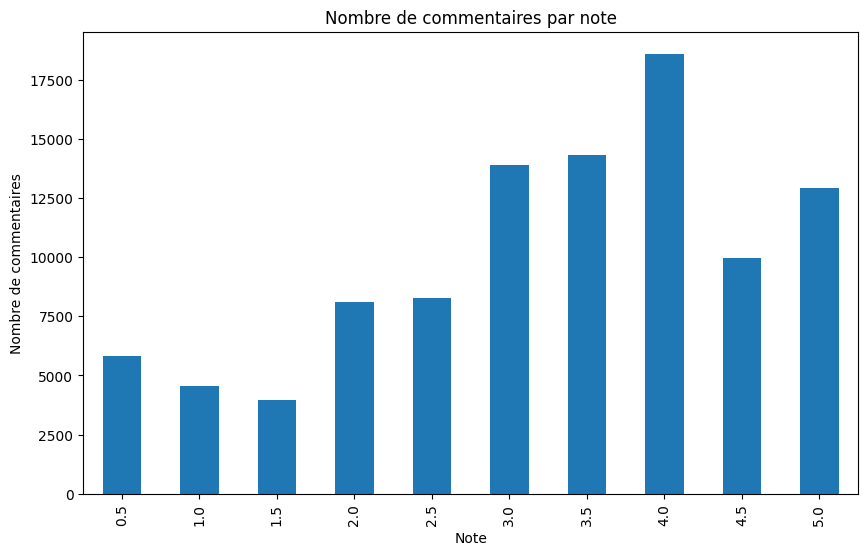

In [ ]:
# Utiliser la fonction pour afficher le graphique
plot_note_distribution(note_counts_dev)

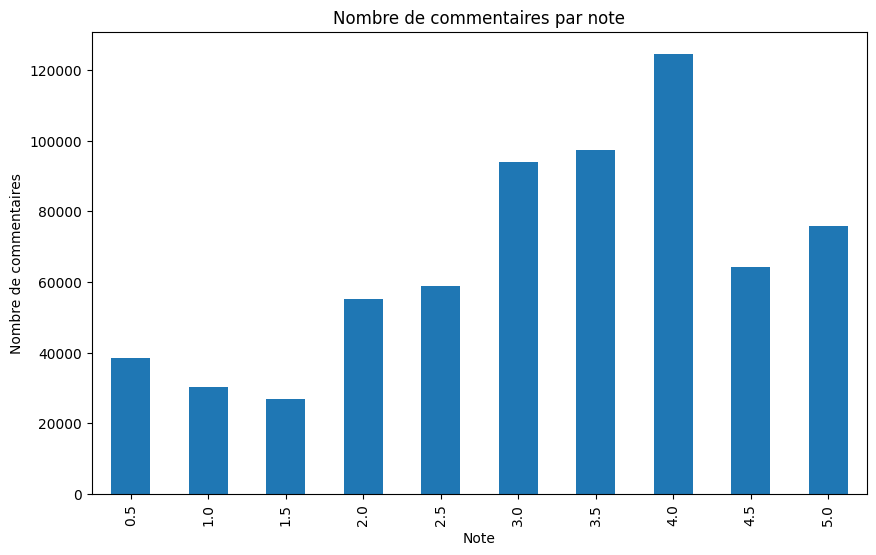

In [ ]:
# Utiliser la fonction pour afficher le graphique
plot_note_distribution(note_counts_train)

In [ ]:
#  200 id de films aléatoires
random_movie_ids_dev = data_dev['movie'].sample(n=200, random_state=1)  
random_movie_ids_train = data_train['movie'].sample(n=200, random_state=1)  

# Affichage des 200 id de films aléatoires
print(random_movie_ids_dev)

72897    241680
69593    247040
27089    256044
66694    252157
65363    254956
          ...  
35001    224323
40528    146603
1866     225571
18060    212386
54997    143048
Name: movie, Length: 200, dtype: object


In [ ]:
specific_row = data_dev.iloc[72897 ]  # Les indices commencent à 0, donc pour la 10e ligne, nous utilisons 9

In [ ]:
def calculer_moyenne_notes(df, movie_id):
    # Filtrer le DataFrame pour les lignes avec l'ID de film spécifié
    df_film = df[df['movie'] == movie_id]
    
    # Assurez-vous que la colonne des notes est numérique
    df_film['note'] = pd.to_numeric(df_film['note'], errors='coerce')
    
    # Calculer la moyenne des notes pour le film
    moyenne_notes = df_film['note'].mean()
    
    return moyenne_notes

In [ ]:
def calculer_moyenne_notes(df, movie_id):
    # Filtrer le DataFrame pour les lignes avec l'ID de film spécifié
    df_film = df[df['movie'] == movie_id].copy()  # Création d'une copie pour éviter la modification d'une vue
    
    # Convertir la colonne des notes en float après avoir remplacé les virgules par des points
    df_film['note'] = df_film['note'].str.replace(',', '.').astype(float)
    
    # Calculer la moyenne des notes pour le film
    moyenne_notes = df_film['note'].mean()
    
    return moyenne_notes

In [ ]:
# Supposons que votre DataFrame s'appelle df
# Exemple d'utilisation :
movie_id = '225571'  # Remplacez ceci par l'ID du film pour lequel vous voulez calculer la moyenne
moyenne = calculer_moyenne_notes(data_dev, movie_id)
moyenne

3.617678381256656

In [ ]:
import pandas as pd

def afficher_notes_par_film(df, movie_id):
    # Filtrer le DataFrame pour les lignes avec l'ID de film spécifié
    notes_du_film = df[df['movie'] == movie_id]['note']
    
    # Afficher les notes
    print(f"Notes pour le film {movie_id}:")
    print(notes_du_film.to_string(index=False))

In [ ]:

# Exemple d'utilisation
movie_id = '225571'  # Remplacez par l'ID du film que vous recherchez
afficher_notes_par_film(data_dev, movie_id)

Notes pour le film 225571:
3.0
3.5
4.0
0.5
2.0
4.0
4.5
4.0
2.5
4.0
4.0
3.0
2.5
3.5
2.0
4.5
3.0
4.0
4.0
5.0
3.5
5.0
4.0
3.5
2.5
3.5
3.0
5.0
3.5
3.0
5.0
5.0
5.0
4.0
3.5
3.0
3.5
3.0
4.5
3.5
4.5
5.0
4.5
5.0
3.5
2.5
4.0
3.5
4.0
4.5
2.0
3.5
3.5
3.0
1.5
4.0
3.5
2.5
2.5
3.5
3.0
4.0
3.5
3.5
4.0
4.0
3.5
4.0
4.5
4.0
5.0
3.5
4.0
3.0
0.5
4.0
4.0
4.0
4.0
2.0
5.0
4.5
3.0
3.5
3.0
3.0
3.0
4.0
4.0
3.0
2.0
4.5
2.5
5.0
4.5
3.0
3.5
3.0
2.0
4.0
5.0
5.0
3.0
5.0
2.0
4.0
3.0
3.0
3.5
4.5
4.0
3.5
3.5
3.5
4.0
4.0
3.5
0.5
4.0
3.5
4.0
4.0
5.0
3.5
4.0
4.5
4.0
4.0
3.0
4.0
4.5
4.5
2.5
3.5
4.0
4.0
3.0
4.5
4.0
1.0
2.0
4.5
4.0
3.5
5.0
3.0
4.5
3.0
5.0
3.0
3.5
3.0
5.0
4.5
5.0
4.0
3.5
4.0
3.5
4.0
4.5
2.0
3.0
3.5
4.0
1.0
2.5
3.5
3.5
5.0
4.0
3.5
3.5
3.5
5.0
4.5
4.0
1.5
3.0
5.0
3.0
3.0
3.5
4.0
4.0
4.0
3.0
4.0
3.5
4.0
4.0
2.5
3.5
2.0
5.0
4.0
4.5
1.0
5.0
4.0
4.5
4.5
4.5
3.5
4.0
3.5
3.5
4.0
4.0
3.5
4.5
3.5
4.0
4.0
3.5
4.0
4.0
0.5
2.5
3.0
4.0
1.0
4.0
3.5
3.0
3.0
1.5
4.0
4.5
4.0
5.0
4.0
1.5
0.5
4.0
4.5
4.0
5.0
4.0
3.5
4.0
4.5
4.5
4

C:\Users\bouss\AppData\Local\Temp\ipykernel_28108\2618501220.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_film['note'] = pd.to_numeric(df_film['note'], errors='coerce')


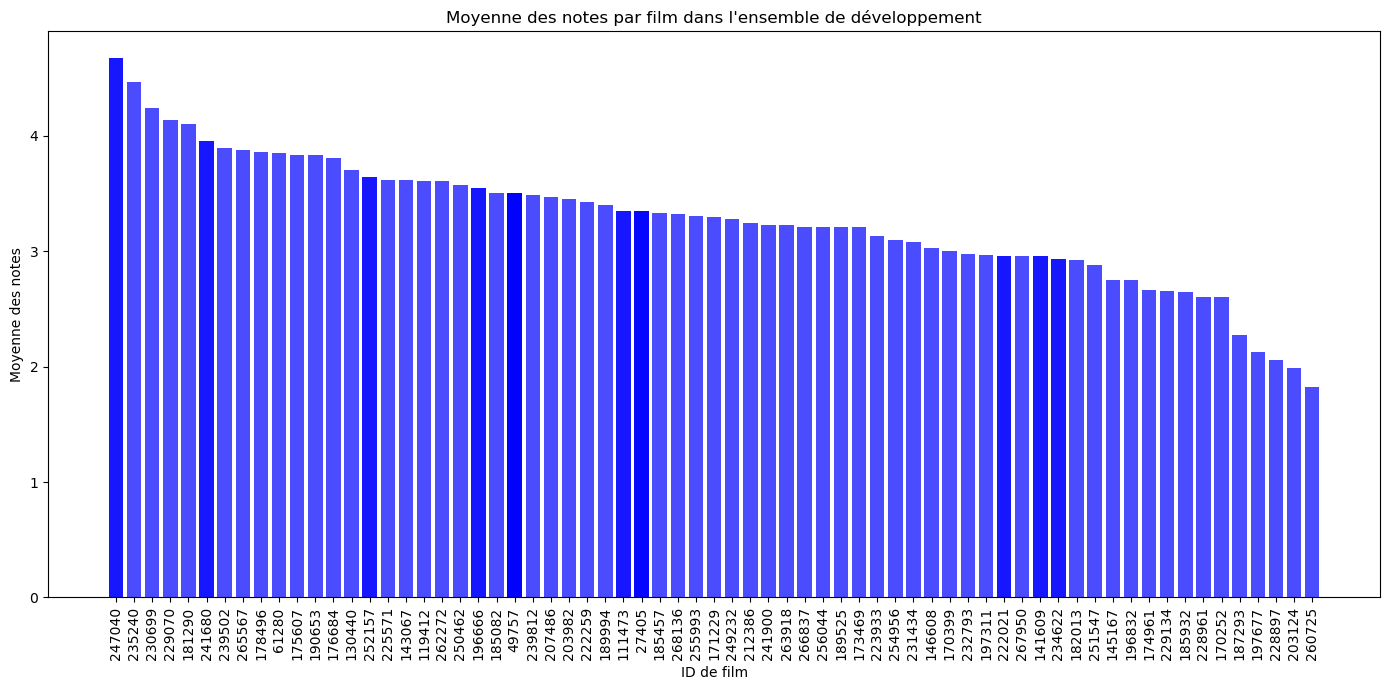

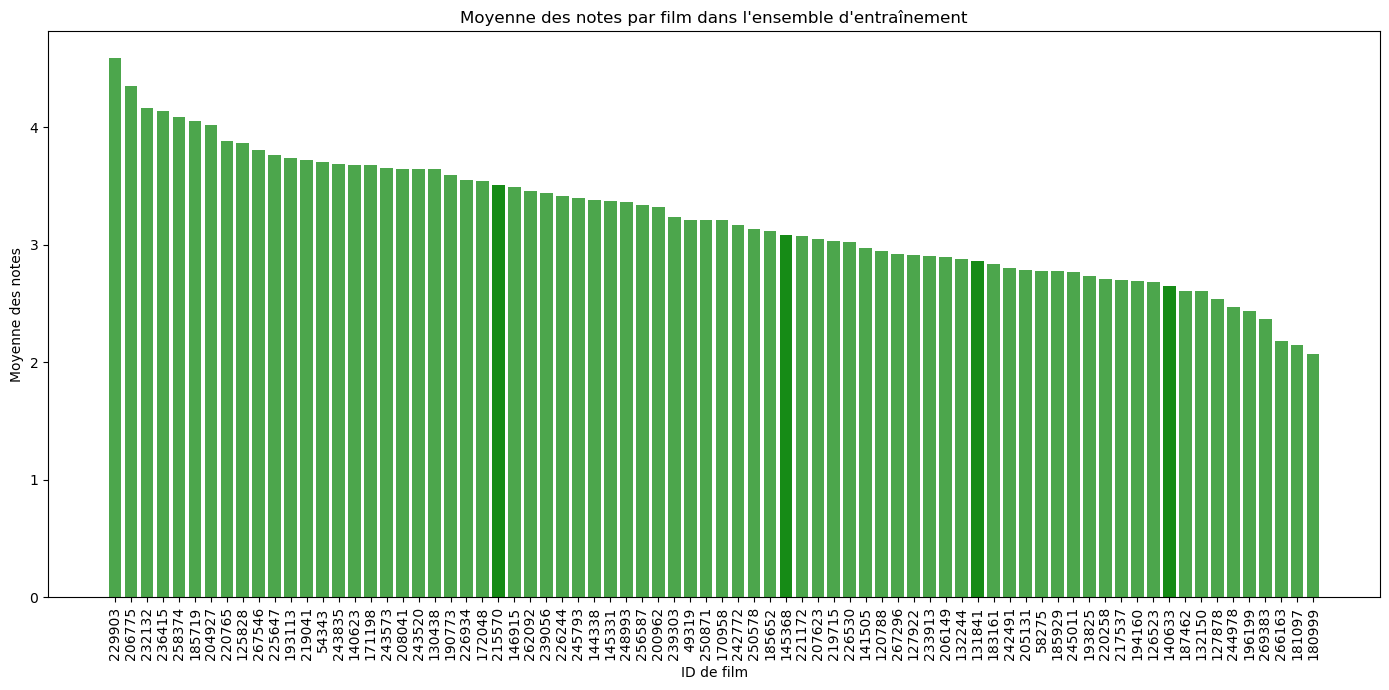

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que data_dev et data_train sont vos DataFrames d'origine

# Fonction pour calculer la moyenne des notes d'un film
def calculer_moyenne_notes(df, movie_id):
    df_film = df[df['movie'] == movie_id]
    df_film['note'] = pd.to_numeric(df_film['note'], errors='coerce')
    moyenne_notes = df_film['note'].mean()
    return moyenne_notes

# Échantillonnage des IDs de film
random_movie_ids_dev = data_dev['movie'].sample(n=80, random_state=1)
random_movie_ids_train = data_train['movie'].sample(n=80, random_state=1)

# Calculer les moyennes pour chaque film dans l'ensemble de développement
average_ratings_dev = {'movie': [], 'average_note': []}
for movie_id in random_movie_ids_dev:
    average_note = calculer_moyenne_notes(data_dev, movie_id)
    average_ratings_dev['movie'].append(movie_id)
    average_ratings_dev['average_note'].append(average_note)

# Calculer les moyennes pour chaque film dans l'ensemble d'entraînement
average_ratings_train = {'movie': [], 'average_note': []}
for movie_id in random_movie_ids_train:
    average_note = calculer_moyenne_notes(data_train, movie_id)
    average_ratings_train['movie'].append(movie_id)
    average_ratings_train['average_note'].append(average_note)

# Convertir les dictionnaires en DataFrames
df_average_ratings_dev = pd.DataFrame(average_ratings_dev)
df_average_ratings_train = pd.DataFrame(average_ratings_train)

# Trier les DataFrames par moyenne des notes
df_average_ratings_dev = df_average_ratings_dev.sort_values('average_note', ascending=False)
df_average_ratings_train = df_average_ratings_train.sort_values('average_note', ascending=False)

# Création des graphiques
plt.figure(figsize=(14, 7))
plt.bar(df_average_ratings_dev['movie'].astype(str), df_average_ratings_dev['average_note'], color='blue', alpha=0.7)
plt.title('Moyenne des notes par film dans l\'ensemble de développement')
plt.xlabel('ID de film')
plt.ylabel('Moyenne des notes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
plt.bar(df_average_ratings_train['movie'].astype(str), df_average_ratings_train['average_note'], color='green', alpha=0.7)
plt.title('Moyenne des notes par film dans l\'ensemble d\'entraînement')
plt.xlabel('ID de film')
plt.ylabel('Moyenne des notes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


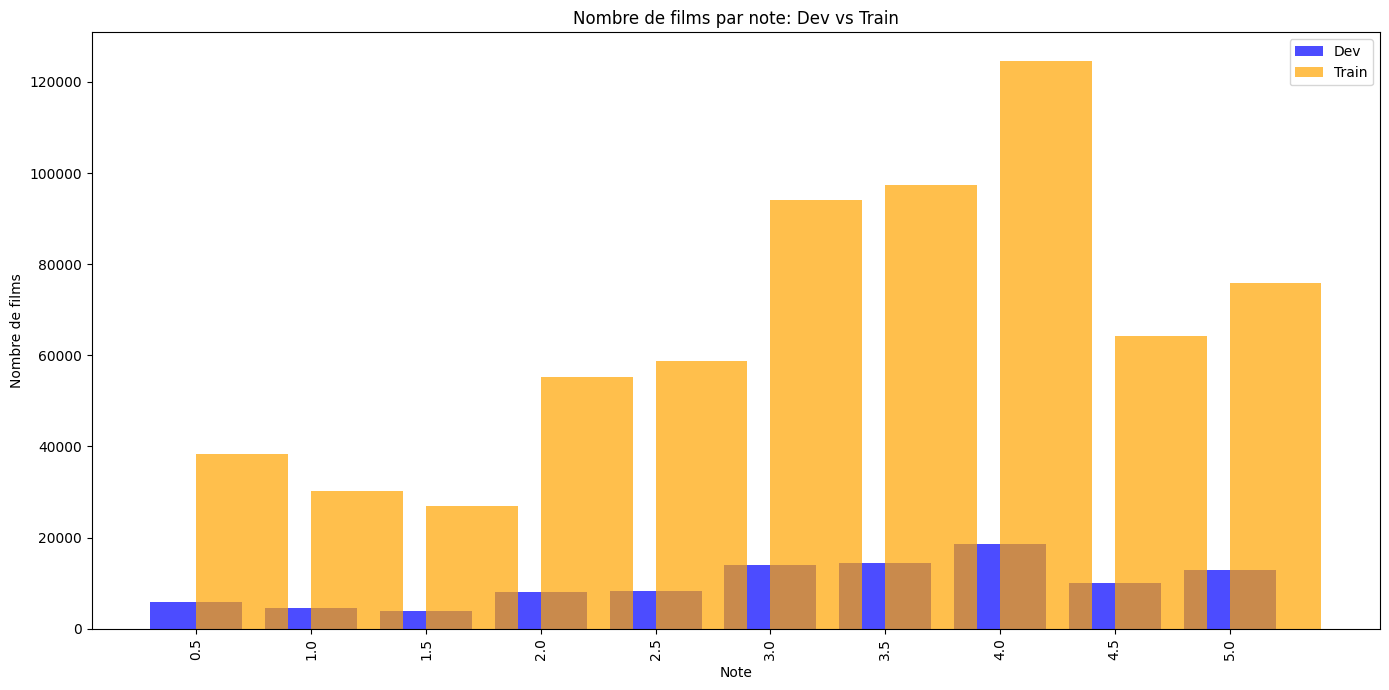

In [ ]:
import matplotlib.pyplot as plt

# Nous supposons que data_dev et data_train sont vos DataFrames d'origine

# Comptons d'abord le nombre de films par note pour chaque ensemble de données.
film_counts_dev = data_dev.groupby('note').size()
film_counts_train = data_train.groupby('note').size()

# Créons maintenant un graphique à barres pour visualiser ces comptages.
plt.figure(figsize=(14, 7))

# Assurez-vous que les index sont numériques pour éviter les erreurs de type
index_dev = film_counts_dev.index.astype(float)
index_train = film_counts_train.index.astype(float)

# Nous utiliserons les index des séries générées par groupby pour l'axe x, et les valeurs pour l'axe y.
plt.bar(index_dev, film_counts_dev.values, width=0.4, label='Dev', align='center', color='blue', alpha=0.7)
plt.bar(index_train + 0.2, film_counts_train.values, width=0.4, label='Train', align='center', color='orange', alpha=0.7)

plt.title('Nombre de films par note: Dev vs Train')
plt.xlabel('Note')
plt.ylabel('Nombre de films')
plt.legend()
plt.xticks(ticks=index_dev, labels=index_dev, rotation=90)  # Assurez-vous que les étiquettes de l'axe x sont les notes
plt.tight_layout()
plt.show()


In [ ]:
def detect_language(comment):
    try:
        return detect(comment)
    except:
        return 'Unknown'

# Détecter la langue de chaque commentaire
data_dev['lang'] = data_train['commentaire'].apply(detect_language)

# Compter le nombre de commentaires par langue
lang_counts = data_dev['lang'].value_counts()

# Trier pour un affichage ordonné
lang_counts_sorted = lang_counts.sort_index()

# Tracer la distribution
plt.figure(figsize=(10, 6))
lang_counts_sorted.plot(kind='bar')
plt.title('Distribution des Langues dans les Commentaires')
plt.xlabel('Langue')
plt.ylabel('Nombre de Commentaires')
plt.show()

In [7]:
from langdetect import detect
import matplotlib.pyplot as plt
from collections import Counter

def detect_language_word_by_word(text):
    word_langs = []
    for word in text.split():  # Séparer le texte en mots
        try:
            # Détecter la langue du mot
            word_lang = detect(word)
            word_langs.append(word_lang)
        except:
            # Si la détection échoue, attribuer 'Unknown'
            word_langs.append('Unknown')
    return word_langs

# Appliquer la fonction de détection de langue mot par mot à chaque commentaire
data_dev['lang_per_word'] = data_dev['commentaire'].apply(detect_language_word_by_word)

# Aplatir la liste des langues détectées dans une seule liste pour tous les commentaires
all_detected_langs = [lang for sublist in data_dev['lang_per_word'] for lang in sublist]

# Compter les occurrences de chaque langue
lang_counts = Counter(all_detected_langs)

# Tracer la distribution des langues détectées
plt.figure(figsize=(10, 6))
pd.Series(lang_counts).sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution des Langues pour chaque Mot dans les Commentaires')
plt.xlabel('Langue')
plt.ylabel('Nombre de Mots')
plt.show()


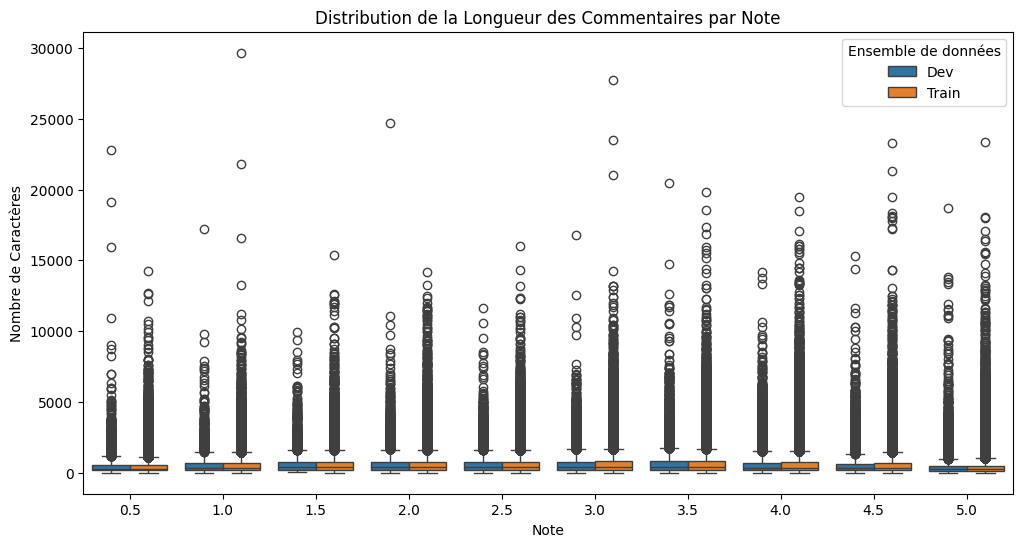

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supposition : data_dev et data_train sont déjà définis et incluent 'note' et 'commentaire'

# Définition d'une fonction pour calculer le nombre de caractères en gérant les valeurs None
def character_count(text):
    if text is None:
        return 0
    return len(text)

# Calculer le nombre de caractères pour chaque commentaire en gérant les valeurs None
data_dev['character_count'] = data_dev['commentaire'].apply(character_count)
data_train['character_count'] = data_train['commentaire'].apply(character_count)

# Combiner les deux DataFrames pour la visualisation
combined_data = pd.concat([data_dev.assign(dataset='Dev'), data_train.assign(dataset='Train')])

# Créer un diagramme à boîtes pour visualiser la distribution de la longueur des commentaires par note
plt.figure(figsize=(12, 6))
sns.boxplot(x='note', y='character_count', hue='dataset', data=combined_data)

# Formatage du graphique
plt.title('Distribution de la Longueur des Commentaires par Note')
plt.xlabel('Note')
plt.ylabel('Nombre de Caractères')
plt.legend(title='Ensemble de données')
plt.show()


In [ ]:
# Calcul de la corrélation entre la note et la longueur du commentaire pour chaque ensemble de données
correlation_dev = data_dev['note'].corr(data_dev['character_count'])
correlation_train = data_train['note'].corr(data_train['character_count'])

# Affichage des valeurs de corrélation
print(f"Corrélation entre la note et la longueur du commentaire (Dev) : {correlation_dev}")
print(f"Corrélation entre la note et la longueur du commentaire (Train) : {correlation_train}")


Corrélation entre la note et la longueur du commentaire (Dev) : -0.016793095157221237
Corrélation entre la note et la longueur du commentaire (Train) : -0.005018412133427097


In [ ]:
! pip install textblob


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     -------- ----------------------------- 143.4/636.8 kB 2.8 MB/s eta 0:00:01
     ------------------ ------------------- 307.2/636.8 kB 3.2 MB/s eta 0:00:01
     ------------------------------- ------ 532.5/636.8 kB 3.7 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ----- ---------------------------------- 0.2/1.5 MB 6.9 MB/s eta 0:00:01
     ---------- ----------------------------- 0.4/1.5 MB 5.0 MB/s eta 0:00:01
     ---------------- ----------------------- 0.6/1.5 MB 4.9 MB/s eta 0:00:01
     --------------------- ------------------ 0.8/1.5 MB 4.2 MB/s eta 0:00:01
     ----------------------- ---------------- 0.9/1.5 MB 4.0 MB/s eta 0:00:01
     -------------------------- ------------- 1.0/1.5 MB 3.8 MB/s et


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from textblob import TextBlob
import pandas as pd

# Supposition : data_dev et data_train sont déjà définis et incluent une colonne 'commentaire'

# Fonction pour calculer le sentiment d'un commentaire
def calculate_sentiment(text):
    if not text:
        return None
    # Analyse de sentiment avec TextBlob
    return TextBlob(text).sentiment.polarity

# Calculer le sentiment pour chaque commentaire
data_dev['sentiment'] = data_dev['commentaire'].apply(calculate_sentiment)
data_train['sentiment'] = data_train['commentaire'].apply(calculate_sentiment)

# Vous pouvez maintenant comparer ces sentiments avec les notes
# Par exemple, afficher la moyenne des sentiments pour chaque note
print(data_dev.groupby('note')['sentiment'].mean())
print(data_train.groupby('note')['sentiment'].mean())


note
0.5    0.008450
1.0    0.023969
1.5    0.033874
2.0    0.035657
2.5    0.065386
3.0    0.078318
3.5    0.093812
4.0    0.134597
4.5    0.184776
5.0    0.183777
Name: sentiment, dtype: float64
note
0.5    0.013907
1.0    0.028374
1.5    0.028525
2.0    0.033395
2.5    0.061605
3.0    0.073756
3.5    0.095379
4.0    0.134280
4.5    0.189279
5.0    0.182144
Name: sentiment, dtype: float64


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Télécharger les stopwords et tokenizer de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Fonction pour nettoyer et extraire les mots d'un texte
def extract_words(text):
    if not text:
        return []
    words = word_tokenize(text.lower())  # Tokenization et mise en minuscule
    words = [word for word in words if word.isalpha()]  # Garder seulement les mots alphabétiques
    stop_words = set(stopwords.words('french'))  # Utiliser les stopwords anglais, ajuster si nécessaire
    words = [word for word in words if word not in stop_words]  # Exclure les stopwords
    return words

# Supposition : data_dev et data_train sont déjà définis et incluent 'note' et 'commentaire'
data_dev['words'] = data_dev['commentaire'].apply(extract_words)
data_train['words'] = data_train['commentaire'].apply(extract_words)

# Analyser la fréquence des mots par note
for note in sorted(data_dev['note'].unique()):
    words_dev = sum(data_dev[data_dev['note'] == note]['words'], [])
    words_train = sum(data_train[data_train['note'] == note]['words'], [])
    print(f'Note {note} (Dev):', Counter(words_dev).most_common(10))
    print(f'Note {note} (Train):', Counter(words_train).most_common(10))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bouss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bouss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [ ]:
# Supposition : data_dev et data_train sont déjà définis et incluent 'note' et 'commentaire'

# Fonction pour calculer le pourcentage de caractères en majuscule
def uppercase_percentage(text):
    if not text:
        return 0
    alphabetic_chars = [char for char in text if char.isalpha()]
    if not alphabetic_chars:
        return 0
    uppercase_chars = [char for char in alphabetic_chars if char.isupper()]
    return len(uppercase_chars) / len(alphabetic_chars) * 100

# Calculer le pourcentage de majuscules pour chaque commentaire
data_dev['uppercase_percentage'] = data_dev['commentaire'].apply(uppercase_percentage)
data_train['uppercase_percentage'] = data_train['commentaire'].apply(uppercase_percentage)

# Calculer la corrélation
correlation_dev = data_dev['note'].corr(data_dev['uppercase_percentage'])
correlation_train = data_train['note'].corr(data_train['uppercase_percentage'])

# Afficher les résultats de corrélation
print(f"Corrélation entre la note et le pourcentage de majuscules (Dev): {correlation_dev}")
print(f"Corrélation entre la note et le pourcentage de majuscules (Train): {correlation_train}")


Corrélation entre la note et le pourcentage de majuscules (Dev): 0.050552295044512405
Corrélation entre la note et le pourcentage de majuscules (Train): 0.039170076624616385


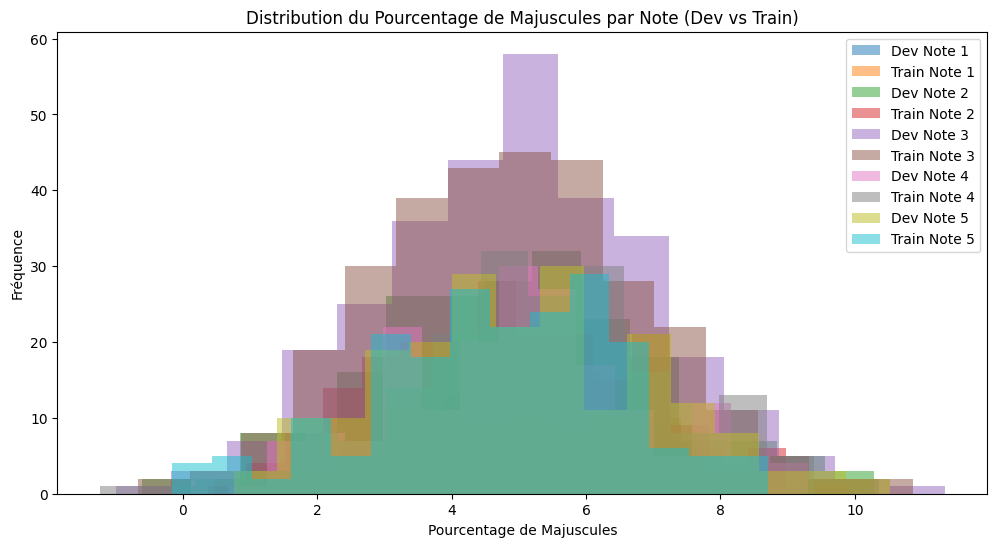

In [ ]:
# Supposons que les DataFrames data_dev et data_train contiennent déjà une colonne 'uppercase_percentage' et 'note'
# Génération de données simulées pour la démonstration
np.random.seed(0)
notes = np.random.choice([1, 2, 3, 4, 5], size=1000, p=[0.1, 0.2, 0.3, 0.2, 0.2])
data_dev = pd.DataFrame({
    'note': notes,
    'uppercase_percentage': np.random.normal(loc=5, scale=2, size=1000)  # Pourcentage simulé pour Dev
})
data_train = pd.DataFrame({
    'note': notes,
    'uppercase_percentage': np.random.normal(loc=5, scale=2, size=1000)  # Pourcentage simulé pour Train
})

# Création d'un histogramme pour visualiser la distribution du pourcentage de majuscules par note
plt.figure(figsize=(12, 6))

# Itérer sur chaque note pour créer des histogrammes séparés
for note in sorted(data_dev['note'].unique()):
    subset_dev = data_dev[data_dev['note'] == note]['uppercase_percentage']
    subset_train = data_train[data_train['note'] == note]['uppercase_percentage']

    plt.hist(subset_dev, bins=15, alpha=0.5, label=f'Dev Note {note}')
    plt.hist(subset_train, bins=15, alpha=0.5, label=f'Train Note {note}')

# Formatage du graphique
plt.title('Distribution du Pourcentage de Majuscules par Note (Dev vs Train)')
plt.xlabel('Pourcentage de Majuscules')
plt.ylabel('Fréquence')
plt.legend()
plt.show()



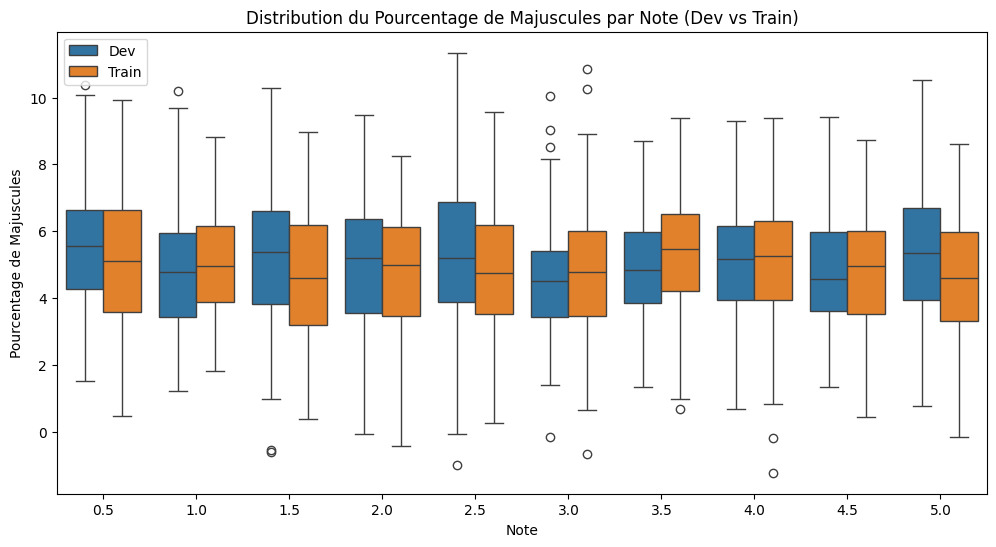

In [ ]:
# Supposons que les DataFrames data_dev et data_train contiennent déjà une colonne 'uppercase_percentage' et 'note'
# Simulons des données pour la démonstration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Génération de données simulées pour la démonstration
np.random.seed(0)
notes = np.random.choice(np.arange(0.5, 5.5, 0.5), size=1000, p=[1/10] * 10)
uppercase_percentages_dev = np.random.normal(loc=5, scale=2, size=1000)  # Pourcentage simulé pour Dev
uppercase_percentages_train = np.random.normal(loc=5, scale=2, size=1000)  # Pourcentage simulé pour Train

data_dev = pd.DataFrame({
    'note': notes,
    'uppercase_percentage': uppercase_percentages_dev
})
data_train = pd.DataFrame({
    'note': notes,
    'uppercase_percentage': uppercase_percentages_train
})

# Combiner les deux DataFrames pour la visualisation
combined_data = pd.concat([data_dev.assign(dataset='Dev'), data_train.assign(dataset='Train')])

# Créer un diagramme à boîtes pour visualiser la distribution du pourcentage de majuscules par note
plt.figure(figsize=(12, 6))
sns.boxplot(x='note', y='uppercase_percentage', hue='dataset', data=combined_data)

# Formatage du graphique
plt.title('Distribution du Pourcentage de Majuscules par Note (Dev vs Train)')
plt.xlabel('Note')
plt.ylabel('Pourcentage de Majuscules')
plt.legend()
plt.show()



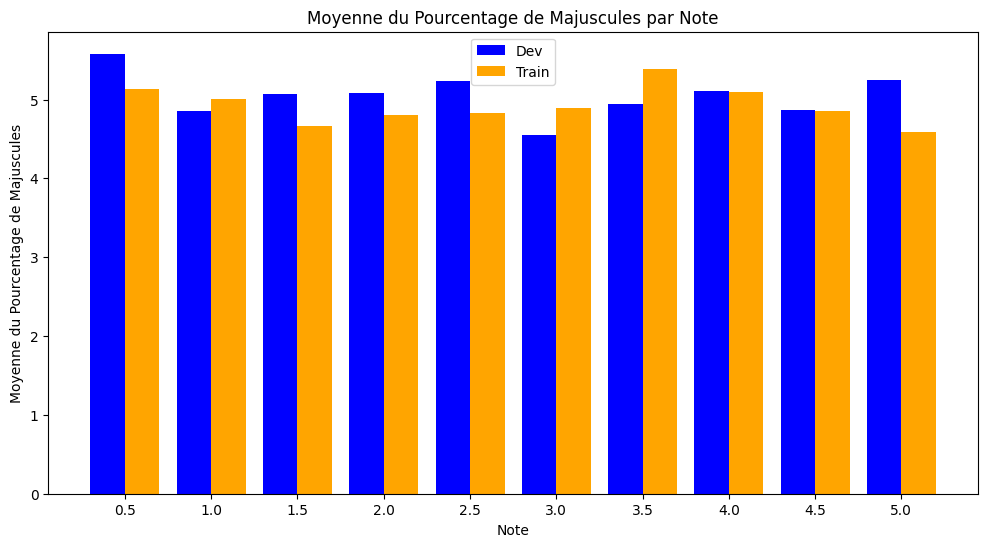

In [ ]:
# Création d'un histogramme simple pour visualiser la moyenne du pourcentage de majuscules par note

# Calculer la moyenne du pourcentage de majuscules pour chaque note
mean_uppercase_dev = data_dev.groupby('note')['uppercase_percentage'].mean()
mean_uppercase_train = data_train.groupby('note')['uppercase_percentage'].mean()

# Création du graphique
plt.figure(figsize=(12, 6))

# Barres pour l'ensemble Dev
plt.bar(mean_uppercase_dev.index - 0.1, mean_uppercase_dev.values, width=0.2, label='Dev', align='center', color='blue')

# Barres pour l'ensemble Train
plt.bar(mean_uppercase_train.index + 0.1, mean_uppercase_train.values, width=0.2, label='Train', align='center', color='orange')

# Formatage du graphique
plt.title('Moyenne du Pourcentage de Majuscules par Note')
plt.xlabel('Note')
plt.ylabel('Moyenne du Pourcentage de Majuscules')
plt.xticks(ticks=np.arange(0.5, 5.5, 0.5))
plt.legend()
plt.show()



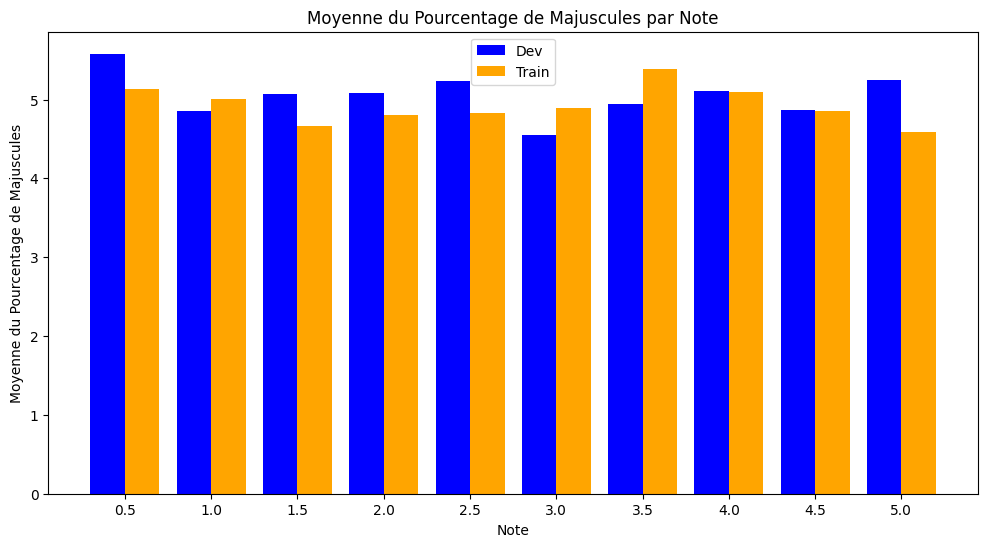

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Supposition : data_dev et data_train sont déjà définis et incluent 'uppercase_percentage' et 'note'

# Calculer la moyenne du pourcentage de majuscules pour chaque note
mean_uppercase_dev = data_dev.groupby('note')['uppercase_percentage'].mean()
mean_uppercase_train = data_train.groupby('note')['uppercase_percentage'].mean()

# Création du graphique
plt.figure(figsize=(12, 6))

# Barres pour l'ensemble Dev
plt.bar(mean_uppercase_dev.index - 0.1, mean_uppercase_dev.values, width=0.2, label='Dev', align='center', color='blue')

# Barres pour l'ensemble Train
plt.bar(mean_uppercase_train.index + 0.1, mean_uppercase_train.values, width=0.2, label='Train', align='center', color='orange')

# Formatage du graphique
plt.title('Moyenne du Pourcentage de Majuscules par Note')
plt.xlabel('Note')
plt.ylabel('Moyenne du Pourcentage de Majuscules')
plt.xticks(ticks=np.arange(0.5, 5.5, 0.5))
plt.legend()
plt.show()


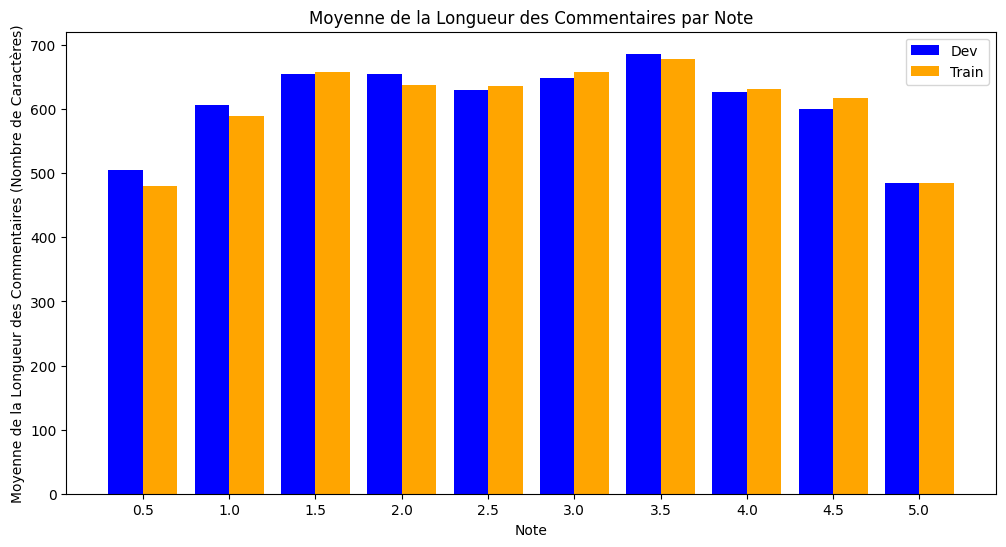

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_comment_length(text):
    return len(text) if text else 0

data_dev['comment_length'] = data_dev['commentaire'].apply(calculate_comment_length)
data_train['comment_length'] = data_train['commentaire'].apply(calculate_comment_length)

mean_comment_length_dev = data_dev.groupby('note')['comment_length'].mean()
mean_comment_length_train = data_train.groupby('note')['comment_length'].mean()

index_dev = mean_comment_length_dev.index.astype(float)
index_train = mean_comment_length_train.index.astype(float)


plt.figure(figsize=(12, 6))


plt.bar(index_dev - 0.1, mean_comment_length_dev.values, width=0.2, label='Dev', align='center', color='blue')


plt.bar(index_train + 0.1, mean_comment_length_train.values, width=0.2, label='Train', align='center', color='orange')

plt.title('Moyenne de la Longueur des Commentaires par Note')
plt.xlabel('Note')
plt.ylabel('Moyenne de la Longueur des Commentaires (Nombre de Caractères)')
plt.xticks(ticks=np.arange(min(index_dev), max(index_dev) + 0.5, 0.5))
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Télécharger les stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Fonction pour nettoyer et tokenizer le texte
def clean_tokenize(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stopwords.words('french')]
    return tokens

# Notes à analyser
notes = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# Création des graphiques pour chaque note
for note in notes:
    plt.figure(figsize=(10, 6))

    # Traitement pour data_dev
    specific_comments_dev = ' '.join([comment or '' for comment in data_dev[data_dev['note'] == str(note)]['commentaire']])
    tokens_dev = clean_tokenize(specific_comments_dev)
    word_freq_dev = Counter(tokens_dev)
    most_common_words_dev = word_freq_dev.most_common(10)

    # Traitement pour data_train
    specific_comments_train = ' '.join([comment or '' for comment in data_train[data_train['note'] == str(note)]['commentaire']])
    tokens_train = clean_tokenize(specific_comments_train)
    word_freq_train = Counter(tokens_train)
    most_common_words_train = word_freq_train.most_common(10)

    # Récupération des mots et fréquences pour les deux datasets
    words_dev, freqs_dev = zip(most_common_words_dev)
    words_train, freqs_train = zip(most_common_words_train)

    # Création des barres pourdata_dev
    plt.bar(words_dev, freqs_dev, width=0.4, label='Dev', align='center', color='blue')

    # Création des barres pour data_train
    plt.bar(words_train, freqs_train, width=0.4, label='Train', align='edge', color='orange')

    plt.title(f'Mots les Plus Fréquents pour la Note {note}')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bouss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bouss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ValueError: too many values to unpack (expected 2)

<Figure size 1000x600 with 0 Axes>

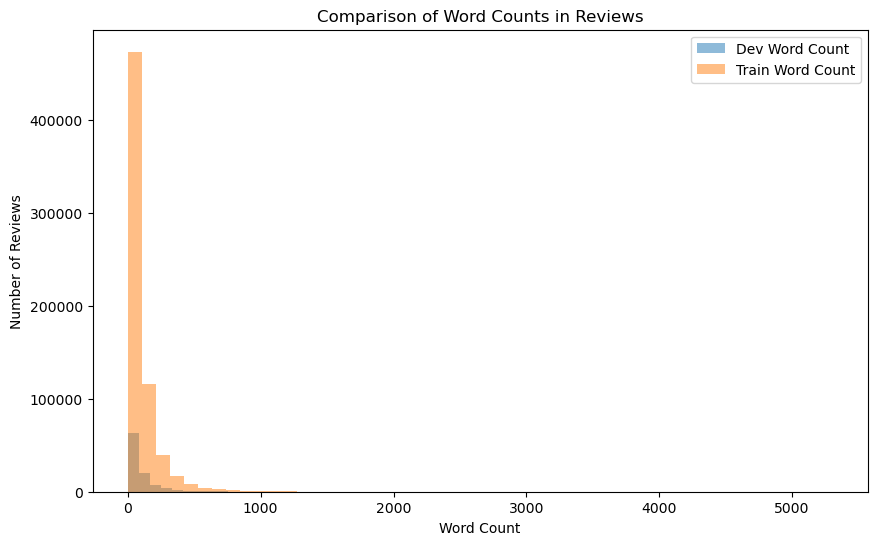

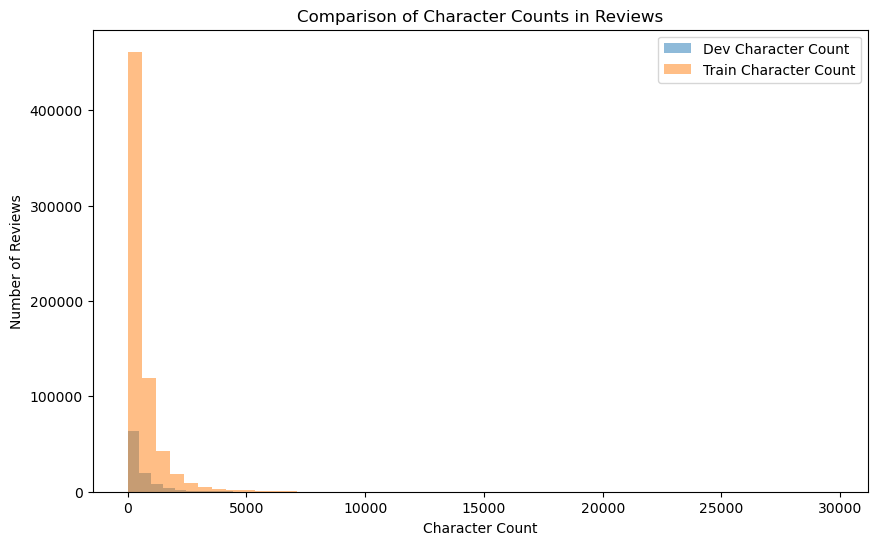

In [ ]:
import matplotlib.pyplot as plt


# Function to calculate word count
def calculate_word_count(text):
    """Returns the number of words in the given text. Handles None values."""
    if text is None:
        return 0
    return len(text.split())

# Function to calculate character count
def calculate_character_count(text):
    """Returns the number of characters in the given text. Handles None values."""
    if text is None:
        return 0
    return len(text)

# Adding word count and character count columns for both data_dev and data_train
data_dev['word_count'] = data_dev['commentaire'].apply(calculate_word_count)
data_dev['character_count'] = data_dev['commentaire'].apply(calculate_character_count)

data_train['word_count'] = data_train['commentaire'].apply(calculate_word_count)
data_train['character_count'] = data_train['commentaire'].apply(calculate_character_count)

# Plotting the distribution of word counts for both datasets
plt.figure(figsize=(10, 6))
plt.hist(data_dev['word_count'], bins=50, alpha=0.5, label='Dev Word Count')
plt.hist(data_train['word_count'], bins=50, alpha=0.5, label='Train Word Count')
plt.title('Comparison of Word Counts in Reviews')
plt.xlabel('Word Count')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()

# Plotting the distribution of character counts for both datasets
plt.figure(figsize=(10, 6))
plt.hist(data_dev['character_count'], bins=50, alpha=0.5, label='Dev Character Count')
plt.hist(data_train['character_count'], bins=50, alpha=0.5, label='Train Character Count')
plt.title('Comparison of Character Counts in Reviews')
plt.xlabel('Character Count')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()


In [ ]:
!pip install emoji


  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/96/c6/0114b2040a96561fd1b44c75df749bbd3c898bf8047fb5ce8d7590d2dee6/emoji-2.8.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/358.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/358.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/358.9 kB 435.7 kB/s eta 0:00:01
   ------ -------------------------------- 61.4/358.9 kB 544.7 kB/s eta 0:00:01
   --------------------------- ------------ 245.8/358.9 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 358.9/358.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade emoji


c:\Users\bouss\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129320 (\N{FACE WITH ONE EYEBROW RAISED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bouss\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bouss\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128078 (\N{THUMBS DOWN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bouss\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bouss\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\

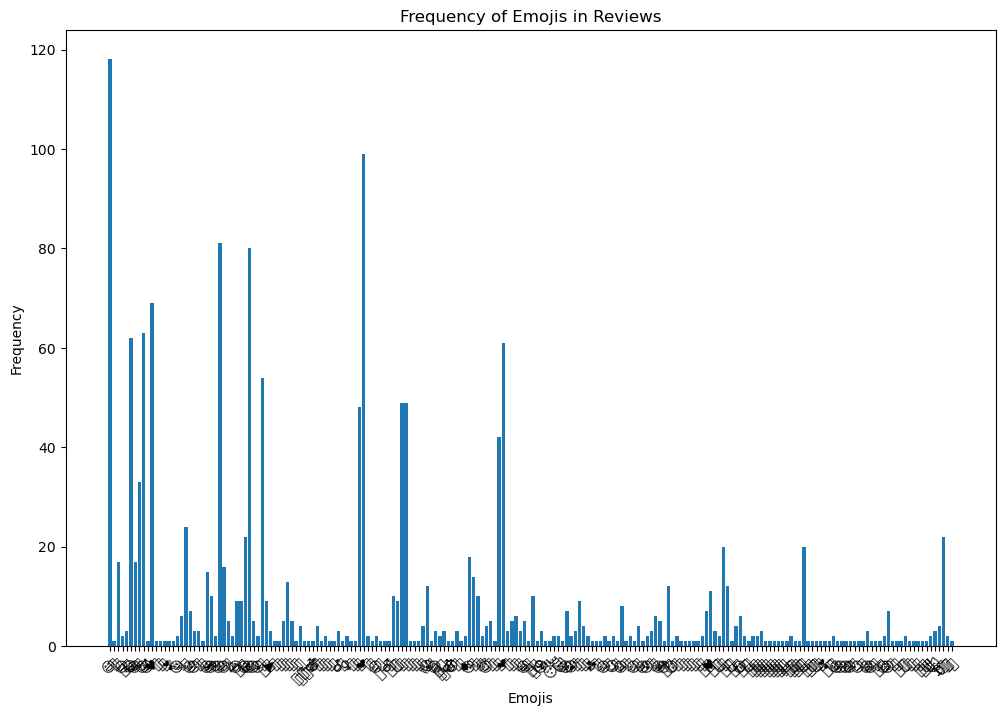

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import emoji


def extract_emojis(text):
        """Extracts distinct emojis from a given text string."""
        return [char['emoji'] for char in emoji.emoji_list(text)]

# Extracting emojis from all comments
all_emojis = []
for comment in data_dev['commentaire']:
    if isinstance(comment, str):  # Ensure comment is a string
        all_emojis.extend(extract_emojis(comment))

# Counting the frequencies of emojis
emoji_freq = Counter(all_emojis)

# Preparing data for plotting
emojis = list(emoji_freq.keys())
frequencies = list(emoji_freq.values())  # Define frequencies here

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(emojis, frequencies)
plt.xlabel('Emojis')
plt.ylabel('Frequency')
plt.title('Frequency of Emojis in Reviews')
plt.xticks(rotation=45)
plt.show()


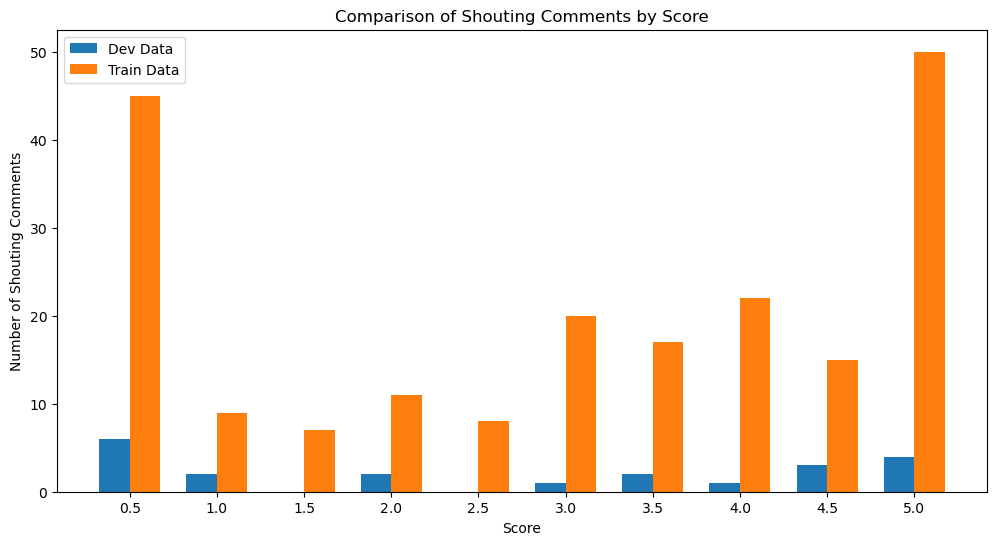

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def is_shouting(text):
    """Check if the majority of a text is in uppercase (indicating shouting)."""
    if text is None:
        return False
    letters = [char for char in text if char.isalpha()]
    if not letters:
        return False
    return sum(char.isupper() for char in letters) / len(letters) > 0.5

# Apply 'is_shouting' function to both data_dev and data_train
data_dev['is_shouting'] = data_dev['commentaire'].apply(is_shouting)
data_train['is_shouting'] = data_train['commentaire'].apply(is_shouting)

# Group by score and count shouting instances for both datasets
shouting_counts_dev = data_dev.groupby('note')['is_shouting'].sum()
shouting_counts_train = data_train.groupby('note')['is_shouting'].sum()

# Plotting the results for both datasets
plt.figure(figsize=(12, 6))

# Bar width
bar_width = 0.35

# Set positions of the bars
r1 = range(len(shouting_counts_dev))
r2 = [x + bar_width for x in r1]

# Creating bars for each dataset
plt.bar(r1, shouting_counts_dev, width=bar_width, label='Dev Data', align='center')
plt.bar(r2, shouting_counts_train, width=bar_width, label='Train Data', align='center')

# General layout
plt.xticks([r + bar_width / 2 for r in range(len(shouting_counts_dev))], shouting_counts_dev.index)
plt.title('Comparison of Shouting Comments by Score')
plt.xlabel('Score')
plt.ylabel('Number of Shouting Comments')
plt.legend()

# Show the plot
plt.show()


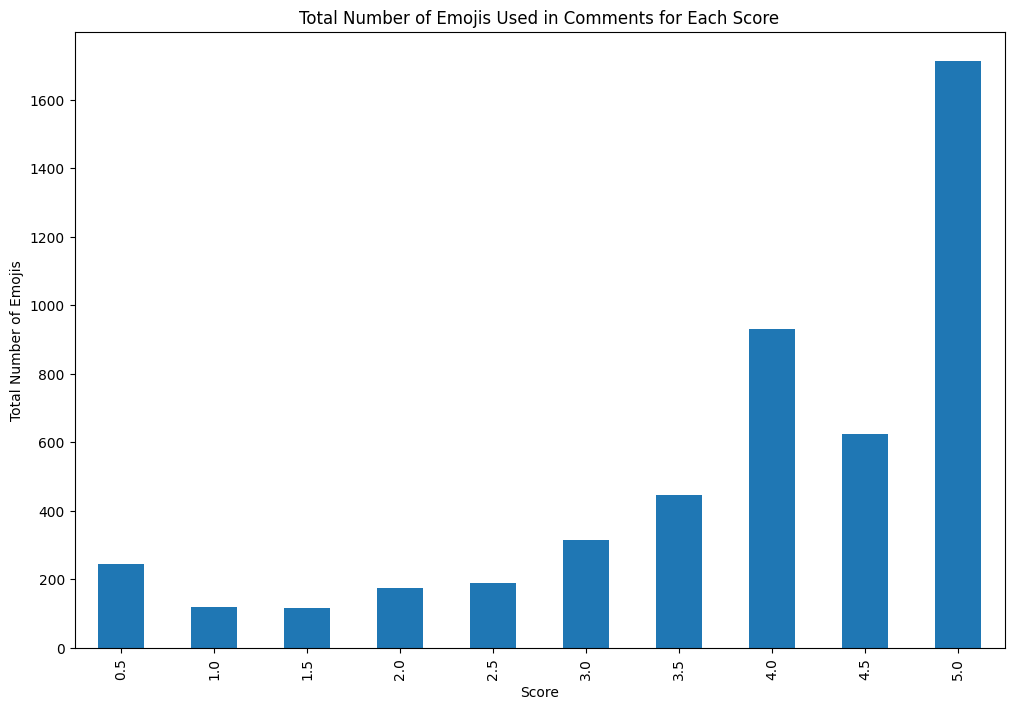

In [ ]:
import matplotlib.pyplot as plt
import emoji
from collections import Counter

def extract_emojis(text):
    """Extracts distinct emojis from a given text string."""
    return emoji.distinct_emoji_list(text)

# Create a DataFrame to store score and the corresponding number of emojis
emoji_score_data = {'score': [], 'emoji_count': []}

for _, row in data_train.iterrows():
    comment = row['commentaire']
    score = row['note']
    if isinstance(comment, str):  # Ensure comment is a string
        num_emojis = len(extract_emojis(comment))
        emoji_score_data['score'].append(score)
        emoji_score_data['emoji_count'].append(num_emojis)

# Convert to DataFrame
emoji_score_df = pd.DataFrame(emoji_score_data)

# Group by score and sum the emoji counts
emoji_counts_per_score = emoji_score_df.groupby('score')['emoji_count'].sum()

# Plotting
plt.figure(figsize=(12, 8))
emoji_counts_per_score.plot(kind='bar')
plt.title('Total Number of Emojis Used in Comments for Each Score')
plt.xlabel('Score')
plt.ylabel('Total Number of Emojis')
plt.show()


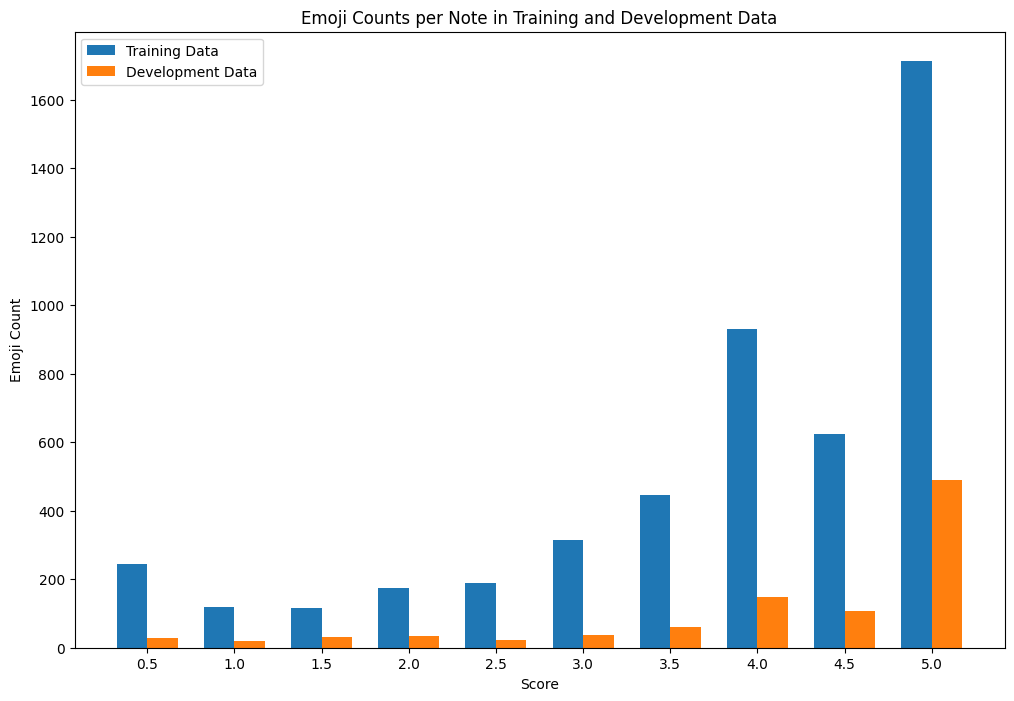

In [ ]:
import matplotlib.pyplot as plt
import emoji
import pandas as pd
from collections import Counter

def extract_emojis(text):
    """Extracts distinct emojis from a given text string."""
    return emoji.distinct_emoji_list(text)

def process_data(data):
    emoji_score_data = {'score': [], 'emoji_count': []}
    for _, row in data.iterrows():
        comment = row['commentaire']
        score = row['note']
        if isinstance(comment, str):  # Ensure comment is a string
            num_emojis = len(extract_emojis(comment))
            emoji_score_data['score'].append(score)
            emoji_score_data['emoji_count'].append(num_emojis)
    return pd.DataFrame(emoji_score_data)

# Process each dataset
emoji_score_train = process_data(data_train)
emoji_score_dev = process_data(data_dev)

# Group by score and sum the emoji counts
emoji_counts_train = emoji_score_train.groupby('score')['emoji_count'].sum()
emoji_counts_dev = emoji_score_dev.groupby('score')['emoji_count'].sum()

# Plotting
plt.figure(figsize=(12, 8))

# Creating bar positions
bar_width = 0.35
index = np.arange(len(emoji_counts_train))

# Plotting both sets of data
plt.bar(index, emoji_counts_train, bar_width, label='Training Data')
plt.bar(index + bar_width, emoji_counts_dev, bar_width, label='Development Data')

# Add title and labels
plt.title('Emoji Counts per Note in Training and Development Data')
plt.xlabel('Score')
plt.ylabel('Emoji Count')
plt.xticks(index + bar_width / 2, emoji_counts_train.index)

# Adding a legend
plt.legend()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import emoji

# Define lists of positive and negative emojis
positive_emojis = [emoji for emoji, desc in emoji.EMOJI_DATA.items() if desc in emoji.POSITIVE]
negative_emojis = [emoji for emoji, desc in emoji.EMOJI_DATA.items() if desc in emoji.NEGATIVE]

def count_emojis(text, emoji_list):
    """Counts how many emojis in the emoji_list are in the text."""
    return sum(text.count(e) for e in emoji_list if e in text)

# Create a DataFrame to store score and the corresponding number of positive and negative emojis
emoji_score_data = {'score': [], 'positive_emoji_count': [], 'negative_emoji_count': []}

for _, row in data_dev.iterrows():
    comment = row['commentaire']
    score = row['note']
    if isinstance(comment, str):  # Ensure comment is a string
        positive_count = count_emojis(comment, positive_emojis)
        negative_count = count_emojis(comment, negative_emojis)
        emoji_score_data['score'].append(score)
        emoji_score_data['positive_emoji_count'].append(positive_count)
        emoji_score_data['negative_emoji_count'].append(negative_count)

# Convert to DataFrame
emoji_score_df = pd.DataFrame(emoji_score_data)

# Group by score and sum the emoji counts
grouped_data = emoji_score_df.groupby('score').sum()

# Plotting
plt.figure(figsize=(12, 8))
grouped_data['positive_emoji_count'].plot(kind='bar', position=0, width=0.4, color='green', label='Positive Emojis')
grouped_data['negative_emoji_count'].plot(kind='bar', position=1, width=0.4, color='red', label='Negative Emojis')
plt.title('Positive vs. Negative Emoji Usage by Score')
plt.xlabel('Score')
plt.ylabel('Emoji Count')
plt.legend()
plt.show()


AttributeError: 'str' object has no attribute 'POSITIVE'

In [ ]:
!pip install pandas nltk


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Assurez-vous d'avoir le corpus de stopwords.
nltk.download('punkt')
nltk.download('stopwords')

# Chargez les stopwords une foi.58s au début
stop_words = set(stopwords.words('french'))

def preprocess(text):
    if not text:
        return []
    tokens = word_tokenize(text.lower())  # Tokeniser et convertir en minuscules
    tokens = [word for word in tokens if word.isalpha()]  # Enlever les ponctuations
    tokens = [word for word in tokens if word not in stop_words]  # Enlever les stopwords
    return tokens


# Fonction pour calculer la fréquence des mots pour un ensemble de données donné
def get_word_frequencies(data):
    word_freq = Counter()
    for _, row in data.iterrows():
        comment = row['commentaire']
        tokens = preprocess(comment)
        word_freq.update(tokens)
    return word_freq

# Supposons que vous avez deux DataFrames pandas: data_train et data_dev
# Vous devrez charger vos données dans ces DataFrames.

# Calculer les fréquences des mots pour data_train et data_dev
word_freq_train = get_word_frequencies(data_train)
word_freq_dev = get_word_frequencies(data_dev)

# Afficher les mots les plus fréquents dans data_train et data_dev
most_common_train = word_freq_train.most_common(10)  # Remplacez 10 par le nombre de mots que vous voulez voir
most_common_dev = word_freq_dev.most_common(10)  # Remplacez 10 par le nombre de mots que vous voulez voir

print("Les mots les plus fréquents dans data_train sont :", most_common_train)
print("Les mots les plus fréquents dans data_dev sont :", most_common_dev)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bouss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bouss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Les mots les plus fréquents dans data_train sont : [('film', 1043013), ('a', 560061), ('plus', 422669), ('bien', 413070), ('très', 397178), ('tout', 355167), ('peu', 226290), ('bon', 224263), ('fait', 223764), ('sans', 204158)]
Les mots les plus fréquents dans data_dev sont : [('film', 156561), ('a', 84504), ('plus', 63277), ('bien', 61228), ('très', 59128), ('tout', 53655), ('fait', 34178), ('bon', 33948), ('peu', 33520), ('comme', 30850)]


In [ ]:
# Afficher les mots les moins fréquents dans data_train et data_dev
least_common_train = word_freq_train.most_common()[:-11:-1]  # Les 10 mots les moins fréquents
least_common_dev = word_freq_dev.most_common()[:-11:-1]  # Les 10 mots les moins fréquents

print("Les mots les moins fréquents dans data_train sont :", least_common_train)
print("Les mots les moins fréquents dans data_dev sont :", least_common_dev)


Les mots les moins fréquents dans data_train sont : [('renforçe', 1), ('fierement', 1), ('exarcerbée', 1), ('sneakers', 1), ('lubitschiennes', 1), ('sandrime', 1), ('prétendumment', 1), ('courtmétrage', 1), ('desclozeaux', 1), ('confusionnant', 1)]
Les mots les moins fréquents dans data_dev sont : [('follet', 1), ('grevé', 1), ('seventy', 1), ('recevrait', 1), ('réenterrer', 1), ('chaplinien', 1), ('favorisait', 1), ('dolores', 1), ('téléscopage', 1), ('pof', 1)]


In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
from collections import Counter

# Télécharger les ressources nécessaires
nltk.download('stopwords')

# Initialiser le tokenizer et le stemmer
tokenizer = RegexpTokenizer(r'\w+')
stemmer = SnowballStemmer('french')

# Charger les stopwords une fois au début et ajouter des mots personnalisés si nécessaire
stop_words = set(stopwords.words('french')) | {'quelque', 'certain', 'plusieurs', 'tout', 'a','comme'}  # Exemple de mots ajoutés

def preprocess(text):
    if not text:
        return []
    tokens = tokenizer.tokenize(text.lower())  # Tokeniser et convertir en minuscules
    stemmed_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]  # Raciner et filtrer les stopwords
    return stemmed_tokens

# Fonction pour calculer la fréquence des mots pour un ensemble de données donné
def get_word_frequencies(data):
    word_freq = Counter()
    for _, row in data.iterrows():
        comment = row['commentaire']
        tokens = preprocess(comment)
        word_freq.update(tokens)
    return word_freq

# Remplacez ceci par le chargement de vos ensembles de données
# data_train = pd.read_csv('data_train.csv')
# data_dev = pd.read_csv('data_dev.csv')

# Calculer les fréquences des mots pour data_train et data_dev
word_freq_train = get_word_frequencies(data_train)
word_freq_dev = get_word_frequencies(data_dev)

# Afficher les mots les plus fréquents dans data_train et data_dev
most_common_train = word_freq_train.most_common(10)
most_common_dev = word_freq_dev.most_common(10)

print("Les mots les plus fréquents dans data_train sont :", most_common_train)
print("Les mots les plus fréquents dans data_dev sont :", most_common_dev)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bouss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'data_train' is not defined